In [7]:
# get_maker_programs.py

import requests
import json
import pandas as pd
from IPython.display import display, HTML

class DeriveAPI:
    """
    Classe minimaliste pour appeler l'endpoint public/get_maker_programs
    et récupérer les Maker Programs.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {
            "accept": "application/json",
            "content-type": "application/json"
        }

    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            response = requests.post(url, headers=self.headers, json=payload)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"[ERREUR] Échec requête sur {endpoint}: {e}")
            return None

    def get_maker_programs(self):
        """
        Récupère les informations des Maker Programs (asset_types, currencies, rewards, etc.).
        """
        endpoint = "public/get_maker_programs"
        payload = {}
        return self._post(endpoint, payload)

# -------------------------------------------------
# Partie principale
# -------------------------------------------------
if __name__ == "__main__":
    api = DeriveAPI()
    data = api.get_maker_programs()

    if data is None:
        print("Pas de résultat pour get_maker_programs.")
    else:
        # On suppose que la clé "result" contient la liste des programmes
        result = data.get("result", [])
        # On convertit en DataFrame pour un affichage tabulaire
        df = pd.DataFrame(result)

        # Conversion en HTML avec barre de défilement
        df_html = df.to_html(index=False)
        html_with_scroll = f"""
        <div style="max-height:300px; overflow:auto; border:1px solid #000;">
            {df_html}
        </div>
        """

        # Affichage
        # 1) En console, vous verrez du HTML brut.
        # 2) En Jupyter Notebook, vous verrez un joli tableau défilant.
        display(HTML(html_with_scroll))


name,asset_types,currencies,min_notional,start_timestamp,end_timestamp,rewards
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1734480000000,1736899200000,"{'OP': 32000, 'DRV': 800000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF]",5000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1736899200000,1739318400000,"{'OP': 32000, 'DRV': 400000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1739318400000,1741737600000,"{'OP': 32000, 'DRV': 400000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1741737600000,1744156800000,"{'OP': 32000, 'DRV': 400000}"


In [42]:
import requests
import json
import pandas as pd
from IPython.display import display, HTML

class MakerProgramsAPI:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except:
            return None
    def get_maker_programs(self):
        return self._post("public/get_maker_programs", {})

class InstrumentsAPI:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except:
            return None
    def get_instruments(self, currency=None, expired=True, instrument_type="option", page=1, page_size=100):
        p = {
            "currency": currency,
            "expired": expired,
            "instrument_type": instrument_type,
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_all_instruments", p)

if __name__ == "__main__":
    maker_api = MakerProgramsAPI()
    instruments_api = InstrumentsAPI()
    maker_data = maker_api.get_maker_programs()

    if not maker_data or "result" not in maker_data:
        print("Aucun programme maker trouvé.")
    else:
        all_instruments = []
        for program in maker_data["result"]:
            if "asset_types" in program and "currencies" in program:
                if "option" in program["asset_types"]:
                    for c in program["currencies"]:
                        d = instruments_api.get_instruments(
                            currency=c,
                            expired=True,
                            instrument_type="option",
                            page=1,
                            page_size=100
                        )
                        if not d or "result" not in d or "instruments" not in d["result"]:
                            continue
                        all_instruments.extend(d["result"]["instruments"])

        if not all_instruments:
            print("Aucun instrument option trouvé.")
        else:
            df = pd.json_normalize(all_instruments)
            df.drop_duplicates(subset=["instrument_name"], inplace=True)
            df_html = df.to_html(index=False)
            scroll_html = f"""
            <div style="max-height:400px; overflow:auto; border:1px solid #000;">
                {df_html}
            </div>
            """
            display(HTML(scroll_html))


instrument_type,instrument_name,scheduled_activation,scheduled_deactivation,is_active,tick_size,minimum_amount,maximum_amount,amount_step,mark_price_fee_rate_cap,maker_fee_rate,taker_fee_rate,base_fee,base_currency,quote_currency,perp_details,erc20_details,base_asset_address,base_asset_sub_id,pro_rata_fraction,fifo_min_allocation,pro_rata_amount_step,option_details.index,option_details.expiry,option_details.strike,option_details.option_type,option_details.settlement_price
option,ETH-20251226-9000-P,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,3865470566401766736000,0.8,10,1,ETH-USD,1766736000,9000,P,None
option,ETH-20251226-9000-C,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,39614085122602735198538711168,0.8,10,1,ETH-USD,1766736000,9000,C,None
option,ETH-20251226-8500-P,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,3650722201601766736000,0.8,10,1,ETH-USD,1766736000,8500,P,None
option,ETH-20251226-8500-C,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,39614084907854370398538711168,0.8,10,1,ETH-USD,1766736000,8500,C,None
option,ETH-20251226-8000-P,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,3435973836801766736000,0.8,10,1,ETH-USD,1766736000,8000,P,None
option,ETH-20251226-8000-C,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,39614084693106005598538711168,0.8,10,1,ETH-USD,1766736000,8000,C,None
option,ETH-20251226-7500-P,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,3221225472001766736000,0.8,10,1,ETH-USD,1766736000,7500,P,None
option,ETH-20251226-7500-C,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,39614084478357640798538711168,0.8,10,1,ETH-USD,1766736000,7500,C,None
option,ETH-20251226-7000-P,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,3006477107201766736000,0.8,10,1,ETH-USD,1766736000,7000,P,None
option,ETH-20251226-7000-C,1743148800,9223372036854775807,False,0.1,0.1,10000,0.01,0.125,0.0001,0.0003,0.5,ETH,USDC,None,None,0x4BB4C3CDc7562f08e9910A0C7D8bB7e108861eB4,39614084263609275998538711168,0.8,10,1,ETH-USD,1766736000,7000,C,None


In [1]:
import time
import requests
import json
import pandas as pd
from IPython.display import display, HTML

class InstrumentsAPI:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except:
            return None
    def get_instruments(self, currency=None, expired=True, instrument_type="perp", page=1, page_size=100):
        p = {
            "currency": currency,
            "expired": expired,
            "instrument_type": instrument_type,
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_all_instruments", p)

class TradeHistoryAPI:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except:
            return None
    def get_trade_history(
        self,
        instrument_name=None,
        from_timestamp=0,
        to_timestamp=18446744073709552000,
        instrument_type="perp",
        page=1,
        page_size=100
    ):
        p = {
            "instrument_name": instrument_name,
            "from_timestamp": from_timestamp,
            "to_timestamp": to_timestamp,
            "instrument_type": instrument_type,
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", p)

if __name__ == "__main__":
    instr_api = InstrumentsAPI()
    trade_api = TradeHistoryAPI()

    instruments_res = instr_api.get_instruments(
        currency=None,
        expired=True,
        instrument_type="perp",
        page=1,
        page_size=100
    )
    if not instruments_res or "result" not in instruments_res or "instruments" not in instruments_res["result"]:
        print("Aucun instrument perp trouvé.")
        exit()

    instruments_data = instruments_res["result"]["instruments"]
    df_instruments = pd.json_normalize(instruments_data)
    df_instruments.drop_duplicates(subset=["instrument_name"], inplace=True)

    now_ms = int(time.time() * 1000)
    from_24h_ms = now_ms - (24 * 60 * 60 * 1000)

    all_trades = []

    for row in df_instruments.to_dict("records"):
        name = row["instrument_name"]
        page_num = 1
        while True:
            resp = trade_api.get_trade_history(
                instrument_name=name,
                from_timestamp=from_24h_ms,
                to_timestamp=now_ms,
                instrument_type="perp",
                page=page_num,
                page_size=200
            )
            if not resp or "result" not in resp:
                break
            trade_data = resp["result"]
            if isinstance(trade_data, dict) and "trades" in trade_data:
                trade_data = trade_data["trades"]
            if not isinstance(trade_data, list) or len(trade_data) == 0:
                break
            for t in trade_data:
                t["instrument_name"] = name
            all_trades.extend(trade_data)
            if len(trade_data) < 200:
                break
            page_num += 1

    if not all_trades:
        print("Aucun trade sur les dernières 24h pour ces paires perp.")
        exit()

    df_trades = pd.DataFrame(all_trades)
    if df_trades.empty:
        print("DataFrame vide.")
        exit()

    for col in ["trade_amount", "trade_fee", "expected_rebate", "realized_pnl", "realized_pnl_excl_fees"]:
        if col in df_trades.columns:
            df_trades[col] = pd.to_numeric(df_trades[col], errors="coerce").fillna(0)

    df_trades = df_trades[df_trades["liquidity_role"].isin(["taker", "maker"])]

    if "wallet" not in df_trades.columns:
        print("La colonne 'wallet' est introuvable.")
        exit()

    agg_dict = {
        "trade_amount": "sum",
        "trade_fee": "sum",
        "expected_rebate": "sum",
        "realized_pnl": "sum",
        "realized_pnl_excl_fees": "sum"
    }
    grouped = df_trades.groupby("wallet", dropna=True).agg(agg_dict).reset_index()

    # On détermine la performance via realized_pnl_excl_fees, ou realized_pnl si vous préférez
    grouped.sort_values("realized_pnl_excl_fees", ascending=False, inplace=True)

    top_20 = grouped.head(20)

    html_table = top_20.to_html(index=False)
    scroll_html = f"""
    <h3>Top 20 Wallets Performants (taker/maker) - 24h</h3>
    <div style="max-height:400px; overflow:auto; border:1px solid #000;">
        {html_table}
    </div>
    """
    display(HTML(scroll_html))


wallet,trade_amount,trade_fee,expected_rebate,realized_pnl,realized_pnl_excl_fees
0x978e3eb7997a9575cdE1799176829073d2876Fb9,2.002226e+08,32.120346,21.185946,2917.149554,2943.812494
0x7F8103b3b817C2b362cC7564Da1E72E23A6ca25B,9.326650e+00,1.401615,8.167882,1881.053303,1882.512054
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,2.414146e+01,0.000000,16.929955,443.946236,443.946236
0xE0149a298774CB32Ec3FbC0934596FF361083C6d,4.500010e+00,127.203170,0.000000,333.452053,404.031934
0x0a16AbF49f1B8e328686218B50d7ed03A2ABEFfF,2.500000e-01,2.374905,0.000000,329.000411,333.783885
0xC2271c219F0e4F9C28e3d44DCD360AE1c93418A4,2.000000e-01,5.697601,0.000000,289.582663,300.635569
0xBB5033dBFfA041ADb87E87a2348DEdc81E8602e4,1.516353e+04,4.034012,0.000000,194.972421,201.293783
0x3517f69D3F72a14e2E1337485AFda1F7Dd19C991,9.099900e+00,5.364359,0.000000,175.017977,180.237429
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,1.225280e+00,23.190618,0.000000,87.958584,111.695596
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,7.072070e+03,8.612495,1.560964,62.172600,70.575909


In [33]:
import time
import requests
import json
import pandas as pd
import os
from IPython.display import display, HTML

class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json","content-type":"application/json"}

    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except:
            return None

    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        p = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", p)

if __name__ == "__main__":
    now_ms = int(time.time() * 1000)
    from_24h_ms = now_ms - (24 * 60 * 60 * 1000)
    api = DeriveTradeHistory()
    all_trades = []
    page_num = 1
    
    while True:
        resp = api.get_trade_history("BTC-PERP", from_24h_ms, now_ms, page=page_num, page_size=1000)
        if not resp or "result" not in resp:
            break
        r = resp["result"]
        if isinstance(r, dict) and "trades" in r:
            r = r["trades"]
        if not isinstance(r, list) or len(r) == 0:
            break
        all_trades.extend(r)
        if len(r) < 1000:
            break
        page_num += 1

    if not all_trades:
        print("Aucun trade sur BTC-PERP dans les dernières 24h.")
    else:
        df = pd.DataFrame(all_trades)
        if df.empty:
            print("DataFrame vide pour BTC-PERP.")
        else:
            # On convertit trade_amount en float
            if "trade_amount" in df.columns:
                df["trade_amount"] = pd.to_numeric(df["trade_amount"], errors="coerce").fillna(0)
            
            # Si on veut la valeur notionnelle en USD (approx) : trade_amount * trade_price
            # Adapte selon les noms exacts. Ex: 'trade_price'
            if "trade_price" in df.columns and "trade_amount" in df.columns:
                df["notional_usd"] = pd.to_numeric(df["trade_price"], errors="coerce").fillna(0) * df["trade_amount"]
            
            if "wallet" not in df.columns or "liquidity_role" not in df.columns:
                print("Colonnes 'wallet' ou 'liquidity_role' manquantes.")
            else:
                taker = df[df["liquidity_role"] == "taker"].copy()
                maker = df[df["liquidity_role"] == "maker"].copy()
                
                agg = {"trade_amount": "sum"}
                if "notional_usd" in df.columns:
                    agg["notional_usd"] = "sum"

                taker_agg = taker.groupby("wallet").agg(agg).reset_index()
                taker_agg.sort_values("trade_amount", ascending=False, inplace=True)
                taker_top20 = taker_agg.head(20)

                maker_agg = maker.groupby("wallet").agg(agg).reset_index()
                maker_agg.sort_values("trade_amount", ascending=False, inplace=True)
                maker_top20 = maker_agg.head(20)

                t_html = taker_top20.to_html(index=False)
                m_html = maker_top20.to_html(index=False)
                out = f"""
                <h3>BTC-PERP (24h) : Top 20 Taker par trade_amount (BTC)</h3>
                <div style="max-height:300px; overflow:auto; border:1px solid #000;">{t_html}</div>
                <br/>
                <h3>BTC-PERP (24h) : Top 20 Maker par trade_amount (BTC)</h3>
                <div style="max-height:300px; overflow:auto; border:1px solid #000;">{m_html}</div>
                """
                display(HTML(out))

                taker_addr = set(taker_top20["wallet"].tolist())
                maker_addr = set(maker_top20["wallet"].tolist())
                all_top_addr = taker_addr.union(maker_addr)
                df_top = df[df["wallet"].isin(all_top_addr)].copy()

                # On spécifie un chemin absolu ou un chemin relatif clair
                path_csv = os.path.join(os.getcwd(), "btc_top20_volume_24h.csv")
                df_top.to_csv(path_csv, index=False)
                path_csv = r"C:\Users\nicol\Desktop\derive_data\btc_top20_volume_24h.csv"
                df_top.to_csv(path_csv, index=False)
                print(f"Fichier CSV enregistré ici : {path_csv}")


wallet,trade_amount,notional_usd
0x2419fd86B25eBc2Fa6B6C9F74EF19105136E7bb7,7.98554,683800.767566
0x978e3eb7997a9575cdE1799176829073d2876Fb9,6.10998,522867.595615
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,5.37257,460234.113897
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,2.07152,176235.843423
0xE0149a298774CB32Ec3FbC0934596FF361083C6d,0.60602,51768.110013
0xC2271c219F0e4F9C28e3d44DCD360AE1c93418A4,0.26948,23045.293246
0x59Ac4dD421a2c0e4362663415c8cbdD9E755a782,0.15000,12976.505833
0x937B9e095def39Cdb730E0f3FA13d7E87f11198a,0.13352,11445.782210
0x71f921c614363Bfbd9EEb72c4BEf39821eE030c0,0.10499,8887.581983
0xE1c918C6e4bA3efCC9608333b321E0764B4612Dd,0.06000,5108.622000


Fichier CSV enregistré ici : C:\Users\nicol\Desktop\derive_data\btc_top20_volume_24h.csv


In [ ]:
import requests
import json
import pandas as pd
import os
from IPython.display import display, HTML

def get_maker_program_scores(epoch_start_timestamp, program_name):
    """
    Appelle l'API pour récupérer les scores d'un programme maker donné.
    """
    url = "https://api.lyra.finance/public/get_maker_program_scores"
    payload = {
        "epoch_start_timestamp": epoch_start_timestamp,
        "program_name": program_name
    }
    headers = {"Content-Type": "application/json"}
    try:
        response = requests.post(url, json=payload, headers=headers)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Erreur pour {program_name} à l'epoch {epoch_start_timestamp}: {e}")
        return None

if __name__ == "__main__":
    # Liste des programmes (chaque entrée est unique grâce à son timestamp)
    programs = [
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1736899200000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1736899200000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1736899200000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1739318400000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1739318400000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1739318400000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1741737600000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1741737600000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1741737600000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1732060800000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1732060800000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1732060800000},
    ]
    
    # Dictionnaire pour stocker les détails par programme
    details_by_program = {}
    # Dictionnaire pour l'agrégation finale des scores par adresse incluant quality_score, volume et volume_multiplier
    aggregated_scores = {}
    
    # Traitement de chaque programme
    for prog in programs:
        prog_name = prog["program_name"]
        epoch_ts = prog["epoch_start_timestamp"]
        # Création d'une clé unique pour identifier le programme (nom + timestamp)
        key = f"{prog_name} - {epoch_ts}"
        print(f"Traitement de {key}...")
        
        result = get_maker_program_scores(epoch_ts, prog_name)
        if result and "result" in result and "scores" in result["result"]:
            scores_list = result["result"]["scores"]
            details = []
            for score in scores_list:
                wallet = score.get("wallet")
                try:
                    total_score = float(score.get("total_score", "0"))
                except ValueError:
                    total_score = 0.0
                # On exclut les adresses dont le score est nul
                if total_score == 0:
                    continue
                
                # Conversion des autres informations en float (si possible)
                try:
                    quality_score = float(score.get("quality_score", "0"))
                except ValueError:
                    quality_score = 0.0
                try:
                    volume = float(score.get("volume", "0"))
                except ValueError:
                    volume = 0.0
                try:
                    volume_multiplier = float(score.get("volume_multiplier", "0"))
                except ValueError:
                    volume_multiplier = 0.0
                
                detail = {
                    "wallet": wallet,
                    "total_score": total_score,
                    "quality_score": quality_score,
                    "volume": volume,
                    "volume_multiplier": volume_multiplier,
                    "epoch_start_timestamp": epoch_ts
                }
                details.append(detail)
                
                # Agrégation finale : cumul des scores et des autres infos par adresse
                if wallet not in aggregated_scores:
                    aggregated_scores[wallet] = {
                        "aggregated_total_score": 0,
                        "aggregated_quality_score": 0,
                        "aggregated_volume": 0,
                        "aggregated_volume_multiplier": 0
                    }
                aggregated_scores[wallet]["aggregated_total_score"] += total_score
                aggregated_scores[wallet]["aggregated_quality_score"] += quality_score
                aggregated_scores[wallet]["aggregated_volume"] += volume
                aggregated_scores[wallet]["aggregated_volume_multiplier"] += volume_multiplier
            details_by_program[key] = details
        else:
            print(f"Aucune donnée valide pour {key}.")
    
    # Affichage d'un tableau par programme
    for key, details in details_by_program.items():
        if details:
            df = pd.DataFrame(details)
            # Tri par total_score décroissant
            df = df.sort_values(by="total_score", ascending=False)
            html_table = df.to_html(index=False)
            display(HTML(f"""
                <h3>Détails des scores pour le programme : {key}</h3>
                <div style="max-height:300px; overflow:auto; border:1px solid #000;">
                    {html_table}
                </div>
            """))
            # Sauvegarde CSV pour chaque programme
            csv_file = f"detailed_scores_{key.replace(' ', '_').replace(':', '-')}.csv"
            csv_path = os.path.join(os.getcwd(), csv_file)
            df.to_csv(csv_path, index=False)
            print(f"Fichier CSV pour {key} enregistré ici : {csv_path}")
        else:
            print(f"Aucune donnée à afficher pour le programme {key}.")
    
    # Création du tableau agrégé final par adresse incluant quality_score, volume et volume_multiplier
    if aggregated_scores:
        agg_list = []
        for wallet, agg in aggregated_scores.items():
            # On n'inclut que les adresses dont le score agrégé est supérieur à 0
            if agg["aggregated_total_score"] > 0:
                entry = {
                    "wallet": wallet,
                    "aggregated_total_score": agg["aggregated_total_score"],
                    "aggregated_quality_score": agg["aggregated_quality_score"],
                    "aggregated_volume": agg["aggregated_volume"],
                    "aggregated_volume_multiplier": agg["aggregated_volume_multiplier"]
                }
                agg_list.append(entry)
        aggregated_df = pd.DataFrame(agg_list)
        aggregated_df = aggregated_df.sort_values(by="aggregated_total_score", ascending=False)
        html_aggregated = aggregated_df.to_html(index=False)
        display(HTML(f"""
            <h3>Somme des scores par adresses (agrégés sur tous les programmes)</h3>
            <div style="max-height:300px; overflow:auto; border:1px solid #000;">
                {html_aggregated}
            </div>
        """))
        aggregated_csv = os.path.join(os.getcwd(), "aggregated_scores_by_wallet.csv")
        aggregated_df.to_csv(aggregated_csv, index=False)
        print(f"Fichier CSV agrégé enregistré ici : {aggregated_csv}")
    else:
        print("Aucune adresse avec un score supérieur à 0 n'a été trouvée.")


Traitement de OPTIONS-MAJ - 1734480000000...
Traitement de PERPS-MAJ - 1734480000000...
Traitement de PERPS-ALT - 1734480000000...
Traitement de PERPS-MAJ - 1736899200000...
Traitement de OPTIONS-MAJ - 1736899200000...
Traitement de PERPS-ALT - 1736899200000...
Traitement de OPTIONS-MAJ - 1739318400000...
Traitement de PERPS-MAJ - 1739318400000...
Traitement de PERPS-ALT - 1739318400000...
Traitement de OPTIONS-MAJ - 1741737600000...
Traitement de PERPS-MAJ - 1741737600000...
Traitement de PERPS-ALT - 1741737600000...
Traitement de OPTIONS-MAJ - 1732060800000...
Traitement de PERPS-MAJ - 1732060800000...
Traitement de PERPS-ALT - 1732060800000...


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,11813.74,4335.22,264148782.05,1.33,1734480000000,1736899200000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,6537.66,2652.15,204585912.83,1.25,1734480000000,1736899200000
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,3909.47,1568.81,148004555.72,1.18,1734480000000,1736899200000
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,859.74,284.78,4532738.43,1.01,1734480000000,1736899200000
0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513,30.07,14.63,5171888.45,1.01,1734480000000,1736899200000
0xb8382EF2f7A9a0471186fC969d25bb08Ed8Bc91b,7.10,1.89,100916534.33,1.12,1734480000000,1736899200000


Fichier CSV pour OPTIONS-MAJ - 1734480000000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_OPTIONS-MAJ_-_1734480000000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d,372.98,85.00,938212525.05,1.32,1734480000000,1736899200000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,347.64,163.04,561657500.64,1.19,1734480000000,1736899200000
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,238.12,76.70,457441252.84,1.15,1734480000000,1736899200000
0x8bE891689037c58c425edc76DBf3B62451304dD1,229.72,75.71,292941674.55,1.10,1734480000000,1736899200000
0x978e3eb7997a9575cdE1799176829073d2876Fb9,219.89,58.54,286370656.08,1.10,1734480000000,1736899200000
0x88B6BB87fbFac92a34F8155aaA35c87B5b166fA9,101.96,40.03,73859043.01,1.02,1734480000000,1736899200000
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,86.03,26.17,102311229.79,1.03,1734480000000,1736899200000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,74.77,15.66,158051004.42,1.05,1734480000000,1736899200000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,26.35,6.29,268855629.81,1.09,1734480000000,1736899200000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,24.41,9.65,55168995.09,1.02,1734480000000,1736899200000


Fichier CSV pour PERPS-MAJ - 1734480000000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-MAJ_-_1734480000000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,1393.79,381.51,51258375.19,1.57,1734480000000,1736899200000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,696.30,242.08,52416780.81,1.58,1734480000000,1736899200000
0x6425f64A067c184E198a4b18e25bB821EAc49282,286.13,116.93,6993075.43,1.08,1734480000000,1736899200000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,176.11,51.30,3144513.68,1.03,1734480000000,1736899200000


Fichier CSV pour PERPS-ALT - 1734480000000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-ALT_-_1734480000000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,286.51,152.36,97057520.40,1.09,1736899200000,1739318400000
0x978e3eb7997a9575cdE1799176829073d2876Fb9,268.76,69.52,158941252.16,1.15,1736899200000,1739318400000
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,267.14,84.33,190288950.72,1.19,1736899200000,1739318400000
0x8bE891689037c58c425edc76DBf3B62451304dD1,255.66,81.25,125331217.37,1.12,1736899200000,1739318400000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,230.49,49.61,337356330.83,1.33,1736899200000,1739318400000
0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d,226.84,62.30,79116294.20,1.08,1736899200000,1739318400000
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,142.85,44.59,167192077.15,1.16,1736899200000,1739318400000
0x88B6BB87fbFac92a34F8155aaA35c87B5b166fA9,113.24,43.70,52803080.74,1.05,1736899200000,1739318400000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,108.04,29.69,206931216.77,1.20,1736899200000,1739318400000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,19.38,7.79,31081124.14,1.03,1736899200000,1739318400000


Fichier CSV pour PERPS-MAJ - 1736899200000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-MAJ_-_1736899200000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,12119.72,4069.11,250583876.88,1.45,1736899200000,1739318400000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,7193.60,2845.47,149748441.15,1.27,1736899200000,1739318400000
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,3768.40,1496.05,105248902.51,1.19,1736899200000,1739318400000
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,966.71,336.21,5341909.21,1.01,1736899200000,1739318400000
0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513,46.23,22.22,5936658.55,1.01,1736899200000,1739318400000
0x24aF8b6C1a16D86da897e616164F08bffe1c5180,11.33,5.69,1701704.18,1.00,1736899200000,1739318400000
0xb8382EF2f7A9a0471186fC969d25bb08Ed8Bc91b,8.13,3.88,492512.05,1.00,1736899200000,1739318400000
0xAA0495AB8c414CCc4f1a1c1b0Aaf39aDDE107012,3.22,1.48,266709.81,1.00,1736899200000,1739318400000
0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c,2.40,0.66,679633.50,1.00,1736899200000,1739318400000


Fichier CSV pour OPTIONS-MAJ - 1736899200000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_OPTIONS-MAJ_-_1736899200000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,1496.91,360.38,57658777.81,1.67,1736899200000,1739318400000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,790.67,279.79,51410917.72,1.60,1736899200000,1739318400000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,505.97,162.79,20145104.22,1.24,1736899200000,1739318400000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,245.35,60.05,13544641.30,1.16,1736899200000,1739318400000
0x6425f64A067c184E198a4b18e25bB821EAc49282,232.85,89.91,8150238.46,1.10,1736899200000,1739318400000


Fichier CSV pour PERPS-ALT - 1736899200000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-ALT_-_1736899200000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,12763.00,4089.63,251212169.24,1.52,1739318400000,1741737600000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,5528.81,2302.20,100226709.52,1.21,1739318400000,1741737600000
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,3755.35,1551.87,77210759.24,1.16,1739318400000,1741737600000
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,713.17,247.00,2005142.99,1.00,1739318400000,1741737600000
0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513,66.26,33.06,5673888.34,1.01,1739318400000,1741737600000
0x9731935478e712F74a047d432F9e3d37cB3Fd1f8,50.88,25.38,968461.82,1.00,1739318400000,1741737600000
0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c,2.07,0.84,2715529.11,1.01,1739318400000,1741737600000


Fichier CSV pour OPTIONS-MAJ - 1739318400000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_OPTIONS-MAJ_-_1739318400000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,328.22,91.22,93699564.96,1.21,1739318400000,1741737600000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,287.11,75.78,141413801.29,1.32,1739318400000,1741737600000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,271.72,128.44,47321789.65,1.11,1739318400000,1741737600000
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,253.03,83.04,89761739.75,1.20,1739318400000,1741737600000
0x8bE891689037c58c425edc76DBf3B62451304dD1,239.71,84.20,46650006.83,1.11,1739318400000,1741737600000
0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d,211.20,69.66,22030246.77,1.05,1739318400000,1741737600000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,120.27,47.57,46179383.25,1.10,1739318400000,1741737600000
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,110.36,40.78,37152270.73,1.08,1739318400000,1741737600000
0x88B6BB87fbFac92a34F8155aaA35c87B5b166fA9,68.71,29.03,6921253.30,1.02,1739318400000,1741737600000
0x24aF8b6C1a16D86da897e616164F08bffe1c5180,16.01,5.43,6695743.55,1.02,1739318400000,1741737600000


Fichier CSV pour PERPS-MAJ - 1739318400000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-MAJ_-_1739318400000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,1766.26,429.16,27117126.71,1.73,1739318400000,1741737600000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,646.13,228.95,22947392.60,1.62,1739318400000,1741737600000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,500.05,163.80,8547857.64,1.23,1739318400000,1741737600000
0x6425f64A067c184E198a4b18e25bB821EAc49282,188.11,68.72,6407307.52,1.17,1739318400000,1741737600000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,86.48,23.24,1033512.71,1.03,1739318400000,1741737600000


Fichier CSV pour PERPS-ALT - 1739318400000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-ALT_-_1739318400000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,6847.21,2170.59,42518909.73,1.55,1741737600000,1744156800000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,2717.61,1177.76,13405693.64,1.17,1741737600000,1744156800000
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,2358.53,915.11,18880168.55,1.24,1741737600000,1744156800000
0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513,35.26,17.45,806184.04,1.01,1741737600000,1744156800000
0x9731935478e712F74a047d432F9e3d37cB3Fd1f8,25.82,12.85,400595.26,1.01,1741737600000,1744156800000
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,13.17,6.46,0.00,1.00,1741737600000,1744156800000


Fichier CSV pour OPTIONS-MAJ - 1741737600000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_OPTIONS-MAJ_-_1741737600000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,217.29,54.40,17039457.99,1.37,1741737600000,1744156800000
0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d,193.22,58.91,4904445.55,1.11,1741737600000,1744156800000
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,155.30,45.78,16692921.43,1.36,1741737600000,1744156800000
0x8bE891689037c58c425edc76DBf3B62451304dD1,143.52,48.84,8295855.30,1.18,1741737600000,1744156800000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,141.92,73.97,3833574.85,1.08,1741737600000,1744156800000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,40.93,14.89,4876717.82,1.11,1741737600000,1744156800000
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,17.45,5.85,3833423.50,1.08,1741737600000,1744156800000
0xE1c918C6e4bA3efCC9608333b321E0764B4612Dd,12.58,5.21,1376714.22,1.03,1741737600000,1744156800000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,5.70,2.31,1971681.12,1.04,1741737600000,1744156800000
0x9731935478e712F74a047d432F9e3d37cB3Fd1f8,1.97,0.95,380410.09,1.01,1741737600000,1744156800000


Fichier CSV pour PERPS-MAJ - 1741737600000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-MAJ_-_1741737600000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,1127.39,263.95,4417332.07,1.85,1741737600000,1744156800000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,235.37,98.77,2694667.68,1.52,1741737600000,1744156800000
0x6425f64A067c184E198a4b18e25bB821EAc49282,129.76,40.78,1847112.87,1.36,1741737600000,1744156800000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,91.71,34.25,496494.05,1.10,1741737600000,1744156800000


Fichier CSV pour PERPS-ALT - 1741737600000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-ALT_-_1741737600000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,10993.38,3834.71,217261898.77,1.39,1732060800000,1734480000000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,6594.62,2592.66,150718706.43,1.27,1732060800000,1734480000000
0x7d792D96b45f6901A17433243bf8e6514F946E42,5258.31,2032.29,110967313.60,1.20,1732060800000,1734480000000
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,838.91,322.61,13504175.47,1.02,1732060800000,1734480000000
0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513,63.95,31.78,5865114.49,1.01,1732060800000,1734480000000
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,34.43,15.43,65340052.03,1.12,1732060800000,1734480000000
0xAA0495AB8c414CCc4f1a1c1b0Aaf39aDDE107012,30.93,14.95,3923348.89,1.01,1732060800000,1734480000000
0xb8382EF2f7A9a0471186fC969d25bb08Ed8Bc91b,10.99,5.48,1848474.78,1.00,1732060800000,1734480000000


Fichier CSV pour OPTIONS-MAJ - 1732060800000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_OPTIONS-MAJ_-_1732060800000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,450.17,169.26,379002280.99,1.42,1732060800000,1734480000000
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,275.05,92.37,184158271.97,1.20,1732060800000,1734480000000
0x8bE891689037c58c425edc76DBf3B62451304dD1,258.56,91.12,107742620.09,1.12,1732060800000,1734480000000
0x88B6BB87fbFac92a34F8155aaA35c87B5b166fA9,95.33,35.40,38550018.64,1.04,1732060800000,1734480000000
0x978e3eb7997a9575cdE1799176829073d2876Fb9,94.67,27.01,101536628.63,1.11,1732060800000,1734480000000
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,88.08,21.16,107547682.99,1.12,1732060800000,1734480000000
0x2a7D03C5891cB08ddAd1E811131EEf8401099d22,73.44,24.06,46312239.56,1.05,1732060800000,1734480000000
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,33.17,12.48,117058126.47,1.13,1732060800000,1734480000000
0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d,31.19,10.48,65095910.70,1.07,1732060800000,1734480000000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,11.43,3.38,39151527.34,1.04,1732060800000,1734480000000


Fichier CSV pour PERPS-MAJ - 1732060800000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-MAJ_-_1732060800000.csv


wallet,total_score,quality_score,volume,volume_multiplier,start_timestamp,end_timestamp
0x978e3eb7997a9575cdE1799176829073d2876Fb9,473.69,131.27,32047213.35,1.57,1732060800000,1734480000000
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,345.18,80.92,37317880.31,1.67,1732060800000,1734480000000
0x6425f64A067c184E198a4b18e25bB821EAc49282,320.21,134.38,7067768.95,1.13,1732060800000,1734480000000
0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47,64.43,20.11,632388.77,1.01,1732060800000,1734480000000


Fichier CSV pour PERPS-ALT - 1732060800000 enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\detailed_scores_PERPS-ALT_-_1732060800000.csv


wallet,aggregated_total_score,aggregated_quality_score,aggregated_volume,aggregated_volume_multiplier
0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7,54553.73,18507.39,1046175319.83,10.26
0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7,28668.76,11608.11,834165467.45,11.42
0xEAc2374016613765cF31afDB4AEB6f5d13a63726,13826.19,5547.27,414684438.06,5.89
0x978e3eb7997a9575cdE1799176829073d2876Fb9,7386.88,1866.96,830086384.95,14.34
0x7d792D96b45f6901A17433243bf8e6514F946E42,5258.31,2032.29,110967313.60,1.20
0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc,4211.61,1617.58,1255660305.65,13.88
0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8,3396.86,1198.98,31551223.52,7.05
0x6B0fE721937ed61c6e261b5053D6178eCEf059a4,1529.81,489.81,552775461.16,9.14
0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA,1188.64,382.22,938343136.71,6.10
0x6425f64A067c184E198a4b18e25bB821EAc49282,1157.07,450.71,30465503.23,5.83


Fichier CSV agrégé enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\aggregated_scores_by_wallet.csv


In [ ]:
import time
import requests
import json
import pandas as pd
import os
from IPython.display import display, HTML

# --- Partie 1 : Récupération des trades sur les 24 dernières heures ---
class DeriveTradeHistory:
    """
    Classe pour extraire l'historique des trades via l'API.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload, timeout=15)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur sur {endpoint} avec payload {payload}: {e}")
            return None

    def get_trade_history(self, instrument_name, from_ts, to_ts, instrument_type="perp", page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": instrument_type,
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

def get_all_trades(pairs, from_ts, to_ts):
    all_trades = []
    dt = DeriveTradeHistory()
    for pair in pairs:
        page_num = 1
        print(f"Récupération des trades pour {pair}...")
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    return all_trades

# --- Partie 2 : Récupération des adresses MM ---
def get_maker_program_scores(epoch_start_timestamp, program_name):
    url = "https://api.lyra.finance/public/get_maker_program_scores"
    payload = {"epoch_start_timestamp": epoch_start_timestamp, "program_name": program_name}
    headers = {"Content-Type": "application/json"}
    try:
        response = requests.post(url, json=payload, headers=headers)
        response.raise_for_status()
        return response.json()
    except Exception as e:
        print(f"Erreur pour {program_name} à l'epoch {epoch_start_timestamp}: {e}")
        return None

def get_mm_addresses():
    mm_programs = [
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1734480000000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1736899200000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1736899200000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1736899200000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1739318400000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1739318400000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1739318400000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1741737600000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1741737600000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1741737600000},
        {"program_name": "OPTIONS-MAJ", "epoch_start_timestamp": 1732060800000},
        {"program_name": "PERPS-MAJ",   "epoch_start_timestamp": 1732060800000},
        {"program_name": "PERPS-ALT",   "epoch_start_timestamp": 1732060800000},
    ]
    mm_addresses = set()
    for prog in mm_programs:
        prog_name = prog["program_name"]
        epoch_ts = prog["epoch_start_timestamp"]
        res = get_maker_program_scores(epoch_ts, prog_name)
        if res and "result" in res and "scores" in res["result"]:
            for score in res["result"]["scores"]:
                wallet = score.get("wallet")
                try:
                    if float(score.get("total_score", "0")) > 0:
                        mm_addresses.add(wallet)
                except:
                    continue
    return mm_addresses

# --- Partie 3 : Création des tableaux pivots et CSV par adresse ---
if __name__ == "__main__":
    # Définir la période des 24 dernières heures (en millisecondes)
    now_ms = int(time.time() * 1000)
    from_24h_ms = now_ms - (24 * 60 * 60 * 1000)
    
    # Liste des paires concernées
    pairs = [
        "ETH-PERP", "BTC-PERP", "SOL-PERP", "DOGE-PERP", "NEAR-PERP",
        "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP", "ARB-PERP",
        "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP", "AAVE-PERP",
        "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP", "EIGEN-PERP",
        "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP", "TRUMP-PERP"
    ]
    
    # Récupération de tous les trades pour la période indiquée
    all_trades = get_all_trades(pairs, from_24h_ms, now_ms)
    print(f"Nombre total de trades récupérés : {len(all_trades)}")
    
    if not all_trades:
        print("Aucun trade trouvé pour la période indiquée.")
    else:
        df = pd.DataFrame(all_trades)
        # Conversion en numérique pour les colonnes importantes
        df["trade_amount"] = pd.to_numeric(df["trade_amount"], errors="coerce").fillna(0)
        df["trade_price"] = pd.to_numeric(df["trade_price"], errors="coerce").fillna(0)
        # Calcul de la valeur notionnelle en USDT
        df["notional_usd"] = df["trade_amount"] * df["trade_price"]
        
        # On conserve uniquement les trades de type "taker" ou "maker"
        df = df[df["liquidity_role"].isin(["taker", "maker"])]
        
        # --- Filtrage par adresses MM ---
        mm_addresses = get_mm_addresses()
        print(f"Nombre d'adresses MM récupérées : {len(mm_addresses)}")
        df_mm = df[df["wallet"].isin(mm_addresses)]
        
        # --- Création des tableaux pivots ---
        # Pivot pour les trades TAKER
        df_taker = df_mm[df_mm["liquidity_role"] == "taker"]
        pivot_taker = pd.pivot_table(
            df_taker,
            values="notional_usd",
            index="instrument_name",
            columns="wallet",
            aggfunc="sum",
            fill_value=0
        )
        # Pour les colonnes, afficher uniquement les 5 derniers caractères
        pivot_taker.columns = [col[-5:] for col in pivot_taker.columns]
        
        # Pivot pour les trades MAKER
        df_maker = df_mm[df_mm["liquidity_role"] == "maker"]
        pivot_maker = pd.pivot_table(
            df_maker,
            values="notional_usd",
            index="instrument_name",
            columns="wallet",
            aggfunc="sum",
            fill_value=0
        )
        pivot_maker.columns = [col[-5:] for col in pivot_maker.columns]
        
        # Format d'affichage : nombres avec deux décimales
        float_fmt = lambda x: f"{x:,.2f}"
        display(HTML("<h3>Tableau TAKER : Volume total (USDT) par paire (lignes) et par adresse (colonnes - 5 derniers caractères)</h3>"))
        display(HTML(pivot_taker.to_html(float_format=float_fmt)))
        
        display(HTML("<h3>Tableau MAKER : Volume total (USDT) par paire (lignes) et par adresse (colonnes - 5 derniers caractères)</h3>"))
        display(HTML(pivot_maker.to_html(float_format=float_fmt)))
        
        # Sauvegarde des pivots en CSV
        pivot_taker.to_csv(os.path.join(os.getcwd(), "pivot_taker_volume_usdt.csv"))
        pivot_maker.to_csv(os.path.join(os.getcwd(), "pivot_maker_volume_usdt.csv"))
        print("Les fichiers CSV des pivots ont été enregistrés.")
        
        # --- Génération d'un CSV par adresse MM avec tous les trades (séparés en sections TAKER et MAKER) ---
        # Colonnes à inclure dans le CSV
        csv_cols = ["wallet", "instrument_name", "trade_amount", "trade_fee", "expected_rebate", "realized_pnl", "realized_pnl_excl_fees"]
        
        # On parcourt chaque adresse MM présente dans df_mm
        for wallet in df_mm["wallet"].unique():
            df_wallet = df_mm[df_mm["wallet"] == wallet]
            # Séparation en trades taker et maker
            df_wallet_taker = df_wallet[df_wallet["liquidity_role"] == "taker"]
            df_wallet_maker = df_wallet[df_wallet["liquidity_role"] == "maker"]
            
            # On ne garde que les colonnes souhaitées (si elles existent, sinon on les crée vides)
            for col in csv_cols:
                if col not in df_wallet.columns:
                    df_wallet[col] = ""
            df_wallet_taker = df_wallet_taker[csv_cols]
            df_wallet_maker = df_wallet_maker[csv_cols]
            
            # Formatage numérique pour deux décimales pour les colonnes numériques
            num_cols = ["trade_amount", "trade_fee", "expected_rebate", "realized_pnl", "realized_pnl_excl_fees"]
            for col in num_cols:
                if col in df_wallet_taker.columns:
                    df_wallet_taker[col] = pd.to_numeric(df_wallet_taker[col], errors="coerce").fillna(0).map(lambda x: f"{x:,.2f}")
                if col in df_wallet_maker.columns:
                    df_wallet_maker[col] = pd.to_numeric(df_wallet_maker[col], errors="coerce").fillna(0).map(lambda x: f"{x:,.2f}")
            
            # Nom de fichier : utiliser les 5 derniers caractères de l'adresse
            wallet_suffix = wallet[-5:]
            filename = f"trades_{wallet_suffix}.csv"
            filepath = os.path.join(os.getcwd(), filename)
            
            # Écriture dans le CSV en séparant les deux sections
            with open(filepath, "w", encoding="utf-8") as f:
                f.write("=== TAKER TRADES ===\n")
                df_wallet_taker.to_csv(f, index=False)
                f.write("\n=== MAKER TRADES ===\n")
                df_wallet_maker.to_csv(f, index=False)
            
            print(f"Fichier CSV pour l'adresse {wallet} (suffixe {wallet_suffix}) enregistré ici : {filepath}")


Récupération des trades pour ETH-PERP...
Récupération des trades pour BTC-PERP...
Récupération des trades pour SOL-PERP...
Récupération des trades pour DOGE-PERP...
Récupération des trades pour NEAR-PERP...
Récupération des trades pour TAO-PERP...
Récupération des trades pour SUI-PERP...
Récupération des trades pour LINK-PERP...
Récupération des trades pour XRP-PERP...
Récupération des trades pour ARB-PERP...
Récupération des trades pour WLD-PERP...
Récupération des trades pour DEGEN-PERP...
Récupération des trades pour SEI-PERP...
Récupération des trades pour TIA-PERP...
Récupération des trades pour AAVE-PERP...
Récupération des trades pour OP-PERP...
Récupération des trades pour BNB-PERP...
Récupération des trades pour UNI-PERP...
Récupération des trades pour AVAX-PERP...
Récupération des trades pour EIGEN-PERP...
Récupération des trades pour ENA-PERP...
Récupération des trades pour PEPE-PERP...
Récupération des trades pour BITCOIN-PERP...
Récupération des trades pour WIF-PERP...
Réc

,99d22,8f513,059a4,675bc,76Fb9,612Dd,6623c
instrument_name,,,,,,,
AAVE-PERP,0.00,0.00,0.00,0.00,"11,880.16",0.00,0.00
ARB-PERP,0.00,0.00,0.00,0.00,"5,778.34",0.00,0.00
AVAX-PERP,0.00,0.00,0.00,0.00,"5,775.88",0.00,0.00
BNB-PERP,0.00,0.00,"25,155.80",654.06,"140,157.80",0.00,0.00
BTC-PERP,"289,574.13",0.00,0.00,"158,755.84","290,970.25","5,108.62",0.00
ENA-PERP,0.00,0.00,0.00,0.00,"2,888.77",0.00,0.00
ETH-PERP,0.00,"13,853.48","283,565.12","135,508.14","278,181.10",0.00,457.69
LINK-PERP,0.00,0.00,0.00,0.00,"14,448.15",0.00,0.00
OP-PERP,0.00,0.00,"9,020.34",0.00,"35,794.59",0.00,0.00


,49282,059a4,999dA,675bc,aC5a8,04dD1,76Fb9,069b7,612Dd,1D82d
instrument_name,,,,,,,,,,
AAVE-PERP,0.00,0.00,0.00,"11,880.16",0.00,0.00,0.00,0.00,0.00,0.00
ARB-PERP,0.00,0.00,0.00,"5,816.35",0.00,0.00,0.00,0.00,0.00,0.00
AVAX-PERP,0.00,0.00,0.00,"5,855.80",0.00,0.00,0.00,0.00,0.00,0.00
BNB-PERP,0.00,0.00,0.00,"165,513.13",0.00,0.00,654.06,0.00,0.00,0.00
BTC-PERP,0.00,0.00,0.00,"48,848.21",0.00,"865,362.60","61,251.42","25,186.56","51,066.72","63,022.53"
DOGE-PERP,0.00,0.00,0.00,0.00,0.00,0.00,"16,848.30",0.00,0.00,0.00
ENA-PERP,0.00,0.00,0.00,"2,888.77",0.00,0.00,"6,494.66",0.00,0.00,0.00
ETH-PERP,0.00,0.00,"1,241,282.15","58,896.13","15,136.30",0.00,"356,767.24","347,172.58","16,920.13","266,165.04"
LINK-PERP,0.00,0.00,0.00,"14,448.15",0.00,0.00,0.00,0.00,0.00,0.00


Les fichiers CSV des pivots ont été enregistrés.
Fichier CSV pour l'adresse 0x787Cbf841f03cdd5DcDD9E6DC3F2d1F0b6f999dA (suffixe 999dA) enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_999dA.csv
Fichier CSV pour l'adresse 0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d (suffixe 1D82d) enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_1D82d.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 (suffixe 76Fb9) enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 (suffixe 059a4) enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_059a4.csv
Fichier CSV pour l'adresse 0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7 (suffixe 069b7) enregistré ici : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_069b7.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 (suffixe 8f513) enregistré

In [ ]:
import time
import requests
import pandas as pd
import os

# --- Partie 1 : Récupération des trades sur la période spécifiée ---
class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur sur {endpoint} avec payload {payload}: {e}")
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

def get_all_trades(pairs, from_ts, to_ts):
    all_trades = []
    dt = DeriveTradeHistory()
    for pair in pairs:
        page_num = 1
        print(f"Récupération des trades pour {pair}...")
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    return all_trades

# --- Partie 2 : Liste des adresses MM ciblées ---
mm_addresses_list = [
    "0x978e3eb7997a9575cdE1799176829073d2876Fb9",
    "0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc",
    "0x6425f64A067c184E198a4b18e25bB821EAc49282",
    "0x6B0fE721937ed61c6e261b5053D6178eCEf059a4"
]
mm_addresses = set(mm_addresses_list)

# --- Partie 3 : Paramètres de récupération ---
# Période indiquée (en millisecondes)
from_ts = 1739318400000
to_ts   = 1741737600000

# Liste des paires ciblées (avec le suffixe "-PERP")
pairs = [
    "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
    "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
    "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
    "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
    "TRUMP-PERP"
]

# --- Partie 4 : Extraction, filtrage et génération des CSV par adresse ---
if __name__ == "__main__":
    # Récupération de tous les trades pour la période et les paires indiquées
    all_trades = get_all_trades(pairs, from_ts, to_ts)
    print(f"Nombre total de trades récupérés : {len(all_trades)}")
    
    if not all_trades:
        print("Aucun trade trouvé pour la période indiquée.")
    else:
        df = pd.DataFrame(all_trades)
        
        # Filtrer pour ne conserver que les trades dont le wallet est dans la liste MM
        df_mm = df[df["wallet"].isin(mm_addresses)].copy()
        print(f"Nombre de trades MM dans la période spécifiée : {len(df_mm)}")
        
        # Conversion du timestamp en format lisible
        if "timestamp" in df_mm.columns:
            # Conversion explicite du type pour éviter le FutureWarning
            df_mm["timestamp"] = df_mm["timestamp"].astype("int64")
            df_mm["timestamp"] = pd.to_datetime(df_mm["timestamp"], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')
        
        # Colonnes à exporter
        export_cols = ["trade_id", "instrument_name", "timestamp", "trade_price", "trade_amount", "liquidity_role"]
        
        # Dossier de sortie pour les CSV
        output_folder = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ"
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        
        # Génération d'un CSV par adresse (contenant à la fois les trades taker et maker dans la colonne liquidity_role)
        for wallet in mm_addresses:
            df_wallet = df_mm[df_mm["wallet"] == wallet][export_cols]
            # Nom du fichier : on utilise les 5 derniers caractères de l'adresse
            wallet_suffix = wallet[-5:]
            filename = f"trades_{wallet_suffix}.csv"
            filepath = os.path.join(output_folder, filename)
            
            # Sauvegarde du CSV sans sauter de lignes
            df_wallet.to_csv(filepath, index=False, lineterminator='\n')
            print(f"Fichier CSV pour l'adresse {wallet} (suffixe {wallet_suffix}) enregistré ici : {filepath}")


Récupération des trades pour NEAR-PERP...
Récupération des trades pour TAO-PERP...
Récupération des trades pour SUI-PERP...
Récupération des trades pour LINK-PERP...
Récupération des trades pour XRP-PERP...
Récupération des trades pour ARB-PERP...
Récupération des trades pour WLD-PERP...
Récupération des trades pour DEGEN-PERP...
Récupération des trades pour SEI-PERP...
Récupération des trades pour TIA-PERP...
Récupération des trades pour AAVE-PERP...
Récupération des trades pour OP-PERP...
Récupération des trades pour BNB-PERP...
Récupération des trades pour UNI-PERP...
Récupération des trades pour AVAX-PERP...
Récupération des trades pour EIGEN-PERP...
Récupération des trades pour ENA-PERP...
Récupération des trades pour PEPE-PERP...
Récupération des trades pour BITCOIN-PERP...
Récupération des trades pour WIF-PERP...
Récupération des trades pour TRUMP-PERP...
Nombre total de trades récupérés : 35124
Nombre de trades MM dans la période spécifiée : 27798
Fichier CSV pour l'adresse 0x9

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import requests
import json
import pandas as pd
import os
import time
import concurrent.futures
from tqdm import tqdm
from IPython.display import display, HTML

# ===============================================================
# ETAPE 1 : Récupération des Maker Programs depuis derive.xyz
# ===============================================================
class DeriveAPI:
    """
    Classe pour interroger l’API de Derive et récupérer les Maker Programs.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {
            "accept": "application/json",
            "content-type": "application/json"
        }
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            response = requests.post(url, headers=self.headers, json=payload, timeout=15)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"[ERREUR] Échec de la requête sur {endpoint}: {e}")
            return None
    
    def get_maker_programs(self):
        endpoint = "public/get_maker_programs"
        payload = {}
        return self._post(endpoint, payload)

# ===============================================================
# ETAPE 2 : Récupération des scores des adresses pour chaque programme
# ===============================================================
def get_maker_program_scores(epoch_start_timestamp, program_name):
    url = "https://api.lyra.finance/public/get_maker_program_scores"
    payload = {
        "epoch_start_timestamp": epoch_start_timestamp,
        "program_name": program_name
    }
    headers = {"Content-Type": "application/json"}
    try:
        response = requests.post(url, json=payload, headers=headers, timeout=15)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Erreur pour {program_name} à l'epoch {epoch_start_timestamp}: {e}")
        return None

# ===============================================================
# ETAPE 3 : Extraction de l'historique des trades
# ===============================================================
class DeriveTradeHistory:
    """
    Classe pour extraire l'historique des trades via l'API.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload, timeout=15)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur sur {endpoint} avec payload {payload}: {e}")
            return None

    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

# ===============================================================
# Extraction des trades pour une paire donnée en filtrant sur les adresses MM
# ===============================================================
def extract_trades_for_pair(pair, from_ts, to_ts, mm_addresses, program_name=""):
    """
    Extrait les trades pour une paire donnée en filtrant sur les adresses MM
    
    Args:
        pair: Nom de la paire d'instruments
        from_ts: Timestamp de début
        to_ts: Timestamp de fin
        mm_addresses: Ensemble des adresses des market makers
        program_name: Nom du programme pour déterminer le type d'instrument
    
    Returns:
        Liste des trades filtrés pour cette paire
    """
    trade_api = DeriveTradeHistory()
    trades_for_pair = []
    page_num = 1
    
    # Déterminer le type d'instrument en fonction du nom du programme
    instrument_type = "option" if "OPTIONS" in program_name else "perp"
    print(f"[{pair}] Utilisation du type d'instrument: {instrument_type}")
    
    while True:
        print(f"[{pair}] Extraction page {page_num}...")
        resp = trade_api.get_trade_history(pair, from_ts, to_ts, instrument_type=instrument_type, page=page_num, page_size=1000)
        if not resp or "result" not in resp:
            print(f"[{pair}] Aucune réponse ou résultat vide à la page {page_num}.")
            break
        trades = resp["result"]
        if isinstance(trades, dict) and "trades" in trades:
            trades = trades["trades"]
        if not isinstance(trades, list) or len(trades) == 0:
            print(f"[{pair}] Plus de trades à la page {page_num}.")
            break
        filtered_trades = [trade for trade in trades if trade.get("wallet") in mm_addresses]
        print(f"[{pair}] Page {page_num} récupère {len(filtered_trades)} trades MM.")
        trades_for_pair.extend(filtered_trades)
        if len(trades) < 1000:
            break
        page_num += 1
    return trades_for_pair

def get_all_trades(pairs, from_ts, to_ts, mm_addresses, program_name=""):
    """
    Extraction globale des trades avec barre de progression
    
    Args:
        pairs: Liste des paires d'instruments
        from_ts: Timestamp de début
        to_ts: Timestamp de fin
        mm_addresses: Ensemble des adresses des market makers
        program_name: Nom du programme pour déterminer le type d'instrument
    
    Returns:
        Liste de tous les trades pour toutes les paires
    """
    all_trades = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=len(pairs)) as executor:
        futures = {
            executor.submit(
                extract_trades_for_pair, 
                pair, 
                from_ts, 
                to_ts, 
                mm_addresses, 
                program_name
            ): pair for pair in pairs
        }
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Extraction des trades"):
            pair = futures[future]
            try:
                trades = future.result()
                all_trades.extend(trades)
                tqdm.write(f"[{pair}] {len(trades)} trades récupérés")
            except Exception as e:
                tqdm.write(f"[{pair}] Erreur lors de l'extraction: {e}")
    return all_trades

# ===============================================================
# FONCTION PRINCIPALE
# ===============================================================
def main():
    # 1. Récupération des Maker Programs
    api = DeriveAPI()
    programs_data = api.get_maker_programs()
    if not programs_data or "result" not in programs_data:
        print("Aucun programme trouvé.")
        return
    programs_list = programs_data["result"]
    print("Liste des Maker Programs récupérée :")
    df_programs = pd.DataFrame(programs_list)
    display(HTML(df_programs.to_html(index=False)))
    
    # 2. Récupération des scores des adresses pour chaque programme
    scores_by_program = {}
    for prog in programs_list:
        program_name = prog.get("name")
        epoch_start = prog.get("start_timestamp")
        epoch_end = prog.get("end_timestamp")
        print(f"\nRécupération des scores pour le programme {program_name} à l'epoch {epoch_start}...")
        scores_data = get_maker_program_scores(epoch_start, program_name)
        if scores_data and "result" in scores_data and "scores" in scores_data["result"]:
            scores = scores_data["result"]["scores"]
            valid_scores = []
            for score in scores:
                try:
                    total_score = float(score.get("total_score", "0"))
                except ValueError:
                    total_score = 0.0
                if total_score == 0:
                    continue
                try:
                    quality_score = float(score.get("quality_score", "0"))
                except ValueError:
                    quality_score = 0.0
                try:
                    volume = float(score.get("volume", "0"))
                except ValueError:
                    volume = 0.0
                try:
                    volume_multiplier = float(score.get("volume_multiplier", "0"))
                except ValueError:
                    volume_multiplier = 0.0
                valid_scores.append({
                    "wallet": score.get("wallet"),
                    "total_score": total_score,
                    "quality_score": quality_score,
                    "volume": volume,
                    "volume_multiplier": volume_multiplier,
                    "epoch_start_timestamp": epoch_start,
                    "epoch_end_timestamp": epoch_end,
                    "program_name": program_name
                })
            scores_by_program[f"{program_name}_{epoch_start}"] = valid_scores
        else:
            print(f"Aucune donnée de score pour le programme {program_name} à l'epoch {epoch_start}.")
    
    # 3. Extraction des trades pour chaque programme et export dans des dossiers
    base_output_folder = os.path.join(os.getcwd(), "extraction_trades")
    if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)
    
    for prog_key, scores in scores_by_program.items():
        if not scores:
            continue
        prog_info = scores[0]
        program_name = prog_info["program_name"]
        epoch_start = prog_info["epoch_start_timestamp"]
        epoch_end = prog_info["epoch_end_timestamp"]
        folder_name = f"{program_name}_{epoch_start}_{epoch_end}"
        program_folder = os.path.join(base_output_folder, folder_name)
        if not os.path.exists(program_folder):
            os.makedirs(program_folder)
        
        # Récupération des adresses participantes pour ce programme
        wallets = list({entry["wallet"] for entry in scores})
        
        # Déduction des paires à partir du champ "currencies" du programme
        prog_match = next((p for p in programs_list if p.get("name") == program_name and p.get("start_timestamp") == epoch_start), None)
        pairs = []
        if prog_match and "currencies" in prog_match:
            if "OPTIONS" in program_name:
                # Pour les programmes d'options, utiliser seulement le préfixe de la monnaie
                for curr in prog_match["currencies"]:
                    pairs.append(f"{curr}-")  # Par exemple, "BTC-" au lieu de "BTC-PERP"
            else:
                # Pour les programmes de perp, ajouter le suffixe PERP
                for curr in prog_match["currencies"]:
                    pairs.append(f"{curr}-PERP")
        else:
            print(f"Aucune paire trouvée pour le programme {program_name} à l'epoch {epoch_start}.")
            continue
        
        print(f"\nExtraction des trades pour le programme {program_name} (période : {epoch_start} à {epoch_end})...")
        print(f"Paires à traiter: {pairs}")
        all_trades = get_all_trades(pairs, epoch_start, epoch_end, set(wallets), program_name)
        if not all_trades:
            print(f"Aucun trade trouvé pour le programme {program_name} sur la période {epoch_start} à {epoch_end}.")
            continue
        
        df_trades = pd.DataFrame(all_trades)
        df_filtered = df_trades[df_trades["wallet"].isin(wallets)].copy()
        if "timestamp" in df_filtered.columns:
            df_filtered["timestamp"] = pd.to_datetime(df_filtered["timestamp"].astype("int64"), unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')
        
        export_cols = ["trade_id", "instrument_name", "timestamp", "trade_price", "trade_amount", "liquidity_role"]
        export_cols = [col for col in export_cols if col in df_filtered.columns]
        
        for wallet in wallets:
            df_wallet = df_filtered[df_filtered["wallet"] == wallet][export_cols]
            if df_wallet.empty:
                continue
            wallet_suffix = wallet[-5:]
            csv_filename = f"trades_{wallet_suffix}.csv"
            csv_filepath = os.path.join(program_folder, csv_filename)
            df_wallet.to_csv(csv_filepath, index=False, lineterminator='\n')
            print(f"Fichier CSV pour l'adresse {wallet} enregistré dans : {csv_filepath}")

if __name__ == "__main__":
    main()


Liste des Maker Programs récupérée :


name,asset_types,currencies,min_notional,start_timestamp,end_timestamp,rewards
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1734480000000,1736899200000,"{'OP': 32000, 'DRV': 800000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF]",5000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1736899200000,1739318400000,"{'OP': 32000, 'DRV': 400000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1739318400000,1741737600000,"{'OP': 32000, 'DRV': 400000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1741737600000,1744156800000,"{'OP': 32000, 'DRV': 400000}"



Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1736899200000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1736899200000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1736899200000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1739318400000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1739318400000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1739318400000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1741737600000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1741737600000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1741737600000...

Récupération des scores pour le

Extraction des trades:   0%|          | 0/2 [00:00<?, ?it/s]

[ETH-PERP] Page 1 récupère 46 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 0 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 2 récupère 25 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 0 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 3 récupère 13 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 4 trades MM.
[BTC-PERP] Extraction page 4...
[BTC-PERP] Page 4 récupère 6 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 38 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 5 récupère 25 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 5 récupère 32 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 6 récupère 18 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 6 récupère 31 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 7 récupère 1 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 7 récupère 24 trades MM.
[ETH-PERP] Extr

Extraction des trades:  50%|█████     | 1/2 [23:58<23:58, 1438.07s/it]

[BTC-PERP] Page 532 récupère 0 trades MM.
[BTC-PERP] 805 trades récupérés
[ETH-PERP] Page 465 récupère 3 trades MM.
[ETH-PERP] Extraction page 466...
[ETH-PERP] Page 466 récupère 0 trades MM.
[ETH-PERP] Extraction page 467...
[ETH-PERP] Page 467 récupère 0 trades MM.
[ETH-PERP] Extraction page 468...
[ETH-PERP] Page 468 récupère 1 trades MM.
[ETH-PERP] Extraction page 469...
[ETH-PERP] Page 469 récupère 0 trades MM.
[ETH-PERP] Extraction page 470...
[ETH-PERP] Page 470 récupère 7 trades MM.
[ETH-PERP] Extraction page 471...
[ETH-PERP] Page 471 récupère 1 trades MM.
[ETH-PERP] Extraction page 472...
[ETH-PERP] Page 472 récupère 0 trades MM.
[ETH-PERP] Extraction page 473...
[ETH-PERP] Page 473 récupère 9 trades MM.
[ETH-PERP] Extraction page 474...
[ETH-PERP] Page 474 récupère 1 trades MM.
[ETH-PERP] Extraction page 475...
[ETH-PERP] Page 475 récupère 9 trades MM.
[ETH-PERP] Extraction page 476...
[ETH-PERP] Page 476 récupère 0 trades MM.
[ETH-PERP] Extraction page 477...
[ETH-PERP] Pag

Extraction des trades: 100%|██████████| 2/2 [56:31<00:00, 1695.66s/it]


[ETH-PERP] Page 1065 récupère 8 trades MM.
[ETH-PERP] 9988 trades récupérés
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1734480000000_1736899200000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1734480000000_1736899200000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1734480000000_1736899200000\trades_17ed7.csv
Fichier CSV pour l'adresse 0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1734480000000_1736899200000\trades_069b7.csv
Fichier CSV pour l'adresse 0xEAc2374016613765cF31afDB4AEB6f5d13a6372

Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 310 trades MM.
[DOGE-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 726 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 721 trades MM.
[BTC-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 850 trades MM.
[SOL-PERP] Extraction page 2...
[DOGE-PERP] Page 2 récupère 304 trades MM.
[DOGE-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 741 trades MM.
[ETH-PERP] Extraction page 3...
[SOL-PERP] Page 2 récupère 705 trades MM.
[SOL-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 736 trades MM.
[BTC-PERP] Extraction page 3...
[DOGE-PERP] Page 3 récupère 156 trades MM.
[DOGE-PERP] Extraction page 4...
[SOL-PERP] Page 3 récupère 606 trades MM.
[SOL-PERP] Extraction page 4...
[DOGE-PERP] Page 4 récupère 260 trades MM.
[DOGE-PERP] Extraction page 5...
[ETH-PERP] Page 3 récupère 707 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 657 trades MM.
[BTC-PERP] Extraction page 4...
[DOGE-PERP] Page 5 récupère 32

Extraction des trades:  25%|██▌       | 1/4 [00:16<00:50, 16.88s/it]

[DOGE-PERP] Page 8 récupère 120 trades MM.
[DOGE-PERP] 2090 trades récupérés
[BTC-PERP] Page 6 récupère 839 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 6 récupère 724 trades MM.
[ETH-PERP] Extraction page 7...
[SOL-PERP] Page 7 récupère 455 trades MM.
[SOL-PERP] Extraction page 8...
[BTC-PERP] Page 7 récupère 581 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 7 récupère 684 trades MM.
[ETH-PERP] Extraction page 8...
[SOL-PERP] Page 8 récupère 426 trades MM.
[SOL-PERP] Extraction page 9...
[ETH-PERP] Page 8 récupère 686 trades MM.
[ETH-PERP] Extraction page 9...
[BTC-PERP] Page 8 récupère 626 trades MM.
[BTC-PERP] Extraction page 9...
[SOL-PERP] Page 9 récupère 396 trades MM.
[SOL-PERP] Extraction page 10...
[ETH-PERP] Page 9 récupère 801 trades MM.
[ETH-PERP] Extraction page 10...
[BTC-PERP] Page 9 récupère 663 trades MM.
[BTC-PERP] Extraction page 10...
[SOL-PERP] Page 10 récupère 330 trades MM.
[SOL-PERP] Extraction page 11...
[ETH-PERP] Page 10 récupère 57

Extraction des trades:  50%|█████     | 2/4 [03:24<03:54, 117.25s/it]

[BTC-PERP] Page 76 récupère 496 trades MM.
[BTC-PERP] Extraction page 77...
[SOL-PERP] Page 77 récupère 100 trades MM.
[SOL-PERP] 33081 trades récupérés
[ETH-PERP] Page 72 récupère 530 trades MM.
[ETH-PERP] Extraction page 73...
[BTC-PERP] Page 77 récupère 476 trades MM.
[BTC-PERP] Extraction page 78...
[BTC-PERP] Page 78 récupère 485 trades MM.
[BTC-PERP] Extraction page 79...
[ETH-PERP] Page 73 récupère 575 trades MM.
[ETH-PERP] Extraction page 74...
[BTC-PERP] Page 79 récupère 468 trades MM.
[BTC-PERP] Extraction page 80...
[ETH-PERP] Page 74 récupère 570 trades MM.
[ETH-PERP] Extraction page 75...
[BTC-PERP] Page 80 récupère 465 trades MM.
[BTC-PERP] Extraction page 81...
[ETH-PERP] Page 75 récupère 547 trades MM.
[ETH-PERP] Extraction page 76...
[BTC-PERP] Page 81 récupère 470 trades MM.
[BTC-PERP] Extraction page 82...
[ETH-PERP] Page 76 récupère 539 trades MM.
[ETH-PERP] Extraction page 77...
[BTC-PERP] Page 82 récupère 503 trades MM.
[BTC-PERP] Extraction page 83...
[ETH-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [24:02<10:29, 629.07s/it]

[BTC-PERP] Page 532 récupère 481 trades MM.
[BTC-PERP] 302192 trades récupérés
[ETH-PERP] Page 472 récupère 421 trades MM.
[ETH-PERP] Extraction page 473...
[ETH-PERP] Page 473 récupère 461 trades MM.
[ETH-PERP] Extraction page 474...
[ETH-PERP] Page 474 récupère 497 trades MM.
[ETH-PERP] Extraction page 475...
[ETH-PERP] Page 475 récupère 463 trades MM.
[ETH-PERP] Extraction page 476...
[ETH-PERP] Page 476 récupère 497 trades MM.
[ETH-PERP] Extraction page 477...
[ETH-PERP] Page 477 récupère 549 trades MM.
[ETH-PERP] Extraction page 478...
[ETH-PERP] Page 478 récupère 516 trades MM.
[ETH-PERP] Extraction page 479...
[ETH-PERP] Page 479 récupère 465 trades MM.
[ETH-PERP] Extraction page 480...
[ETH-PERP] Page 480 récupère 519 trades MM.
[ETH-PERP] Extraction page 481...
[ETH-PERP] Page 481 récupère 542 trades MM.
[ETH-PERP] Extraction page 482...
[ETH-PERP] Page 482 récupère 478 trades MM.
[ETH-PERP] Extraction page 483...
[ETH-PERP] Page 483 récupère 530 trades MM.
[ETH-PERP] Extracti

Extraction des trades: 100%|██████████| 4/4 [56:14<00:00, 843.68s/it] 

[ETH-PERP] Page 1065 récupère 290 trades MM.
[ETH-PERP] 542061 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1734480000000_1736899200000\trades_675bc.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1734480000000_1736899200000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1734480000000_1736899200000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1734480000000_1736899200000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   5%|▌         | 1/20 [00:00<00:05,  3.35it/s]

[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés


Extraction des trades:  15%|█▌        | 3/20 [00:00<00:04,  3.91it/s]

[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés
[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[TAO-PERP] Page 1 récupère 665 trades MM.
[TAO-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 693 trades MM.
[TIA-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 582 trades MM.
[PEPE-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 559 trades MM.
[AVAX-PERP] Extraction page 2...
[BNB-PERP] Page 1 récupère 569 trades MM.
[BNB-PERP] Extraction page 2...
[OP-PERP] Page 1 récupère 550 trades MM.
[OP-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 798 trades MM.
[SUI-PERP] Extraction page 2...
[NEAR-PERP] Page 1 récupère 546 trades MM.
[NEAR-PERP] Extraction page 2...
[LINK-PERP] Page 1 récupère 606 trades MM.
[LINK-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 501 trades MM.
[ARB-PERP] Extraction page 2...
[UNI-PERP] Page 1 récupère 647 trades MM.
[UNI-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 620

Extraction des trades:  25%|██▌       | 5/20 [00:03<00:12,  1.19it/s]

[TIA-PERP] Page 2 récupère 508 trades MM.
[TIA-PERP] Extraction page 3...
[PEPE-PERP] Page 2 récupère 591 trades MM.
[PEPE-PERP] 1173 trades récupérés
[BNB-PERP] Page 2 récupère 482 trades MM.
[BNB-PERP] Extraction page 3...
[TAO-PERP] Page 2 récupère 668 trades MM.
[TAO-PERP] Extraction page 3...
[LINK-PERP] Page 2 récupère 567 trades MM.
[LINK-PERP] Extraction page 3...
[SUI-PERP] Page 3 récupère 503 trades MM.
[SUI-PERP] Extraction page 4...
[OP-PERP] Page 2 récupère 489 trades MM.
[OP-PERP] Extraction page 3...
[WLD-PERP] Page 2 récupère 601 trades MM.
[WLD-PERP] Extraction page 3...
[AVAX-PERP] Page 2 récupère 555 trades MM.
[AVAX-PERP] Extraction page 3...
[NEAR-PERP] Page 2 récupère 594 trades MM.
[NEAR-PERP] Extraction page 3...
[TIA-PERP] Page 3 récupère 518 trades MM.
[TIA-PERP] Extraction page 4...
[ARB-PERP] Page 2 récupère 490 trades MM.
[ARB-PERP] Extraction page 3...
[UNI-PERP] Page 2 récupère 538 trades MM.
[UNI-PERP] Extraction page 3...
[BNB-PERP] Page 3 récupère 582 

Extraction des trades:  30%|███       | 6/20 [00:06<00:18,  1.30s/it]

[WLD-PERP] Page 3 récupère 612 trades MM.
[WLD-PERP] Extraction page 4...
[SUI-PERP] Page 4 récupère 500 trades MM.
[SUI-PERP] Extraction page 5...
[NEAR-PERP] Page 3 récupère 387 trades MM.
[NEAR-PERP] 1527 trades récupérés
[OP-PERP] Page 3 récupère 488 trades MM.
[OP-PERP] Extraction page 4...
[TAO-PERP] Page 3 récupère 711 trades MM.
[TAO-PERP] Extraction page 4...
[TIA-PERP] Page 5 récupère 528 trades MM.
[TIA-PERP] Extraction page 6...
[ARB-PERP] Page 3 récupère 488 trades MM.
[ARB-PERP] Extraction page 4...
[UNI-PERP] Page 3 récupère 713 trades MM.
[UNI-PERP] Extraction page 4...
[LINK-PERP] Page 4 récupère 611 trades MM.
[LINK-PERP] Extraction page 5...
[XRP-PERP] Page 3 récupère 495 trades MM.
[XRP-PERP] Extraction page 4...
[BNB-PERP] Page 5 récupère 588 trades MM.
[BNB-PERP] Extraction page 6...
[AAVE-PERP] Page 3 récupère 540 trades MM.
[AAVE-PERP] Extraction page 4...


Extraction des trades:  35%|███▌      | 7/20 [00:07<00:16,  1.30s/it]

[AVAX-PERP] Page 4 récupère 591 trades MM.
[AVAX-PERP] 2322 trades récupérés
[WIF-PERP] Page 3 récupère 571 trades MM.
[WIF-PERP] Extraction page 4...


Extraction des trades:  40%|████      | 8/20 [00:08<00:13,  1.14s/it]

[WLD-PERP] Page 4 récupère 498 trades MM.[ENA-PERP] Page 3 récupère 494 trades MM.
[ENA-PERP] Extraction page 4...

[WLD-PERP] 2331 trades récupérés
[WIF-PERP] Page 4 récupère 648 trades MM.
[WIF-PERP] Extraction page 5...
[SUI-PERP] Page 5 récupère 490 trades MM.
[SUI-PERP] Extraction page 6...
[TAO-PERP] Page 4 récupère 764 trades MM.
[TAO-PERP] Extraction page 5...
[UNI-PERP] Page 4 récupère 769 trades MM.
[UNI-PERP] Extraction page 5...
[OP-PERP] Page 4 récupère 473 trades MM.
[OP-PERP] Extraction page 5...
[LINK-PERP] Page 5 récupère 650 trades MM.
[LINK-PERP] Extraction page 6...
[XRP-PERP] Page 4 récupère 506 trades MM.
[XRP-PERP] Extraction page 5...
[TIA-PERP] Page 6 récupère 534 trades MM.
[TIA-PERP] Extraction page 7...
[ARB-PERP] Page 4 récupère 494 trades MM.
[ARB-PERP] Extraction page 5...


Extraction des trades:  45%|████▌     | 9/20 [00:09<00:13,  1.27s/it]

[AAVE-PERP] Page 4 récupère 606 trades MM.
[AAVE-PERP] Extraction page 5...
[BNB-PERP] Page 6 récupère 582 trades MM.
[BNB-PERP] Extraction page 7...
[LINK-PERP] Page 6 récupère 445 trades MM.
[LINK-PERP] 3420 trades récupérés


Extraction des trades:  50%|█████     | 10/20 [00:09<00:09,  1.04it/s]

[TAO-PERP] Page 5 récupère 269 trades MM.
[TAO-PERP] 3077 trades récupérés
[ENA-PERP] Page 4 récupère 503 trades MM.
[ENA-PERP] Extraction page 5...
[TIA-PERP] Page 7 récupère 543 trades MM.
[TIA-PERP] Extraction page 8...
[UNI-PERP] Page 5 récupère 646 trades MM.
[UNI-PERP] Extraction page 6...
[WIF-PERP] Page 5 récupère 683 trades MM.
[WIF-PERP] Extraction page 6...
[SUI-PERP] Page 6 récupère 511 trades MM.
[SUI-PERP] Extraction page 7...
[ARB-PERP] Page 5 récupère 505 trades MM.
[ARB-PERP] Extraction page 6...
[XRP-PERP] Page 5 récupère 532 trades MM.
[XRP-PERP] Extraction page 6...


Extraction des trades:  55%|█████▌    | 11/20 [00:11<00:10,  1.12s/it]

[AAVE-PERP] Page 5 récupère 611 trades MM.[BNB-PERP] Page 7 récupère 206 trades MM.

[AAVE-PERP] Extraction page 6...
[BNB-PERP] 3506 trades récupérés
[OP-PERP] Page 5 récupère 486 trades MM.
[OP-PERP] Extraction page 6...
[ENA-PERP] Page 5 récupère 516 trades MM.
[ENA-PERP] Extraction page 6...
[UNI-PERP] Page 6 récupère 657 trades MM.
[UNI-PERP] Extraction page 7...
[OP-PERP] Page 6 récupère 478 trades MM.
[OP-PERP] Extraction page 7...
[AAVE-PERP] Page 6 récupère 585 trades MM.
[AAVE-PERP] Extraction page 7...
[TIA-PERP] Page 8 récupère 517 trades MM.
[TIA-PERP] Extraction page 9...
[WIF-PERP] Page 6 récupère 650 trades MM.
[WIF-PERP] Extraction page 7...
[SUI-PERP] Page 7 récupère 491 trades MM.
[SUI-PERP] Extraction page 8...
[ARB-PERP] Page 6 récupère 510 trades MM.
[ARB-PERP] Extraction page 7...


Extraction des trades:  60%|██████    | 12/20 [00:13<00:11,  1.45s/it]

[XRP-PERP] Page 6 récupère 552 trades MM.
[XRP-PERP] Extraction page 7...
[UNI-PERP] Page 7 récupère 427 trades MM.
[UNI-PERP] 4397 trades récupérés
[ENA-PERP] Page 6 récupère 520 trades MM.
[ENA-PERP] Extraction page 7...
[OP-PERP] Page 7 récupère 482 trades MM.
[OP-PERP] Extraction page 8...
[TIA-PERP] Page 9 récupère 548 trades MM.
[TIA-PERP] Extraction page 10...
[AAVE-PERP] Page 7 récupère 581 trades MM.
[AAVE-PERP] Extraction page 8...
[WIF-PERP] Page 7 récupère 639 trades MM.
[WIF-PERP] Extraction page 8...
[SUI-PERP] Page 8 récupère 522 trades MM.
[SUI-PERP] Extraction page 9...
[ARB-PERP] Page 7 récupère 509 trades MM.
[ARB-PERP] Extraction page 8...
[ENA-PERP] Page 7 récupère 504 trades MM.
[ENA-PERP] Extraction page 8...


Extraction des trades:  65%|██████▌   | 13/20 [00:15<00:11,  1.58s/it]

[TIA-PERP] Page 10 récupère 186 trades MM.
[TIA-PERP] 5097 trades récupérés
[XRP-PERP] Page 7 récupère 581 trades MM.
[XRP-PERP] Extraction page 8...
[WIF-PERP] Page 8 récupère 605 trades MM.
[WIF-PERP] Extraction page 9...


Extraction des trades:  70%|███████   | 14/20 [00:16<00:07,  1.28s/it]

[AAVE-PERP] Page 8 récupère 541 trades MM.
[AAVE-PERP] 4681 trades récupérés
[SUI-PERP] Page 9 récupère 507 trades MM.
[SUI-PERP] Extraction page 10...
[OP-PERP] Page 8 récupère 477 trades MM.
[OP-PERP] Extraction page 9...
[ENA-PERP] Page 8 récupère 525 trades MM.
[ENA-PERP] Extraction page 9...
[ARB-PERP] Page 8 récupère 504 trades MM.
[ARB-PERP] Extraction page 9...
[XRP-PERP] Page 8 récupère 590 trades MM.
[XRP-PERP] Extraction page 9...
[ENA-PERP] Page 9 récupère 521 trades MM.
[ENA-PERP] Extraction page 10...
[WIF-PERP] Page 9 récupère 718 trades MM.
[WIF-PERP] Extraction page 10...
[SUI-PERP] Page 10 récupère 541 trades MM.
[SUI-PERP] Extraction page 11...
[OP-PERP] Page 9 récupère 474 trades MM.
[OP-PERP] Extraction page 10...
[ARB-PERP] Page 9 récupère 512 trades MM.
[ARB-PERP] Extraction page 10...


Extraction des trades:  75%|███████▌  | 15/20 [00:19<00:09,  1.88s/it]

[WIF-PERP] Page 10 récupère 136 trades MM.
[WIF-PERP] 6124 trades récupérés
[XRP-PERP] Page 9 récupère 606 trades MM.
[XRP-PERP] Extraction page 10...


Extraction des trades:  80%|████████  | 16/20 [00:19<00:05,  1.47s/it]

[ARB-PERP] Page 10 récupère 75 trades MM.
[ARB-PERP] 4588 trades récupérés
[ENA-PERP] Page 10 récupère 519 trades MM.
[ENA-PERP] Extraction page 11...
[SUI-PERP] Page 11 récupère 521 trades MM.
[SUI-PERP] Extraction page 12...
[OP-PERP] Page 10 récupère 477 trades MM.
[OP-PERP] Extraction page 11...


Extraction des trades:  85%|████████▌ | 17/20 [00:20<00:03,  1.28s/it]

[XRP-PERP] Page 10 récupère 160 trades MM.
[XRP-PERP] 5232 trades récupérés
[SUI-PERP] Page 12 récupère 540 trades MM.
[SUI-PERP] Extraction page 13...
[ENA-PERP] Page 11 récupère 512 trades MM.
[ENA-PERP] Extraction page 12...
[OP-PERP] Page 11 récupère 452 trades MM.
[OP-PERP] Extraction page 12...
[ENA-PERP] Page 12 récupère 558 trades MM.
[ENA-PERP] Extraction page 13...
[SUI-PERP] Page 13 récupère 520 trades MM.
[SUI-PERP] Extraction page 14...
[OP-PERP] Page 12 récupère 493 trades MM.
[OP-PERP] Extraction page 13...
[SUI-PERP] Page 14 récupère 515 trades MM.
[SUI-PERP] Extraction page 15...
[ENA-PERP] Page 13 récupère 546 trades MM.
[ENA-PERP] Extraction page 14...
[OP-PERP] Page 13 récupère 479 trades MM.
[OP-PERP] Extraction page 14...
[SUI-PERP] Page 15 récupère 513 trades MM.
[SUI-PERP] Extraction page 16...
[ENA-PERP] Page 14 récupère 512 trades MM.
[ENA-PERP] Extraction page 15...
[OP-PERP] Page 14 récupère 489 trades MM.
[OP-PERP] Extraction page 15...
[SUI-PERP] Page 16 r

Extraction des trades:  90%|█████████ | 18/20 [00:44<00:16,  8.03s/it]

[SUI-PERP] Page 23 récupère 283 trades MM.
[SUI-PERP] 11999 trades récupérés
[ENA-PERP] Page 22 récupère 527 trades MM.
[ENA-PERP] Extraction page 23...
[OP-PERP] Page 22 récupère 441 trades MM.
[OP-PERP] Extraction page 23...
[ENA-PERP] Page 23 récupère 638 trades MM.
[ENA-PERP] Extraction page 24...
[OP-PERP] Page 23 récupère 526 trades MM.
[OP-PERP] Extraction page 24...
[ENA-PERP] Page 24 récupère 554 trades MM.
[ENA-PERP] Extraction page 25...
[OP-PERP] Page 24 récupère 497 trades MM.
[OP-PERP] Extraction page 25...
[ENA-PERP] Page 25 récupère 835 trades MM.
[ENA-PERP] Extraction page 26...
[OP-PERP] Page 25 récupère 519 trades MM.
[OP-PERP] Extraction page 26...
[ENA-PERP] Page 26 récupère 681 trades MM.
[ENA-PERP] Extraction page 27...
[OP-PERP] Page 26 récupère 500 trades MM.
[OP-PERP] Extraction page 27...
[ENA-PERP] Page 27 récupère 556 trades MM.
[ENA-PERP] Extraction page 28...
[OP-PERP] Page 27 récupère 492 trades MM.
[OP-PERP] Extraction page 28...


Extraction des trades:  95%|█████████▌| 19/20 [00:57<00:09,  9.36s/it]

[ENA-PERP] Page 28 récupère 377 trades MM.
[ENA-PERP] 15050 trades récupérés
[OP-PERP] Page 28 récupère 496 trades MM.
[OP-PERP] Extraction page 29...
[OP-PERP] Page 29 récupère 493 trades MM.
[OP-PERP] Extraction page 30...
[OP-PERP] Page 30 récupère 504 trades MM.
[OP-PERP] Extraction page 31...
[OP-PERP] Page 31 récupère 482 trades MM.
[OP-PERP] Extraction page 32...
[OP-PERP] Page 32 récupère 524 trades MM.
[OP-PERP] Extraction page 33...
[OP-PERP] Page 33 récupère 520 trades MM.
[OP-PERP] Extraction page 34...
[OP-PERP] Page 34 récupère 516 trades MM.
[OP-PERP] Extraction page 35...
[OP-PERP] Page 35 récupère 513 trades MM.
[OP-PERP] Extraction page 36...
[OP-PERP] Page 36 récupère 553 trades MM.
[OP-PERP] Extraction page 37...


Extraction des trades: 100%|██████████| 20/20 [01:14<00:00,  3.71s/it]

[OP-PERP] Page 37 récupère 63 trades MM.
[OP-PERP] 17707 trades récupérés


Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1734480000000_1736899200000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1734480000000_1736899200000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1734480000000_1736899200000\trades_675bc.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1734480000000_1736899200000\trades_49282.csv

Extraction des trades pour le programme PERPS-MAJ (période : 1736899200000 à 1739318400000)...
[ETH-PERP] Extraction page 1...
[BTC-PERP] Extraction pa

Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 343 trades MM.
[DOGE-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 715 trades MM.
[ETH-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 437 trades MM.
[SOL-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 690 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 2 récupère 677 trades MM.
[ETH-PERP] Extraction page 3...
[DOGE-PERP] Page 2 récupère 405 trades MM.
[DOGE-PERP] Extraction page 3...
[SOL-PERP] Page 2 récupère 704 trades MM.
[SOL-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 684 trades MM.
[BTC-PERP] Extraction page 3...
[DOGE-PERP] Page 3 récupère 834 trades MM.
[DOGE-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 675 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 701 trades MM.
[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 3 récupère 987 trades MM.
[SOL-PERP] Extraction page 4...
[DOGE-PERP] Page 4 récupère 574 trades MM.
[DOGE-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 690

Extraction des trades:  25%|██▌       | 1/4 [00:11<00:34, 11.48s/it]

[DOGE-PERP] Page 6 récupère 97 trades MM.
[DOGE-PERP] 2914 trades récupérés
[ETH-PERP] Page 5 récupère 678 trades MM.
[ETH-PERP] Extraction page 6...
[SOL-PERP] Page 5 récupère 930 trades MM.
[SOL-PERP] Extraction page 6...
[BTC-PERP] Page 6 récupère 744 trades MM.
[BTC-PERP] Extraction page 7...
[SOL-PERP] Page 6 récupère 755 trades MM.
[SOL-PERP] Extraction page 7...
[ETH-PERP] Page 6 récupère 462 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 7 récupère 680 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 7 récupère 544 trades MM.
[ETH-PERP] Extraction page 8...
[SOL-PERP] Page 7 récupère 686 trades MM.
[SOL-PERP] Extraction page 8...
[BTC-PERP] Page 8 récupère 698 trades MM.
[BTC-PERP] Extraction page 9...
[SOL-PERP] Page 8 récupère 569 trades MM.
[SOL-PERP] Extraction page 9...
[BTC-PERP] Page 9 récupère 667 trades MM.
[BTC-PERP] Extraction page 10...
[ETH-PERP] Page 8 récupère 567 trades MM.
[ETH-PERP] Extraction page 9...
[BTC-PERP] Page 10 récupère 672 tra

Extraction des trades:  50%|█████     | 2/4 [02:20<02:41, 80.56s/it]

[BTC-PERP] Page 64 récupère 574 trades MM.
[BTC-PERP] Extraction page 65...
[SOL-PERP] Page 64 récupère 473 trades MM.
[SOL-PERP] 51448 trades récupérés
[ETH-PERP] Page 64 récupère 699 trades MM.
[ETH-PERP] Extraction page 65...
[BTC-PERP] Page 65 récupère 608 trades MM.
[BTC-PERP] Extraction page 66...
[ETH-PERP] Page 65 récupère 729 trades MM.
[ETH-PERP] Extraction page 66...
[BTC-PERP] Page 66 récupère 611 trades MM.
[BTC-PERP] Extraction page 67...
[ETH-PERP] Page 66 récupère 544 trades MM.
[ETH-PERP] Extraction page 67...
[BTC-PERP] Page 67 récupère 812 trades MM.
[BTC-PERP] Extraction page 68...
[ETH-PERP] Page 67 récupère 494 trades MM.
[ETH-PERP] Extraction page 68...
[ETH-PERP] Page 68 récupère 574 trades MM.
[ETH-PERP] Extraction page 69...
[BTC-PERP] Page 68 récupère 789 trades MM.
[BTC-PERP] Extraction page 69...
[ETH-PERP] Page 69 récupère 613 trades MM.
[ETH-PERP] Extraction page 70...
[BTC-PERP] Page 69 récupère 779 trades MM.
[BTC-PERP] Extraction page 70...
[ETH-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [07:37<03:08, 188.51s/it]

[BTC-PERP] Page 190 récupère 625 trades MM.
[BTC-PERP] 128776 trades récupérés
[ETH-PERP] Page 195 récupère 718 trades MM.
[ETH-PERP] Extraction page 196...
[ETH-PERP] Page 196 récupère 734 trades MM.
[ETH-PERP] Extraction page 197...
[ETH-PERP] Page 197 récupère 712 trades MM.
[ETH-PERP] Extraction page 198...
[ETH-PERP] Page 198 récupère 668 trades MM.
[ETH-PERP] Extraction page 199...
[ETH-PERP] Page 199 récupère 638 trades MM.
[ETH-PERP] Extraction page 200...
[ETH-PERP] Page 200 récupère 605 trades MM.
[ETH-PERP] Extraction page 201...
[ETH-PERP] Page 201 récupère 659 trades MM.
[ETH-PERP] Extraction page 202...
[ETH-PERP] Page 202 récupère 716 trades MM.
[ETH-PERP] Extraction page 203...
[ETH-PERP] Page 203 récupère 693 trades MM.
[ETH-PERP] Extraction page 204...
[ETH-PERP] Page 204 récupère 670 trades MM.
[ETH-PERP] Extraction page 205...
[ETH-PERP] Page 205 récupère 652 trades MM.
[ETH-PERP] Extraction page 206...
[ETH-PERP] Page 206 récupère 642 trades MM.
[ETH-PERP] Extracti

Extraction des trades: 100%|██████████| 4/4 [14:37<00:00, 219.35s/it]

[ETH-PERP] Page 358 récupère 563 trades MM.
[ETH-PERP] 233716 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1736899200000_1739318400000\trades_675bc.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1736899200000_1739318400000\trades_8f513.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1736899200000_1739318400000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1736899200000_1739318400000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   0%|          | 0/2 [00:00<?, ?it/s]

[ETH-PERP] Page 1 récupère 70 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 23 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 2 récupère 7 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 0 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 3 récupère 70 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 0 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 4 récupère 13 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 0 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 5 récupère 74 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 0 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 6 récupère 273 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 6 récupère 0 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 187 trades MM.
[ETH-PERP] Extraction page 8...
[BTC-PERP] Page 7 récupère 0 trades MM.
[BTC-PERP] Extr

Extraction des trades:  50%|█████     | 1/2 [07:19<07:19, 439.12s/it]

[ETH-PERP] Page 189 récupère 10 trades MM.
[ETH-PERP] Extraction page 190...
[BTC-PERP] Page 190 récupère 0 trades MM.
[BTC-PERP] 3044 trades récupérés
[ETH-PERP] Page 190 récupère 15 trades MM.
[ETH-PERP] Extraction page 191...
[ETH-PERP] Page 191 récupère 27 trades MM.
[ETH-PERP] Extraction page 192...
[ETH-PERP] Page 192 récupère 18 trades MM.
[ETH-PERP] Extraction page 193...
[ETH-PERP] Page 193 récupère 9 trades MM.
[ETH-PERP] Extraction page 194...
[ETH-PERP] Page 194 récupère 21 trades MM.
[ETH-PERP] Extraction page 195...
[ETH-PERP] Page 195 récupère 40 trades MM.
[ETH-PERP] Extraction page 196...
[ETH-PERP] Page 196 récupère 15 trades MM.
[ETH-PERP] Extraction page 197...
[ETH-PERP] Page 197 récupère 0 trades MM.
[ETH-PERP] Extraction page 198...
[ETH-PERP] Page 198 récupère 12 trades MM.
[ETH-PERP] Extraction page 199...
[ETH-PERP] Page 199 récupère 10 trades MM.
[ETH-PERP] Extraction page 200...
[ETH-PERP] Page 200 récupère 19 trades MM.
[ETH-PERP] Extraction page 201...
[ET

Extraction des trades: 100%|██████████| 2/2 [14:38<00:00, 439.26s/it]

[ETH-PERP] Page 358 récupère 17 trades MM.
[ETH-PERP] 7679 trades récupérés


Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1736899200000_1739318400000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1736899200000_1739318400000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x24aF8b6C1a16D86da897e616164F08bffe1c5180 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1736899200000_1739318400000\trades_c5180.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1736899200000_1739318400000\trades_17ed7.csv
Fichier CSV pour l'adresse 0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extra

Extraction des trades:   5%|▍         | 1/21 [00:00<00:16,  1.25it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[UNI-PERP] Page 1 récupère 946 trades MM.
[UNI-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 933 trades MM.
[PEPE-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 830 trades MM.
[SUI-PERP] Extraction page 2...
[TRUMP-PERP] Page 1 récupère 967 trades MM.
[TRUMP-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 784 trades MM.
[TIA-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 734 trades MM.
[WLD-PERP] Extraction page 2...
[ENA-PERP] Page 1 récupère 747 trades MM.
[ENA-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 729 trades MM.
[ARB-PERP] Extraction page 2...
[WIF-PERP] Page 1 récupère 760 trades MM.
[WIF-PERP] Extraction page 2...
[TAO-PERP] Page 1 récupère 950 trade

Extraction des trades:  24%|██▍       | 5/21 [00:02<00:08,  1.87it/s]

[NEAR-PERP] 938 trades récupérés


Extraction des trades:  33%|███▎      | 7/21 [00:03<00:06,  2.31it/s]

[PEPE-PERP] Page 2 récupère 279 trades MM.
[PEPE-PERP] 1212 trades récupérés
[ARB-PERP] Page 2 récupère 221 trades MM.
[ARB-PERP] 950 trades récupérés


Extraction des trades:  38%|███▊      | 8/21 [00:03<00:05,  2.38it/s]

[AVAX-PERP] Page 2 récupère 217 trades MM.
[SUI-PERP] Page 2 récupère 828 trades MM.
[SUI-PERP] Extraction page 3...
[AVAX-PERP] 1059 trades récupérés
[WIF-PERP] Page 2 récupère 831 trades MM.
[WIF-PERP] Extraction page 3...
[UNI-PERP] Page 2 récupère 967 trades MM.
[UNI-PERP] Extraction page 3...
[TRUMP-PERP] Page 2 récupère 931 trades MM.
[TRUMP-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 741 trades MM.
[OP-PERP] Extraction page 3...
[TIA-PERP] Page 2 récupère 844 trades MM.
[TIA-PERP] Extraction page 3...
[TAO-PERP] Page 2 récupère 992 trades MM.
[TAO-PERP] Extraction page 3...
[ENA-PERP] Page 2 récupère 717 trades MM.
[ENA-PERP] Extraction page 3...
[LINK-PERP] Page 2 récupère 931 trades MM.
[LINK-PERP] Extraction page 3...
[XRP-PERP] Page 2 récupère 959 trades MM.
[XRP-PERP] Extraction page 3...
[WLD-PERP] Page 2 récupère 939 trades MM.
[WLD-PERP] Extraction page 3...
[AAVE-PERP] Page 2 récupère 947 trades MM.
[AAVE-PERP] Extraction page 3...
[BNB-PERP] Page 2 récupère 90

Extraction des trades:  43%|████▎     | 9/21 [00:05<00:08,  1.46it/s]

[WLD-PERP] Page 3 récupère 34 trades MM.
[WLD-PERP] 1707 trades récupérés
[BNB-PERP] Page 3 récupère 90 trades MM.
[BNB-PERP] 1777 trades récupérés
[TAO-PERP] Page 3 récupère 980 trades MM.
[TAO-PERP] Extraction page 4...


Extraction des trades:  52%|█████▏    | 11/21 [00:06<00:06,  1.54it/s]

[TIA-PERP] Page 3 récupère 542 trades MM.
[TIA-PERP] 2170 trades récupérés
[UNI-PERP] Page 3 récupère 899 trades MM.
[UNI-PERP] Extraction page 4...
[LINK-PERP] Page 3 récupère 944 trades MM.
[LINK-PERP] Extraction page 4...
[TRUMP-PERP] Page 3 récupère 929 trades MM.
[TRUMP-PERP] Extraction page 4...
[AAVE-PERP] Page 3 récupère 967 trades MM.
[AAVE-PERP] Extraction page 4...
[OP-PERP] Page 3 récupère 802 trades MM.
[OP-PERP] Extraction page 4...
[SUI-PERP] Page 4 récupère 740 trades MM.
[SUI-PERP] Extraction page 5...
[ENA-PERP] Page 3 récupère 620 trades MM.
[ENA-PERP] Extraction page 4...


Extraction des trades:  57%|█████▋    | 12/21 [00:07<00:06,  1.46it/s]

[TAO-PERP] Page 4 récupère 713 trades MM.
[TAO-PERP] 3635 trades récupérés
[XRP-PERP] Page 3 récupère 920 trades MM.
[XRP-PERP] Extraction page 4...
[WIF-PERP] Page 4 récupère 636 trades MM.
[WIF-PERP] Extraction page 5...


Extraction des trades:  67%|██████▋   | 14/21 [00:07<00:03,  1.92it/s]

[UNI-PERP] Page 4 récupère 72 trades MM.
[UNI-PERP] 2884 trades récupérés
[SUI-PERP] Page 5 récupère 79 trades MM.
[SUI-PERP] 3317 trades récupérés


Extraction des trades:  71%|███████▏  | 15/21 [00:08<00:03,  1.94it/s]

[LINK-PERP] Page 4 récupère 482 trades MM.
[AAVE-PERP] Page 4 récupère 951 trades MM.
[AAVE-PERP] Extraction page 5...
[OP-PERP] Page 4 récupère 712 trades MM.
[OP-PERP] Extraction page 5...
[LINK-PERP] 3125 trades récupérés
[TRUMP-PERP] Page 4 récupère 809 trades MM.
[TRUMP-PERP] Extraction page 5...


Extraction des trades:  81%|████████  | 17/21 [00:09<00:01,  2.26it/s]

[OP-PERP] Page 5 récupère 17 trades MM.
[OP-PERP] 2963 trades récupérés
[TRUMP-PERP] Page 5 récupère 55 trades MM.
[TRUMP-PERP] 3691 trades récupérés
[WIF-PERP] Page 5 récupère 918 trades MM.
[WIF-PERP] Extraction page 6...
[ENA-PERP] Page 4 récupère 608 trades MM.
[ENA-PERP] Extraction page 5...
[XRP-PERP] Page 4 récupère 881 trades MM.
[XRP-PERP] Extraction page 5...
[AAVE-PERP] Page 5 récupère 961 trades MM.
[AAVE-PERP] Extraction page 6...
[WIF-PERP] Page 6 récupère 962 trades MM.
[WIF-PERP] Extraction page 7...
[ENA-PERP] Page 5 récupère 632 trades MM.
[ENA-PERP] Extraction page 6...
[XRP-PERP] Page 5 récupère 940 trades MM.
[XRP-PERP] Extraction page 6...


Extraction des trades:  86%|████████▌ | 18/21 [00:12<00:03,  1.18s/it]

[ENA-PERP] Page 6 récupère 87 trades MM.
[ENA-PERP] 3411 trades récupérés
[AAVE-PERP] Page 6 récupère 910 trades MM.
[AAVE-PERP] Extraction page 7...
[WIF-PERP] Page 7 récupère 976 trades MM.
[WIF-PERP] Extraction page 8...
[XRP-PERP] Page 6 récupère 899 trades MM.
[XRP-PERP] Extraction page 7...
[AAVE-PERP] Page 7 récupère 923 trades MM.
[AAVE-PERP] Extraction page 8...
[WIF-PERP] Page 8 récupère 1000 trades MM.
[WIF-PERP] Extraction page 9...
[AAVE-PERP] Page 8 récupère 800 trades MM.
[AAVE-PERP] Extraction page 9...
[XRP-PERP] Page 7 récupère 890 trades MM.
[XRP-PERP] Extraction page 8...


Extraction des trades:  90%|█████████ | 19/21 [00:17<00:04,  2.30s/it]

[WIF-PERP] Page 9 récupère 926 trades MM.
[WIF-PERP] Extraction page 10...
[AAVE-PERP] Page 9 récupère 701 trades MM.
[AAVE-PERP] 8141 trades récupérés
[XRP-PERP] Page 8 récupère 951 trades MM.
[XRP-PERP] Extraction page 9...
[XRP-PERP] Page 9 récupère 932 trades MM.
[XRP-PERP] Extraction page 10...
[WIF-PERP] Page 10 récupère 975 trades MM.
[WIF-PERP] Extraction page 11...
[XRP-PERP] Page 10 récupère 750 trades MM.
[XRP-PERP] Extraction page 11...
[WIF-PERP] Page 11 récupère 981 trades MM.
[WIF-PERP] Extraction page 12...


Extraction des trades:  95%|█████████▌| 20/21 [00:21<00:02,  2.90s/it]

[XRP-PERP] Page 11 récupère 161 trades MM.
[XRP-PERP] 9076 trades récupérés


Extraction des trades: 100%|██████████| 21/21 [00:22<00:00,  1.09s/it]

[WIF-PERP] Page 12 récupère 742 trades MM.
[WIF-PERP] 10622 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1736899200000_1739318400000\trades_675bc.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1736899200000_1739318400000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1736899200000_1739318400000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1736899200000_1739318400000\trades_49282.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   0%|          | 0/2 [00:00<?, ?it/s]

[ETH-PERP] Page 1 récupère 0 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 13 trades MM.
[BTC-PERP] Extraction page 2...
[BTC-PERP] Page 2 récupère 34 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 0 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 3 récupère 42 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 27 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 4 récupère 35 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 11 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 5 récupère 91 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 5 récupère 27 trades MM.
[ETH-PERP] Extraction page 6...
[ETH-PERP] Page 6 récupère 0 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 6 récupère 108 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 9 trades MM.
[ETH-PERP] Extraction page 8...
[BTC-PERP] Page 7 récupère 120 trades MM.
[BTC-PERP] E

Extraction des trades:  50%|█████     | 1/2 [03:18<03:18, 198.80s/it]

[ETH-PERP] Page 94 récupère 40 trades MM.
[ETH-PERP] Extraction page 95...
[BTC-PERP] Page 92 récupère 0 trades MM.
[BTC-PERP] 1612 trades récupérés
[ETH-PERP] Page 95 récupère 2 trades MM.
[ETH-PERP] Extraction page 96...
[ETH-PERP] Page 96 récupère 0 trades MM.
[ETH-PERP] Extraction page 97...
[ETH-PERP] Page 97 récupère 6 trades MM.
[ETH-PERP] Extraction page 98...
[ETH-PERP] Page 98 récupère 13 trades MM.
[ETH-PERP] Extraction page 99...
[ETH-PERP] Page 99 récupère 4 trades MM.
[ETH-PERP] Extraction page 100...
[ETH-PERP] Page 100 récupère 0 trades MM.
[ETH-PERP] Extraction page 101...
[ETH-PERP] Page 101 récupère 2 trades MM.
[ETH-PERP] Extraction page 102...
[ETH-PERP] Page 102 récupère 14 trades MM.
[ETH-PERP] Extraction page 103...
[ETH-PERP] Page 103 récupère 11 trades MM.
[ETH-PERP] Extraction page 104...
[ETH-PERP] Page 104 récupère 0 trades MM.
[ETH-PERP] Extraction page 105...
[ETH-PERP] Page 105 récupère 0 trades MM.
[ETH-PERP] Extraction page 106...
[ETH-PERP] Page 106 r

Extraction des trades: 100%|██████████| 2/2 [06:11<00:00, 185.86s/it]

[ETH-PERP] Page 166 récupère 0 trades MM.
[ETH-PERP] 1851 trades récupérés
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1739318400000_1741737600000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1739318400000_1741737600000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x9731935478e712F74a047d432F9e3d37cB3Fd1f8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1739318400000_1741737600000\trades_Fd1f8.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1739318400000_1741737600000\trades_17ed7.csv
Fichier CSV pour l'adresse 0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c

Fichier CSV pour l'adresse 0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1739318400000_1741737600000\trades_069b7.csv

Extraction des trades pour le programme PERPS-MAJ (période : 1739318400000 à 1741737600000)...
[ETH-PERP] Extraction page 1...
[BTC-PERP] Extraction page 1...
[SOL-PERP] Extraction page 1...
[DOGE-PERP] Extraction page 1...


Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 612 trades MM.
[DOGE-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 599 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 533 trades MM.
[BTC-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 562 trades MM.
[SOL-PERP] Extraction page 2...


Extraction des trades:  25%|██▌       | 1/4 [00:03<00:10,  3.42s/it]

[DOGE-PERP] Page 2 récupère 221 trades MM.
[DOGE-PERP] 833 trades récupérés
[SOL-PERP] Page 2 récupère 647 trades MM.
[SOL-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 626 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 537 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 3 récupère 577 trades MM.
[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 3 récupère 700 trades MM.
[SOL-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 500 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 4 récupère 568 trades MM.
[ETH-PERP] Extraction page 5...
[SOL-PERP] Page 4 récupère 669 trades MM.
[SOL-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 523 trades MM.
[BTC-PERP] Extraction page 5...
[SOL-PERP] Page 5 récupère 632 trades MM.
[SOL-PERP] Extraction page 6...
[ETH-PERP] Page 5 récupère 596 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 495 trades MM.
[BTC-PERP] Extraction page 6...
[SOL-PERP] Page 6 récupère 760 trade

Extraction des trades:  50%|█████     | 2/4 [00:39<00:45, 22.69s/it]

[SOL-PERP] Page 18 récupère 503 trades MM.
[SOL-PERP] 13703 trades récupérés
[ETH-PERP] Page 19 récupère 559 trades MM.
[ETH-PERP] Extraction page 20...
[BTC-PERP] Page 19 récupère 479 trades MM.
[BTC-PERP] Extraction page 20...
[ETH-PERP] Page 20 récupère 585 trades MM.
[ETH-PERP] Extraction page 21...
[BTC-PERP] Page 20 récupère 534 trades MM.
[BTC-PERP] Extraction page 21...
[ETH-PERP] Page 21 récupère 571 trades MM.
[ETH-PERP] Extraction page 22...
[BTC-PERP] Page 21 récupère 531 trades MM.
[BTC-PERP] Extraction page 22...
[ETH-PERP] Page 22 récupère 563 trades MM.
[ETH-PERP] Extraction page 23...
[BTC-PERP] Page 22 récupère 586 trades MM.
[BTC-PERP] Extraction page 23...
[ETH-PERP] Page 23 récupère 541 trades MM.
[ETH-PERP] Extraction page 24...
[BTC-PERP] Page 23 récupère 595 trades MM.
[BTC-PERP] Extraction page 24...
[ETH-PERP] Page 24 récupère 544 trades MM.
[ETH-PERP] Extraction page 25...
[BTC-PERP] Page 24 récupère 572 trades MM.
[BTC-PERP] Extraction page 25...
[ETH-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [03:20<01:25, 85.83s/it]

[ETH-PERP] Page 94 récupère 821 trades MM.
[ETH-PERP] Extraction page 95...
[BTC-PERP] Page 92 récupère 41 trades MM.
[BTC-PERP] 56028 trades récupérés
[ETH-PERP] Page 95 récupère 674 trades MM.
[ETH-PERP] Extraction page 96...
[ETH-PERP] Page 96 récupère 563 trades MM.
[ETH-PERP] Extraction page 97...
[ETH-PERP] Page 97 récupère 660 trades MM.
[ETH-PERP] Extraction page 98...
[ETH-PERP] Page 98 récupère 705 trades MM.
[ETH-PERP] Extraction page 99...
[ETH-PERP] Page 99 récupère 657 trades MM.
[ETH-PERP] Extraction page 100...
[ETH-PERP] Page 100 récupère 637 trades MM.
[ETH-PERP] Extraction page 101...
[ETH-PERP] Page 101 récupère 655 trades MM.
[ETH-PERP] Extraction page 102...
[ETH-PERP] Page 102 récupère 622 trades MM.
[ETH-PERP] Extraction page 103...
[ETH-PERP] Page 103 récupère 689 trades MM.
[ETH-PERP] Extraction page 104...
[ETH-PERP] Page 104 récupère 644 trades MM.
[ETH-PERP] Extraction page 105...
[ETH-PERP] Page 105 récupère 674 trades MM.
[ETH-PERP] Extraction page 106...

Extraction des trades: 100%|██████████| 4/4 [06:09<00:00, 92.46s/it] 

[ETH-PERP] Page 166 récupère 8 trades MM.
[ETH-PERP] 105155 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1739318400000_1741737600000\trades_675bc.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1739318400000_1741737600000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1739318400000_1741737600000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1739318400000_1741737600000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   5%|▍         | 1/21 [00:00<00:05,  3.42it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés


Extraction des trades:  19%|█▉        | 4/21 [00:00<00:03,  5.21it/s]

[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés


Extraction des trades:  24%|██▍       | 5/21 [00:01<00:05,  2.99it/s]

[PEPE-PERP] Page 1 récupère 652 trades MM.
[PEPE-PERP] 652 trades récupérés


Extraction des trades:  29%|██▊       | 6/21 [00:01<00:04,  3.29it/s]

[LINK-PERP] Page 1 récupère 739 trades MM.
[LINK-PERP] 739 trades récupérés
[ENA-PERP] Page 1 récupère 607 trades MM.
[ENA-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 784 trades MM.
[AVAX-PERP] Extraction page 2...


Extraction des trades:  33%|███▎      | 7/21 [00:01<00:03,  3.54it/s]

[UNI-PERP] Page 1 récupère 467 trades MM.
[BNB-PERP] Page 1 récupère 866 trades MM.
[BNB-PERP] Extraction page 2...
[UNI-PERP] 467 trades récupérés
[NEAR-PERP] Page 1 récupère 507 trades MM.
[NEAR-PERP] 507 trades récupérés
[TAO-PERP] Page 1 récupère 931 trades MM.
[TAO-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 724 trades MM.
[WLD-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 659 trades MM.
[ARB-PERP] Extraction page 2...
[XRP-PERP] Page 1 récupère 676 trades MM.
[XRP-PERP] Extraction page 2...
[WIF-PERP] Page 1 récupère 982 trades MM.
[WIF-PERP] Extraction page 2...
[TRUMP-PERP] Page 1 récupère 914 trades MM.
[TRUMP-PERP] Extraction page 2...
[OP-PERP] Page 1 récupère 817 trades MM.
[OP-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 824 trades MM.
[TIA-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 846 trades MM.
[SUI-PERP] Extraction page 2...
[AAVE-PERP] Page 1 récupère 710 trades MM.
[AAVE-PERP] Extraction page 2...


Extraction des trades:  43%|████▎     | 9/21 [00:02<00:04,  2.60it/s]

[AVAX-PERP] Page 2 récupère 139 trades MM.
[AVAX-PERP] 923 trades récupérés


Extraction des trades:  48%|████▊     | 10/21 [00:03<00:04,  2.61it/s]

[WLD-PERP] Page 2 récupère 33 trades MM.
[WLD-PERP] 757 trades récupérés
[AAVE-PERP] Page 2 récupère 894 trades MM.
[AAVE-PERP] Extraction page 3...
[WIF-PERP] Page 2 récupère 931 trades MM.
[WIF-PERP] Extraction page 3...


Extraction des trades:  57%|█████▋    | 12/21 [00:03<00:02,  3.04it/s]

[TAO-PERP] Page 2 récupère 187 trades MM.
[TAO-PERP] 1118 trades récupérés
[ARB-PERP] Page 2 récupère 177 trades MM.
[ARB-PERP] 836 trades récupérés


Extraction des trades:  62%|██████▏   | 13/21 [00:04<00:02,  3.62it/s]

[TIA-PERP] Page 2 récupère 338 trades MM.
[TIA-PERP] 1162 trades récupérés
[ENA-PERP] Page 2 récupère 844 trades MM.
[ENA-PERP] Extraction page 3...
[TRUMP-PERP] Page 2 récupère 980 trades MM.
[TRUMP-PERP] Extraction page 3...


Extraction des trades:  67%|██████▋   | 14/21 [00:04<00:01,  3.62it/s]

[BNB-PERP] Page 2 récupère 796 trades MM.
[BNB-PERP] Extraction page 3...
[SUI-PERP] Page 2 récupère 391 trades MM.
[SUI-PERP] 1237 trades récupérés
[XRP-PERP] Page 2 récupère 738 trades MM.
[XRP-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 714 trades MM.
[OP-PERP] Extraction page 3...
[WIF-PERP] Page 3 récupère 759 trades MM.
[WIF-PERP] Extraction page 4...


Extraction des trades:  71%|███████▏  | 15/21 [00:04<00:02,  2.93it/s]

[TRUMP-PERP] Page 3 récupère 474 trades MM.
[TRUMP-PERP] 2368 trades récupérés
[AAVE-PERP] Page 3 récupère 982 trades MM.
[AAVE-PERP] Extraction page 4...
[ENA-PERP] Page 3 récupère 977 trades MM.
[ENA-PERP] Extraction page 4...


Extraction des trades:  76%|███████▌  | 16/21 [00:06<00:03,  1.46it/s]

[XRP-PERP] Page 3 récupère 218 trades MM.
[XRP-PERP] 1632 trades récupérés


Extraction des trades:  81%|████████  | 17/21 [00:06<00:02,  1.84it/s]

[AAVE-PERP] Page 4 récupère 110 trades MM.
[AAVE-PERP] 2696 trades récupérés
[OP-PERP] Page 3 récupère 663 trades MM.
[OP-PERP] Extraction page 4...
[BNB-PERP] Page 3 récupère 732 trades MM.
[BNB-PERP] Extraction page 4...


Extraction des trades:  86%|████████▌ | 18/21 [00:07<00:01,  1.77it/s]

[WIF-PERP] Page 4 récupère 919 trades MM.
[WIF-PERP] Extraction page 5...
[BNB-PERP] Page 4 récupère 39 trades MM.
[BNB-PERP] 2433 trades récupérés
[ENA-PERP] Page 4 récupère 802 trades MM.
[ENA-PERP] Extraction page 5...


Extraction des trades:  90%|█████████ | 19/21 [00:08<00:01,  1.46it/s]

[OP-PERP] Page 4 récupère 153 trades MM.
[OP-PERP] 2347 trades récupérés


Extraction des trades:  95%|█████████▌| 20/21 [00:09<00:00,  1.19it/s]

[WIF-PERP] Page 5 récupère 741 trades MM.
[WIF-PERP] Extraction page 6...
[ENA-PERP] Page 5 récupère 432 trades MM.
[ENA-PERP] 3662 trades récupérés


Extraction des trades: 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]

[WIF-PERP] Page 6 récupère 479 trades MM.
[WIF-PERP] 4811 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1739318400000_1741737600000\trades_675bc.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1739318400000_1741737600000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1739318400000_1741737600000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1739318400000_1741737600000\trades_49282.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   0%|          | 0/2 [00:00<?, ?it/s]

[ETH-PERP] Page 1 récupère 130 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 17 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 2 récupère 78 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 3 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 3 récupère 74 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 6 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 4 récupère 32 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 28 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 5 récupère 53 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 12 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 6 récupère 26 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 6 récupère 20 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 10 trades MM.
[ETH-PERP] Extraction page 8...
[BTC-PERP] Page 7 récupère 82 trades MM.
[BTC-PERP] 

Extraction des trades:  50%|█████     | 1/2 [00:19<00:19, 19.03s/it]

[BTC-PERP] Page 9 récupère 26 trades MM.
[BTC-PERP] 200 trades récupérés
[ETH-PERP] Page 11 récupère 42 trades MM.
[ETH-PERP] Extraction page 12...
[ETH-PERP] Page 12 récupère 5 trades MM.
[ETH-PERP] Extraction page 13...
[ETH-PERP] Page 13 récupère 59 trades MM.
[ETH-PERP] Extraction page 14...
[ETH-PERP] Page 14 récupère 11 trades MM.
[ETH-PERP] Extraction page 15...
[ETH-PERP] Page 15 récupère 10 trades MM.
[ETH-PERP] Extraction page 16...
[ETH-PERP] Page 16 récupère 15 trades MM.
[ETH-PERP] Extraction page 17...
[ETH-PERP] Page 17 récupère 17 trades MM.
[ETH-PERP] Extraction page 18...


Extraction des trades: 100%|██████████| 2/2 [00:34<00:00, 17.27s/it]


[ETH-PERP] Page 18 récupère 4 trades MM.
[ETH-PERP] 625 trades récupérés
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1741737600000_1744156800000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1741737600000_1744156800000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x9731935478e712F74a047d432F9e3d37cB3Fd1f8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1741737600000_1744156800000\trades_Fd1f8.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1741737600000_1744156800000\trades_17ed7.csv
Fichier CSV pour l'adresse 0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c e

Extraction des trades:  25%|██▌       | 1/4 [00:01<00:04,  1.43s/it]

[DOGE-PERP] Page 1 récupère 79 trades MM.
[DOGE-PERP] 79 trades récupérés
[SOL-PERP] Page 1 récupère 583 trades MM.
[SOL-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 646 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 560 trades MM.
[ETH-PERP] Extraction page 2...


Extraction des trades:  50%|█████     | 2/4 [00:03<00:03,  1.80s/it]

[SOL-PERP] Page 2 récupère 144 trades MM.
[SOL-PERP] 727 trades récupérés
[BTC-PERP] Page 2 récupère 619 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 584 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 3 récupère 647 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 654 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 4 récupère 671 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 638 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 5 récupère 700 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 5 récupère 722 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 6 récupère 606 trades MM.
[BTC-PERP] Extraction page 7...
[BTC-PERP] Page 7 récupère 628 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 6 récupère 639 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 8 récupère 626 trades MM.
[BTC-PERP] Extraction page 9...
[ETH-PERP] Page 7 récupère 661 trades 

Extraction des trades:  75%|███████▌  | 3/4 [00:16<00:07,  7.09s/it]

[BTC-PERP] Page 9 récupère 591 trades MM.
[BTC-PERP] 5734 trades récupérés
[ETH-PERP] Page 8 récupère 584 trades MM.
[ETH-PERP] Extraction page 9...
[ETH-PERP] Page 9 récupère 667 trades MM.
[ETH-PERP] Extraction page 10...
[ETH-PERP] Page 10 récupère 650 trades MM.
[ETH-PERP] Extraction page 11...
[ETH-PERP] Page 11 récupère 711 trades MM.
[ETH-PERP] Extraction page 12...
[ETH-PERP] Page 12 récupère 671 trades MM.
[ETH-PERP] Extraction page 13...
[ETH-PERP] Page 13 récupère 627 trades MM.
[ETH-PERP] Extraction page 14...
[ETH-PERP] Page 14 récupère 575 trades MM.
[ETH-PERP] Extraction page 15...
[ETH-PERP] Page 15 récupère 668 trades MM.
[ETH-PERP] Extraction page 16...
[ETH-PERP] Page 16 récupère 644 trades MM.
[ETH-PERP] Extraction page 17...
[ETH-PERP] Page 17 récupère 647 trades MM.
[ETH-PERP] Extraction page 18...


Extraction des trades: 100%|██████████| 4/4 [00:37<00:00,  9.49s/it]

[ETH-PERP] Page 18 récupère 419 trades MM.
[ETH-PERP] 11321 trades récupérés
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_675bc.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x9731935478e712F74a047d432F9e3d37cB3Fd1f8 enreg

Fichier CSV pour l'adresse 0xaB47A6c2Cf540659a5d5556FdAFce1a4D581D82d enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_1D82d.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_059a4.csv
Fichier CSV pour l'adresse 0xE1c918C6e4bA3efCC9608333b321E0764B4612Dd enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1741737600000_1744156800000\trades_612Dd.csv

Extraction des trades pour le programme PERPS-ALT (période : 1741737600000 à 1744156800000)...
[NEAR-PERP] Extraction page 1...
[TAO-PERP] Extraction page 1...
[SUI-PERP] Extraction page 1...
[LINK-PERP] Extraction page 1...
[XRP-PERP] Extraction page 1...
[ARB-PERP] Extraction page 1...
[WLD-PERP] Extraction page 1...
[DEGEN-PERP] Extraction page 1...
[SEI-PER

Extraction des trades:   5%|▍         | 1/21 [00:00<00:05,  3.47it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[PEPE-PERP] Page 1 récupère 9 trades MM.
[BITCOIN-PERP] 0 trades récupérés
[PEPE-PERP] 9 trades récupérés


Extraction des trades:  19%|█▉        | 4/21 [00:00<00:02,  7.36it/s]

[NEAR-PERP] Page 1 récupère 28 trades MM.
[NEAR-PERP] 28 trades récupérés
[EIGEN-PERP] Plus de trades à la page 1.


Extraction des trades:  24%|██▍       | 5/21 [00:00<00:02,  6.56it/s]

[EIGEN-PERP] 0 trades récupérés
[TIA-PERP] Page 1 récupère 75 trades MM.
[TIA-PERP] 75 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[UNI-PERP] Page 1 récupère 75 trades MM.
[UNI-PERP] 75 trades récupérés


Extraction des trades:  43%|████▎     | 9/21 [00:01<00:01, 10.62it/s]

[AAVE-PERP] Page 1 récupère 126 trades MM.
[AAVE-PERP] 126 trades récupérés
[AVAX-PERP] Page 1 récupère 156 trades MM.
[AVAX-PERP] 156 trades récupérés


Extraction des trades:  71%|███████▏  | 15/21 [00:01<00:00, 14.87it/s]

[WLD-PERP] Page 1 récupère 66 trades MM.
[XRP-PERP] Page 1 récupère 253 trades MM.
[WLD-PERP] 66 trades récupérés
[XRP-PERP] 253 trades récupérés
[TAO-PERP] Page 1 récupère 104 trades MM.
[TAO-PERP] 104 trades récupérés
[ARB-PERP] Page 1 récupère 76 trades MM.
[ARB-PERP] 76 trades récupérés
[SUI-PERP] Page 1 récupère 91 trades MM.
[SUI-PERP] 91 trades récupérés
[TRUMP-PERP] Page 1 récupère 380 trades MM.
[TRUMP-PERP] 380 trades récupérés


Extraction des trades:  95%|█████████▌| 20/21 [00:01<00:00, 15.82it/s]

[BNB-PERP] Page 1 récupère 580 trades MM.
[BNB-PERP] 580 trades récupérés
[LINK-PERP] Page 1 récupère 250 trades MM.
[ENA-PERP] Page 1 récupère 174 trades MM.
[LINK-PERP] 250 trades récupérés
[ENA-PERP] 174 trades récupérés
[OP-PERP] Page 1 récupère 258 trades MM.
[OP-PERP] 258 trades récupérés
[WIF-PERP] Page 1 récupère 995 trades MM.
[WIF-PERP] Extraction page 2...


Extraction des trades: 100%|██████████| 21/21 [00:03<00:00,  5.58it/s]


[WIF-PERP] Page 2 récupère 692 trades MM.
[WIF-PERP] 1687 trades récupérés
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1741737600000_1744156800000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1741737600000_1744156800000\trades_675bc.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1741737600000_1744156800000\trades_059a4.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1741737600000_1744156800000\trades_49282.csv

Extraction des trades pour le programme OPTIONS-MAJ (période : 1732060800000

Extraction des trades:   0%|          | 0/2 [00:00<?, ?it/s]

[BTC-PERP] Page 1 récupère 0 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 3 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 2 récupère 0 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 7 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 3 récupère 0 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 26 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 4 récupère 0 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 0 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 5 récupère 0 trades MM.
[BTC-PERP] Extraction page 6...
[BTC-PERP] Page 6 récupère 0 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 5 récupère 1 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 7 récupère 0 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 6 récupère 5 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 8 récupère 0 trades MM.
[BTC-PERP] Extraction p

Extraction des trades:  50%|█████     | 1/2 [04:25<04:25, 265.01s/it]

[BTC-PERP] Page 112 récupère 0 trades MM.
[BTC-PERP] 1993 trades récupérés
[ETH-PERP] Page 110 récupère 77 trades MM.
[ETH-PERP] Extraction page 111...
[ETH-PERP] Page 111 récupère 119 trades MM.
[ETH-PERP] Extraction page 112...
[ETH-PERP] Page 112 récupère 121 trades MM.
[ETH-PERP] Extraction page 113...
[ETH-PERP] Page 113 récupère 139 trades MM.
[ETH-PERP] Extraction page 114...
[ETH-PERP] Page 114 récupère 70 trades MM.
[ETH-PERP] Extraction page 115...
[ETH-PERP] Page 115 récupère 67 trades MM.
[ETH-PERP] Extraction page 116...
[ETH-PERP] Page 116 récupère 84 trades MM.
[ETH-PERP] Extraction page 117...
[ETH-PERP] Page 117 récupère 63 trades MM.
[ETH-PERP] Extraction page 118...
[ETH-PERP] Page 118 récupère 58 trades MM.
[ETH-PERP] Extraction page 119...
[ETH-PERP] Page 119 récupère 66 trades MM.
[ETH-PERP] Extraction page 120...
[ETH-PERP] Page 120 récupère 87 trades MM.
[ETH-PERP] Extraction page 121...
[ETH-PERP] Page 121 récupère 145 trades MM.
[ETH-PERP] Extraction page 122.

Extraction des trades: 100%|██████████| 2/2 [12:39<00:00, 379.54s/it]

[ETH-PERP] Page 312 récupère 10 trades MM.
[ETH-PERP] 30203 trades récupérés


Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1732060800000_1734480000000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1732060800000_1734480000000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1732060800000_1734480000000\trades_17ed7.csv
Fichier CSV pour l'adresse 0xE1DC5576b36c78C75e6Abf2E1B121Db20A6069b7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\OPTIONS-MAJ_1732060800000_1734480000000\trades_069b7.csv
Fichier CSV pour l'adresse 0xAA0495AB8c414CCc4f1a1c1b0Aaf39aDDE107012 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extra

Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 151 trades MM.
[DOGE-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 399 trades MM.
[SOL-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 544 trades MM.
[BTC-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 524 trades MM.
[ETH-PERP] Extraction page 2...


Extraction des trades:  25%|██▌       | 1/4 [00:04<00:12,  4.20s/it]

[DOGE-PERP] Page 2 récupère 0 trades MM.
[DOGE-PERP] 151 trades récupérés
[SOL-PERP] Page 2 récupère 355 trades MM.
[SOL-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 585 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 526 trades MM.
[BTC-PERP] Extraction page 3...
[SOL-PERP] Page 3 récupère 427 trades MM.
[SOL-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 547 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 508 trades MM.
[BTC-PERP] Extraction page 4...
[SOL-PERP] Page 4 récupère 412 trades MM.
[SOL-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 504 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 497 trades MM.
[ETH-PERP] Extraction page 5...
[SOL-PERP] Page 5 récupère 373 trades MM.
[SOL-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 501 trades MM.
[BTC-PERP] Extraction page 6...
[SOL-PERP] Page 6 récupère 409 trades MM.
[SOL-PERP] Extraction page 7...
[ETH-PERP] Page 5 récupère 501 trades 

Extraction des trades:  50%|█████     | 2/4 [00:54<01:02, 31.21s/it]

[SOL-PERP] Page 25 récupère 35 trades MM.
[SOL-PERP] 10232 trades récupérés
[ETH-PERP] Page 19 récupère 494 trades MM.
[ETH-PERP] Extraction page 20...
[BTC-PERP] Page 21 récupère 690 trades MM.
[BTC-PERP] Extraction page 22...
[ETH-PERP] Page 20 récupère 499 trades MM.
[ETH-PERP] Extraction page 21...
[BTC-PERP] Page 22 récupère 726 trades MM.
[BTC-PERP] Extraction page 23...
[BTC-PERP] Page 23 récupère 545 trades MM.
[BTC-PERP] Extraction page 24...
[ETH-PERP] Page 21 récupère 475 trades MM.
[ETH-PERP] Extraction page 22...
[BTC-PERP] Page 24 récupère 541 trades MM.
[BTC-PERP] Extraction page 25...
[ETH-PERP] Page 22 récupère 471 trades MM.
[ETH-PERP] Extraction page 23...
[BTC-PERP] Page 25 récupère 546 trades MM.
[BTC-PERP] Extraction page 26...
[ETH-PERP] Page 23 récupère 580 trades MM.
[ETH-PERP] Extraction page 24...
[BTC-PERP] Page 26 récupère 529 trades MM.
[BTC-PERP] Extraction page 27...
[ETH-PERP] Page 24 récupère 684 trades MM.
[ETH-PERP] Extraction page 25...
[BTC-PERP] P

Extraction des trades:  75%|███████▌  | 3/4 [04:14<01:48, 108.18s/it]

[ETH-PERP] Page 108 récupère 506 trades MM.
[ETH-PERP] Extraction page 109...
[BTC-PERP] Page 112 récupère 827 trades MM.
[BTC-PERP] 70899 trades récupérés
[ETH-PERP] Page 109 récupère 483 trades MM.
[ETH-PERP] Extraction page 110...
[ETH-PERP] Page 110 récupère 493 trades MM.
[ETH-PERP] Extraction page 111...
[ETH-PERP] Page 111 récupère 484 trades MM.
[ETH-PERP] Extraction page 112...
[ETH-PERP] Page 112 récupère 528 trades MM.
[ETH-PERP] Extraction page 113...
[ETH-PERP] Page 113 récupère 542 trades MM.
[ETH-PERP] Extraction page 114...
[ETH-PERP] Page 114 récupère 536 trades MM.
[ETH-PERP] Extraction page 115...
[ETH-PERP] Page 115 récupère 499 trades MM.
[ETH-PERP] Extraction page 116...
[ETH-PERP] Page 116 récupère 462 trades MM.
[ETH-PERP] Extraction page 117...
[ETH-PERP] Page 117 récupère 493 trades MM.
[ETH-PERP] Extraction page 118...
[ETH-PERP] Page 118 récupère 482 trades MM.
[ETH-PERP] Extraction page 119...
[ETH-PERP] Page 119 récupère 495 trades MM.
[ETH-PERP] Extractio

Extraction des trades: 100%|██████████| 4/4 [12:23<00:00, 185.87s/it]

[ETH-PERP] Page 312 récupère 260 trades MM.
[ETH-PERP] 182157 trades récupérés


Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1732060800000_1734480000000\trades_675bc.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1732060800000_1734480000000\trades_8f513.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1732060800000_1734480000000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1732060800000_1734480000000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_tr

Extraction des trades:   5%|▌         | 1/20 [00:00<00:05,  3.24it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] 0 trades récupérés


Extraction des trades:  15%|█▌        | 3/20 [00:00<00:04,  3.90it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[LINK-PERP] Page 1 récupère 626 trades MM.
[LINK-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 541 trades MM.
[TIA-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 563 trades MM.
[PEPE-PERP] Extraction page 2...
[BNB-PERP] Page 1 récupère 469 trades MM.
[BNB-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 728 trades MM.
[WLD-PERP] Extraction page 2...
[AAVE-PERP] Page 1 récupère 567 trades MM.
[AAVE-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 658 trades MM.
[AVAX-PERP] Extraction page 2...
[ENA-PERP] Page 1 récupère 611 trades MM.
[ENA-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 511 trades MM.
[ARB-PERP] Extraction page 2...
[XRP-PERP] Page 1 récupère 618 trades MM.
[XRP-PERP] Extraction page 2...
[UNI-PERP] Page 1 récupère 669 trades MM.
[UNI-PERP] Extraction page 2...
[TAO-PERP] Page 1 récupère 741 trade

Extraction des trades:  25%|██▌       | 5/20 [00:02<00:09,  1.65it/s]

[NEAR-PERP] Page 1 récupère 659 trades MM.
[NEAR-PERP] Extraction page 2...
[WLD-PERP] Page 2 récupère 864 trades MM.
[WLD-PERP] Extraction page 3...
[UNI-PERP] Page 2 récupère 31 trades MM.
[UNI-PERP] 700 trades récupérés


Extraction des trades:  30%|███       | 6/20 [00:02<00:07,  1.92it/s]

[BNB-PERP] Page 2 récupère 472 trades MM.
[BNB-PERP] Extraction page 3...
[TAO-PERP] Page 2 récupère 31 trades MM.
[TAO-PERP] 772 trades récupérés
[SUI-PERP] Page 2 récupère 550 trades MM.
[SUI-PERP] Extraction page 3...


Extraction des trades:  35%|███▌      | 7/20 [00:03<00:06,  1.94it/s]

[WLD-PERP] Page 3 récupère 179 trades MM.
[WLD-PERP] 1771 trades récupérés
[AVAX-PERP] Page 2 récupère 163 trades MM.
[AVAX-PERP] 821 trades récupérés
[LINK-PERP] Page 2 récupère 616 trades MM.
[LINK-PERP] Extraction page 3...
[AAVE-PERP] Page 2 récupère 572 trades MM.
[AAVE-PERP] Extraction page 3...
[ENA-PERP] Page 2 récupère 610 trades MM.
[ENA-PERP] Extraction page 3...
[BNB-PERP] Page 3 récupère 506 trades MM.
[BNB-PERP] Extraction page 4...
[XRP-PERP] Page 2 récupère 546 trades MM.
[XRP-PERP] Extraction page 3...
[TIA-PERP] Page 2 récupère 550 trades MM.
[TIA-PERP] Extraction page 3...
[WIF-PERP] Page 2 récupère 701 trades MM.
[WIF-PERP] Extraction page 3...
[PEPE-PERP] Page 2 récupère 684 trades MM.
[PEPE-PERP] Extraction page 3...
[ENA-PERP] Page 3 récupère 534 trades MM.
[ENA-PERP] Extraction page 4...
[ARB-PERP] Page 2 récupère 542 trades MM.
[ARB-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 529 trades MM.
[OP-PERP] Extraction page 3...
[NEAR-PERP] Page 2 récupère 777

Extraction des trades:  45%|████▌     | 9/20 [00:05<00:08,  1.34it/s]

[PEPE-PERP] Page 3 récupère 61 trades MM.
[PEPE-PERP] 1308 trades récupérés
[SUI-PERP] Page 3 récupère 557 trades MM.
[SUI-PERP] Extraction page 4...
[TIA-PERP] Page 3 récupère 654 trades MM.
[TIA-PERP] Extraction page 4...
[LINK-PERP] Page 3 récupère 478 trades MM.
[LINK-PERP] Extraction page 4...


Extraction des trades:  60%|██████    | 12/20 [00:06<00:03,  2.08it/s]

[NEAR-PERP] Page 3 récupère 146 trades MM.
[NEAR-PERP] 1582 trades récupérés
[XRP-PERP] Page 3 récupère 403 trades MM.
[XRP-PERP] 1567 trades récupérés
[LINK-PERP] Page 4 récupère 15 trades MM.
[LINK-PERP] 1735 trades récupérés


Extraction des trades:  65%|██████▌   | 13/20 [00:06<00:02,  2.49it/s]

[BNB-PERP] Page 4 récupère 847 trades MM.
[BNB-PERP] 2294 trades récupérés
[ENA-PERP] Page 4 récupère 499 trades MM.
[ENA-PERP] Extraction page 5...
[WIF-PERP] Page 4 récupère 910 trades MM.
[WIF-PERP] Extraction page 5...
[AAVE-PERP] Page 4 récupère 641 trades MM.
[AAVE-PERP] Extraction page 5...
[ARB-PERP] Page 3 récupère 656 trades MM.
[ARB-PERP] Extraction page 4...
[OP-PERP] Page 4 récupère 519 trades MM.
[OP-PERP] Extraction page 5...


Extraction des trades:  70%|███████   | 14/20 [00:07<00:03,  1.92it/s]

[ENA-PERP] Page 5 récupère 75 trades MM.
[ENA-PERP] 2329 trades récupérés


Extraction des trades:  75%|███████▌  | 15/20 [00:07<00:02,  2.12it/s]

[TIA-PERP] Page 4 récupère 625 trades MM.
[TIA-PERP] 2370 trades récupérés
[SUI-PERP] Page 4 récupère 556 trades MM.
[SUI-PERP] Extraction page 5...
[WIF-PERP] Page 5 récupère 950 trades MM.
[WIF-PERP] Extraction page 6...
[OP-PERP] Page 5 récupère 623 trades MM.
[OP-PERP] Extraction page 6...


Extraction des trades:  80%|████████  | 16/20 [00:08<00:01,  2.12it/s]

[AAVE-PERP] Page 5 récupère 440 trades MM.
[AAVE-PERP] 2774 trades récupérés


Extraction des trades:  85%|████████▌ | 17/20 [00:08<00:01,  2.03it/s]

[ARB-PERP] Page 4 récupère 936 trades MM.
[ARB-PERP] Extraction page 5...
[WIF-PERP] Page 6 récupère 204 trades MM.
[WIF-PERP] 4275 trades récupérés
[OP-PERP] Page 6 récupère 727 trades MM.
[OP-PERP] Extraction page 7...


Extraction des trades:  90%|█████████ | 18/20 [00:09<00:01,  1.47it/s]

[ARB-PERP] Page 5 récupère 81 trades MM.
[ARB-PERP] 2726 trades récupérés
[SUI-PERP] Page 5 récupère 643 trades MM.
[SUI-PERP] Extraction page 6...
[OP-PERP] Page 7 récupère 893 trades MM.
[OP-PERP] Extraction page 8...
[SUI-PERP] Page 6 récupère 800 trades MM.
[SUI-PERP] Extraction page 7...
[OP-PERP] Page 8 récupère 951 trades MM.
[OP-PERP] Extraction page 9...


Extraction des trades:  95%|█████████▌| 19/20 [00:13<00:01,  1.63s/it]

[SUI-PERP] Page 7 récupère 181 trades MM.
[SUI-PERP] 3853 trades récupérés
[OP-PERP] Page 9 récupère 984 trades MM.
[OP-PERP] Extraction page 10...


Extraction des trades: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]

[OP-PERP] Page 10 récupère 520 trades MM.
[OP-PERP] 6887 trades récupérés


Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1732060800000_1734480000000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1732060800000_1734480000000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1732060800000_1734480000000\trades_675bc.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-ALT_1732060800000_1734480000000\trades_49282.csv


In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import requests
import json
import pandas as pd
import os
import time
import concurrent.futures
from tqdm import tqdm
from IPython.display import display, HTML

# ===============================================================
# ETAPE 1 : Récupération des Maker Programs depuis derive.xyz
# ===============================================================
class DeriveAPI:
    """
    Classe pour interroger l'API de Derive et récupérer les Maker Programs.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {
            "accept": "application/json",
            "content-type": "application/json"
        }
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            response = requests.post(url, headers=self.headers, json=payload, timeout=15)
            response.raise_for_status()
            return response.json()
        except requests.exceptions.RequestException as e:
            print(f"[ERREUR] Échec de la requête sur {endpoint}: {e}")
            return None
    
    def get_maker_programs(self):
        endpoint = "public/get_maker_programs"
        payload = {}
        return self._post(endpoint, payload)

# ===============================================================
# ETAPE 2 : Récupération des scores des adresses pour chaque programme
# ===============================================================
def get_maker_program_scores(epoch_start_timestamp, program_name):
    url = "https://api.lyra.finance/public/get_maker_program_scores"
    payload = {
        "epoch_start_timestamp": epoch_start_timestamp,
        "program_name": program_name
    }
    headers = {"Content-Type": "application/json"}
    try:
        response = requests.post(url, json=payload, headers=headers, timeout=15)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Erreur pour {program_name} à l'epoch {epoch_start_timestamp}: {e}")
        return None

# ===============================================================
# ETAPE 3 : Extraction de l'historique des trades
# ===============================================================
class DeriveTradeHistory:
    """
    Classe pour extraire l'historique des trades via l'API.
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload, timeout=15)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur sur {endpoint} avec payload {payload}: {e}")
            return None

    def get_trade_history(self, instrument_name, from_ts, to_ts, instrument_type="perp", page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": instrument_type,
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

# ===============================================================
# Extraction des trades pour une paire donnée en filtrant sur les adresses MM
# ===============================================================
def extract_trades_for_pair(pair, from_ts, to_ts, mm_addresses, program_name=""):
    """
    Extrait les trades pour une paire donnée en filtrant sur les adresses MM
    
    Args:
        pair: Nom de la paire d'instruments
        from_ts: Timestamp de début
        to_ts: Timestamp de fin
        mm_addresses: Ensemble des adresses des market makers
        program_name: Nom du programme pour déterminer le type d'instrument
    
    Returns:
        Liste des trades filtrés pour cette paire
    """
    trade_api = DeriveTradeHistory()
    trades_for_pair = []
    page_num = 1
    
    # Déterminer le type d'instrument en fonction du nom du programme
    instrument_type = "option" if "OPTIONS" in program_name else "perp"
    print(f"[{pair}] Utilisation du type d'instrument: {instrument_type}")
    
    while True:
        print(f"[{pair}] Extraction page {page_num}...")
        resp = trade_api.get_trade_history(pair, from_ts, to_ts, instrument_type=instrument_type, page=page_num, page_size=1000)
        if not resp or "result" not in resp:
            print(f"[{pair}] Aucune réponse ou résultat vide à la page {page_num}.")
            break
        
        trades = resp["result"]
        if isinstance(trades, dict) and "trades" in trades:
            trades = trades["trades"]
        
        if not isinstance(trades, list) or len(trades) == 0:
            print(f"[{pair}] Plus de trades à la page {page_num}.")
            break
        
        filtered_trades = [trade for trade in trades if trade.get("wallet") in mm_addresses]
        print(f"[{pair}] Page {page_num} récupère {len(filtered_trades)} trades MM.")
        trades_for_pair.extend(filtered_trades)
        
        if len(trades) < 1000:
            break
        page_num += 1
    
    return trades_for_pair

def get_all_trades(pairs, from_ts, to_ts, mm_addresses, program_name=""):
    """
    Extraction globale des trades avec barre de progression
    
    Args:
        pairs: Liste des paires d'instruments
        from_ts: Timestamp de début
        to_ts: Timestamp de fin
        mm_addresses: Ensemble des adresses des market makers
        program_name: Nom du programme pour déterminer le type d'instrument
    
    Returns:
        Liste de tous les trades pour toutes les paires
    """
    all_trades = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=len(pairs)) as executor:
        futures = {
            executor.submit(
                extract_trades_for_pair, 
                pair, 
                from_ts, 
                to_ts, 
                mm_addresses, 
                program_name
            ): pair for pair in pairs
        }
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Extraction des trades"):
            pair = futures[future]
            try:
                trades = future.result()
                all_trades.extend(trades)
                tqdm.write(f"[{pair}] {len(trades)} trades récupérés")
            except Exception as e:
                tqdm.write(f"[{pair}] Erreur lors de l'extraction: {e}")
    
    return all_trades

# ===============================================================
# FONCTION PRINCIPALE
# ===============================================================
def main():
    # 1. Récupération des Maker Programs
    api = DeriveAPI()
    programs_data = api.get_maker_programs()
    if not programs_data or "result" not in programs_data:
        print("Aucun programme trouvé.")
        return
    
    programs_list = programs_data["result"]
    print("Liste des Maker Programs récupérée :")
    df_programs = pd.DataFrame(programs_list)
    display(HTML(df_programs.to_html(index=False)))
    
    # 2. Récupération des scores des adresses pour chaque programme
    scores_by_program = {}
    for prog in programs_list:
        program_name = prog.get("name")
        epoch_start = prog.get("start_timestamp")
        epoch_end = prog.get("end_timestamp")
        print(f"\nRécupération des scores pour le programme {program_name} à l'epoch {epoch_start}...")
        
        scores_data = get_maker_program_scores(epoch_start, program_name)
        if scores_data and "result" in scores_data and "scores" in scores_data["result"]:
            scores = scores_data["result"]["scores"]
            valid_scores = []
            
            for score in scores:
                try:
                    total_score = float(score.get("total_score", "0"))
                except ValueError:
                    total_score = 0.0
                
                if total_score == 0:
                    continue
                
                try:
                    quality_score = float(score.get("quality_score", "0"))
                except ValueError:
                    quality_score = 0.0
                
                try:
                    volume = float(score.get("volume", "0"))
                except ValueError:
                    volume = 0.0
                
                try:
                    volume_multiplier = float(score.get("volume_multiplier", "0"))
                except ValueError:
                    volume_multiplier = 0.0
                
                valid_scores.append({
                    "wallet": score.get("wallet"),
                    "total_score": total_score,
                    "quality_score": quality_score,
                    "volume": volume,
                    "volume_multiplier": volume_multiplier,
                    "epoch_start_timestamp": epoch_start,
                    "epoch_end_timestamp": epoch_end,
                    "program_name": program_name
                })
            
            scores_by_program[f"{program_name}_{epoch_start}"] = valid_scores
        else:
            print(f"Aucune donnée de score pour le programme {program_name} à l'epoch {epoch_start}.")
    
    # 3. Extraction des trades pour chaque programme et export dans des dossiers
    base_output_folder = os.path.join(os.getcwd(), "extraction_trades2")
    if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)
    
    for prog_key, scores in scores_by_program.items():
        if not scores:
            continue
        
        prog_info = scores[0]
        program_name = prog_info["program_name"]
        epoch_start = prog_info["epoch_start_timestamp"]
        epoch_end = prog_info["epoch_end_timestamp"]
        folder_name = f"{program_name}_{epoch_start}_{epoch_end}"
        program_folder = os.path.join(base_output_folder, folder_name)
        
        if not os.path.exists(program_folder):
            os.makedirs(program_folder)
        
        # Récupération des adresses participantes pour ce programme
        wallets = list({entry["wallet"] for entry in scores})
        
        # Déduction des paires à partir du champ "currencies" du programme
        prog_match = next((p for p in programs_list if p.get("name") == program_name and p.get("start_timestamp") == epoch_start), None)
        pairs = []
        
        if prog_match and "currencies" in prog_match:
            if "OPTIONS" in program_name:
                # Pour les programmes d'options, utiliser seulement le préfixe de la monnaie
                for curr in prog_match["currencies"]:
                    pairs.append(f"{curr}-")  # Par exemple, "BTC-" au lieu de "BTC-PERP"
            else:
                # Pour les programmes de perp, ajouter le suffixe PERP
                for curr in prog_match["currencies"]:
                    pairs.append(f"{curr}-PERP")
        else:
            print(f"Aucune paire trouvée pour le programme {program_name} à l'epoch {epoch_start}.")
            continue
        
        print(f"\nExtraction des trades pour le programme {program_name} (période : {epoch_start} à {epoch_end})...")
        print(f"Paires à traiter: {pairs}")
        
        all_trades = get_all_trades(pairs, epoch_start, epoch_end, set(wallets), program_name)
        if not all_trades:
            print(f"Aucun trade trouvé pour le programme {program_name} sur la période {epoch_start} à {epoch_end}.")
            continue
        
        df_trades = pd.DataFrame(all_trades)
        df_filtered = df_trades[df_trades["wallet"].isin(wallets)].copy()
        
        # Modifié: Colonnes à exporter selon l'exemple donné
        export_cols = [
            "trade_id", 
            "instrument_name", 
            "timestamp", 
            "trade_price", 
            "trade_amount", 
            "mark_price", 
            "index_price",
            "direction",
            "quote_id",
            "wallet",
            "subaccount_id",
            "tx_status",
            "tx_hash",
            "trade_fee",
            "expected_rebate",
            "liquidity_role",
            "realized_pnl",
            "realized_pnl_excl_fees"
        ]
        
        # Filtrer pour ne garder que les colonnes qui existent dans le DataFrame
        export_cols = [col for col in export_cols if col in df_filtered.columns]
        
        for wallet in wallets:
            df_wallet = df_filtered[df_filtered["wallet"] == wallet][export_cols]
            if df_wallet.empty:
                continue
            
            wallet_suffix = wallet[-5:]
            csv_filename = f"trades_{wallet_suffix}.csv"
            csv_filepath = os.path.join(program_folder, csv_filename)
            
            df_wallet.to_csv(csv_filepath, index=False, lineterminator='\n')
            print(f"Fichier CSV pour l'adresse {wallet} enregistré dans : {csv_filepath}")

if __name__ == "__main__":
    main()

Liste des Maker Programs récupérée :


name,asset_types,currencies,min_notional,start_timestamp,end_timestamp,rewards
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1734480000000,1736899200000,"{'OP': 32000, 'DRV': 800000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF]",5000,1734480000000,1736899200000,"{'OP': 10000, 'DRV': 500000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1736899200000,1739318400000,"{'OP': 32000, 'DRV': 400000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1736899200000,1739318400000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1739318400000,1741737600000,"{'OP': 32000, 'DRV': 400000}"
PERPS-MAJ,[perp],"[ETH, BTC, SOL, DOGE]",25000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
PERPS-ALT,[perp],"[NEAR, TAO, SUI, LINK, XRP, ARB, WLD, DEGEN, SEI, TIA, AAVE, OP, BNB, UNI, AVAX, EIGEN, ENA, PEPE, BITCOIN, WIF, TRUMP]",5000,1739318400000,1741737600000,"{'OP': 10000, 'DRV': 250000}"
OPTIONS-MAJ,[option],"[ETH, BTC]",25000,1741737600000,1744156800000,"{'OP': 32000, 'DRV': 400000}"



Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1734480000000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1736899200000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1736899200000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1736899200000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1739318400000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1739318400000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1739318400000...

Récupération des scores pour le programme OPTIONS-MAJ à l'epoch 1741737600000...

Récupération des scores pour le programme PERPS-MAJ à l'epoch 1741737600000...

Récupération des scores pour le programme PERPS-ALT à l'epoch 1741737600000...

Récupération des scores pour le

Extraction des trades:  50%|█████     | 1/2 [00:00<00:00,  3.45it/s]

[BTC-] Plus de trades à la page 1.
[BTC-] 0 trades récupérés


Extraction des trades: 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]


[ETH-] Plus de trades à la page 1.
[ETH-] 0 trades récupérés
Aucun trade trouvé pour le programme OPTIONS-MAJ sur la période 1734480000000 à 1736899200000.

Extraction des trades pour le programme PERPS-MAJ (période : 1734480000000 à 1736899200000)...
Paires à traiter: ['ETH-PERP', 'BTC-PERP', 'SOL-PERP', 'DOGE-PERP']
[ETH-PERP] Utilisation du type d'instrument: perp
[ETH-PERP] Extraction page 1...
[BTC-PERP] Utilisation du type d'instrument: perp
[BTC-PERP] Extraction page 1...
[SOL-PERP] Utilisation du type d'instrument: perp
[SOL-PERP] Extraction page 1...
[DOGE-PERP] Utilisation du type d'instrument: perp
[DOGE-PERP] Extraction page 1...


Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 310 trades MM.
[DOGE-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 726 trades MM.
[ETH-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 850 trades MM.
[SOL-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 721 trades MM.
[BTC-PERP] Extraction page 2...
[DOGE-PERP] Page 2 récupère 304 trades MM.
[DOGE-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 741 trades MM.
[ETH-PERP] Extraction page 3...
[DOGE-PERP] Page 3 récupère 156 trades MM.
[DOGE-PERP] Extraction page 4...
[SOL-PERP] Page 2 récupère 705 trades MM.
[SOL-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 736 trades MM.
[BTC-PERP] Extraction page 3...
[DOGE-PERP] Page 4 récupère 260 trades MM.
[DOGE-PERP] Extraction page 5...
[ETH-PERP] Page 3 récupère 707 trades MM.
[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 3 récupère 606 trades MM.
[SOL-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 657 trades MM.
[BTC-PERP] Extraction page 4...
[DOGE-PERP] Page 5 récupère 32

Extraction des trades:  25%|██▌       | 1/4 [00:16<00:48, 16.27s/it]

[DOGE-PERP] Page 8 récupère 120 trades MM.
[DOGE-PERP] 2090 trades récupérés
[ETH-PERP] Page 6 récupère 724 trades MM.
[ETH-PERP] Extraction page 7...
[SOL-PERP] Page 7 récupère 455 trades MM.
[SOL-PERP] Extraction page 8...
[BTC-PERP] Page 6 récupère 839 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 684 trades MM.
[ETH-PERP] Extraction page 8...
[SOL-PERP] Page 8 récupère 426 trades MM.
[SOL-PERP] Extraction page 9...
[BTC-PERP] Page 7 récupère 581 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 8 récupère 686 trades MM.
[ETH-PERP] Extraction page 9...
[SOL-PERP] Page 9 récupère 396 trades MM.
[SOL-PERP] Extraction page 10...
[BTC-PERP] Page 8 récupère 626 trades MM.
[BTC-PERP] Extraction page 9...
[ETH-PERP] Page 9 récupère 801 trades MM.
[ETH-PERP] Extraction page 10...
[SOL-PERP] Page 10 récupère 330 trades MM.
[SOL-PERP] Extraction page 11...
[BTC-PERP] Page 9 récupère 663 trades MM.
[BTC-PERP] Extraction page 10...
[ETH-PERP] Page 10 récupère 57

Extraction des trades:  50%|█████     | 2/4 [03:19<03:49, 114.53s/it]

[SOL-PERP] Page 77 récupère 100 trades MM.
[SOL-PERP] 33081 trades récupérés
[ETH-PERP] Page 70 récupère 530 trades MM.
[ETH-PERP] Extraction page 71...
[BTC-PERP] Page 77 récupère 476 trades MM.
[BTC-PERP] Extraction page 78...
[ETH-PERP] Page 71 récupère 487 trades MM.
[ETH-PERP] Extraction page 72...
[BTC-PERP] Page 78 récupère 485 trades MM.
[BTC-PERP] Extraction page 79...
[ETH-PERP] Page 72 récupère 530 trades MM.
[ETH-PERP] Extraction page 73...
[BTC-PERP] Page 79 récupère 468 trades MM.
[BTC-PERP] Extraction page 80...
[ETH-PERP] Page 73 récupère 575 trades MM.
[ETH-PERP] Extraction page 74...
[BTC-PERP] Page 80 récupère 465 trades MM.
[BTC-PERP] Extraction page 81...
[BTC-PERP] Page 81 récupère 470 trades MM.
[BTC-PERP] Extraction page 82...
[ETH-PERP] Page 74 récupère 570 trades MM.
[ETH-PERP] Extraction page 75...
[BTC-PERP] Page 82 récupère 503 trades MM.
[BTC-PERP] Extraction page 83...
[ETH-PERP] Page 75 récupère 547 trades MM.
[ETH-PERP] Extraction page 76...
[BTC-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [23:43<10:21, 621.12s/it]

[BTC-PERP] Page 532 récupère 481 trades MM.
[BTC-PERP] 302192 trades récupérés
[ETH-PERP] Page 462 récupère 485 trades MM.
[ETH-PERP] Extraction page 463...
[ETH-PERP] Page 463 récupère 487 trades MM.
[ETH-PERP] Extraction page 464...
[ETH-PERP] Page 464 récupère 486 trades MM.
[ETH-PERP] Extraction page 465...
[ETH-PERP] Page 465 récupère 395 trades MM.
[ETH-PERP] Extraction page 466...
[ETH-PERP] Page 466 récupère 411 trades MM.
[ETH-PERP] Extraction page 467...
[ETH-PERP] Page 467 récupère 431 trades MM.
[ETH-PERP] Extraction page 468...
[ETH-PERP] Page 468 récupère 429 trades MM.
[ETH-PERP] Extraction page 469...
[ETH-PERP] Page 469 récupère 453 trades MM.
[ETH-PERP] Extraction page 470...
[ETH-PERP] Page 470 récupère 430 trades MM.
[ETH-PERP] Extraction page 471...
[ETH-PERP] Page 471 récupère 486 trades MM.
[ETH-PERP] Extraction page 472...
[ETH-PERP] Page 472 récupère 421 trades MM.
[ETH-PERP] Extraction page 473...
[ETH-PERP] Page 473 récupère 461 trades MM.
[ETH-PERP] Extracti

Extraction des trades: 100%|██████████| 4/4 [56:37<00:00, 849.25s/it] 

[ETH-PERP] Page 1065 récupère 290 trades MM.
[ETH-PERP] 542061 trades récupérés


Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1734480000000_1736899200000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1734480000000_1736899200000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1734480000000_1736899200000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1734480000000_1736899200000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:   5%|▌         | 1/20 [00:00<00:05,  3.30it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés


Extraction des trades:  15%|█▌        | 3/20 [00:00<00:04,  3.78it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[UNI-PERP] Page 1 récupère 647 trades MM.
[UNI-PERP] Extraction page 2...
[WIF-PERP] Page 1 récupère 841 trades MM.
[WIF-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 559 trades MM.
[AVAX-PERP] Extraction page 2...
[TAO-PERP] Page 1 récupère 665 trades MM.
[TAO-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 501 trades MM.
[ARB-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 693 trades MM.
[TIA-PERP] Extraction page 2...
[LINK-PERP] Page 1 récupère 606 trades MM.
[LINK-PERP] Extraction page 2...
[BNB-PERP] Page 1 récupère 569 trades MM.
[BNB-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 582 trades MM.
[PEPE-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 620 trades MM.
[WLD-PERP] Extraction page 2...
[NEAR-PERP] Page 1 récupère 546 trades MM.
[NEAR-PERP] Extraction page 2...
[XRP-PERP] Page 1 récupère 711 trade

Extraction des trades:  25%|██▌       | 5/20 [00:04<00:16,  1.08s/it]

[TIA-PERP] Page 2 récupère 508 trades MM.
[TIA-PERP] Extraction page 3...
[AAVE-PERP] Page 2 récupère 510 trades MM.
[AAVE-PERP] Extraction page 3...
[LINK-PERP] Page 2 récupère 567 trades MM.
[LINK-PERP] Extraction page 3...
[PEPE-PERP] Page 2 récupère 591 trades MM.
[PEPE-PERP] 1173 trades récupérés
[WIF-PERP] Page 2 récupère 633 trades MM.
[WIF-PERP] Extraction page 3...
[UNI-PERP] Page 3 récupère 713 trades MM.
[UNI-PERP] Extraction page 4...
[NEAR-PERP] Page 2 récupère 594 trades MM.
[NEAR-PERP] Extraction page 3...
[XRP-PERP] Page 2 récupère 499 trades MM.
[XRP-PERP] Extraction page 3...
[TAO-PERP] Page 3 récupère 711 trades MM.
[TAO-PERP] Extraction page 4...
[AVAX-PERP] Page 3 récupère 617 trades MM.
[AVAX-PERP] Extraction page 4...
[SUI-PERP] Page 2 récupère 546 trades MM.
[SUI-PERP] Extraction page 3...


Extraction des trades:  30%|███       | 6/20 [00:05<00:14,  1.04s/it]

[BNB-PERP] Page 3 récupère 582 trades MM.
[BNB-PERP] Extraction page 4...
[AAVE-PERP] Page 3 récupère 540 trades MM.
[AAVE-PERP] Extraction page 4...
[NEAR-PERP] Page 3 récupère 387 trades MM.
[NEAR-PERP] 1527 trades récupérés
[ENA-PERP] Page 2 récupère 499 trades MM.
[ENA-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 489 trades MM.
[OP-PERP] Extraction page 3...
[WIF-PERP] Page 3 récupère 571 trades MM.
[WIF-PERP] Extraction page 4...
[UNI-PERP] Page 4 récupère 769 trades MM.
[UNI-PERP] Extraction page 5...
[SUI-PERP] Page 3 récupère 503 trades MM.
[SUI-PERP] Extraction page 4...
[ARB-PERP] Page 3 récupère 488 trades MM.
[ARB-PERP] Extraction page 4...
[WLD-PERP] Page 3 récupère 612 trades MM.
[WLD-PERP] Extraction page 4...
[TIA-PERP] Page 3 récupère 518 trades MM.
[TIA-PERP] Extraction page 4...
[LINK-PERP] Page 3 récupère 541 trades MM.
[LINK-PERP] Extraction page 4...


Extraction des trades:  35%|███▌      | 7/20 [00:07<00:15,  1.19s/it]

[UNI-PERP] Page 5 récupère 646 trades MM.
[UNI-PERP] Extraction page 6...
[XRP-PERP] Page 3 récupère 495 trades MM.
[XRP-PERP] Extraction page 4...
[AVAX-PERP] Page 4 récupère 591 trades MM.
[AVAX-PERP] 2322 trades récupérés
[TAO-PERP] Page 4 récupère 764 trades MM.
[TAO-PERP] Extraction page 5...
[ENA-PERP] Page 3 récupère 494 trades MM.
[ENA-PERP] Extraction page 4...


Extraction des trades:  40%|████      | 8/20 [00:07<00:11,  1.03it/s]

[TAO-PERP] Page 5 récupère 269 trades MM.
[TAO-PERP] 3077 trades récupérés
[BNB-PERP] Page 4 récupère 497 trades MM.
[BNB-PERP] Extraction page 5...
[TIA-PERP] Page 4 récupère 522 trades MM.
[TIA-PERP] Extraction page 5...
[AAVE-PERP] Page 4 récupère 606 trades MM.
[AAVE-PERP] Extraction page 5...
[SUI-PERP] Page 4 récupère 500 trades MM.
[SUI-PERP] Extraction page 5...
[OP-PERP] Page 3 récupère 488 trades MM.
[OP-PERP] Extraction page 4...
[BNB-PERP] Page 5 récupère 588 trades MM.
[BNB-PERP] Extraction page 6...
[ARB-PERP] Page 4 récupère 494 trades MM.
[ARB-PERP] Extraction page 5...
[LINK-PERP] Page 4 récupère 611 trades MM.
[LINK-PERP] Extraction page 5...


Extraction des trades:  45%|████▌     | 9/20 [00:08<00:11,  1.06s/it]

[WLD-PERP] Page 4 récupère 498 trades MM.
[WLD-PERP] 2331 trades récupérés
[WIF-PERP] Page 4 récupère 648 trades MM.
[WIF-PERP] Extraction page 5...
[BNB-PERP] Page 6 récupère 582 trades MM.
[BNB-PERP] Extraction page 7...
[UNI-PERP] Page 6 récupère 657 trades MM.
[UNI-PERP] Extraction page 7...
[ENA-PERP] Page 4 récupère 503 trades MM.
[ENA-PERP] Extraction page 5...
[XRP-PERP] Page 4 récupère 506 trades MM.
[XRP-PERP] Extraction page 5...
[TIA-PERP] Page 5 récupère 528 trades MM.
[TIA-PERP] Extraction page 6...
[AAVE-PERP] Page 5 récupère 611 trades MM.
[AAVE-PERP] Extraction page 6...


Extraction des trades:  50%|█████     | 10/20 [00:10<00:11,  1.15s/it]

[BNB-PERP] Page 7 récupère 206 trades MM.
[BNB-PERP] 3506 trades récupérés
[ARB-PERP] Page 5 récupère 505 trades MM.
[ARB-PERP] Extraction page 6...
[LINK-PERP] Page 5 récupère 650 trades MM.
[LINK-PERP] Extraction page 6...
[OP-PERP] Page 4 récupère 473 trades MM.
[OP-PERP] Extraction page 5...
[WIF-PERP] Page 5 récupère 683 trades MM.
[WIF-PERP] Extraction page 6...
[SUI-PERP] Page 5 récupère 490 trades MM.
[SUI-PERP] Extraction page 6...


Extraction des trades:  55%|█████▌    | 11/20 [00:10<00:09,  1.06s/it]

[UNI-PERP] Page 7 récupère 427 trades MM.
[UNI-PERP] 4397 trades récupérés
[LINK-PERP] Page 6 récupère 445 trades MM.
[LINK-PERP] 3420 trades récupérés
[XRP-PERP] Page 5 récupère 532 trades MM.
[XRP-PERP] Extraction page 6...
[TIA-PERP] Page 6 récupère 534 trades MM.
[TIA-PERP] Extraction page 7...
[ENA-PERP] Page 5 récupère 516 trades MM.
[ENA-PERP] Extraction page 6...
[WIF-PERP] Page 6 récupère 650 trades MM.
[WIF-PERP] Extraction page 7...
[AAVE-PERP] Page 6 récupère 585 trades MM.
[AAVE-PERP] Extraction page 7...
[ARB-PERP] Page 6 récupère 510 trades MM.
[ARB-PERP] Extraction page 7...
[OP-PERP] Page 5 récupère 486 trades MM.
[OP-PERP] Extraction page 6...
[SUI-PERP] Page 6 récupère 511 trades MM.
[SUI-PERP] Extraction page 7...
[XRP-PERP] Page 6 récupère 552 trades MM.
[XRP-PERP] Extraction page 7...
[ENA-PERP] Page 6 récupère 520 trades MM.
[ENA-PERP] Extraction page 7...
[AAVE-PERP] Page 7 récupère 581 trades MM.
[AAVE-PERP] Extraction page 8...
[WIF-PERP] Page 7 récupère 639 t

Extraction des trades:  65%|██████▌   | 13/20 [00:15<00:11,  1.68s/it]

[AAVE-PERP] 4681 trades récupérés
[WIF-PERP] Page 8 récupère 605 trades MM.
[WIF-PERP] Extraction page 9...
[ARB-PERP] Page 8 récupère 504 trades MM.
[ARB-PERP] Extraction page 9...
[TIA-PERP] Page 8 récupère 517 trades MM.
[TIA-PERP] Extraction page 9...
[OP-PERP] Page 7 récupère 482 trades MM.
[OP-PERP] Extraction page 8...
[SUI-PERP] Page 8 récupère 522 trades MM.
[SUI-PERP] Extraction page 9...
[TIA-PERP] Page 9 récupère 548 trades MM.
[TIA-PERP] Extraction page 10...
[XRP-PERP] Page 8 récupère 590 trades MM.
[XRP-PERP] Extraction page 9...
[WIF-PERP] Page 9 récupère 718 trades MM.
[WIF-PERP] Extraction page 10...
[ARB-PERP] Page 9 récupère 512 trades MM.
[ARB-PERP] Extraction page 10...
[ENA-PERP] Page 8 récupère 525 trades MM.
[ENA-PERP] Extraction page 9...


Extraction des trades:  70%|███████   | 14/20 [00:18<00:11,  1.89s/it]

[TIA-PERP] Page 10 récupère 186 trades MM.
[TIA-PERP] 5097 trades récupérés
[OP-PERP] Page 8 récupère 477 trades MM.
[OP-PERP] Extraction page 9...
[SUI-PERP] Page 9 récupère 507 trades MM.
[SUI-PERP] Extraction page 10...


Extraction des trades:  80%|████████  | 16/20 [00:18<00:04,  1.11s/it]

[ARB-PERP] Page 10 récupère 75 trades MM.
[ARB-PERP] 4588 trades récupérés
[WIF-PERP] Page 10 récupère 136 trades MM.
[WIF-PERP] 6124 trades récupérés
[XRP-PERP] Page 9 récupère 606 trades MM.
[XRP-PERP] Extraction page 10...
[ENA-PERP] Page 9 récupère 521 trades MM.
[ENA-PERP] Extraction page 10...
[SUI-PERP] Page 10 récupère 541 trades MM.
[SUI-PERP] Extraction page 11...


Extraction des trades:  85%|████████▌ | 17/20 [00:20<00:04,  1.34s/it]

[XRP-PERP] Page 10 récupère 160 trades MM.
[XRP-PERP] 5232 trades récupérés
[OP-PERP] Page 9 récupère 474 trades MM.
[OP-PERP] Extraction page 10...
[ENA-PERP] Page 10 récupère 519 trades MM.
[ENA-PERP] Extraction page 11...
[SUI-PERP] Page 11 récupère 521 trades MM.
[SUI-PERP] Extraction page 12...
[OP-PERP] Page 10 récupère 477 trades MM.
[OP-PERP] Extraction page 11...
[ENA-PERP] Page 11 récupère 512 trades MM.
[ENA-PERP] Extraction page 12...
[SUI-PERP] Page 12 récupère 540 trades MM.
[SUI-PERP] Extraction page 13...
[OP-PERP] Page 11 récupère 452 trades MM.
[OP-PERP] Extraction page 12...
[ENA-PERP] Page 12 récupère 558 trades MM.
[ENA-PERP] Extraction page 13...
[SUI-PERP] Page 13 récupère 520 trades MM.
[SUI-PERP] Extraction page 14...
[OP-PERP] Page 12 récupère 493 trades MM.
[OP-PERP] Extraction page 13...
[ENA-PERP] Page 13 récupère 546 trades MM.
[ENA-PERP] Extraction page 14...
[SUI-PERP] Page 14 récupère 515 trades MM.
[SUI-PERP] Extraction page 15...
[OP-PERP] Page 13 réc

Extraction des trades:  90%|█████████ | 18/20 [00:42<00:14,  7.30s/it]

[SUI-PERP] Page 23 récupère 283 trades MM.
[SUI-PERP] 11999 trades récupérés
[ENA-PERP] Page 21 récupère 510 trades MM.
[ENA-PERP] Extraction page 22...
[OP-PERP] Page 21 récupère 468 trades MM.
[OP-PERP] Extraction page 22...
[ENA-PERP] Page 22 récupère 527 trades MM.
[ENA-PERP] Extraction page 23...
[OP-PERP] Page 22 récupère 441 trades MM.
[OP-PERP] Extraction page 23...
[ENA-PERP] Page 23 récupère 638 trades MM.
[ENA-PERP] Extraction page 24...
[OP-PERP] Page 23 récupère 526 trades MM.
[OP-PERP] Extraction page 24...
[ENA-PERP] Page 24 récupère 554 trades MM.
[ENA-PERP] Extraction page 25...
[OP-PERP] Page 24 récupère 497 trades MM.
[OP-PERP] Extraction page 25...
[ENA-PERP] Page 25 récupère 835 trades MM.
[ENA-PERP] Extraction page 26...
[OP-PERP] Page 25 récupère 519 trades MM.
[OP-PERP] Extraction page 26...
[ENA-PERP] Page 26 récupère 681 trades MM.
[ENA-PERP] Extraction page 27...
[OP-PERP] Page 26 récupère 500 trades MM.
[OP-PERP] Extraction page 27...
[ENA-PERP] Page 27 récu

Extraction des trades:  95%|█████████▌| 19/20 [00:58<00:09,  9.82s/it]

[ENA-PERP] Page 28 récupère 377 trades MM.
[ENA-PERP] 15050 trades récupérés
[OP-PERP] Page 28 récupère 496 trades MM.
[OP-PERP] Extraction page 29...
[OP-PERP] Page 29 récupère 493 trades MM.
[OP-PERP] Extraction page 30...
[OP-PERP] Page 30 récupère 504 trades MM.
[OP-PERP] Extraction page 31...
[OP-PERP] Page 31 récupère 482 trades MM.
[OP-PERP] Extraction page 32...
[OP-PERP] Page 32 récupère 524 trades MM.
[OP-PERP] Extraction page 33...
[OP-PERP] Page 33 récupère 520 trades MM.
[OP-PERP] Extraction page 34...
[OP-PERP] Page 34 récupère 516 trades MM.
[OP-PERP] Extraction page 35...
[OP-PERP] Page 35 récupère 513 trades MM.
[OP-PERP] Extraction page 36...
[OP-PERP] Page 36 récupère 553 trades MM.
[OP-PERP] Extraction page 37...


Extraction des trades: 100%|██████████| 20/20 [01:16<00:00,  3.83s/it]

[OP-PERP] Page 37 récupère 63 trades MM.
[OP-PERP] 17707 trades récupérés


Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1734480000000_1736899200000\trades_49282.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1734480000000_1736899200000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1734480000000_1736899200000\trades_675bc.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1734480000000_1736899200000\trades_76Fb9.csv

Extraction des trades pour le programme PERPS-MAJ (période : 1736899200000 à 1739318400000)...
Paires à traiter: ['ETH-PERP', 'BTC-PERP', 'SOL-PERP

Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 343 trades MM.
[DOGE-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 437 trades MM.
[SOL-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 715 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 690 trades MM.
[BTC-PERP] Extraction page 2...
[SOL-PERP] Page 2 récupère 704 trades MM.
[SOL-PERP] Extraction page 3...
[DOGE-PERP] Page 2 récupère 405 trades MM.
[DOGE-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 677 trades MM.
[ETH-PERP] Extraction page 3...
[SOL-PERP] Page 3 récupère 987 trades MM.
[SOL-PERP] Extraction page 4...
[BTC-PERP] Page 2 récupère 684 trades MM.
[BTC-PERP] Extraction page 3...
[DOGE-PERP] Page 3 récupère 834 trades MM.
[DOGE-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 701 trades MM.
[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 4 récupère 933 trades MM.
[SOL-PERP] Extraction page 5...
[DOGE-PERP] Page 4 récupère 574 trades MM.
[DOGE-PERP] Extraction page 5...
[BTC-PERP] Page 3 récupère 675

Extraction des trades:  25%|██▌       | 1/4 [00:11<00:34, 11.44s/it]

[DOGE-PERP] 2914 trades récupérés
[SOL-PERP] Page 6 récupère 755 trades MM.
[SOL-PERP] Extraction page 7...
[BTC-PERP] Page 5 récupère 675 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 6 récupère 462 trades MM.
[ETH-PERP] Extraction page 7...
[SOL-PERP] Page 7 récupère 686 trades MM.
[SOL-PERP] Extraction page 8...
[BTC-PERP] Page 6 récupère 744 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 544 trades MM.
[ETH-PERP] Extraction page 8...
[SOL-PERP] Page 8 récupère 569 trades MM.
[SOL-PERP] Extraction page 9...
[BTC-PERP] Page 7 récupère 680 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 8 récupère 567 trades MM.
[ETH-PERP] Extraction page 9...
[SOL-PERP] Page 9 récupère 795 trades MM.
[SOL-PERP] Extraction page 10...
[BTC-PERP] Page 8 récupère 698 trades MM.
[BTC-PERP] Extraction page 9...
[SOL-PERP] Page 10 récupère 863 trades MM.
[SOL-PERP] Extraction page 11...
[BTC-PERP] Page 9 récupère 667 trades MM.
[BTC-PERP] Extraction page 10...


Extraction des trades:  50%|█████     | 2/4 [02:17<02:37, 78.90s/it]

[SOL-PERP] Page 64 récupère 473 trades MM.
[SOL-PERP] 51448 trades récupérés
[ETH-PERP] Page 62 récupère 698 trades MM.
[ETH-PERP] Extraction page 63...
[BTC-PERP] Page 63 récupère 576 trades MM.
[BTC-PERP] Extraction page 64...
[ETH-PERP] Page 63 récupère 659 trades MM.
[ETH-PERP] Extraction page 64...
[BTC-PERP] Page 64 récupère 574 trades MM.
[BTC-PERP] Extraction page 65...
[ETH-PERP] Page 64 récupère 699 trades MM.
[ETH-PERP] Extraction page 65...
[BTC-PERP] Page 65 récupère 608 trades MM.
[BTC-PERP] Extraction page 66...
[ETH-PERP] Page 65 récupère 729 trades MM.
[ETH-PERP] Extraction page 66...
[BTC-PERP] Page 66 récupère 611 trades MM.
[BTC-PERP] Extraction page 67...
[BTC-PERP] Page 67 récupère 812 trades MM.
[BTC-PERP] Extraction page 68...
[ETH-PERP] Page 66 récupère 544 trades MM.
[ETH-PERP] Extraction page 67...
[BTC-PERP] Page 68 récupère 789 trades MM.
[BTC-PERP] Extraction page 69...
[ETH-PERP] Page 67 récupère 494 trades MM.
[ETH-PERP] Extraction page 68...
[BTC-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [07:11<02:57, 177.11s/it]

[BTC-PERP] Page 190 récupère 625 trades MM.
[BTC-PERP] 128776 trades récupérés
[ETH-PERP] Page 191 récupère 684 trades MM.
[ETH-PERP] Extraction page 192...
[ETH-PERP] Page 192 récupère 694 trades MM.
[ETH-PERP] Extraction page 193...
[ETH-PERP] Page 193 récupère 639 trades MM.
[ETH-PERP] Extraction page 194...
[ETH-PERP] Page 194 récupère 618 trades MM.
[ETH-PERP] Extraction page 195...
[ETH-PERP] Page 195 récupère 718 trades MM.
[ETH-PERP] Extraction page 196...
[ETH-PERP] Page 196 récupère 734 trades MM.
[ETH-PERP] Extraction page 197...
[ETH-PERP] Page 197 récupère 712 trades MM.
[ETH-PERP] Extraction page 198...
[ETH-PERP] Page 198 récupère 668 trades MM.
[ETH-PERP] Extraction page 199...
[ETH-PERP] Page 199 récupère 638 trades MM.
[ETH-PERP] Extraction page 200...
[ETH-PERP] Page 200 récupère 605 trades MM.
[ETH-PERP] Extraction page 201...
[ETH-PERP] Page 201 récupère 659 trades MM.
[ETH-PERP] Extraction page 202...
[ETH-PERP] Page 202 récupère 716 trades MM.
[ETH-PERP] Extracti

Extraction des trades: 100%|██████████| 4/4 [14:27<00:00, 216.88s/it]

[ETH-PERP] Page 358 récupère 563 trades MM.
[ETH-PERP] 233716 trades récupérés


Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1736899200000_1739318400000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1736899200000_1739318400000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1736899200000_1739318400000\trades_8f513.csv
Fichier CSV pour l'adresse 0xa58e2b15068a7Bf90fB4C9b9FE25eDB02C16623c enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1736899200000_1739318400000\trades_6623c.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


[BTC-] Plus de trades à la page 1.
[BTC-] 0 trades récupérés
[ETH-] Plus de trades à la page 1.
[ETH-] 0 trades récupérés
Aucun trade trouvé pour le programme OPTIONS-MAJ sur la période 1736899200000 à 1739318400000.

Extraction des trades pour le programme PERPS-ALT (période : 1736899200000 à 1739318400000)...
Paires à traiter: ['NEAR-PERP', 'TAO-PERP', 'SUI-PERP', 'LINK-PERP', 'XRP-PERP', 'ARB-PERP', 'WLD-PERP', 'DEGEN-PERP', 'SEI-PERP', 'TIA-PERP', 'AAVE-PERP', 'OP-PERP', 'BNB-PERP', 'UNI-PERP', 'AVAX-PERP', 'EIGEN-PERP', 'ENA-PERP', 'PEPE-PERP', 'BITCOIN-PERP', 'WIF-PERP', 'TRUMP-PERP']
[NEAR-PERP] Utilisation du type d'instrument: perp
[NEAR-PERP] Extraction page 1...
[TAO-PERP] Utilisation du type d'instrument: perp
[TAO-PERP] Extraction page 1...
[SUI-PERP] Utilisation du type d'instrument: perp
[SUI-PERP] Extraction page 1...
[LINK-PERP] Utilisation du type d'instrument: perp
[LINK-PERP] Extraction page 1...
[XRP-PERP] Utilisation du type d'instrument: perp
[XRP-PERP] Extractio

Extraction des trades:   5%|▍         | 1/21 [00:00<00:05,  3.45it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés
[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés


Extraction des trades:  19%|█▉        | 4/21 [00:00<00:03,  5.29it/s]

[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés
[UNI-PERP] Page 1 récupère 946 trades MM.
[UNI-PERP] Extraction page 2...
[TAO-PERP] Page 1 récupère 950 trades MM.
[TAO-PERP] Extraction page 2...
[XRP-PERP] Page 1 récupère 793 trades MM.
[XRP-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 842 trades MM.
[AVAX-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 734 trades MM.
[WLD-PERP] Extraction page 2...
[OP-PERP] Page 1 récupère 691 trades MM.
[OP-PERP] Extraction page 2...
[WIF-PERP] Page 1 récupère 760 trades MM.
[WIF-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 933 trades MM.
[PEPE-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 830 trades MM.
[SUI-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 729 trades MM.
[ARB-PERP] Extraction page 2...
[NEAR-PERP] Page 1 récupère 792 trades MM.
[NEAR-PERP] Extraction page 2...
[LINK-PERP] Page 1 récupère 768 trades MM.
[LINK-PERP] Extraction page 2...
[AAVE-PERP] Page 1 récupère 9

Extraction des trades:  24%|██▍       | 5/21 [00:03<00:14,  1.11it/s]

[AVAX-PERP] Page 2 récupère 217 trades MM.
[AVAX-PERP] 1059 trades récupérés
[TAO-PERP] Page 2 récupère 992 trades MM.
[TAO-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 741 trades MM.
[OP-PERP] Extraction page 3...


Extraction des trades:  43%|████▎     | 9/21 [00:04<00:04,  2.78it/s]

[NEAR-PERP] Page 2 récupère 146 trades MM.
[NEAR-PERP] 938 trades récupérés
[WLD-PERP] Page 3 récupère 34 trades MM.
[WLD-PERP] 1707 trades récupérés
[PEPE-PERP] Page 2 récupère 279 trades MM.
[PEPE-PERP] 1212 trades récupérés
[ARB-PERP] Page 2 récupère 221 trades MM.
[ARB-PERP] 950 trades récupérés
[UNI-PERP] Page 2 récupère 967 trades MM.
[UNI-PERP] Extraction page 3...
[LINK-PERP] Page 3 récupère 944 trades MM.
[LINK-PERP] Extraction page 4...
[XRP-PERP] Page 2 récupère 959 trades MM.
[XRP-PERP] Extraction page 3...
[WIF-PERP] Page 2 récupère 831 trades MM.
[WIF-PERP] Extraction page 3...
[SUI-PERP] Page 2 récupère 828 trades MM.
[SUI-PERP] Extraction page 3...
[TRUMP-PERP] Page 2 récupère 931 trades MM.
[TRUMP-PERP] Extraction page 3...
[AAVE-PERP] Page 2 récupère 947 trades MM.
[AAVE-PERP] Extraction page 3...
[BNB-PERP] Page 2 récupère 901 trades MM.
[BNB-PERP] Extraction page 3...
[TIA-PERP] Page 2 récupère 844 trades MM.
[TIA-PERP] Extraction page 3...
[UNI-PERP] Page 3 récupèr

Extraction des trades:  48%|████▊     | 10/21 [00:05<00:06,  1.77it/s]

[XRP-PERP] Page 3 récupère 920 trades MM.
[XRP-PERP] Extraction page 4...
[BNB-PERP] Page 3 récupère 90 trades MM.
[BNB-PERP] 1777 trades récupérés
[ENA-PERP] Page 3 récupère 620 trades MM.
[ENA-PERP] Extraction page 4...
[OP-PERP] Page 3 récupère 802 trades MM.
[OP-PERP] Extraction page 4...


Extraction des trades:  52%|█████▏    | 11/21 [00:05<00:05,  1.96it/s]

[LINK-PERP] Page 4 récupère 482 trades MM.
[LINK-PERP] 3125 trades récupérés
[TAO-PERP] Page 3 récupère 980 trades MM.
[TAO-PERP] Extraction page 4...
[WIF-PERP] Page 3 récupère 915 trades MM.
[WIF-PERP] Extraction page 4...


Extraction des trades:  57%|█████▋    | 12/21 [00:06<00:04,  1.97it/s]

[TIA-PERP] Page 3 récupère 542 trades MM.
[TIA-PERP] 2170 trades récupérés
[UNI-PERP] Page 4 récupère 72 trades MM.
[UNI-PERP] 2884 trades récupérés
[SUI-PERP] Page 3 récupère 840 trades MM.
[SUI-PERP] Extraction page 4...
[TRUMP-PERP] Page 3 récupère 929 trades MM.
[TRUMP-PERP] Extraction page 4...
[XRP-PERP] Page 4 récupère 881 trades MM.
[XRP-PERP] Extraction page 5...
[AAVE-PERP] Page 3 récupère 967 trades MM.
[AAVE-PERP] Extraction page 4...


Extraction des trades:  67%|██████▋   | 14/21 [00:07<00:04,  1.69it/s]

[TAO-PERP] Page 4 récupère 713 trades MM.
[TAO-PERP] 3635 trades récupérés
[WIF-PERP] Page 4 récupère 636 trades MM.
[WIF-PERP] Extraction page 5...
[OP-PERP] Page 4 récupère 712 trades MM.
[OP-PERP] Extraction page 5...
[ENA-PERP] Page 4 récupère 608 trades MM.
[ENA-PERP] Extraction page 5...


Extraction des trades:  71%|███████▏  | 15/21 [00:08<00:03,  1.61it/s]

[OP-PERP] Page 5 récupère 17 trades MM.
[OP-PERP] 2963 trades récupérés
[TRUMP-PERP] Page 4 récupère 809 trades MM.
[TRUMP-PERP] Extraction page 5...
[SUI-PERP] Page 4 récupère 740 trades MM.
[SUI-PERP] Extraction page 5...
[XRP-PERP] Page 5 récupère 940 trades MM.
[XRP-PERP] Extraction page 6...


Extraction des trades:  76%|███████▌  | 16/21 [00:09<00:03,  1.51it/s]

[TRUMP-PERP] Page 5 récupère 55 trades MM.
[TRUMP-PERP] 3691 trades récupérés
[AAVE-PERP] Page 4 récupère 951 trades MM.
[AAVE-PERP] Extraction page 5...


Extraction des trades:  81%|████████  | 17/21 [00:09<00:02,  1.56it/s]

[WIF-PERP] Page 5 récupère 918 trades MM.
[WIF-PERP] Extraction page 6...
[SUI-PERP] Page 5 récupère 79 trades MM.
[SUI-PERP] 3317 trades récupérés
[ENA-PERP] Page 5 récupère 632 trades MM.
[ENA-PERP] Extraction page 6...
[XRP-PERP] Page 6 récupère 899 trades MM.
[XRP-PERP] Extraction page 7...


Extraction des trades:  86%|████████▌ | 18/21 [00:11<00:02,  1.13it/s]

[AAVE-PERP] Page 5 récupère 961 trades MM.
[AAVE-PERP] Extraction page 6...
[ENA-PERP] Page 6 récupère 87 trades MM.
[ENA-PERP] 3411 trades récupérés
[WIF-PERP] Page 6 récupère 962 trades MM.
[WIF-PERP] Extraction page 7...
[AAVE-PERP] Page 6 récupère 910 trades MM.
[AAVE-PERP] Extraction page 7...
[XRP-PERP] Page 7 récupère 890 trades MM.
[XRP-PERP] Extraction page 8...
[WIF-PERP] Page 7 récupère 976 trades MM.
[WIF-PERP] Extraction page 8...
[XRP-PERP] Page 8 récupère 951 trades MM.
[XRP-PERP] Extraction page 9...
[AAVE-PERP] Page 7 récupère 923 trades MM.
[AAVE-PERP] Extraction page 8...
[XRP-PERP] Page 9 récupère 932 trades MM.
[XRP-PERP] Extraction page 10...
[WIF-PERP] Page 8 récupère 1000 trades MM.
[WIF-PERP] Extraction page 9...
[AAVE-PERP] Page 8 récupère 800 trades MM.
[AAVE-PERP] Extraction page 9...
[WIF-PERP] Page 9 récupère 926 trades MM.
[WIF-PERP] Extraction page 10...
[XRP-PERP] Page 10 récupère 750 trades MM.
[XRP-PERP] Extraction page 11...


Extraction des trades:  90%|█████████ | 19/21 [00:19<00:05,  2.85s/it]

[AAVE-PERP] Page 9 récupère 701 trades MM.
[AAVE-PERP] 8141 trades récupérés


Extraction des trades:  95%|█████████▌| 20/21 [00:19<00:02,  2.14s/it]

[XRP-PERP] Page 11 récupère 161 trades MM.
[XRP-PERP] 9076 trades récupérés
[WIF-PERP] Page 10 récupère 975 trades MM.
[WIF-PERP] Extraction page 11...
[WIF-PERP] Page 11 récupère 981 trades MM.
[WIF-PERP] Extraction page 12...


Extraction des trades: 100%|██████████| 21/21 [00:24<00:00,  1.18s/it]

[WIF-PERP] Page 12 récupère 742 trades MM.
[WIF-PERP] 10622 trades récupérés


Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1736899200000_1739318400000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1736899200000_1739318400000\trades_675bc.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1736899200000_1739318400000\trades_49282.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1736899200000_1739318400000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:  50%|█████     | 1/2 [00:00<00:00,  3.33it/s]

[ETH-] Plus de trades à la page 1.
[ETH-] 0 trades récupérés


Extraction des trades: 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


[BTC-] Plus de trades à la page 1.
[BTC-] 0 trades récupérés
Aucun trade trouvé pour le programme OPTIONS-MAJ sur la période 1739318400000 à 1741737600000.

Extraction des trades pour le programme PERPS-MAJ (période : 1739318400000 à 1741737600000)...
Paires à traiter: ['ETH-PERP', 'BTC-PERP', 'SOL-PERP', 'DOGE-PERP']
[ETH-PERP] Utilisation du type d'instrument: perp
[ETH-PERP] Extraction page 1...
[BTC-PERP] Utilisation du type d'instrument: perp
[BTC-PERP] Extraction page 1...
[SOL-PERP] Utilisation du type d'instrument: perp
[SOL-PERP] Extraction page 1...
[DOGE-PERP] Utilisation du type d'instrument: perp
[DOGE-PERP] Extraction page 1...


Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[ETH-PERP] Page 1 récupère 599 trades MM.
[ETH-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 562 trades MM.
[SOL-PERP] Extraction page 2...
[DOGE-PERP] Page 1 récupère 612 trades MM.
[DOGE-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 533 trades MM.
[BTC-PERP] Extraction page 2...
[SOL-PERP] Page 2 récupère 647 trades MM.
[SOL-PERP] Extraction page 3...


Extraction des trades:  25%|██▌       | 1/4 [00:03<00:10,  3.62s/it]

[DOGE-PERP] Page 2 récupère 221 trades MM.
[DOGE-PERP] 833 trades récupérés
[BTC-PERP] Page 2 récupère 537 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 626 trades MM.
[ETH-PERP] Extraction page 3...
[SOL-PERP] Page 3 récupère 700 trades MM.
[SOL-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 577 trades MM.[BTC-PERP] Page 3 récupère 500 trades MM.
[BTC-PERP] Extraction page 4...

[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 4 récupère 669 trades MM.
[SOL-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 523 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 568 trades MM.
[ETH-PERP] Extraction page 5...
[SOL-PERP] Page 5 récupère 632 trades MM.
[SOL-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 495 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 5 récupère 596 trades MM.
[ETH-PERP] Extraction page 6...
[SOL-PERP] Page 6 récupère 760 trades MM.
[SOL-PERP] Extraction page 7...
[BTC-PERP] Page 6 récupère 589 trade

Extraction des trades:  50%|█████     | 2/4 [00:35<00:39, 19.99s/it]

[SOL-PERP] Page 18 récupère 503 trades MM.
[SOL-PERP] 13703 trades récupérés
[ETH-PERP] Page 18 récupère 562 trades MM.
[ETH-PERP] Extraction page 19...
[BTC-PERP] Page 19 récupère 479 trades MM.
[BTC-PERP] Extraction page 20...
[ETH-PERP] Page 19 récupère 559 trades MM.
[ETH-PERP] Extraction page 20...
[BTC-PERP] Page 20 récupère 534 trades MM.
[BTC-PERP] Extraction page 21...
[ETH-PERP] Page 20 récupère 585 trades MM.
[ETH-PERP] Extraction page 21...
[BTC-PERP] Page 21 récupère 531 trades MM.
[BTC-PERP] Extraction page 22...
[ETH-PERP] Page 21 récupère 571 trades MM.
[ETH-PERP] Extraction page 22...
[BTC-PERP] Page 22 récupère 586 trades MM.
[BTC-PERP] Extraction page 23...
[ETH-PERP] Page 22 récupère 563 trades MM.
[ETH-PERP] Extraction page 23...
[BTC-PERP] Page 23 récupère 595 trades MM.
[BTC-PERP] Extraction page 24...
[ETH-PERP] Page 23 récupère 541 trades MM.
[ETH-PERP] Extraction page 24...
[BTC-PERP] Page 24 récupère 572 trades MM.
[BTC-PERP] Extraction page 25...
[ETH-PERP] 

Extraction des trades:  75%|███████▌  | 3/4 [03:08<01:20, 80.94s/it]

[BTC-PERP] Page 92 récupère 41 trades MM.
[BTC-PERP] 56028 trades récupérés
[ETH-PERP] Page 90 récupère 650 trades MM.
[ETH-PERP] Extraction page 91...
[ETH-PERP] Page 91 récupère 490 trades MM.
[ETH-PERP] Extraction page 92...
[ETH-PERP] Page 92 récupère 546 trades MM.
[ETH-PERP] Extraction page 93...
[ETH-PERP] Page 93 récupère 739 trades MM.
[ETH-PERP] Extraction page 94...
[ETH-PERP] Page 94 récupère 821 trades MM.
[ETH-PERP] Extraction page 95...
[ETH-PERP] Page 95 récupère 674 trades MM.
[ETH-PERP] Extraction page 96...
[ETH-PERP] Page 96 récupère 563 trades MM.
[ETH-PERP] Extraction page 97...
[ETH-PERP] Page 97 récupère 660 trades MM.
[ETH-PERP] Extraction page 98...
[ETH-PERP] Page 98 récupère 705 trades MM.
[ETH-PERP] Extraction page 99...
[ETH-PERP] Page 99 récupère 657 trades MM.
[ETH-PERP] Extraction page 100...
[ETH-PERP] Page 100 récupère 637 trades MM.
[ETH-PERP] Extraction page 101...
[ETH-PERP] Page 101 récupère 655 trades MM.
[ETH-PERP] Extraction page 102...
[ETH-PE

Extraction des trades: 100%|██████████| 4/4 [06:06<00:00, 91.57s/it] 

[ETH-PERP] Page 166 récupère 8 trades MM.
[ETH-PERP] 105155 trades récupérés


Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1739318400000_1741737600000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1739318400000_1741737600000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x24aF8b6C1a16D86da897e616164F08bffe1c5180 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1739318400000_1741737600000\trades_c5180.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1739318400000_1741737600000\trades_8f513.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:   5%|▍         | 1/21 [00:00<00:06,  3.25it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés


Extraction des trades:  10%|▉         | 2/21 [00:00<00:07,  2.48it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés
[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés


Extraction des trades:  24%|██▍       | 5/21 [00:01<00:04,  3.83it/s]

[UNI-PERP] Page 1 récupère 467 trades MM.
[UNI-PERP] 467 trades récupérés
[WLD-PERP] Page 1 récupère 724 trades MM.
[WLD-PERP] Extraction page 2...
[TRUMP-PERP] Page 1 récupère 914 trades MM.
[TRUMP-PERP] Extraction page 2...
[XRP-PERP] Page 1 récupère 676 trades MM.
[XRP-PERP] Extraction page 2...
[OP-PERP] Page 1 récupère 817 trades MM.
[OP-PERP] Extraction page 2...


Extraction des trades:  29%|██▊       | 6/21 [00:02<00:05,  2.89it/s]

[PEPE-PERP] Page 1 récupère 652 trades MM.
[PEPE-PERP] 652 trades récupérés
[NEAR-PERP] Page 1 récupère 507 trades MM.
[NEAR-PERP] 507 trades récupérés
[TAO-PERP] Page 1 récupère 931 trades MM.
[TAO-PERP] Extraction page 2...


Extraction des trades:  38%|███▊      | 8/21 [00:02<00:03,  3.94it/s]

[ENA-PERP] Page 1 récupère 607 trades MM.
[ENA-PERP] Extraction page 2...
[AAVE-PERP] Page 1 récupère 710 trades MM.
[AAVE-PERP] Extraction page 2...
[BNB-PERP] Page 1 récupère 866 trades MM.
[BNB-PERP] Extraction page 2...
[LINK-PERP] Page 1 récupère 739 trades MM.
[LINK-PERP] 739 trades récupérés
[WIF-PERP] Page 1 récupère 982 trades MM.
[WIF-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 846 trades MM.
[SUI-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 824 trades MM.
[TIA-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 659 trades MM.
[ARB-PERP] Extraction page 2...
[AVAX-PERP] Page 1 récupère 784 trades MM.
[AVAX-PERP] Extraction page 2...


Extraction des trades:  43%|████▎     | 9/21 [00:02<00:03,  3.26it/s]

[XRP-PERP] Page 2 récupère 738 trades MM.
[XRP-PERP] Extraction page 3...
[ARB-PERP] Page 2 récupère 177 trades MM.
[ARB-PERP] 836 trades récupérés
[WLD-PERP] Page 2 récupère 33 trades MM.


Extraction des trades:  52%|█████▏    | 11/21 [00:02<00:02,  4.46it/s]

[WLD-PERP] 757 trades récupérés
[TIA-PERP] Page 2 récupère 338 trades MM.
[TIA-PERP] 1162 trades récupérés


Extraction des trades:  62%|██████▏   | 13/21 [00:03<00:02,  3.31it/s]

[TAO-PERP] Page 2 récupère 187 trades MM.
[TAO-PERP] 1118 trades récupérés
[AVAX-PERP] Page 2 récupère 139 trades MM.
[AVAX-PERP] 923 trades récupérés
[ENA-PERP] Page 2 récupère 844 trades MM.
[ENA-PERP] Extraction page 3...
[BNB-PERP] Page 2 récupère 796 trades MM.
[BNB-PERP] Extraction page 3...
[WIF-PERP] Page 2 récupère 931 trades MM.
[WIF-PERP] Extraction page 3...
[TRUMP-PERP] Page 2 récupère 980 trades MM.
[TRUMP-PERP] Extraction page 3...
[OP-PERP] Page 2 récupère 714 trades MM.
[OP-PERP] Extraction page 3...


Extraction des trades:  71%|███████▏  | 15/21 [00:04<00:01,  3.81it/s]

[SUI-PERP] Page 2 récupère 391 trades MM.
[SUI-PERP] 1237 trades récupérés
[XRP-PERP] Page 3 récupère 218 trades MM.
[XRP-PERP] 1632 trades récupérés
[AAVE-PERP] Page 2 récupère 894 trades MM.
[AAVE-PERP] Extraction page 3...


Extraction des trades:  76%|███████▌  | 16/21 [00:04<00:01,  3.57it/s]

[TRUMP-PERP] Page 3 récupère 474 trades MM.
[TRUMP-PERP] 2368 trades récupérés
[AAVE-PERP] Page 3 récupère 982 trades MM.
[AAVE-PERP] Extraction page 4...


Extraction des trades:  81%|████████  | 17/21 [00:06<00:02,  1.57it/s]

[OP-PERP] Page 3 récupère 663 trades MM.
[OP-PERP] Extraction page 4...
[AAVE-PERP] Page 4 récupère 110 trades MM.
[AAVE-PERP] 2696 trades récupérés
[ENA-PERP] Page 3 récupère 977 trades MM.
[ENA-PERP] Extraction page 4...
[BNB-PERP] Page 3 récupère 732 trades MM.
[BNB-PERP] Extraction page 4...
[WIF-PERP] Page 3 récupère 759 trades MM.
[WIF-PERP] Extraction page 4...


Extraction des trades:  86%|████████▌ | 18/21 [00:07<00:02,  1.36it/s]

[OP-PERP] Page 4 récupère 153 trades MM.
[OP-PERP] 2347 trades récupérés


Extraction des trades:  90%|█████████ | 19/21 [00:07<00:01,  1.70it/s]

[BNB-PERP] Page 4 récupère 39 trades MM.
[BNB-PERP] 2433 trades récupérés
[ENA-PERP] Page 4 récupère 802 trades MM.
[ENA-PERP] Extraction page 5...
[WIF-PERP] Page 4 récupère 919 trades MM.
[WIF-PERP] Extraction page 5...


Extraction des trades:  95%|█████████▌| 20/21 [00:09<00:01,  1.05s/it]

[ENA-PERP] Page 5 récupère 432 trades MM.
[ENA-PERP] 3662 trades récupérés
[WIF-PERP] Page 5 récupère 741 trades MM.
[WIF-PERP] Extraction page 6...


Extraction des trades: 100%|██████████| 21/21 [00:12<00:00,  1.70it/s]

[WIF-PERP] Page 6 récupère 479 trades MM.
[WIF-PERP] 4811 trades récupérés


Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1739318400000_1741737600000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1739318400000_1741737600000\trades_675bc.csv
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1739318400000_1741737600000\trades_49282.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1739318400000_1741737600000\trades_76Fb9.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:  50%|█████     | 1/2 [00:00<00:00,  3.25it/s]

[ETH-] Plus de trades à la page 1.
[ETH-] 0 trades récupérés


Extraction des trades: 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]


[BTC-] Plus de trades à la page 1.
[BTC-] 0 trades récupérés
Aucun trade trouvé pour le programme OPTIONS-MAJ sur la période 1741737600000 à 1744156800000.

Extraction des trades pour le programme PERPS-MAJ (période : 1741737600000 à 1744156800000)...
Paires à traiter: ['ETH-PERP', 'BTC-PERP', 'SOL-PERP', 'DOGE-PERP']
[ETH-PERP] Utilisation du type d'instrument: perp
[ETH-PERP] Extraction page 1...
[BTC-PERP] Utilisation du type d'instrument: perp
[BTC-PERP] Extraction page 1...
[SOL-PERP] Utilisation du type d'instrument: perp
[SOL-PERP] Extraction page 1...
[DOGE-PERP] Utilisation du type d'instrument: perp
[DOGE-PERP] Extraction page 1...


Extraction des trades:  25%|██▌       | 1/4 [00:01<00:03,  1.13s/it]

[DOGE-PERP] Page 1 récupère 171 trades MM.
[DOGE-PERP] 171 trades récupérés
[ETH-PERP] Page 1 récupère 610 trades MM.
[ETH-PERP] Extraction page 2...
[BTC-PERP] Page 1 récupère 569 trades MM.
[BTC-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 548 trades MM.
[SOL-PERP] Extraction page 2...
[ETH-PERP] Page 2 récupère 521 trades MM.
[ETH-PERP] Extraction page 3...


Extraction des trades:  50%|█████     | 2/4 [00:04<00:04,  2.21s/it]

[SOL-PERP] Page 2 récupère 432 trades MM.
[SOL-PERP] 980 trades récupérés
[BTC-PERP] Page 2 récupère 635 trades MM.
[BTC-PERP] Extraction page 3...
[ETH-PERP] Page 3 récupère 589 trades MM.
[ETH-PERP] Extraction page 4...
[BTC-PERP] Page 3 récupère 622 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 4 récupère 629 trades MM.
[ETH-PERP] Extraction page 5...
[BTC-PERP] Page 4 récupère 581 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 5 récupère 642 trades MM.
[ETH-PERP] Extraction page 6...
[BTC-PERP] Page 5 récupère 588 trades MM.
[BTC-PERP] Extraction page 6...
[ETH-PERP] Page 6 récupère 638 trades MM.
[ETH-PERP] Extraction page 7...
[BTC-PERP] Page 6 récupère 616 trades MM.
[BTC-PERP] Extraction page 7...
[ETH-PERP] Page 7 récupère 643 trades MM.
[ETH-PERP] Extraction page 8...
[BTC-PERP] Page 7 récupère 663 trades MM.
[BTC-PERP] Extraction page 8...
[ETH-PERP] Page 8 récupère 602 trades MM.
[ETH-PERP] Extraction page 9...
[BTC-PERP] Page 8 récupère 631 trades 

Extraction des trades:  75%|███████▌  | 3/4 [00:33<00:14, 14.82s/it]

[BTC-PERP] Page 16 récupère 419 trades MM.
[BTC-PERP] 9832 trades récupérés
[ETH-PERP] Page 18 récupère 650 trades MM.
[ETH-PERP] Extraction page 19...
[ETH-PERP] Page 19 récupère 646 trades MM.
[ETH-PERP] Extraction page 20...
[ETH-PERP] Page 20 récupère 611 trades MM.
[ETH-PERP] Extraction page 21...
[ETH-PERP] Page 21 récupère 668 trades MM.
[ETH-PERP] Extraction page 22...
[ETH-PERP] Page 22 récupère 674 trades MM.
[ETH-PERP] Extraction page 23...
[ETH-PERP] Page 23 récupère 714 trades MM.
[ETH-PERP] Extraction page 24...
[ETH-PERP] Page 24 récupère 631 trades MM.
[ETH-PERP] Extraction page 25...
[ETH-PERP] Page 25 récupère 588 trades MM.
[ETH-PERP] Extraction page 26...
[ETH-PERP] Page 26 récupère 637 trades MM.
[ETH-PERP] Extraction page 27...
[ETH-PERP] Page 27 récupère 664 trades MM.
[ETH-PERP] Extraction page 28...
[ETH-PERP] Page 28 récupère 606 trades MM.
[ETH-PERP] Extraction page 29...
[ETH-PERP] Page 29 récupère 645 trades MM.
[ETH-PERP] Extraction page 30...


Extraction des trades: 100%|██████████| 4/4 [00:57<00:00, 14.41s/it]

[ETH-PERP] Page 30 récupère 76 trades MM.
[ETH-PERP] 18345 trades récupérés


Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1741737600000_1744156800000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1741737600000_1744156800000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8C0066247e6E6421873F2DfEaCd7a9E3BcFaC5a8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1741737600000_1744156800000\trades_aC5a8.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1741737600000_1744156800000\trades_675bc.csv
Fichier CSV pour l'adresse 0x9731935478e712F74a047d432F9e3d37cB3Fd1f8 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:   5%|▍         | 1/21 [00:00<00:05,  3.49it/s]

[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés


Extraction des trades:  19%|█▉        | 4/21 [00:00<00:02,  7.39it/s]

[TAO-PERP] Page 1 récupère 117 trades MM.
[TAO-PERP] 117 trades récupérés
[SEI-PERP] Plus de trades à la page 1.


Extraction des trades:  24%|██▍       | 5/21 [00:00<00:02,  6.46it/s]

[SEI-PERP] 0 trades récupérés
[TIA-PERP] Page 1 récupère 107 trades MM.
[TIA-PERP] 107 trades récupérés


Extraction des trades:  33%|███▎      | 7/21 [00:01<00:01,  7.01it/s]

[PEPE-PERP] Page 1 récupère 25 trades MM.
[PEPE-PERP] 25 trades récupérés
[WLD-PERP] Page 1 récupère 171 trades MM.
[WLD-PERP] 171 trades récupérés
[AVAX-PERP] Page 1 récupère 184 trades MM.
[AVAX-PERP] 184 trades récupérés


Extraction des trades:  67%|██████▋   | 14/21 [00:01<00:00, 14.55it/s]

[NEAR-PERP] Page 1 récupère 55 trades MM.
[NEAR-PERP] 55 trades récupérés
[ARB-PERP] Page 1 récupère 99 trades MM.
[ARB-PERP] 99 trades récupérés
[UNI-PERP] Page 1 récupère 103 trades MM.
[UNI-PERP] 103 trades récupérés
[XRP-PERP] Page 1 récupère 325 trades MM.
[XRP-PERP] 325 trades récupérés
[ENA-PERP] Page 1 récupère 285 trades MM.
[ENA-PERP] 285 trades récupérés
[OP-PERP] Page 1 récupère 377 trades MM.
[OP-PERP] 377 trades récupérés


Extraction des trades:  76%|███████▌  | 16/21 [00:01<00:00, 10.47it/s]

[BNB-PERP] Page 1 récupère 985 trades MM.
[BNB-PERP] Extraction page 2...
[LINK-PERP] Page 1 récupère 270 trades MM.
[LINK-PERP] 270 trades récupérés
[AAVE-PERP] Page 1 récupère 233 trades MM.
[AAVE-PERP] 233 trades récupérés
[SUI-PERP] Page 1 récupère 257 trades MM.
[SUI-PERP] 257 trades récupérés


Extraction des trades:  90%|█████████ | 19/21 [00:01<00:00, 11.40it/s]

[WIF-PERP] Page 1 récupère 995 trades MM.
[WIF-PERP] Extraction page 2...
[TRUMP-PERP] Page 1 récupère 515 trades MM.
[TRUMP-PERP] 515 trades récupérés


Extraction des trades:  90%|█████████ | 19/21 [00:02<00:00, 11.40it/s]

[BNB-PERP] Page 2 récupère 40 trades MM.
[BNB-PERP] 1025 trades récupérés
[WIF-PERP] Page 2 récupère 995 trades MM.
[WIF-PERP] Extraction page 3...


Extraction des trades: 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]


[WIF-PERP] Page 3 récupère 442 trades MM.
[WIF-PERP] 2432 trades récupérés
Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1741737600000_1744156800000\trades_49282.csv
Fichier CSV pour l'adresse 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1741737600000_1744156800000\trades_059a4.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1741737600000_1744156800000\trades_675bc.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1741737600000_1744156800000\trades_76Fb9.csv

Extraction des trades pour le programme OPTIONS-MAJ (période : 173206080

Extraction des trades: 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


[BTC-] Plus de trades à la page 1.
[ETH-] Plus de trades à la page 1.
[BTC-] 0 trades récupérés
[ETH-] 0 trades récupérés
Aucun trade trouvé pour le programme OPTIONS-MAJ sur la période 1732060800000 à 1734480000000.

Extraction des trades pour le programme PERPS-MAJ (période : 1732060800000 à 1734480000000)...
Paires à traiter: ['ETH-PERP', 'BTC-PERP', 'SOL-PERP', 'DOGE-PERP']
[ETH-PERP] Utilisation du type d'instrument: perp
[ETH-PERP] Extraction page 1...
[BTC-PERP] Utilisation du type d'instrument: perp
[BTC-PERP] Extraction page 1...
[SOL-PERP] Utilisation du type d'instrument: perp
[SOL-PERP] Extraction page 1...
[DOGE-PERP] Utilisation du type d'instrument: perp
[DOGE-PERP] Extraction page 1...


Extraction des trades:   0%|          | 0/4 [00:00<?, ?it/s]

[DOGE-PERP] Page 1 récupère 151 trades MM.
[DOGE-PERP] Extraction page 2...
[SOL-PERP] Page 1 récupère 399 trades MM.
[SOL-PERP] Extraction page 2...
[ETH-PERP] Page 1 récupère 524 trades MM.
[ETH-PERP] Extraction page 2...


Extraction des trades:  25%|██▌       | 1/4 [00:03<00:11,  3.73s/it]

[BTC-PERP] Page 1 récupère 544 trades MM.
[BTC-PERP] Extraction page 2...
[DOGE-PERP] Page 2 récupère 0 trades MM.
[DOGE-PERP] 151 trades récupérés
[SOL-PERP] Page 2 récupère 355 trades MM.
[SOL-PERP] Extraction page 3...
[ETH-PERP] Page 2 récupère 585 trades MM.
[ETH-PERP] Extraction page 3...
[BTC-PERP] Page 2 récupère 526 trades MM.
[BTC-PERP] Extraction page 3...
[SOL-PERP] Page 3 récupère 427 trades MM.
[SOL-PERP] Extraction page 4...
[SOL-PERP] Page 4 récupère 412 trades MM.
[SOL-PERP] Extraction page 5...
[BTC-PERP] Page 3 récupère 508 trades MM.
[BTC-PERP] Extraction page 4...
[ETH-PERP] Page 3 récupère 547 trades MM.
[ETH-PERP] Extraction page 4...
[SOL-PERP] Page 5 récupère 373 trades MM.
[SOL-PERP] Extraction page 6...
[BTC-PERP] Page 4 récupère 504 trades MM.
[BTC-PERP] Extraction page 5...
[ETH-PERP] Page 4 récupère 497 trades MM.
[ETH-PERP] Extraction page 5...
[SOL-PERP] Page 6 récupère 409 trades MM.
[SOL-PERP] Extraction page 7...
[BTC-PERP] Page 5 récupère 501 trades 

Extraction des trades:  50%|█████     | 2/4 [00:54<01:03, 31.50s/it]

[SOL-PERP] Page 25 récupère 35 trades MM.
[SOL-PERP] 10232 trades récupérés
[ETH-PERP] Page 19 récupère 494 trades MM.
[ETH-PERP] Extraction page 20...
[BTC-PERP] Page 21 récupère 690 trades MM.
[BTC-PERP] Extraction page 22...
[ETH-PERP] Page 20 récupère 499 trades MM.
[ETH-PERP] Extraction page 21...
[BTC-PERP] Page 22 récupère 726 trades MM.
[BTC-PERP] Extraction page 23...
[ETH-PERP] Page 21 récupère 475 trades MM.
[ETH-PERP] Extraction page 22...
[BTC-PERP] Page 23 récupère 545 trades MM.
[BTC-PERP] Extraction page 24...
[ETH-PERP] Page 22 récupère 471 trades MM.
[ETH-PERP] Extraction page 23...
[BTC-PERP] Page 24 récupère 541 trades MM.
[BTC-PERP] Extraction page 25...
[BTC-PERP] Page 25 récupère 546 trades MM.
[BTC-PERP] Extraction page 26...
[ETH-PERP] Page 23 récupère 580 trades MM.
[ETH-PERP] Extraction page 24...
[BTC-PERP] Page 26 récupère 529 trades MM.
[BTC-PERP] Extraction page 27...
[ETH-PERP] Page 24 récupère 684 trades MM.
[ETH-PERP] Extraction page 25...
[BTC-PERP] P

Extraction des trades:  75%|███████▌  | 3/4 [04:16<01:49, 109.41s/it]

[BTC-PERP] Page 112 récupère 827 trades MM.
[BTC-PERP] 70899 trades récupérés
[ETH-PERP] Page 108 récupère 506 trades MM.
[ETH-PERP] Extraction page 109...
[ETH-PERP] Page 109 récupère 483 trades MM.
[ETH-PERP] Extraction page 110...
[ETH-PERP] Page 110 récupère 493 trades MM.
[ETH-PERP] Extraction page 111...
[ETH-PERP] Page 111 récupère 484 trades MM.
[ETH-PERP] Extraction page 112...
[ETH-PERP] Page 112 récupère 528 trades MM.
[ETH-PERP] Extraction page 113...
[ETH-PERP] Page 113 récupère 542 trades MM.
[ETH-PERP] Extraction page 114...
[ETH-PERP] Page 114 récupère 536 trades MM.
[ETH-PERP] Extraction page 115...
[ETH-PERP] Page 115 récupère 499 trades MM.
[ETH-PERP] Extraction page 116...
[ETH-PERP] Page 116 récupère 462 trades MM.
[ETH-PERP] Extraction page 117...
[ETH-PERP] Page 117 récupère 493 trades MM.
[ETH-PERP] Extraction page 118...
[ETH-PERP] Page 118 récupère 482 trades MM.
[ETH-PERP] Extraction page 119...
[ETH-PERP] Page 119 récupère 495 trades MM.
[ETH-PERP] Extractio

Extraction des trades: 100%|██████████| 4/4 [12:37<00:00, 189.34s/it]

[ETH-PERP] Page 312 récupère 260 trades MM.
[ETH-PERP] 182157 trades récupérés


Fichier CSV pour l'adresse 0x8bE891689037c58c425edc76DBf3B62451304dD1 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1732060800000_1734480000000\trades_04dD1.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1732060800000_1734480000000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x67bBAE4ccf50F2Ae300E0614DD94901e55a8f513 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1732060800000_1734480000000\trades_8f513.csv
Fichier CSV pour l'adresse 0x43a9880dA38446a6Cc589BE9070E90A1E5D17ed7 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-MAJ_1732060800000_1734480000000\trades_17ed7.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extractio

Extraction des trades:   5%|▌         | 1/20 [00:00<00:05,  3.24it/s]

[SEI-PERP] Plus de trades à la page 1.
[SEI-PERP] 0 trades récupérés


Extraction des trades:  10%|█         | 2/20 [00:00<00:07,  2.48it/s]

[EIGEN-PERP] Plus de trades à la page 1.
[EIGEN-PERP] 0 trades récupérés
[BITCOIN-PERP] Plus de trades à la page 1.
[BITCOIN-PERP] 0 trades récupérés
[DEGEN-PERP] Plus de trades à la page 1.
[DEGEN-PERP] 0 trades récupérés
[LINK-PERP] Page 1 récupère 626 trades MM.
[LINK-PERP] Extraction page 2...
[ARB-PERP] Page 1 récupère 511 trades MM.
[ARB-PERP] Extraction page 2...
[OP-PERP] Page 1 récupère 544 trades MM.
[OP-PERP] Extraction page 2...
[BNB-PERP] Page 1 récupère 469 trades MM.
[BNB-PERP] Extraction page 2...
[UNI-PERP] Page 1 récupère 669 trades MM.
[UNI-PERP] Extraction page 2...
[WLD-PERP] Page 1 récupère 728 trades MM.
[WLD-PERP] Extraction page 2...
[TIA-PERP] Page 1 récupère 541 trades MM.
[TIA-PERP] Extraction page 2...
[WIF-PERP] Page 1 récupère 686 trades MM.
[WIF-PERP] Extraction page 2...
[PEPE-PERP] Page 1 récupère 563 trades MM.
[PEPE-PERP] Extraction page 2...
[ENA-PERP] Page 1 récupère 611 trades MM.
[ENA-PERP] Extraction page 2...
[SUI-PERP] Page 1 récupère 566 trad

Extraction des trades:  25%|██▌       | 5/20 [00:03<00:09,  1.51it/s]

[UNI-PERP] Page 2 récupère 31 trades MM.
[UNI-PERP] 700 trades récupérés


Extraction des trades:  30%|███       | 6/20 [00:03<00:08,  1.64it/s]

[TAO-PERP] Page 2 récupère 31 trades MM.
[TAO-PERP] 772 trades récupérés


Extraction des trades:  35%|███▌      | 7/20 [00:03<00:06,  1.98it/s]

[WLD-PERP] Page 3 récupère 179 trades MM.
[WLD-PERP] 1771 trades récupérés


Extraction des trades:  40%|████      | 8/20 [00:03<00:05,  2.35it/s]

[AVAX-PERP] Page 2 récupère 163 trades MM.
[AVAX-PERP] 821 trades récupérés
[BNB-PERP] Page 2 récupère 472 trades MM.
[BNB-PERP] Extraction page 3...
[ARB-PERP] Page 2 récupère 542 trades MM.
[ARB-PERP] Extraction page 3...
[LINK-PERP] Page 2 récupère 616 trades MM.
[LINK-PERP] Extraction page 3...
[ENA-PERP] Page 2 récupère 610 trades MM.
[ENA-PERP] Extraction page 3...
[SUI-PERP] Page 2 récupère 550 trades MM.
[SUI-PERP] Extraction page 3...
[PEPE-PERP] Page 2 récupère 684 trades MM.
[PEPE-PERP] Extraction page 3...
[WIF-PERP] Page 2 récupère 701 trades MM.
[WIF-PERP] Extraction page 3...
[TIA-PERP] Page 2 récupère 550 trades MM.
[TIA-PERP] Extraction page 3...
[NEAR-PERP] Page 2 récupère 777 trades MM.
[NEAR-PERP] Extraction page 3...
[XRP-PERP] Page 2 récupère 546 trades MM.
[XRP-PERP] Extraction page 3...
[AAVE-PERP] Page 2 récupère 572 trades MM.
[AAVE-PERP] Extraction page 3...
[OP-PERP] Page 3 récupère 597 trades MM.
[OP-PERP] Extraction page 4...


Extraction des trades:  50%|█████     | 10/20 [00:05<00:05,  1.84it/s]

[PEPE-PERP] Page 3 récupère 61 trades MM.
[PEPE-PERP] 1308 trades récupérés
[NEAR-PERP] Page 3 récupère 146 trades MM.
[NEAR-PERP] 1582 trades récupérés
[AAVE-PERP] Page 3 récupère 554 trades MM.
[AAVE-PERP] Extraction page 4...
[WIF-PERP] Page 3 récupère 824 trades MM.
[WIF-PERP] Extraction page 4...
[TIA-PERP] Page 3 récupère 654 trades MM.
[TIA-PERP] Extraction page 4...
[SUI-PERP] Page 3 récupère 557 trades MM.
[SUI-PERP] Extraction page 4...
[ARB-PERP] Page 3 récupère 656 trades MM.
[ARB-PERP] Extraction page 4...
[LINK-PERP] Page 3 récupère 478 trades MM.
[LINK-PERP] Extraction page 4...
[BNB-PERP] Page 3 récupère 506 trades MM.
[BNB-PERP] Extraction page 4...


Extraction des trades:  60%|██████    | 12/20 [00:06<00:04,  1.89it/s]

[XRP-PERP] Page 3 récupère 403 trades MM.
[XRP-PERP] 1567 trades récupérés
[ENA-PERP] Page 3 récupère 534 trades MM.
[ENA-PERP] Extraction page 4...
[LINK-PERP] Page 4 récupère 15 trades MM.
[LINK-PERP] 1735 trades récupérés
[OP-PERP] Page 4 récupère 519 trades MM.
[OP-PERP] Extraction page 5...
[AAVE-PERP] Page 4 récupère 641 trades MM.
[AAVE-PERP] Extraction page 5...
[WIF-PERP] Page 4 récupère 910 trades MM.
[WIF-PERP] Extraction page 5...
[ARB-PERP] Page 4 récupère 936 trades MM.
[ARB-PERP] Extraction page 5...


Extraction des trades:  65%|██████▌   | 13/20 [00:08<00:06,  1.13it/s]

[TIA-PERP] Page 4 récupère 625 trades MM.
[TIA-PERP] 2370 trades récupérés
[SUI-PERP] Page 4 récupère 556 trades MM.
[SUI-PERP] Extraction page 5...


Extraction des trades:  70%|███████   | 14/20 [00:08<00:04,  1.36it/s]

[OP-PERP] Page 5 récupère 623 trades MM.
[OP-PERP] Extraction page 6...
[BNB-PERP] Page 4 récupère 847 trades MM.
[BNB-PERP] 2294 trades récupérés


Extraction des trades:  75%|███████▌  | 15/20 [00:09<00:02,  1.70it/s]

[ARB-PERP] Page 5 récupère 81 trades MM.
[ARB-PERP] 2726 trades récupérés
[ENA-PERP] Page 4 récupère 499 trades MM.
[ENA-PERP] Extraction page 5...


Extraction des trades:  80%|████████  | 16/20 [00:09<00:02,  1.92it/s]

[WIF-PERP] Page 5 récupère 950 trades MM.
[WIF-PERP] Extraction page 6...
[AAVE-PERP] Page 5 récupère 440 trades MM.
[AAVE-PERP] 2774 trades récupérés


Extraction des trades:  90%|█████████ | 18/20 [00:10<00:00,  2.02it/s]

[SUI-PERP] Page 5 récupère 643 trades MM.
[SUI-PERP] Extraction page 6...
[WIF-PERP] Page 6 récupère 204 trades MM.
[WIF-PERP] 4275 trades récupérés
[ENA-PERP] Page 5 récupère 75 trades MM.
[ENA-PERP] 2329 trades récupérés
[OP-PERP] Page 6 récupère 727 trades MM.
[OP-PERP] Extraction page 7...
[SUI-PERP] Page 6 récupère 800 trades MM.
[SUI-PERP] Extraction page 7...
[OP-PERP] Page 7 récupère 893 trades MM.
[OP-PERP] Extraction page 8...


Extraction des trades:  95%|█████████▌| 19/20 [00:13<00:01,  1.34s/it]

[SUI-PERP] Page 7 récupère 181 trades MM.
[SUI-PERP] 3853 trades récupérés
[OP-PERP] Page 8 récupère 951 trades MM.
[OP-PERP] Extraction page 9...
[OP-PERP] Page 9 récupère 984 trades MM.
[OP-PERP] Extraction page 10...


Extraction des trades: 100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

[OP-PERP] Page 10 récupère 520 trades MM.
[OP-PERP] 6887 trades récupérés


Fichier CSV pour l'adresse 0x6425f64A067c184E198a4b18e25bB821EAc49282 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1732060800000_1734480000000\trades_49282.csv
Fichier CSV pour l'adresse 0x4c7E2cbb3938aB31701416EdCDAefB14b10fBa47 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1732060800000_1734480000000\trades_fBa47.csv
Fichier CSV pour l'adresse 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1732060800000_1734480000000\trades_675bc.csv
Fichier CSV pour l'adresse 0x978e3eb7997a9575cdE1799176829073d2876Fb9 enregistré dans : c:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1732060800000_1734480000000\trades_76Fb9.csv


In [14]:
import pandas as pd

def check_trade_id_duplicates(csv_path):
    # Chargement du CSV dans un DataFrame
    df = pd.read_csv(csv_path)
    
    # Vérifier que les colonnes nécessaires existent
    required_cols = ['trade_id', 'liquidity_role']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"La colonne '{col}' est manquante dans le CSV.")
    
    # Grouper par trade_id et récupérer les rôles uniques associés
    duplicate_trade_ids = []
    for trade_id, group in df.groupby('trade_id'):
        roles = set(group['liquidity_role'].str.lower())  # conversion en minuscule pour homogénéiser
        if 'taker' in roles and 'maker' in roles:
            duplicate_trade_ids.append(trade_id)
    
    return duplicate_trade_ids

if __name__ == "__main__":
    # Remplacer 'votre_fichier.csv' par le chemin réel vers votre fichier CSV
    csv_path = r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_49282.csv'
    
    duplicate_ids = check_trade_id_duplicates(csv_path)
    
    if duplicate_ids:
        print("Les trade_id suivants apparaissent avec les deux rôles (taker et maker) :")
        for tid in duplicate_ids:
            print(tid)
    else:
        print("Aucun trade_id n'apparaît avec les deux rôles (taker et maker).")


Aucun trade_id n'apparaît avec les deux rôles (taker et maker).


In [21]:
import time
import requests
import pandas as pd
import os

# --- Partie 1 : Récupération des trades sur la période spécifiée via l'API ---
class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur sur {endpoint} avec payload {payload}: {e}")
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

def get_all_trades(pairs, from_ts, to_ts):
    all_trades = []
    dt = DeriveTradeHistory()
    for pair in pairs:
        page_num = 1
        print(f"Récupération des trades pour {pair}...")
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    return all_trades

# --- Paramètres de récupération ---
# Période indiquée (en millisecondes)
from_ts = 1739318400000
to_ts   = 1741737600000

# Liste des paires ciblées (avec le suffixe "-PERP")
pairs = [
    "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
    "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
    "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
    "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
    "TRUMP-PERP"
]

# --- Partie 2 : Lecture et filtrage du CSV d'entrée ---
if __name__ == "__main__":
    # Liste des chemins des CSV d'entrée à adapter
    input_csv_paths = [
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_059a4.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_76Fb9.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_675bc.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_49282.csv'
    ]
    
    # Lecture et concaténation des CSV
    df_list = []
    for path in input_csv_paths:
        df_temp = pd.read_csv(path)
        df_list.append(df_temp)
    df_input = pd.concat(df_list, ignore_index=True)
    
    # Vérification de la présence des colonnes indispensables
    required_cols = ["trade_id", "liquidity_role"]
    for col in required_cols:
        if col not in df_input.columns:
            raise ValueError(f"Le CSV d'entrée doit contenir la colonne '{col}'.")
    
    # Conserver uniquement les lignes où liquidity_role est "maker" (insensible à la casse)
    df_maker_input = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
    
    # Extraction des trade_id uniques à partir des makers du CSV
    reference_trade_ids = set(df_maker_input["trade_id"].unique())
    print(f"{len(reference_trade_ids)} trade_id (maker) extraits du CSV d'entrée.")
    
    # --- Partie 3 : Récupération des trades via l'API ---
    all_trades = get_all_trades(pairs, from_ts, to_ts)
    print(f"Nombre total de trades récupérés via l'API : {len(all_trades)}")
    
    if not all_trades:
        print("Aucun trade trouvé pour la période indiquée.")
    else:
        df_api = pd.DataFrame(all_trades)
        
        # Conversion du timestamp en format lisible, si présent
        if "timestamp" in df_api.columns:
            df_api["timestamp"] = df_api["timestamp"].astype("int64")
            df_api["timestamp"] = pd.to_datetime(df_api["timestamp"], unit='ms').dt.strftime('%Y-%m-%d %H:%M:%S')
        
        # --- Partie 4 : Filtrage des trades taker dont le trade_id est dans l'ensemble extrait ---
        df_filtered = df_api[
            (df_api["trade_id"].isin(reference_trade_ids)) &
            (df_api["liquidity_role"].str.lower() == "taker")
        ]
        print(f"Nombre de trades filtrés (taker avec trade_id en commun) : {len(df_filtered)}")
        
        # --- Partie 5 : Comptage des occurrences par adresse (wallet) parmi les trades filtrés ---
        wallet_counts = df_filtered["wallet"].value_counts().reset_index()
        wallet_counts.columns = ["wallet", "count"]
        
        # Sélection des top 10 adresses ayant le plus d'occurrences
        top_10_wallets = wallet_counts.head(10)
        
        # Affichage du tableau récapitulatif
        print("Top 10 des adresses ayant eu le plus de trade_id similaires (en taker) :")
        print(top_10_wallets)


15990 trade_id (maker) extraits du CSV d'entrée.
Récupération des trades pour NEAR-PERP...
Récupération des trades pour TAO-PERP...
Récupération des trades pour SUI-PERP...
Récupération des trades pour LINK-PERP...
Récupération des trades pour XRP-PERP...
Récupération des trades pour ARB-PERP...
Récupération des trades pour WLD-PERP...
Récupération des trades pour DEGEN-PERP...
Récupération des trades pour SEI-PERP...
Récupération des trades pour TIA-PERP...
Récupération des trades pour AAVE-PERP...
Récupération des trades pour OP-PERP...
Récupération des trades pour BNB-PERP...
Récupération des trades pour UNI-PERP...
Récupération des trades pour AVAX-PERP...
Récupération des trades pour EIGEN-PERP...
Récupération des trades pour ENA-PERP...
Récupération des trades pour PEPE-PERP...
Récupération des trades pour BITCOIN-PERP...
Récupération des trades pour WIF-PERP...
Récupération des trades pour TRUMP-PERP...
Nombre total de trades récupérés via l'API : 35124
Nombre de trades filtrés 

In [27]:
import time
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

# --- Partie 1 : Récupération des trades via l'API ---
class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

def get_all_trades(pairs, from_ts, to_ts):
    all_trades = []
    dt = DeriveTradeHistory()
    for pair in pairs:
        page_num = 1
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    return all_trades

# --- Paramètres de récupération ---
from_ts = 1739318400000
to_ts   = 1741737600000
pairs = [
    "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
    "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
    "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
    "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
    "TRUMP-PERP"
]

if __name__ == "__main__":
    # --- Partie 2 : Lecture et filtrage du CSV d'entrée ---
    input_csv_paths = [
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_059a4.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_76Fb9.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_675bc.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_49282.csv'
    ]
    df_list = [pd.read_csv(path) for path in input_csv_paths]
    df_input = pd.concat(df_list, ignore_index=True)
    
    # Vérifier que les colonnes requises existent
    required_cols = ["trade_id", "liquidity_role", "trade_amount", "trade_price", "timestamp", "wallet"]
    for col in required_cols:
        if col not in df_input.columns:
            raise ValueError(f"Le CSV d'entrée doit contenir la colonne '{col}'.")
    
    # Ne conserver que les makers et calculer leur volume en USDT
    df_maker_input = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
    df_maker_input["trade_amount"] = pd.to_numeric(df_maker_input["trade_amount"], errors="coerce").fillna(0)
    df_maker_input["trade_price"] = pd.to_numeric(df_maker_input["trade_price"], errors="coerce").fillna(0)
    df_maker_input["maker_volume"] = df_maker_input["trade_amount"] * df_maker_input["trade_price"]
    
    # Extraction des trade_id de référence (maker)
    reference_trade_ids = set(df_maker_input["trade_id"].unique())
    
    # --- Partie 3 : Récupération des trades via l'API ---
    all_trades = get_all_trades(pairs, from_ts, to_ts)
    if not all_trades:
        raise ValueError("Aucun trade récupéré via l'API pour la période indiquée.")
    df_api = pd.DataFrame(all_trades)
    # Conversion du timestamp et création d'une colonne datetime
    if "timestamp" in df_api.columns:
        df_api["timestamp"] = pd.to_numeric(df_api["timestamp"], errors="coerce").fillna(0).astype("int64")
        df_api["timestamp_dt"] = pd.to_datetime(df_api["timestamp"], unit='ms')
    
    # Conversion numérique pour calculer le volume en USDT (taker)
    df_api["trade_amount"] = pd.to_numeric(df_api["trade_amount"], errors="coerce").fillna(0)
    df_api["trade_price"] = pd.to_numeric(df_api["trade_price"], errors="coerce").fillna(0)
    df_api["volume"] = df_api["trade_amount"] * df_api["trade_price"]
    
    # Filtrer les ordres taker dont le trade_id est dans l'ensemble de référence
    df_taker = df_api[
        (df_api["trade_id"].isin(reference_trade_ids)) &
        (df_api["liquidity_role"].str.lower() == "taker")
    ].copy()
    
    # --- Partie 4 : Agrégation des volumes par wallet ---
    taker_volumes = df_taker.groupby("wallet")["volume"].sum().reset_index()
    taker_volumes.rename(columns={"volume": "taker_volume"}, inplace=True)
    
    maker_volumes = df_maker_input.groupby("wallet")["maker_volume"].sum().reset_index()
    maker_volumes.rename(columns={"maker_volume": "maker_volume"}, inplace=True)
    
    df_volume = pd.merge(taker_volumes, maker_volumes, on="wallet", how="outer").fillna(0)
    top_wallets = df_volume.sort_values("taker_volume", ascending=False).head(10).reset_index(drop=True)
    
    print("Top 10 wallets avec volume (USDT) en taker et maker :")
    print(top_wallets)
    
    # --- Partie 5 : Préparation des séries temporelles pour les graphiques ---
    # Série Maker : à partir des CSV (df_maker_input)
    df_maker_input["timestamp_dt"] = pd.to_datetime(df_maker_input["timestamp"], unit='ms')
    df_maker_top = df_maker_input[df_maker_input["wallet"].isin(top_wallets["wallet"])]
    df_maker_top["date"] = df_maker_top["timestamp_dt"].dt.floor("D")
    maker_series = df_maker_top.groupby(["date", "wallet"])["maker_volume"].sum().unstack(fill_value=0)
    
    # Série Taker : à partir des données API (df_taker)
    df_taker_top = df_taker[df_taker["wallet"].isin(top_wallets["wallet"])]
    df_taker_top["date"] = df_taker_top["timestamp_dt"].dt.floor("D")
    taker_series = df_taker_top.groupby(["date", "wallet"])["volume"].sum().unstack(fill_value=0)
    
    # --- Graphique 1 : Évolution journalière du volume Maker ---
    plt.figure(figsize=(10,6))
    for wallet in maker_series.columns:
        plt.plot(maker_series.index, maker_series[wallet], marker='o', label=wallet)
    plt.xlabel("Date")
    plt.ylabel("Volume Maker (USDT)")
    plt.title("Évolution journalière du volume Maker pour les top 10 wallets")
    plt.legend(loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()
    
    # --- Graphique 2 : Évolution journalière du volume Taker ---
    plt.figure(figsize=(10,6))
    for wallet in taker_series.columns:
        plt.plot(taker_series.index, taker_series[wallet], marker='o', label=wallet)
    plt.xlabel("Date")
    plt.ylabel("Volume Taker (USDT)")
    plt.title("Évolution journalière du volume Taker pour les top 10 wallets")
    plt.legend(loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()
    
    # --- Graphique 3 : Heatmap de corrélation des volumes Maker (en %) ---
    corr_maker = maker_series.corr() * 100
    plt.figure(figsize=(8,6))
    plt.imshow(corr_maker, cmap='coolwarm', vmin=0, vmax=100)
    plt.colorbar(label="Corrélation (%)")
    plt.xticks(range(len(corr_maker.columns)), corr_maker.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr_maker.index)), corr_maker.index)
    plt.title("Heatmap de corrélation des volumes Maker (%)")
    plt.tight_layout()
    plt.show()
    
    # --- Graphique 4 : Heatmap de corrélation des volumes Taker (en %) ---
    corr_taker = taker_series.corr() * 100
    plt.figure(figsize=(8,6))
    plt.imshow(corr_taker, cmap='coolwarm', vmin=0, vmax=100)
    plt.colorbar(label="Corrélation (%)")
    plt.xticks(range(len(corr_taker.columns)), corr_taker.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr_taker.index)), corr_taker.index)
    plt.title("Heatmap de corrélation des volumes Taker (%)")
    plt.tight_layout()
    plt.show()


ValueError: Le CSV d'entrée doit contenir la colonne 'wallet'.

Lecture des fichiers CSV d'entrée...
Colonnes disponibles dans les fichiers CSV d'entrée: ['trade_id', 'instrument_name', 'timestamp', 'trade_price', 'trade_amount', 'liquidity_role']
15990 trade_id (maker) extraits du CSV d'entrée.
Récupération des trades via l'API en cours...
Nombre total de trades récupérés via l'API : 35124
Nombre de trades filtrés (taker avec trade_id en commun) : 15990

Top 10 des adresses ayant eu le plus de trade_id similaires (en taker) :
                                       wallet  count
0  0x978e3eb7997a9575cdE1799176829073d2876Fb9   8783
1  0x2419fd86B25eBc2Fa6B6C9F74EF19105136E7bb7   3148
2  0x6B0fE721937ed61c6e261b5053D6178eCEf059a4   1484
3  0xB08C98fbFFcB0360D88bd1c8E6d7BD25b8fCEC40    742
4  0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc    190
5  0x11e1Ba217ce2e9316A423ce0248647c3C7E62327    162
6  0x53A48b6D21006fC89F5D9253c7B14ab968a86d6A    132
7  0xFf6b3B418B7afc825B7494ccC119ae52D6bA9BC1    106
8  0x457aDb3eeFC57154Fcc78C5bce12129E9817aaDE     64
9

C:\Users\nicol\AppData\Local\Temp\ipykernel_17324\3916232691.py:269: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')
C:\Users\nicol\AppData\Local\Temp\ipykernel_17324\3916232691.py:287: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')



Analyse terminée. Les graphiques ont été enregistrés dans le dossier 'plots'.


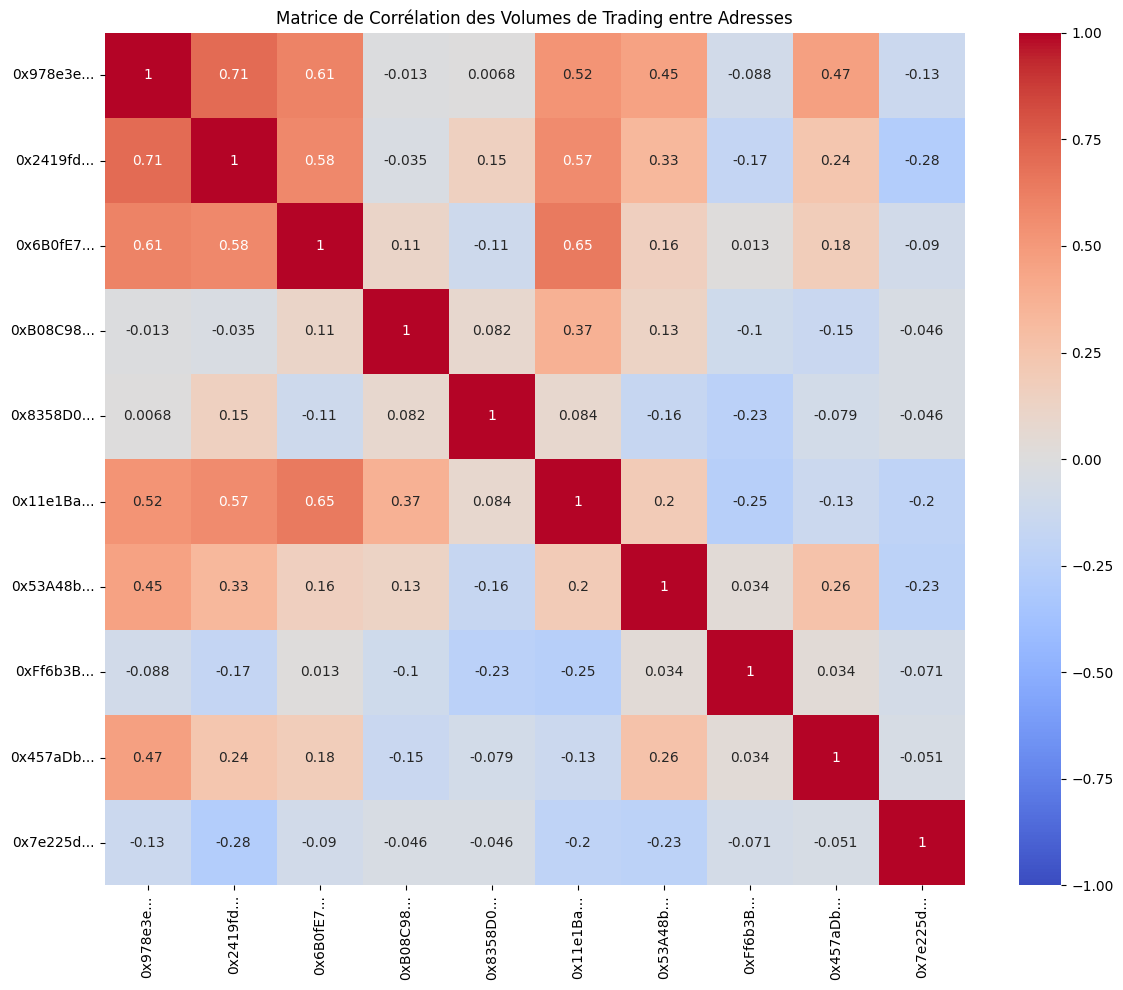

In [32]:
import time
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from tqdm import tqdm
import matplotlib.dates as mdates

# Désactiver les avertissements de copie de pandas
pd.options.mode.chained_assignment = None

# --- Partie 1 : Récupération des trades sur la période spécifiée via l'API ---
class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            # Silence les messages d'erreur pour éviter les affichages
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

def get_all_trades(pairs, from_ts, to_ts, verbose=False):
    all_trades = []
    dt = DeriveTradeHistory()
    
    # Utilisation de tqdm seulement si verbose est activé
    pair_iterator = tqdm(pairs, desc="Récupération des trades") if verbose else pairs
    
    for pair in pair_iterator:
        page_num = 1
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    
    return all_trades

# --- Fonctions d'analyse des données ---
def prepare_data_for_analysis(df_maker, df_taker):
    """
    Prépare les données pour l'analyse en calculant les volumes USDT
    """
    # Faire des copies pour éviter les avertissements
    df_maker_copy = df_maker.copy()
    df_taker_copy = df_taker.copy()
    
    # Identifier les colonnes de prix et de quantité
    price_col = 'trade_price'
    amount_col = 'trade_amount'
    
    # Vérifier que les colonnes nécessaires existent
    if price_col not in df_maker_copy.columns or amount_col not in df_maker_copy.columns:
        print(f"Colonnes manquantes dans les données maker. Attendu : {price_col}, {amount_col}")
        print(f"Disponible : {df_maker_copy.columns.tolist()}")
        return None, None
    
    if price_col not in df_taker_copy.columns or amount_col not in df_taker_copy.columns:
        print(f"Colonnes manquantes dans les données taker. Attendu : {price_col}, {amount_col}")
        print(f"Disponible : {df_taker_copy.columns.tolist()}")
        return None, None
    
    # Conversion des types pour les calculs
    df_maker_copy[price_col] = pd.to_numeric(df_maker_copy[price_col], errors='coerce')
    df_maker_copy[amount_col] = pd.to_numeric(df_maker_copy[amount_col], errors='coerce')
    df_taker_copy[price_col] = pd.to_numeric(df_taker_copy[price_col], errors='coerce')
    df_taker_copy[amount_col] = pd.to_numeric(df_taker_copy[amount_col], errors='coerce')
    
    # Calcul du volume en USDT (price * amount)
    df_maker_copy['volume_usdt'] = df_maker_copy[price_col] * df_maker_copy[amount_col]
    df_taker_copy['volume_usdt'] = df_taker_copy[price_col] * df_taker_copy[amount_col]
    
    # Conversion des timestamps en datetime pour les graphiques
    if 'timestamp' in df_maker_copy.columns:
        df_maker_copy['datetime'] = pd.to_datetime(df_maker_copy['timestamp'], unit='ms')
    if 'timestamp' in df_taker_copy.columns:
        df_taker_copy['datetime'] = pd.to_datetime(df_taker_copy['timestamp'], unit='ms')
    
    return df_maker_copy, df_taker_copy

def calculate_wallet_volumes(df_maker, df_taker, top_wallets):
    """
    Calcule les volumes par wallet pour les trades maker et taker
    """
    # Vérifier que la colonne 'wallet' existe
    if 'wallet' not in df_maker.columns or 'wallet' not in df_taker.columns:
        print("Erreur: colonne 'wallet' manquante dans les données")
        return pd.DataFrame()
    
    # Filtrer pour les top wallets
    filtered_maker = df_maker[df_maker['wallet'].isin(top_wallets)]
    filtered_taker = df_taker[df_taker['wallet'].isin(top_wallets)]
    
    # Regrouper par wallet et calculer la somme des volumes
    maker_volumes = filtered_maker.groupby('wallet')['volume_usdt'].sum().reset_index()
    taker_volumes = filtered_taker.groupby('wallet')['volume_usdt'].sum().reset_index()
    
    # Fusionner les résultats
    wallet_volumes = pd.merge(taker_volumes, maker_volumes, on='wallet', how='left', suffixes=('_taker', '_maker'))
    wallet_volumes = wallet_volumes.fillna(0)  # Remplacer les NaN par 0
    wallet_volumes = wallet_volumes.sort_values(by='volume_usdt_taker', ascending=False)
    
    return wallet_volumes

def correlation_matrix(df_taker, top_wallets):
    """
    Calcule la matrice de corrélation entre les volumes de trading des top wallets
    """
    # Vérifier que les colonnes nécessaires existent
    if 'wallet' not in df_taker.columns or 'volume_usdt' not in df_taker.columns:
        print("Erreur: colonnes nécessaires manquantes pour la matrice de corrélation")
        # Retourner une matrice vide
        return pd.DataFrame(index=top_wallets, columns=top_wallets).fillna(0)
    
    if 'datetime' not in df_taker.columns:
        print("Erreur: colonne datetime manquante pour la matrice de corrélation")
        return pd.DataFrame(index=top_wallets, columns=top_wallets).fillna(0)
    
    # Préparation des données
    wallet_data = {}
    
    # Pour chaque wallet, créer une série temporelle de volumes
    for wallet in top_wallets:
        wallet_trades = df_taker[df_taker['wallet'] == wallet]
        if not wallet_trades.empty:
            wallet_trades = wallet_trades.set_index('datetime')
            wallet_trades = wallet_trades.resample('1D').sum()  # Resample par jour
            if 'volume_usdt' in wallet_trades.columns:
                wallet_data[wallet] = wallet_trades['volume_usdt']
    
    # Vérifier si des données ont été trouvées
    if not wallet_data:
        print("Aucune donnée de volume trouvée pour les wallets spécifiés")
        return pd.DataFrame(index=top_wallets, columns=top_wallets).fillna(0)
    
    # Créer un DataFrame avec toutes les séries temporelles
    corr_df = pd.DataFrame(wallet_data)
    corr_df = corr_df.fillna(0)  # Remplacer les NaN par 0
    
    # Calculer la matrice de corrélation
    correlation = corr_df.corr()
    
    return correlation

def plot_wallet_trades_by_period(df_maker, df_taker, top_wallets, output_folder='plots'):
    """
    Crée 4 graphiques montrant les volumes de trading individuels maker et taker 
    au fil du temps pour chacun des top wallets, divisés en 4 périodes.
    """
    # Vérifier les colonnes nécessaires
    needed_cols = ['wallet', 'datetime', 'volume_usdt', 'trade_id']
    
    for col in needed_cols:
        if col not in df_maker.columns or col not in df_taker.columns:
            print(f"Erreur: colonne {col} manquante dans les données")
            return
    
    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Filtrer pour les top wallets
    df_maker_filtered = df_maker[df_maker['wallet'].isin(top_wallets)]
    df_taker_filtered = df_taker[df_taker['wallet'].isin(top_wallets)]
    
    # Vérifier si des données existent
    if df_maker_filtered.empty and df_taker_filtered.empty:
        print("Aucune donnée disponible pour les graphiques")
        return
    
    # Trouver les limites temporelles
    all_datetimes = []
    if not df_maker_filtered.empty:
        all_datetimes.extend(df_maker_filtered['datetime'].tolist())
    if not df_taker_filtered.empty:
        all_datetimes.extend(df_taker_filtered['datetime'].tolist())
    
    if not all_datetimes:
        print("Aucune donnée temporelle disponible pour les graphiques")
        return
    
    min_date = min(all_datetimes)
    max_date = max(all_datetimes)
    time_range = max_date - min_date
    time_step = time_range / 4
    
    # Créer un dictionnaire pour associer chaque trade_id à ses trades maker et taker
    trade_id_map = {}
    
    # Pour chaque trade_id dans les makers, chercher le taker correspondant
    for _, maker_row in df_maker_filtered.iterrows():
        trade_id = maker_row['trade_id']
        if trade_id not in trade_id_map:
            trade_id_map[trade_id] = {'maker': maker_row, 'taker': None}
        else:
            trade_id_map[trade_id]['maker'] = maker_row
    
    # Pour chaque trade_id dans les takers, chercher le maker correspondant
    for _, taker_row in df_taker_filtered.iterrows():
        trade_id = taker_row['trade_id']
        if trade_id not in trade_id_map:
            trade_id_map[trade_id] = {'maker': None, 'taker': taker_row}
        else:
            trade_id_map[trade_id]['taker'] = taker_row
    
    # Couleurs pour chaque wallet
    colors = plt.cm.tab10(np.linspace(0, 1, len(top_wallets)))
    wallet_color_map = {wallet: colors[i] for i, wallet in enumerate(top_wallets)}
    
    # Création des 4 graphiques (divisés par quartile de temps)
    start_time = min_date
    
    for period in range(4):
        end_time = start_time + time_step
        
        # Créer un graphique par wallet pour cette période
        for wallet_idx, wallet in enumerate(top_wallets):
            plt.figure(figsize=(15, 10))
            
            # Filtrer les trades pour ce wallet et cette période
            wallet_makers = df_maker_filtered[(df_maker_filtered['wallet'] == wallet) & 
                                            (df_maker_filtered['datetime'] >= start_time) & 
                                            (df_maker_filtered['datetime'] < end_time)]
            
            wallet_takers = df_taker_filtered[(df_taker_filtered['wallet'] == wallet) & 
                                            (df_taker_filtered['datetime'] >= start_time) & 
                                            (df_taker_filtered['datetime'] < end_time)]
            
            # Graphique pour les makers
            plt.subplot(2, 1, 1)
            if not wallet_makers.empty:
                plt.scatter(wallet_makers['datetime'], wallet_makers['volume_usdt'], 
                           color=wallet_color_map[wallet], alpha=0.7, label=f"Maker")
                
                # Ajouter une courbe de tendance
                plt.plot(wallet_makers['datetime'], wallet_makers['volume_usdt'], 
                        color=wallet_color_map[wallet], alpha=0.4, linestyle='-')
            
            plt.title(f'Volume Maker pour {wallet[:10]}... (Période {period+1}/4)')
            plt.ylabel('Volume (USDT)')
            plt.legend(loc='upper right')
            plt.grid(True, alpha=0.3)
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.xticks(rotation=45)
            
            # Graphique pour les takers
            plt.subplot(2, 1, 2)
            if not wallet_takers.empty:
                plt.scatter(wallet_takers['datetime'], wallet_takers['volume_usdt'], 
                           color=wallet_color_map[wallet], alpha=0.7, label=f"Taker")
                
                # Ajouter une courbe de tendance
                plt.plot(wallet_takers['datetime'], wallet_takers['volume_usdt'], 
                        color=wallet_color_map[wallet], alpha=0.4, linestyle='-')
            
            plt.title(f'Volume Taker pour {wallet[:10]}... (Période {period+1}/4)')
            plt.xlabel('Date et Heure')
            plt.ylabel('Volume (USDT)')
            plt.legend(loc='upper right')
            plt.grid(True, alpha=0.3)
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.savefig(f'{output_folder}/wallet_{wallet[:8]}_periode_{period+1}.png', dpi=300)
            plt.close()
        
        # Création d'un graphique comparatif pour tous les wallets sur cette période
        plt.figure(figsize=(15, 10))
        
        # Graphique pour les makers (tous wallets)
        plt.subplot(2, 1, 1)
        
        for wallet_idx, wallet in enumerate(top_wallets):
            wallet_makers = df_maker_filtered[(df_maker_filtered['wallet'] == wallet) & 
                                           (df_maker_filtered['datetime'] >= start_time) & 
                                           (df_maker_filtered['datetime'] < end_time)]
            
            if not wallet_makers.empty:
                plt.scatter(wallet_makers['datetime'], wallet_makers['volume_usdt'], 
                           color=wallet_color_map[wallet], alpha=0.7, label=f"{wallet[:10]}...")
        
        plt.title(f'Comparaison des Volumes Maker (Période {period+1}/4)')
        plt.ylabel('Volume (USDT)')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True, alpha=0.3)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
        plt.xticks(rotation=45)
        
        # Graphique pour les takers (tous wallets)
        plt.subplot(2, 1, 2)
        
        for wallet_idx, wallet in enumerate(top_wallets):
            wallet_takers = df_taker_filtered[(df_taker_filtered['wallet'] == wallet) & 
                                           (df_taker_filtered['datetime'] >= start_time) & 
                                           (df_taker_filtered['datetime'] < end_time)]
            
            if not wallet_takers.empty:
                plt.scatter(wallet_takers['datetime'], wallet_takers['volume_usdt'], 
                           color=wallet_color_map[wallet], alpha=0.7, label=f"{wallet[:10]}...")
        
        plt.title(f'Comparaison des Volumes Taker (Période {period+1}/4)')
        plt.xlabel('Date et Heure')
        plt.ylabel('Volume (USDT)')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True, alpha=0.3)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig(f'{output_folder}/comparaison_periode_{period+1}.png', dpi=300)
        plt.close()
        
        # Mise à jour de l'heure de début pour la prochaine période
        start_time = end_time

# --- Programme principal ---
if __name__ == "__main__":
    # Période indiquée (en millisecondes)
    from_ts = 1739318400000
    to_ts = 1741737600000
    
    # Liste des paires ciblées (avec le suffixe "-PERP")
    pairs = [
        "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
        "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
        "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
        "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
        "TRUMP-PERP"
    ]
    
    # Liste des chemins des CSV d'entrée à adapter
    input_csv_paths = [
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_059a4.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_76Fb9.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_675bc.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_49282.csv'
    ]
    
    try:
        # 1. Lecture et concaténation des CSV d'entrée
        print("Lecture des fichiers CSV d'entrée...")
        df_list = []
        for path in input_csv_paths:
            if os.path.exists(path):
                df_temp = pd.read_csv(path)
                df_list.append(df_temp)
            else:
                print(f"Attention: le fichier {path} n'existe pas.")
        
        if not df_list:
            print("Aucun fichier CSV valide trouvé. Veuillez vérifier les chemins.")
            exit(1)
        
        df_input = pd.concat(df_list, ignore_index=True)
        
        # Afficher les colonnes pour le débogage
        print("Colonnes disponibles dans les fichiers CSV d'entrée:", df_input.columns.tolist())
        
        # 2. Vérification et filtrage des data makers
        required_cols = ["trade_id", "liquidity_role"]
        for col in required_cols:
            if col not in df_input.columns:
                raise ValueError(f"Le CSV d'entrée doit contenir la colonne '{col}'.")
        
        # Conserver uniquement les lignes où liquidity_role est "maker" (insensible à la casse)
        df_maker_input = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
        reference_trade_ids = set(df_maker_input["trade_id"].unique())
        print(f"{len(reference_trade_ids)} trade_id (maker) extraits du CSV d'entrée.")
        
        # 3. Récupération des trades via l'API (sans afficher les étapes)
        print("Récupération des trades via l'API en cours...")
        all_trades = get_all_trades(pairs, from_ts, to_ts, verbose=False)
        print(f"Nombre total de trades récupérés via l'API : {len(all_trades)}")
        
        if not all_trades:
            print("Aucun trade trouvé pour la période indiquée.")
            exit(1)
        
        # 4. Traitement des données API
        df_api = pd.DataFrame(all_trades)
        
        # 5. Filtrage des trades taker dont le trade_id est dans l'ensemble extrait
        df_taker_filtered = df_api[
            (df_api["trade_id"].isin(reference_trade_ids)) &
            (df_api["liquidity_role"].str.lower() == "taker")
        ]
        print(f"Nombre de trades filtrés (taker avec trade_id en commun) : {len(df_taker_filtered)}")
        
        # 6. Identification des makers correspondants dans l'API
        df_maker_api = df_api[
            (df_api["trade_id"].isin(reference_trade_ids)) &
            (df_api["liquidity_role"].str.lower() == "maker")
        ]
        
        # Vérifier que les DataFrames ne sont pas vides
        if df_taker_filtered.empty:
            print("Aucun trade taker correspondant trouvé.")
            exit(1)
        
        # 7. Comptage des occurrences par adresse (wallet) parmi les trades filtrés
        wallet_counts = df_taker_filtered["wallet"].value_counts().reset_index()
        wallet_counts.columns = ["wallet", "count"]
        
        # Sélection des top 10 adresses ayant le plus d'occurrences
        top_10_wallets = wallet_counts.head(10)
        top_wallets_list = top_10_wallets["wallet"].tolist()
        
        print("\nTop 10 des adresses ayant eu le plus de trade_id similaires (en taker) :")
        print(top_10_wallets)
        
        # 8. Préparation des données pour l'analyse
        print("\nPréparation des données pour l'analyse des volumes...")
        df_maker_prepared, df_taker_prepared = prepare_data_for_analysis(df_maker_api, df_taker_filtered)
        
        if df_maker_prepared is None or df_taker_prepared is None:
            print("Erreur lors de la préparation des données. Arrêt du programme.")
            exit(1)
        
        # 9. Calcul des volumes par wallet
        print("\nCalcul des volumes de trading par wallet...")
        wallet_volumes = calculate_wallet_volumes(df_maker_prepared, df_taker_prepared, top_wallets_list)
        
        if wallet_volumes.empty:
            print("Aucun volume de trading calculé. Vérifiez les données.")
            exit(1)
        
        # Formater les volumes pour l'affichage
        wallet_volumes['volume_usdt_taker_fmt'] = wallet_volumes['volume_usdt_taker'].map('${:,.2f}'.format)
        wallet_volumes['volume_usdt_maker_fmt'] = wallet_volumes['volume_usdt_maker'].map('${:,.2f}'.format)
        
        print("\nVolumes de trading pour les 10 premiers wallets :")
        print(wallet_volumes[['wallet', 'volume_usdt_taker_fmt', 'volume_usdt_maker_fmt']])
        
        # 10. Calculer le volume total pour l'affichage
        total_volume_taker = wallet_volumes['volume_usdt_taker'].sum()
        total_volume_maker = wallet_volumes['volume_usdt_maker'].sum()
        
        print(f"\nVolume total en USDT (top 10 wallets):")
        print(f"Volume Taker: ${total_volume_taker:,.2f}")
        print(f"Volume Maker: ${total_volume_maker:,.2f}")
        
        # 11. Calcul et affichage de la matrice de corrélation
        print("\nCalcul de la matrice de corrélation...")
        correlation = correlation_matrix(df_taker_prepared, top_wallets_list)
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                    xticklabels=[w[:8] + '...' for w in correlation.columns], 
                    yticklabels=[w[:8] + '...' for w in correlation.index])
        plt.title('Matrice de Corrélation des Volumes de Trading entre Adresses')
        plt.tight_layout()
        plt.savefig('correlation_matrix.png', dpi=300)
        
        # 12. Création des graphiques détaillés par wallet et par période
        print("\nCréation des graphiques détaillés par adresse et par période...")
        plot_wallet_trades_by_period(df_maker_prepared, df_taker_prepared, top_wallets_list)
        
        print("\nAnalyse terminée. Les graphiques ont été enregistrés dans le dossier 'plots'.")
    
    except Exception as e:
        import traceback
        print(f"Une erreur est survenue: {e}")
        print(traceback.format_exc())

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import time
import requests
from tqdm import tqdm
from collections import defaultdict

# --- Fonctions pour charger et préparer les données ---
def load_and_prepare_data(input_csv_paths, pairs, from_ts, to_ts, program_name=""):
    """
    Charge les données des CSV et récupère les données API,
    puis prépare les données pour l'analyse de wash trading
    
    Args:
        input_csv_paths: Liste des chemins vers les fichiers CSV d'entrée
        pairs: Liste des paires d'instruments à analyser
        from_ts: Timestamp de début (en millisecondes)
        to_ts: Timestamp de fin (en millisecondes)
        program_name: Nom du programme pour déterminer le type d'instrument
        
    Returns:
        Tuple contenant (df_maker_prepared, df_taker_prepared, reference_trade_ids)
    """
    # 1. Chargement des CSV
    print("Lecture des fichiers CSV d'entrée...")
    df_list = []
    for path in input_csv_paths:
        if os.path.exists(path):
            df_temp = pd.read_csv(path)
            df_list.append(df_temp)
        else:
            print(f"Attention: le fichier {path} n'existe pas.")
    
    if not df_list:
        raise ValueError("Aucun fichier CSV valide trouvé. Veuillez vérifier les chemins.")
    
    df_input = pd.concat(df_list, ignore_index=True)
    
    # 2. Filtrage des makers
    df_maker_input = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
    reference_trade_ids = set(df_maker_input["trade_id"].unique())
    print(f"{len(reference_trade_ids)} trade_id (maker) extraits du CSV d'entrée.")
    
    # Pour les programmes OPTIONS, utiliser directement les données CSV
    if "OPTIONS" in program_name:
        print("Programme d'options détecté. Utilisation directe des données CSV...")
        
        # Séparation des makers et takers
        df_maker = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
        df_taker = df_input[df_input["liquidity_role"].str.lower() == "taker"].copy()
        
        print(f"Données CSV: {len(df_maker)} trades maker et {len(df_taker)} trades taker.")
        
        # Préparer les dataframes
        df_maker_prepared = prepare_dataframe(df_maker)
        df_taker_prepared = prepare_dataframe(df_taker)
        
        return df_maker_prepared, df_taker_prepared, reference_trade_ids
    
    # Pour les autres programmes (PERPS), utiliser l'API pour obtenir les takers
    else:
        # 3. Récupération des trades via l'API
        print("Récupération des trades via l'API en cours...")
        all_trades = get_all_trades(pairs, from_ts, to_ts, program_name=program_name, verbose=False)
        print(f"Nombre total de trades récupérés via l'API : {len(all_trades)}")
        
        # 4. Conversion en DataFrame
        df_api = pd.DataFrame(all_trades)
        
        # 5. Filtrage des trades pertinents
        if df_api.empty or 'trade_id' not in df_api.columns:
            print("Avertissement: Aucune donnée API valide récupérée ou colonne 'trade_id' manquante.")
            # Retourner des DataFrames vides mais correctement structurés
            df_maker_prepared = df_maker_input.copy()  # Utiliser les données du CSV d'entrée pour les makers
            if df_maker_prepared.empty:
                # Créer un DataFrame vide avec les colonnes nécessaires
                df_maker_prepared = pd.DataFrame(columns=['trade_id', 'wallet', 'datetime', 'volume_usdt'])
            
            # DataFrame vide pour les takers
            df_taker_prepared = pd.DataFrame(columns=['trade_id', 'wallet', 'datetime', 'volume_usdt'])
            
            return df_maker_prepared, df_taker_prepared, reference_trade_ids
        
        # Si nous avons des données API valides, continuer avec le filtrage normal
        df_taker_filtered = df_api[
            (df_api["trade_id"].isin(reference_trade_ids)) &
            (df_api["liquidity_role"].str.lower() == "taker")
        ]
        
        df_maker_api = df_api[
            (df_api["trade_id"].isin(reference_trade_ids)) &
            (df_api["liquidity_role"].str.lower() == "maker")
        ]
        
        # 6. Préparation des données pour analyse
        print("Préparation des données pour analyse...")
        df_maker_prepared = prepare_dataframe(df_maker_api)
        df_taker_prepared = prepare_dataframe(df_taker_filtered)
        
        return df_maker_prepared, df_taker_prepared, reference_trade_ids

def prepare_dataframe(df):
    """
    Prépare un DataFrame pour l'analyse en ajoutant/convertissant les colonnes nécessaires
    """
    if df.empty:
        return df
    
    df_copy = df.copy()
    
    # Conversion des types pour les calculs
    price_col = 'trade_price'
    amount_col = 'trade_amount'
    
    if price_col in df_copy.columns and amount_col in df_copy.columns:
        df_copy[price_col] = pd.to_numeric(df_copy[price_col], errors='coerce')
        df_copy[amount_col] = pd.to_numeric(df_copy[amount_col], errors='coerce')
        df_copy['volume_usdt'] = df_copy[price_col] * df_copy[amount_col]
    
    # Conversion du timestamp en datetime
    if 'timestamp' in df_copy.columns:
        df_copy['datetime'] = pd.to_datetime(df_copy['timestamp'], unit='ms')
    
    return df_copy

def get_all_trades(pairs, from_ts, to_ts, verbose=False):
    all_trades = []
    dt = DeriveTradeHistory()
    
    pair_iterator = tqdm(pairs, desc="Récupération des trades") if verbose else pairs
    
    for pair in pair_iterator:
        page_num = 1
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    
    return all_trades

class DeriveTradeHistory:
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)

# --- Fonctions d'analyse Network pour détecter le wash trading ---
def build_trade_network(df_maker, df_taker, mm_addresses=None):
    """
    Construit un réseau (graph) de trades entre les adresses
    """
    # Créer un graphe dirigé
    G = nx.DiGraph()
    
    # Dictionnaire pour stocker les détails des transactions entre adresses
    edge_data = defaultdict(lambda: {'count': 0, 'volume': 0, 'trades': []})
    
    # Associer chaque trade_id à ses maker et taker respectifs
    trade_id_map = {}
    
    # Pour chaque trade maker, chercher le taker correspondant
    for _, maker_row in df_maker.iterrows():
        trade_id = maker_row['trade_id']
        if 'wallet' in maker_row:
            maker_wallet = maker_row['wallet']
            
            # Ajouter le nœud maker avec ses attributs
            is_mm = False
            if mm_addresses is not None and maker_wallet in mm_addresses:
                is_mm = True
            
            G.add_node(maker_wallet, 
                      type='maker', 
                      is_mm=is_mm, 
                      trades_count=G.nodes[maker_wallet]['trades_count'] + 1 if maker_wallet in G.nodes and 'trades_count' in G.nodes[maker_wallet] else 1)
            
            # Stocker le maker pour ce trade_id
            trade_id_map[trade_id] = {'maker': maker_row}
    
    # Pour chaque trade taker, chercher le maker correspondant et créer un lien
    for _, taker_row in df_taker.iterrows():
        trade_id = taker_row['trade_id']
        if 'wallet' in taker_row and trade_id in trade_id_map and 'maker' in trade_id_map[trade_id]:
            taker_wallet = taker_row['wallet']
            maker_row = trade_id_map[trade_id]['maker']
            maker_wallet = maker_row['wallet']
            
            # Ajouter le nœud taker avec ses attributs
            is_mm = False
            if mm_addresses is not None and taker_wallet in mm_addresses:
                is_mm = True
                
            G.add_node(taker_wallet, 
                      type='taker', 
                      is_mm=is_mm, 
                      trades_count=G.nodes[taker_wallet]['trades_count'] + 1 if taker_wallet in G.nodes and 'trades_count' in G.nodes[taker_wallet] else 1)
            
            # Calculer le volume si possible
            volume = 0
            if 'volume_usdt' in taker_row:
                volume = taker_row['volume_usdt']
            
            # Mettre à jour les données de l'arête
            edge_tuple = (maker_wallet, taker_wallet)
            edge_data[edge_tuple]['count'] += 1
            edge_data[edge_tuple]['volume'] += volume
            
            # Stocker les détails du trade
            trade_details = {
                'trade_id': trade_id,
                'timestamp': taker_row['datetime'] if 'datetime' in taker_row else None,
                'volume': volume
            }
            edge_data[edge_tuple]['trades'].append(trade_details)
    
    # Ajouter toutes les arêtes au graphe
    for (maker, taker), data in edge_data.items():
        G.add_edge(maker, taker, 
                  count=data['count'], 
                  volume=data['volume'], 
                  trades=data['trades'])
    
    return G

def detect_wash_trading_patterns(G, time_threshold=3600):
    """
    Détecte les patterns de wash trading dans le graphe
    
    Args:
        G: Le graphe des transactions
        time_threshold: Seuil en secondes pour considérer des transactions comme proches dans le temps
        
    Returns:
        Une liste de patterns suspects
    """
    suspicious_patterns = []
    
    # 1. Recherche des cycles courts (A->B->A)
    print("Recherche des cycles courts...")
    cycles = list(nx.simple_cycles(G))
    short_cycles = [cycle for cycle in cycles if len(cycle) <= 3]
    
    for cycle in short_cycles:
        cycle_data = {
            'type': 'cycle',
            'addresses': cycle,
            'volume': 0,
            'trades': []
        }
        
        # Analyser chaque arête du cycle
        total_volume = 0
        all_trades = []
        
        for i in range(len(cycle)):
            source = cycle[i]
            target = cycle[(i + 1) % len(cycle)]
            
            if G.has_edge(source, target):
                edge_data = G.get_edge_data(source, target)
                total_volume += edge_data.get('volume', 0)
                if 'trades' in edge_data:
                    all_trades.extend(edge_data['trades'])
        
        cycle_data['volume'] = total_volume
        cycle_data['trades'] = all_trades
        suspicious_patterns.append(cycle_data)
    
    # 2. Recherche des transactions bidirectionnelles rapprochées dans le temps
    print("Recherche des transactions bidirectionnelles rapprochées...")
    bidirectional_edges = []
    
    for u, v in G.edges():
        if G.has_edge(v, u):  # Si l'arête inverse existe
            forward_trades = G.get_edge_data(u, v).get('trades', [])
            backward_trades = G.get_edge_data(v, u).get('trades', [])
            
            # Vérifier si ces transactions sont proches dans le temps
            close_trades = []
            for f_trade in forward_trades:
                for b_trade in backward_trades:
                    if f_trade['timestamp'] is not None and b_trade['timestamp'] is not None:
                        time_diff = abs((f_trade['timestamp'] - b_trade['timestamp']).total_seconds())
                        if time_diff < time_threshold:
                            close_trades.append({
                                'forward': f_trade,
                                'backward': b_trade,
                                'time_diff': time_diff
                            })
            
            if close_trades:
                pattern = {
                    'type': 'bidirectional',
                    'addresses': [u, v],
                    'volume': G.get_edge_data(u, v).get('volume', 0) + G.get_edge_data(v, u).get('volume', 0),
                    'close_trades': close_trades
                }
                suspicious_patterns.append(pattern)
    
    # 3. Détection des adresses avec un ratio élevé de transactions bidirectionnelles
    print("Calcul des ratios de transactions bidirectionnelles...")
    node_stats = {}
    
    for node in G.nodes():
        incoming = list(G.predecessors(node))
        outgoing = list(G.successors(node))
        
        # Calculer le nombre de voisins bidirectionnels
        bidirectional_neighbors = set(incoming).intersection(set(outgoing))
        total_neighbors = set(incoming).union(set(outgoing))
        
        if total_neighbors:
            bidirectional_ratio = len(bidirectional_neighbors) / len(total_neighbors)
            
            node_stats[node] = {
                'bidirectional_ratio': bidirectional_ratio,
                'bidirectional_neighbors': list(bidirectional_neighbors),
                'total_neighbors': len(total_neighbors)
            }
    
    # Identifier les adresses avec un ratio élevé
    high_ratio_nodes = [node for node, stats in node_stats.items() 
                       if stats['bidirectional_ratio'] > 0.5 and stats['total_neighbors'] > 1]
    
    for node in high_ratio_nodes:
        pattern = {
            'type': 'high_bidirectional_ratio',
            'address': node,
            'ratio': node_stats[node]['bidirectional_ratio'],
            'bidirectional_neighbors': node_stats[node]['bidirectional_neighbors']
        }
        suspicious_patterns.append(pattern)
    
    # Trier les patterns par volume ou par importance
    suspicious_patterns.sort(key=lambda x: x.get('volume', 0) if 'volume' in x else 0, reverse=True)
    
    return suspicious_patterns

# --- Fonctions de visualisation avec Plotly ---
def create_network_visualization(G, mm_addresses=None, title="Réseau de Transactions"):
    """
    Crée une visualisation interactive du réseau de transactions avec Plotly
    """
    # Calculer la position des nœuds avec l'algorithme spring_layout
    pos = nx.spring_layout(G, seed=42)
    
    # Préparer les données des nœuds
    node_x = []
    node_y = []
    node_text = []
    node_size = []
    node_color = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Texte au survol
        trades_count = G.nodes[node].get('trades_count', 0)
        is_mm = G.nodes[node].get('is_mm', False)
        mm_status = "Market Maker" if is_mm else "Regular"
        node_text.append(f"Adresse: {node}<br>Trades: {trades_count}<br>Type: {mm_status}")
        
        # Taille basée sur le nombre de transactions
        size = 10 + trades_count * 0.5
        node_size.append(size)
        
        # Couleur basée sur le statut MM
        if mm_addresses is not None:
            color = 'red' if node in mm_addresses else 'blue'
        else:
            is_mm = G.nodes[node].get('is_mm', False)
            color = 'red' if is_mm else 'blue'
        
        node_color.append(color)
    
    # Trace pour les nœuds
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            color=node_color,
            size=node_size,
            line=dict(width=1, color='#888'),
            symbol='circle'
        )
    )
    
    # Préparer les données des arêtes
    edge_x = []
    edge_y = []
    edge_text = []
    
    # Créer différentes traces pour différentes largeurs d'arêtes
    edge_traces = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        
        # Pour avoir une courbe au lieu d'une ligne droite
        xmid = (x0 + x1) / 2
        ymid = (y0 + y1) / 2
        
        # Ajouter un léger décalage pour les arêtes bidirectionnelles
        if G.has_edge(edge[1], edge[0]):
            xmid += (y1 - y0) * 0.1
            ymid -= (x1 - x0) * 0.1
        
        # Coordonnées de l'arête
        edge_coords_x = [x0, xmid, x1, None]
        edge_coords_y = [y0, ymid, y1, None]
        
        # Texte au survol
        edge_data = G.get_edge_data(edge[0], edge[1])
        count = edge_data.get('count', 0)
        volume = edge_data.get('volume', 0)
        hover_text = f"De: {edge[0]}<br>À: {edge[1]}<br>Trades: {count}<br>Volume: ${volume:,.2f}"
        
        # Largeur basée sur le volume (valeur unique pour chaque arête)
        width = 1 + min(10, volume / 1000)
        
        # Créer une trace pour cette arête spécifique
        edge_trace = go.Scatter(
            x=edge_coords_x,
            y=edge_coords_y,
            line=dict(width=width, color='#888'),
            hoverinfo='text',
            text=[hover_text, hover_text, hover_text, None],
            mode='lines',
            line_shape='spline',
            opacity=0.7,
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Créer la figure avec toutes les traces
    fig = go.Figure()
    
    # Ajouter toutes les traces d'arêtes
    for trace in edge_traces:
        fig.add_trace(trace)
    
    # Ajouter la trace pour les nœuds
    fig.add_trace(node_trace)
    
    # Mise en page
    fig.update_layout(
        title=title,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
    
    # Ajouter une légende
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='red'),
        name='Market Maker',
        showlegend=True
    ))
    
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='blue'),
        name='Regular Address',
        showlegend=True
    ))
    
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        showlegend=True
    )
    
    return fig

def create_transaction_flow_timeline(G, mm_addresses=None, title="Flux de Transactions au fil du temps"):
    """
    Crée une visualisation des flux de transactions au fil du temps
    """
    # Collecter toutes les transactions avec leur timestamp
    all_transactions = []
    
    for u, v, data in G.edges(data=True):
        if 'trades' in data:
            for trade in data['trades']:
                if trade['timestamp'] is not None:
                    all_transactions.append({
                        'source': u,
                        'target': v,
                        'timestamp': trade['timestamp'],
                        'volume': trade.get('volume', 0),
                        'trade_id': trade.get('trade_id', ''),
                        'source_is_mm': u in mm_addresses if mm_addresses else G.nodes[u].get('is_mm', False),
                        'target_is_mm': v in mm_addresses if mm_addresses else G.nodes[v].get('is_mm', False)
                    })
    
    if not all_transactions:
        return None
    
    # Convertir en DataFrame
    df_transactions = pd.DataFrame(all_transactions)
    df_transactions = df_transactions.sort_values('timestamp')
    
    # Créer une colonne pour la catégorie de transaction
    def get_transaction_category(row):
        if row['source_is_mm'] and row['target_is_mm']:
            return 'MM à MM'
        elif row['source_is_mm']:
            return 'MM à Regular'
        elif row['target_is_mm']:
            return 'Regular à MM'
        else:
            return 'Regular à Regular'
    
    df_transactions['category'] = df_transactions.apply(get_transaction_category, axis=1)
    
    # Créer un graphique interactif
    fig = px.scatter(df_transactions, 
                    x='timestamp', 
                    y='volume',
                    color='category',
                    hover_data=['source', 'target', 'trade_id'],
                    size='volume',
                    title=title,
                    labels={'timestamp': 'Date et Heure', 'volume': 'Volume (USDT)'},
                    height=600)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Date et Heure'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Transaction'
    )
    
    return fig

def create_suspicious_patterns_visualization(suspicious_patterns, title="Patterns Suspects de Wash Trading"):
    """
    Crée une visualisation des patterns suspects détectés
    """
    # Préparer les données pour le graphique
    data = []
    
    for i, pattern in enumerate(suspicious_patterns):
        pattern_type = pattern.get('type', 'unknown')
        
        if pattern_type == 'cycle':
            addresses = ' -> '.join(pattern['addresses']) + ' -> ' + pattern['addresses'][0]
            volume = pattern.get('volume', 0)
            trades_count = len(pattern.get('trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Cycle',
                'description': addresses,
                'volume': volume,
                'metric': trades_count,
                'metric_name': 'Nombre de trades'
            })
        
        elif pattern_type == 'bidirectional':
            addresses = ' <-> '.join(pattern['addresses'])
            volume = pattern.get('volume', 0)
            close_trades_count = len(pattern.get('close_trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Bidirectionnel',
                'description': addresses,
                'volume': volume,
                'metric': close_trades_count,
                'metric_name': 'Trades rapprochés'
            })
        
        elif pattern_type == 'high_bidirectional_ratio':
            address = pattern.get('address', 'unknown')
            ratio = pattern.get('ratio', 0)
            neighbors = ', '.join(pattern.get('bidirectional_neighbors', []))
            
            data.append({
                'index': i + 1,
                'type': 'Ratio élevé',
                'description': f"{address} ({neighbors})",
                'volume': 0,
                'metric': ratio,
                'metric_name': 'Ratio bidirectionnel'
            })
    
    if not data:
        return None
    
    # Convertir en DataFrame
    df_patterns = pd.DataFrame(data)
    
    # Créer un graphique interactif
    fig = px.bar(df_patterns, 
                x='index', 
                y='volume',
                color='type',
                hover_data=['description', 'metric', 'metric_name'],
                title=title,
                labels={'index': 'Pattern ID', 'volume': 'Volume (USDT)'},
                height=500)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Pattern ID'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Pattern'
    )
    
    return fig

def detect_wash_trading_patterns(G, time_threshold=3600):
    """
    Détecte les patterns de wash trading dans le graphe et élimine les redondances
    
    Args:
        G: Le graphe des transactions
        time_threshold: Seuil en secondes pour considérer des transactions comme proches dans le temps
        
    Returns:
        Une liste de patterns suspects sans redondance
    """
    suspicious_patterns = []
    # Ensemble pour suivre les patterns déjà vus
    seen_patterns = set()
    
    # 1. Recherche des cycles courts (A->B->A)
    print("Recherche des cycles courts...")
    cycles = list(nx.simple_cycles(G))
    
    # Trier et normaliser les cycles pour éliminer les duplications
    normalized_cycles = []
    for cycle in cycles:
        if len(cycle) <= 3:  # Limiter aux cycles courts
            # Normaliser le cycle pour commencer par l'adresse alphanumérique la plus petite
            min_node = min(cycle)
            min_idx = cycle.index(min_node)
            normalized_cycle = cycle[min_idx:] + cycle[:min_idx]
            normalized_cycles.append(tuple(normalized_cycle))
    
    # Éliminer les doublons
    unique_cycles = set(normalized_cycles)
    
    for cycle in unique_cycles:
        cycle_data = {
            'type': 'cycle',
            'addresses': cycle,
            'volume': 0,
            'trades': []
        }
        
        # Analyser chaque arête du cycle
        total_volume = 0
        all_trades = []
        
        for i in range(len(cycle)):
            source = cycle[i]
            target = cycle[(i + 1) % len(cycle)]
            
            if G.has_edge(source, target):
                edge_data = G.get_edge_data(source, target)
                total_volume += edge_data.get('volume', 0)
                if 'trades' in edge_data:
                    all_trades.extend(edge_data['trades'])
        
        cycle_data['volume'] = total_volume
        cycle_data['trades'] = all_trades
        suspicious_patterns.append(cycle_data)
    
    # 2. Recherche des transactions bidirectionnelles rapprochées dans le temps
    print("Recherche des transactions bidirectionnelles rapprochées...")
    
    # Utiliser un ensemble pour suivre les paires d'adresses déjà traitées
    processed_pairs = set()
    
    for u, v in G.edges():
        # Normaliser la paire pour éviter les doublons
        pair = tuple(sorted([u, v]))
        
        if pair in processed_pairs:
            continue
        
        processed_pairs.add(pair)
        
        if G.has_edge(v, u):  # Si l'arête inverse existe
            forward_trades = G.get_edge_data(u, v).get('trades', [])
            backward_trades = G.get_edge_data(v, u).get('trades', [])
            
            # Vérifier si ces transactions sont proches dans le temps
            close_trades = []
            for f_trade in forward_trades:
                for b_trade in backward_trades:
                    if f_trade['timestamp'] is not None and b_trade['timestamp'] is not None:
                        time_diff = abs((f_trade['timestamp'] - b_trade['timestamp']).total_seconds())
                        if time_diff < time_threshold:
                            close_trades.append({
                                'forward': f_trade,
                                'backward': b_trade,
                                'time_diff': time_diff
                            })
            
            if close_trades:
                pattern = {
                    'type': 'bidirectional',
                    'addresses': pair,
                    'volume': G.get_edge_data(u, v).get('volume', 0) + G.get_edge_data(v, u).get('volume', 0),
                    'close_trades': close_trades
                }
                suspicious_patterns.append(pattern)
    
    # 3. Détection des adresses avec un ratio élevé de transactions bidirectionnelles
    print("Calcul des ratios de transactions bidirectionnelles...")
    node_stats = {}
    
    for node in G.nodes():
        incoming = list(G.predecessors(node))
        outgoing = list(G.successors(node))
        
        # Calculer le nombre de voisins bidirectionnels
        bidirectional_neighbors = set(incoming).intersection(set(outgoing))
        total_neighbors = set(incoming).union(set(outgoing))
        
        if total_neighbors:
            bidirectional_ratio = len(bidirectional_neighbors) / len(total_neighbors)
            
            node_stats[node] = {
                'bidirectional_ratio': bidirectional_ratio,
                'bidirectional_neighbors': list(bidirectional_neighbors),
                'total_neighbors': len(total_neighbors)
            }
    
    # Identifier les adresses avec un ratio élevé
    high_ratio_nodes = [node for node, stats in node_stats.items() 
                       if stats['bidirectional_ratio'] > 0.5 and stats['total_neighbors'] > 1]
    
    for node in high_ratio_nodes:
        pattern = {
            'type': 'high_bidirectional_ratio',
            'address': node,
            'ratio': node_stats[node]['bidirectional_ratio'],
            'bidirectional_neighbors': node_stats[node]['bidirectional_neighbors']
        }
        suspicious_patterns.append(pattern)
    
    # Trier les patterns par volume ou par importance
    suspicious_patterns.sort(key=lambda x: x.get('volume', 0) if 'volume' in x else 0, reverse=True)
    
    return suspicious_patterns


def create_network_visualization(G, mm_addresses=None, title="Réseau de Transactions"):
    """
    Crée une visualisation interactive du réseau de transactions avec Plotly
    """
    # Calculer la position des nœuds avec l'algorithme spring_layout
    pos = nx.spring_layout(G, seed=42)
    
    # Préparer les données des nœuds
    node_x = []
    node_y = []
    node_text = []
    node_size = []
    node_color = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Texte au survol
        trades_count = G.nodes[node].get('trades_count', 0)
        is_mm = G.nodes[node].get('is_mm', False)
        mm_status = "Market Maker" if is_mm else "Regular"
        node_text.append(f"Adresse: {node}<br>Trades: {trades_count}<br>Type: {mm_status}")
        
        # Taille basée sur le nombre de transactions
        size = 10 + trades_count * 0.5
        node_size.append(size)
        
        # Couleur basée sur le statut MM
        if mm_addresses is not None:
            color = 'red' if node in mm_addresses else 'blue'
        else:
            is_mm = G.nodes[node].get('is_mm', False)
            color = 'red' if is_mm else 'blue'
        
        node_color.append(color)
    
    # Trace pour les nœuds
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            color=node_color,
            size=node_size,
            line=dict(width=1, color='#888'),
            symbol='circle'
        )
    )
    
    # Préparer les données des arêtes
    edge_x = []
    edge_y = []
    edge_text = []
    
    # Créer différentes traces pour différentes largeurs d'arêtes
    edge_traces = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        
        # Pour avoir une courbe au lieu d'une ligne droite
        xmid = (x0 + x1) / 2
        ymid = (y0 + y1) / 2
        
        # Ajouter un léger décalage pour les arêtes bidirectionnelles
        if G.has_edge(edge[1], edge[0]):
            xmid += (y1 - y0) * 0.1
            ymid -= (x1 - x0) * 0.1
        
        # Coordonnées de l'arête
        edge_coords_x = [x0, xmid, x1, None]
        edge_coords_y = [y0, ymid, y1, None]
        
        # Texte au survol
        edge_data = G.get_edge_data(edge[0], edge[1])
        count = edge_data.get('count', 0)
        volume = edge_data.get('volume', 0)
        hover_text = f"De: {edge[0]}<br>À: {edge[1]}<br>Trades: {count}<br>Volume: ${volume:,.2f}"
        
        # Largeur basée sur le volume (valeur unique pour chaque arête)
        width = 1 + min(10, volume / 1000)
        
        # Créer une trace pour cette arête spécifique
        edge_trace = go.Scatter(
            x=edge_coords_x,
            y=edge_coords_y,
            line=dict(width=width, color='#888'),
            hoverinfo='text',
            text=[hover_text, hover_text, hover_text, None],
            mode='lines',
            line_shape='spline',
            opacity=0.7,
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Créer la figure avec toutes les traces
    fig = go.Figure()
    
    # Ajouter toutes les traces d'arêtes
    for trace in edge_traces:
        fig.add_trace(trace)
    
    # Ajouter la trace pour les nœuds
    fig.add_trace(node_trace)
    
    # Mise en page
    fig.update_layout(
        title=title,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
    
    # Ajouter une légende
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='red'),
        name='Market Maker',
        showlegend=True
    ))
    
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='blue'),
        name='Regular Address',
        showlegend=True
    ))
    
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        showlegend=True
    )
    
    return fig


def create_transaction_flow_timeline(G, mm_addresses=None, title="Flux de Transactions au fil du temps"):
    """
    Crée une visualisation des flux de transactions au fil du temps
    """
    # Collecter toutes les transactions avec leur timestamp
    all_transactions = []
    
    for u, v, data in G.edges(data=True):
        if 'trades' in data:
            for trade in data['trades']:
                if trade['timestamp'] is not None:
                    all_transactions.append({
                        'source': u,
                        'target': v,
                        'timestamp': trade['timestamp'],
                        'volume': trade.get('volume', 0),
                        'trade_id': trade.get('trade_id', ''),
                        'source_is_mm': u in mm_addresses if mm_addresses else G.nodes[u].get('is_mm', False),
                        'target_is_mm': v in mm_addresses if mm_addresses else G.nodes[v].get('is_mm', False)
                    })
    
    if not all_transactions:
        return None
    
    # Convertir en DataFrame
    df_transactions = pd.DataFrame(all_transactions)
    df_transactions = df_transactions.sort_values('timestamp')
    
    # Créer une colonne pour la catégorie de transaction
    def get_transaction_category(row):
        if row['source_is_mm'] and row['target_is_mm']:
            return 'MM à MM'
        elif row['source_is_mm']:
            return 'MM à Regular'
        elif row['target_is_mm']:
            return 'Regular à MM'
        else:
            return 'Regular à Regular'
    
    df_transactions['category'] = df_transactions.apply(get_transaction_category, axis=1)
    
    # Créer un graphique interactif
    fig = px.scatter(df_transactions, 
                    x='timestamp', 
                    y='volume',
                    color='category',
                    hover_data=['source', 'target', 'trade_id'],
                    size='volume',
                    title=title,
                    labels={'timestamp': 'Date et Heure', 'volume': 'Volume (USDT)'},
                    height=600)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Date et Heure'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Transaction'
    )
    
    return fig


def create_suspicious_patterns_visualization(suspicious_patterns, title="Patterns Suspects de Wash Trading"):
    """
    Crée une visualisation des patterns suspects détectés
    """
    # Préparer les données pour le graphique
    data = []
    
    for i, pattern in enumerate(suspicious_patterns):
        pattern_type = pattern.get('type', 'unknown')
        
        if pattern_type == 'cycle':
            addresses = pattern.get('addresses', [])
            addresses_str = ' -> '.join(addresses)
            if addresses:  # Ajouter le premier nœud à la fin pour fermer le cycle
                addresses_str += ' -> ' + addresses[0]
                
            volume = pattern.get('volume', 0)
            trades_count = len(pattern.get('trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Cycle',
                'description': addresses_str,
                'volume': volume,
                'metric': trades_count,
                'metric_name': 'Nombre de trades'
            })
        
        elif pattern_type == 'bidirectional':
            addresses = pattern.get('addresses', [])
            addresses_str = ' <-> '.join(addresses)
            volume = pattern.get('volume', 0)
            close_trades_count = len(pattern.get('close_trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Bidirectionnel',
                'description': addresses_str,
                'volume': volume,
                'metric': close_trades_count,
                'metric_name': 'Trades rapprochés'
            })
        
        elif pattern_type == 'high_bidirectional_ratio':
            address = pattern.get('address', 'unknown')
            ratio = pattern.get('ratio', 0)
            neighbors = ', '.join(pattern.get('bidirectional_neighbors', []))
            
            data.append({
                'index': i + 1,
                'type': 'Ratio élevé',
                'description': f"{address} ({neighbors})",
                'volume': 0,
                'metric': ratio,
                'metric_name': 'Ratio bidirectionnel'
            })
    
    if not data:
        return None
    
    # Convertir en DataFrame
    df_patterns = pd.DataFrame(data)
    
    # Créer un graphique interactif
    fig = px.bar(df_patterns, 
                x='index', 
                y='volume',
                color='type',
                hover_data=['description', 'metric', 'metric_name'],
                title=title,
                labels={'index': 'Pattern ID', 'volume': 'Volume (USDT)'},
                height=500)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Pattern ID'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Pattern'
    )
    
    return fig


def display_wash_trading_analysis(df_maker, df_taker, mm_addresses, time_threshold=3600):
    """
    Fonction qui analyse et affiche les résultats directement dans la console
    """
    print("\n" + "="*80)
    print("ANALYSE DE WASH TRADING")
    print("="*80)
    
    # 1. Construire le réseau de transactions
    print("\nConstruction du réseau de transactions...")
    G = build_trade_network(df_maker, df_taker, mm_addresses)
    
    # Quelques statistiques sur le réseau
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Réseau construit: {num_nodes} adresses et {num_edges} liens de transactions")
    
    # 2. Afficher les adresses des market makers
    print("\nAdresses des market makers:")
    for i, addr in enumerate(mm_addresses, 1):
        print(f"  MM{i}: {addr}")
    
    # 3. Détecter les patterns suspects
    print("\nDétection des patterns suspects de wash trading...")
    suspicious_patterns = detect_wash_trading_patterns(G, time_threshold)
    
    # 4. Afficher un résumé
    cycle_patterns = [p for p in suspicious_patterns if p.get('type') == 'cycle']
    bidi_patterns = [p for p in suspicious_patterns if p.get('type') == 'bidirectional']
    ratio_patterns = [p for p in suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
    
    print(f"\nRésumé: {len(suspicious_patterns)} patterns suspects détectés")
    print(f"  - {len(cycle_patterns)} cycles de trading")
    print(f"  - {len(bidi_patterns)} transactions bidirectionnelles rapprochées")
    print(f"  - {len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles")
    
    # 5. Afficher les détails des patterns suspects
    if suspicious_patterns:
        print("\n" + "-"*80)
        print("DÉTAILS DES PATTERNS SUSPECTS DE WASH TRADING")
        print("-"*80)
        
        # 5.1 Cycles
        if cycle_patterns:
            print("\n[1] CYCLES DÉTECTÉS")
            print("-" * 50)
            
            for i, pattern in enumerate(cycle_patterns, 1):
                cycle = pattern.get('addresses', [])
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                cycle_str = " -> ".join(cycle)
                if cycle:  # Ajouter le premier nœud à la fin pour fermer le cycle
                    cycle_str += " -> " + cycle[0]
                
                print(f"Cycle {i}:")
                print(f"  Chemin: {cycle_str}")
                print(f"  Volume: ${volume:,.2f}")
                print(f"  Nombre de trades: {trades_count}")
                
                # Calculer le temps total pour compléter le cycle
                if trades_count > 0:
                    trades = pattern.get('trades', [])
                    if trades and all('timestamp' in t for t in trades):
                        timestamps = [t['timestamp'] for t in trades if t['timestamp'] is not None]
                        if timestamps:
                            time_range = max(timestamps) - min(timestamps)
                            print(f"  Durée du cycle: {time_range}")
                
                print()
        
        # 5.2 Transactions bidirectionnelles
        if bidi_patterns:
            print("\n[2] TRANSACTIONS BIDIRECTIONNELLES RAPPROCHÉES")
            print("-" * 50)
            
            for i, pattern in enumerate(bidi_patterns, 1):
                addresses = pattern.get('addresses', [])
                volume = pattern.get('volume', 0)
                close_trades = pattern.get('close_trades', [])
                
                addr_str = " <-> ".join(addresses)
                
                print(f"Transaction bidirectionnelle {i}:")
                print(f"  Adresses: {addr_str}")
                print(f"  Volume total: ${volume:,.2f}")
                print(f"  Nombre de paires de trades rapprochées: {len(close_trades)}")
                
                # Afficher quelques exemples de trades rapprochés
                if close_trades:
                    print("  Exemples de trades rapprochés:")
                    for j, trade_pair in enumerate(close_trades[:3], 1):  # Limiter à 3 exemples
                        forward = trade_pair.get('forward', {})
                        backward = trade_pair.get('backward', {})
                        time_diff = trade_pair.get('time_diff', 0)
                        
                        f_id = forward.get('trade_id', 'N/A')
                        b_id = backward.get('trade_id', 'N/A')
                        f_time = forward.get('timestamp', 'N/A')
                        b_time = backward.get('timestamp', 'N/A')
                        
                        print(f"    Exemple {j}:")
                        print(f"      Aller: Trade {f_id} à {f_time}")
                        print(f"      Retour: Trade {b_id} à {b_time}")
                        print(f"      Intervalle: {time_diff:.2f} secondes")
                    
                    if len(close_trades) > 3:
                        print(f"      ... et {len(close_trades) - 3} autres paires de trades")
                
                print()
        
        # 5.3 Adresses avec ratio élevé
        if ratio_patterns:
            print("\n[3] ADRESSES AVEC RATIO ÉLEVÉ DE TRANSACTIONS BIDIRECTIONNELLES")
            print("-" * 50)
            
            for i, pattern in enumerate(ratio_patterns, 1):
                address = pattern.get('address', 'N/A')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                
                print(f"Adresse à haut ratio {i}:")
                print(f"  Adresse: {address}")
                print(f"  Ratio bidirectionnel: {ratio:.2f}")
                print(f"  Nombre de voisins bidirectionnels: {len(neighbors)}")
                
                if neighbors:
                    print("  Voisins bidirectionnels:")
                    for j, neighbor in enumerate(neighbors[:5], 1):  # Limiter à 5 voisins
                        print(f"    {j}. {neighbor}")
                    
                    if len(neighbors) > 5:
                        print(f"    ... et {len(neighbors) - 5} autres voisins")
                
                print()
    
    # 6. Conclusion et recommandations
    print("\n" + "="*80)
    print("CONCLUSION")
    print("="*80)
    
    if len(suspicious_patterns) > 0:
        print(f"\nL'analyse a identifié {len(suspicious_patterns)} patterns suspects qui pourraient indiquer du wash trading:")
        print(f"- {len(cycle_patterns)} cycles de trading")
        print(f"- {len(bidi_patterns)} transactions bidirectionnelles rapprochées")
        print(f"- {len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles")
        
        # Calculer le volume total impliqué
        total_volume = sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p])
        print(f"\nVolume total impliqué dans les patterns suspects: ${total_volume:,.2f}")
        
        # Vérifier les interactions directes entre market makers
        mm_interactions = 0
        mm_volume = 0
        
        for u, v, data in G.edges(data=True):
            if u in mm_addresses and v in mm_addresses:
                mm_interactions += 1
                mm_volume += data.get('volume', 0)
        
        if mm_interactions > 0:
            print(f"\nInteractions directes entre adresses de market makers:")
            print(f"- Nombre d'interactions: {mm_interactions}")
            print(f"- Volume total: ${mm_volume:,.2f}")
        
        print("\nRECOMMANDATIONS:")
        print("1. Examiner en détail les cycles à haut volume pour vérifier la légitimité des transactions")
        print("2. Vérifier si les mêmes entités contrôlent plusieurs adresses impliquées dans les cycles")
        print("3. Analyser les motifs temporels des transactions pour identifier des patterns réguliers")
        print("4. Comparer les prix des transactions avec les prix du marché pour détecter des anomalies")
        
    else:
        print("\nL'analyse n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading.")
        print("Aucune action immédiate n'est requise, mais des analyses périodiques sont recommandées.")
    
    print("\n" + "="*80)
    
    # Retourner le graphe et les patterns pour pouvoir les utiliser ailleurs
    return G, suspicious_patterns

def create_wash_trading_report(G, suspicious_patterns, mm_addresses, output_folder='wash_trading_analysis'):
    """
    Crée un rapport complet d'analyse de wash trading
    """
    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Statistiques du réseau
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"\nGénération des rapports dans le dossier '{output_folder}'...")
    
    # Créer les visualisations
    print("Création des visualisations...")
    
    # Réseau de transactions
    network_fig = create_network_visualization(G, mm_addresses)
    network_fig.write_html(f"{output_folder}/network_visualization.html")
    
    # Flux de transactions au fil du temps
    timeline_fig = create_transaction_flow_timeline(G, mm_addresses)
    if timeline_fig:
        timeline_fig.write_html(f"{output_folder}/transaction_timeline.html")
    
    # Patterns suspects
    if suspicious_patterns:
        patterns_fig = create_suspicious_patterns_visualization(suspicious_patterns)
        if patterns_fig:
            patterns_fig.write_html(f"{output_folder}/suspicious_patterns.html")
        
        # Sauvegarder les détails des patterns en CSV
        patterns_data = []
        
        cycle_patterns = [p for p in suspicious_patterns if p.get('type') == 'cycle']
        bidi_patterns = [p for p in suspicious_patterns if p.get('type') == 'bidirectional']
        ratio_patterns = [p for p in suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
        
        for i, pattern in enumerate(suspicious_patterns):
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                    
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Cycle',
                    'description': addresses_str,
                    'volume': volume,
                    'trades_count': trades_count
                })
                
                # Sauvegarder les détails des trades dans ce cycle
                cycle_trades = []
                for trade in pattern.get('trades', []):
                    if trade:
                        cycle_trades.append({
                            'pattern_id': i + 1,
                            'trade_id': trade.get('trade_id', ''),
                            'timestamp': trade.get('timestamp', ''),
                            'volume': trade.get('volume', 0)
                        })
                
                if cycle_trades:
                    pd.DataFrame(cycle_trades).to_csv(f"{output_folder}/cycle_{i+1}_trades.csv", index=False)
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades = pattern.get('close_trades', [])
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Bidirectionnel',
                    'description': addresses_str,
                    'volume': volume,
                    'close_trades_count': len(close_trades)
                })
                
                # Sauvegarder les détails des trades bidirectionnels
                bidi_trades = []
                for trade_pair in close_trades:
                    if trade_pair:
                        forward = trade_pair.get('forward', {})
                        backward = trade_pair.get('backward', {})
                        
                        bidi_trades.append({
                            'pattern_id': i + 1,
                            'forward_trade_id': forward.get('trade_id', ''),
                            'backward_trade_id': backward.get('trade_id', ''),
                            'forward_timestamp': forward.get('timestamp', ''),
                            'backward_timestamp': backward.get('timestamp', ''),
                            'time_diff_seconds': trade_pair.get('time_diff', 0),
                            'forward_volume': forward.get('volume', 0),
                            'backward_volume': backward.get('volume', 0)
                        })
                
                if bidi_trades:
                    pd.DataFrame(bidi_trades).to_csv(f"{output_folder}/bidirectional_{i+1}_trades.csv", index=False)
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Ratio élevé',
                    'address': address,
                    'bidirectional_ratio': ratio,
                    'bidirectional_neighbors_count': len(neighbors),
                    'bidirectional_neighbors': ', '.join(neighbors)
                })
        
        if patterns_data:
            pd.DataFrame(patterns_data).to_csv(f"{output_folder}/suspicious_patterns_summary.csv", index=False)
    
    # 4. Créer un rapport HTML complet
    css_style = """
    body { font-family: Arial, sans-serif; margin: 20px; }
    h1 { color: #2c3e50; }
    h2 { color: #3498db; margin-top: 30px; }
    .stat-box { 
        background-color: #f8f9fa; 
        border-radius: 5px; 
        padding: 15px; 
        margin: 10px 0; 
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }
    .flex-container {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    .stat-item {
        flex: 1;
        min-width: 200px;
    }
    .iframe-container {
        width: 100%;
        height: 600px;
        margin: 20px 0;
        border: 1px solid #ddd;
    }
    iframe {
        width: 100%;
        height: 100%;
        border: none;
    }
    .warning {
        background-color: #ffe6e6;
        color: #c0392b;
        padding: 10px;
        border-radius: 5px;
        margin: 10px 0;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    """
    
    report_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Rapport d'Analyse de Wash Trading</title>
        <style>
            {css_style}
        </style>
    </head>
    <body>
        <h1>Rapport d'Analyse de Wash Trading</h1>
        
        <div class="stat-box">
            <h2>Statistiques du Réseau</h2>
            <div class="flex-container">
                <div class="stat-item">
                    <p><strong>Nombre d'adresses:</strong> {num_nodes}</p>
                    <p><strong>Nombre de transactions:</strong> {num_edges}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Adresses Market Maker:</strong> {len(mm_addresses)}</p>
                    <p><strong>Patterns suspects:</strong> {len(suspicious_patterns)}</p>
                </div>
            </div>
        </div>
        
        <h2>Visualisation du Réseau de Transactions</h2>
        <div class="iframe-container">
            <iframe src="network_visualization.html"></iframe>
        </div>
        
        <h2>Flux de Transactions au fil du temps</h2>
        <div class="iframe-container">
            <iframe src="transaction_timeline.html"></iframe>
        </div>
        
        <h2>Patterns Suspects de Wash Trading</h2>
    """
    
    if suspicious_patterns:
        report_html += """
        <div class="iframe-container">
            <iframe src="suspicious_patterns.html"></iframe>
        </div>
        
        <div class="stat-box">
            <h3>Synthèse des Patterns Suspects</h3>
            <table>
                <tr>
                    <th>ID</th>
                    <th>Type</th>
                    <th>Description</th>
                    <th>Volume (USDT)</th>
                    <th>Métrique</th>
                </tr>
        """
        
        for i, pattern in enumerate(suspicious_patterns[:10]):  # Limiter aux 10 premiers pour la lisibilité
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Cycle</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{trades_count} trades</td>
                </tr>
                """
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades_count = len(pattern.get('close_trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Bidirectionnel</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{close_trades_count} trades rapprochés</td>
                </tr>
                """
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                neighbors_str = ', '.join(neighbors[:5])
                if len(neighbors) > 5:
                    neighbors_str += "..."
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Ratio élevé</td>
                    <td>{address}</td>
                    <td>N/A</td>
                    <td>Ratio: {ratio:.2f}</td>
                </tr>
                """
        
        report_html += """
            </table>
        </div>
        """
        
        if len(suspicious_patterns) > 10:
            report_html += f"""
            <p>Note: {len(suspicious_patterns) - 10} autres patterns suspects ne sont pas affichés ici. Consultez le fichier CSV pour tous les détails.</p>
            """
    else:
        report_html += """
        <div class="stat-box">
            <p>Aucun pattern suspect détecté.</p>
        </div>
        """
    
    report_html += """
        <h2>Conclusion</h2>
        <div class="stat-box">
    """
    
    if suspicious_patterns:
        report_html += f"""
            <p>L'analyse a identifié <strong>{len(suspicious_patterns)} patterns suspects</strong> qui pourraient indiquer du wash trading:</p>
            <ul>
                <li>{len(cycle_patterns)} cycles de trading</li>
                <li>{len(bidi_patterns)} transactions bidirectionnelles rapprochées</li>
                <li>{len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles</li>
            </ul>
            <p>Ces patterns doivent être examinés plus en détail pour déterminer s'il s'agit réellement de wash trading.</p>
            
            <div class="warning">
                <strong>Attention:</strong> Cette analyse est basée uniquement sur les schémas de transactions. Une revue manuelle détaillée est recommandée avant de tirer des conclusions définitives.
            </div>
        """
    else:
        report_html += """
            <p>L'analyse n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading entre les adresses analysées.</p>
        """
    
    report_html += """
        </div>
    </body>
    </html>
    """
    
    with open(f"{output_folder}/wash_trading_report.html", "w") as f:
        f.write(report_html)
    
    print(f"Rapport complet généré dans le dossier '{output_folder}'")


# --- Programme principal ---
if __name__ == "__main__":
    # Période indiquée (en millisecondes)
    from_ts = 1739318400000
    to_ts = 1741737600000
    
    # Liste des paires ciblées (avec le suffixe "-PERP")
    pairs = [
        "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
        "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
        "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
        "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
        "TRUMP-PERP"
    ]
    
    # Liste des chemins des CSV d'entrée
    input_csv_paths = [
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_059a4.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_76Fb9.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_675bc.csv',
        r'C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\trades_49282.csv'
    ]
    
    # Liste des adresses participant au programme de market making
    mm_addresses = [
        "0x6B0fE721937ed61c6e261b5053D6178eCEf059a4",
        "0x978e3eb7997a9575cdE1799176829073d2876Fb9",
        "0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc",
        "0x6425f64A067c184E198a4b18e25bB821EAc49282"
    ]
    
    try:
        # 1. Charger et préparer les données
        df_maker, df_taker, reference_trade_ids = load_and_prepare_data(input_csv_paths, pairs, from_ts, to_ts)
        
        if df_maker is None or df_taker is None or df_maker.empty or df_taker.empty:
            print("Erreur lors de la préparation des données. Vérifiez les CSV d'entrée.")
            exit(1)
        
        # 2. Afficher l'analyse directement dans la console
        G, suspicious_patterns = display_wash_trading_analysis(df_maker, df_taker, mm_addresses)
        
        # 3. Générer les rapports dans un dossier
        create_wash_trading_report(G, suspicious_patterns, mm_addresses)
        
        print("\nAnalyse terminée. Le rapport a été généré dans le dossier 'wash_trading_analysis'.")
    
    except Exception as e:
        import traceback
        print(f"Une erreur est survenue: {e}")
        print(traceback.format_exc())


Lecture des fichiers CSV d'entrée...
15990 trade_id (maker) extraits du CSV d'entrée.
Récupération des trades via l'API en cours...
Nombre total de trades récupérés via l'API : 35124
Préparation des données pour analyse...

ANALYSE DE WASH TRADING

Construction du réseau de transactions...
Réseau construit: 145 adresses et 303 liens de transactions

Adresses des market makers:
  MM1: 0x6B0fE721937ed61c6e261b5053D6178eCEf059a4
  MM2: 0x978e3eb7997a9575cdE1799176829073d2876Fb9
  MM3: 0x8358D0e1468dD370CdaddAc1Ec1F1b85DfB675bc
  MM4: 0x6425f64A067c184E198a4b18e25bB821EAc49282

Détection des patterns suspects de wash trading...
Recherche des cycles courts...
Recherche des transactions bidirectionnelles rapprochées...
Calcul des ratios de transactions bidirectionnelles...

Résumé: 15 patterns suspects détectés
  - 11 cycles de trading
  - 4 transactions bidirectionnelles rapprochées
  - 0 adresses avec un ratio élevé de transactions bidirectionnelles

---------------------------------------

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import time
import requests
import json
from tqdm import tqdm
from collections import defaultdict

# --- Fonctions d'analyse de wash trading ---

def detect_wash_trading_patterns(G, time_threshold=3600):
    """
    Détecte les patterns de wash trading dans le graphe et élimine les redondances
    """
    suspicious_patterns = []
    
    # 1. Recherche des cycles courts (A->B->A)
    print("Recherche des cycles courts...")
    cycles = list(nx.simple_cycles(G))
    
    # Trier et normaliser les cycles pour éliminer les duplications
    normalized_cycles = []
    for cycle in cycles:
        if len(cycle) <= 3:  # Limiter aux cycles courts
            # Normaliser le cycle pour commencer par l'adresse alphanumérique la plus petite
            min_node = min(cycle)
            min_idx = cycle.index(min_node)
            normalized_cycle = cycle[min_idx:] + cycle[:min_idx]
            normalized_cycles.append(tuple(normalized_cycle))
    
    # Éliminer les doublons
    unique_cycles = set(normalized_cycles)
    
    for cycle in unique_cycles:
        cycle_data = {
            'type': 'cycle',
            'addresses': cycle,
            'volume': 0,
            'trades': []
        }
        
        # Analyser chaque arête du cycle
        total_volume = 0
        all_trades = []
        
        for i in range(len(cycle)):
            source = cycle[i]
            target = cycle[(i + 1) % len(cycle)]
            
            if G.has_edge(source, target):
                edge_data = G.get_edge_data(source, target)
                total_volume += edge_data.get('volume', 0)
                if 'trades' in edge_data:
                    all_trades.extend(edge_data['trades'])
        
        cycle_data['volume'] = total_volume
        cycle_data['trades'] = all_trades
        suspicious_patterns.append(cycle_data)
    
    # 2. Recherche des transactions bidirectionnelles rapprochées dans le temps
    print("Recherche des transactions bidirectionnelles rapprochées...")
    
    # Utiliser un ensemble pour suivre les paires d'adresses déjà traitées
    processed_pairs = set()
    
    for u, v in G.edges():
        # Normaliser la paire pour éviter les doublons
        pair = tuple(sorted([u, v]))
        
        if pair in processed_pairs:
            continue
        
        processed_pairs.add(pair)
        
        if G.has_edge(v, u):  # Si l'arête inverse existe
            forward_trades = G.get_edge_data(u, v).get('trades', [])
            backward_trades = G.get_edge_data(v, u).get('trades', [])
            
            # Vérifier si ces transactions sont proches dans le temps
            close_trades = []
            for f_trade in forward_trades:
                for b_trade in backward_trades:
                    if f_trade['timestamp'] is not None and b_trade['timestamp'] is not None:
                        time_diff = abs((f_trade['timestamp'] - b_trade['timestamp']).total_seconds())
                        if time_diff < time_threshold:
                            close_trades.append({
                                'forward': f_trade,
                                'backward': b_trade,
                                'time_diff': time_diff
                            })
            
            if close_trades:
                pattern = {
                    'type': 'bidirectional',
                    'addresses': pair,
                    'volume': G.get_edge_data(u, v).get('volume', 0) + G.get_edge_data(v, u).get('volume', 0),
                    'close_trades': close_trades
                }
                suspicious_patterns.append(pattern)
    
    # 3. Détection des adresses avec un ratio élevé de transactions bidirectionnelles
    print("Calcul des ratios de transactions bidirectionnelles...")
    node_stats = {}
    
    for node in G.nodes():
        incoming = list(G.predecessors(node))
        outgoing = list(G.successors(node))
        
        # Calculer le nombre de voisins bidirectionnels
        bidirectional_neighbors = set(incoming).intersection(set(outgoing))
        total_neighbors = set(incoming).union(set(outgoing))
        
        if total_neighbors:
            bidirectional_ratio = len(bidirectional_neighbors) / len(total_neighbors)
            
            node_stats[node] = {
                'bidirectional_ratio': bidirectional_ratio,
                'bidirectional_neighbors': list(bidirectional_neighbors),
                'total_neighbors': len(total_neighbors)
            }
    
    # Identifier les adresses avec un ratio élevé
    high_ratio_nodes = [node for node, stats in node_stats.items() 
                       if stats['bidirectional_ratio'] > 0.5 and stats['total_neighbors'] > 1]
    
    for node in high_ratio_nodes:
        pattern = {
            'type': 'high_bidirectional_ratio',
            'address': node,
            'ratio': node_stats[node]['bidirectional_ratio'],
            'bidirectional_neighbors': node_stats[node]['bidirectional_neighbors']
        }
        suspicious_patterns.append(pattern)
    
    # Trier les patterns par volume ou par importance
    suspicious_patterns.sort(key=lambda x: x.get('volume', 0) if 'volume' in x else 0, reverse=True)
    
    return suspicious_patterns


def build_trade_network(df_maker, df_taker, mm_addresses=None):
    """
    Construit un réseau (graph) de trades entre les adresses
    """
    # Créer un graphe dirigé
    G = nx.DiGraph()
    
    # Dictionnaire pour stocker les détails des transactions entre adresses
    edge_data = defaultdict(lambda: {'count': 0, 'volume': 0, 'trades': []})
    
    # Associer chaque trade_id à ses maker et taker respectifs
    trade_id_map = {}
    
    # Pour chaque trade maker, chercher le taker correspondant
    for _, maker_row in df_maker.iterrows():
        trade_id = maker_row['trade_id']
        if 'wallet' in maker_row:
            maker_wallet = maker_row['wallet']
            
            # Ajouter le nœud maker avec ses attributs
            is_mm = False
            if mm_addresses is not None and maker_wallet in mm_addresses:
                is_mm = True
            
            G.add_node(maker_wallet, 
                      type='maker', 
                      is_mm=is_mm, 
                      trades_count=G.nodes[maker_wallet]['trades_count'] + 1 if maker_wallet in G.nodes and 'trades_count' in G.nodes[maker_wallet] else 1)
            
            # Stocker le maker pour ce trade_id
            trade_id_map[trade_id] = {'maker': maker_row}
    
    # Pour chaque trade taker, chercher le maker correspondant et créer un lien
    for _, taker_row in df_taker.iterrows():
        trade_id = taker_row['trade_id']
        if 'wallet' in taker_row and trade_id in trade_id_map and 'maker' in trade_id_map[trade_id]:
            taker_wallet = taker_row['wallet']
            maker_row = trade_id_map[trade_id]['maker']
            maker_wallet = maker_row['wallet']
            
            # Ajouter le nœud taker avec ses attributs
            is_mm = False
            if mm_addresses is not None and taker_wallet in mm_addresses:
                is_mm = True
                
            G.add_node(taker_wallet, 
                      type='taker', 
                      is_mm=is_mm, 
                      trades_count=G.nodes[taker_wallet]['trades_count'] + 1 if taker_wallet in G.nodes and 'trades_count' in G.nodes[taker_wallet] else 1)
            
            # Calculer le volume si possible
            volume = 0
            if 'volume_usdt' in taker_row:
                volume = taker_row['volume_usdt']
            
            # Mettre à jour les données de l'arête
            edge_tuple = (maker_wallet, taker_wallet)
            edge_data[edge_tuple]['count'] += 1
            edge_data[edge_tuple]['volume'] += volume
            
            # Stocker les détails du trade
            trade_details = {
                'trade_id': trade_id,
                'timestamp': taker_row['datetime'] if 'datetime' in taker_row else None,
                'volume': volume
            }
            edge_data[edge_tuple]['trades'].append(trade_details)
    
    # Ajouter toutes les arêtes au graphe
    for (maker, taker), data in edge_data.items():
        G.add_edge(maker, taker, 
                  count=data['count'], 
                  volume=data['volume'], 
                  trades=data['trades'])
    
    return G


def load_and_prepare_data(input_csv_paths, pairs, from_ts, to_ts, program_name=""):
    """
    Charge les données des CSV et récupère les données API,
    puis prépare les données pour l'analyse de wash trading.
    Pour les programmes PERPS-MAJ et PERPS-ALT uniquement.
    
    Args:
        input_csv_paths: Liste des chemins vers les fichiers CSV d'entrée
        pairs: Liste des paires d'instruments à analyser
        from_ts: Timestamp de début (en millisecondes)
        to_ts: Timestamp de fin (en millisecondes)
        program_name: Nom du programme (utilisé seulement pour l'affichage)
        
    Returns:
        Tuple contenant (df_maker_prepared, df_taker_prepared, reference_trade_ids)
    """
    # 1. Chargement des CSV
    print("Lecture des fichiers CSV d'entrée...")
    df_list = []
    for path in input_csv_paths:
        if os.path.exists(path):
            df_temp = pd.read_csv(path)
            df_list.append(df_temp)
        else:
            print(f"Attention: le fichier {path} n'existe pas.")
    
    if not df_list:
        raise ValueError("Aucun fichier CSV valide trouvé. Veuillez vérifier les chemins.")
    
    df_input = pd.concat(df_list, ignore_index=True)
    
    # 2. Filtrage des makers
    df_maker_input = df_input[df_input["liquidity_role"].str.lower() == "maker"].copy()
    reference_trade_ids = set(df_maker_input["trade_id"].unique())
    print(f"{len(reference_trade_ids)} trade_id (maker) extraits du CSV d'entrée.")
    
    # 3. Récupération des trades via l'API
    print("Récupération des trades via l'API en cours...")
    all_trades = get_all_trades(pairs, from_ts, to_ts, program_name=program_name, verbose=False)
    print(f"Nombre total de trades récupérés via l'API : {len(all_trades)}")
    
    # 4. Conversion en DataFrame
    df_api = pd.DataFrame(all_trades)
    
    # 5. Filtrage des trades pertinents
    if df_api.empty or 'trade_id' not in df_api.columns:
        print("Avertissement: Aucune donnée API valide récupérée ou colonne 'trade_id' manquante.")
        # Retourner des DataFrames vides mais correctement structurés
        df_maker_prepared = df_maker_input.copy()  # Utiliser les données du CSV d'entrée pour les makers
        if df_maker_prepared.empty:
            # Créer un DataFrame vide avec les colonnes nécessaires
            df_maker_prepared = pd.DataFrame(columns=['trade_id', 'wallet', 'datetime', 'volume_usdt'])
        
        # DataFrame vide pour les takers
        df_taker_prepared = pd.DataFrame(columns=['trade_id', 'wallet', 'datetime', 'volume_usdt'])
        
        return df_maker_prepared, df_taker_prepared, reference_trade_ids
    
    # Si nous avons des données API valides, continuer avec le filtrage normal
    df_taker_filtered = df_api[
        (df_api["trade_id"].isin(reference_trade_ids)) &
        (df_api["liquidity_role"].str.lower() == "taker")
    ]
    
    df_maker_api = df_api[
        (df_api["trade_id"].isin(reference_trade_ids)) &
        (df_api["liquidity_role"].str.lower() == "maker")
    ]
    
    # 6. Préparation des données pour analyse
    print("Préparation des données pour analyse...")
    df_maker_prepared = prepare_dataframe(df_maker_api)
    df_taker_prepared = prepare_dataframe(df_taker_filtered)
    
    return df_maker_prepared, df_taker_prepared, reference_trade_ids

def prepare_dataframe(df):
    """
    Prépare un DataFrame pour l'analyse en ajoutant/convertissant les colonnes nécessaires
    """
    if df.empty:
        return df
    
    df_copy = df.copy()
    
    # Conversion des types pour les calculs
    price_col = 'trade_price'
    amount_col = 'trade_amount'
    
    if price_col in df_copy.columns and amount_col in df_copy.columns:
        df_copy[price_col] = pd.to_numeric(df_copy[price_col], errors='coerce')
        df_copy[amount_col] = pd.to_numeric(df_copy[amount_col], errors='coerce')
        df_copy['volume_usdt'] = df_copy[price_col] * df_copy[amount_col]
    
    # Conversion du timestamp en datetime
    if 'timestamp' in df_copy.columns:
        # Vérifier si le timestamp est déjà au format date/heure (chaîne de caractères)
        if df_copy['timestamp'].dtype == 'object':
            try:
                # Essayer de convertir directement en datetime
                df_copy['datetime'] = pd.to_datetime(df_copy['timestamp'])
            except Exception as e:
                print(f"Erreur lors de la conversion de timestamp en datetime: {e}")
                # Essayer d'autres formats si nécessaire
                try:
                    df_copy['datetime'] = pd.to_datetime(df_copy['timestamp'], format='%Y-%m-%d %H:%M:%S')
                except:
                    # En cas d'échec, créer une colonne vide
                    df_copy['datetime'] = pd.NaT
        else:
            # Si c'est un nombre (timestamp Unix), utiliser unit='ms'
            df_copy['datetime'] = pd.to_datetime(df_copy['timestamp'], unit='ms')
    
    return df_copy

def get_all_trades(pairs, from_ts, to_ts, program_name="", verbose=False):
    """
    Récupère tous les trades pour les paires spécifiées dans la période donnée.
    Pour les programmes PERPS-MAJ et PERPS-ALT uniquement.
    
    Args:
        pairs: Liste des paires d'instruments à analyser
        from_ts: Timestamp de début (en millisecondes)
        to_ts: Timestamp de fin (en millisecondes)
        program_name: Nom du programme (utilisé seulement pour l'affichage)
        verbose: Afficher une barre de progression
        
    Returns:
        Liste de tous les trades récupérés
    """
    all_trades = []
    dt = DeriveTradeHistory()
    
    # Toujours utiliser "perp" pour les programmes PERPS
    instrument_type = "perp"
    print(f"Utilisation du type d'instrument: {instrument_type}")
    
    pair_iterator = tqdm(pairs, desc="Récupération des trades") if verbose else pairs
    
    for pair in pair_iterator:
        page_num = 1
        while True:
            resp = dt.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
            if not resp or "result" not in resp:
                break
            trades = resp["result"]
            if isinstance(trades, dict) and "trades" in trades:
                trades = trades["trades"]
            if not isinstance(trades, list) or len(trades) == 0:
                break
            all_trades.extend(trades)
            if len(trades) < 1000:
                break
            page_num += 1
    
    return all_trades


class DeriveTradeHistory:
    """
    Classe pour interagir avec l'API Derive pour récupérer l'historique des transactions
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        """
        Initialisation de la classe avec l'URL de base de l'API
        """
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        """
        Effectue une requête POST vers l'API
        """
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur API: {e}")
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        """
        Récupère l'historique des transactions pour un instrument donné
        Utilise toujours instrument_type="perp" pour les programmes PERPS
        """
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",  # Toujours "perp" pour les programmes PERPS
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)


def create_network_visualization(G, mm_addresses=None, title="Réseau de Transactions"):
    """
    Crée une visualisation interactive du réseau de transactions avec Plotly
    """
    # Calculer la position des nœuds avec l'algorithme spring_layout
    pos = nx.spring_layout(G, seed=42)
    
    # Préparer les données des nœuds
    node_x = []
    node_y = []
    node_text = []
    node_size = []
    node_color = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Texte au survol
        trades_count = G.nodes[node].get('trades_count', 0)
        is_mm = G.nodes[node].get('is_mm', False)
        mm_status = "Market Maker" if is_mm else "Regular"
        node_text.append(f"Adresse: {node}<br>Trades: {trades_count}<br>Type: {mm_status}")
        
        # Taille basée sur le nombre de transactions
        size = 10 + trades_count * 0.5
        node_size.append(size)
        
        # Couleur basée sur le statut MM
        if mm_addresses is not None:
            color = 'red' if node in mm_addresses else 'blue'
        else:
            is_mm = G.nodes[node].get('is_mm', False)
            color = 'red' if is_mm else 'blue'
        
        node_color.append(color)
    
    # Trace pour les nœuds
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            color=node_color,
            size=node_size,
            line=dict(width=1, color='#888'),
            symbol='circle'
        )
    )
    
    # Préparer les données des arêtes
    edge_x = []
    edge_y = []
    edge_text = []
    
    # Créer différentes traces pour différentes largeurs d'arêtes
    edge_traces = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        
        # Pour avoir une courbe au lieu d'une ligne droite
        xmid = (x0 + x1) / 2
        ymid = (y0 + y1) / 2
        
        # Ajouter un léger décalage pour les arêtes bidirectionnelles
        if G.has_edge(edge[1], edge[0]):
            xmid += (y1 - y0) * 0.1
            ymid -= (x1 - x0) * 0.1
        
        # Coordonnées de l'arête
        edge_coords_x = [x0, xmid, x1, None]
        edge_coords_y = [y0, ymid, y1, None]
        
        # Texte au survol
        edge_data = G.get_edge_data(edge[0], edge[1])
        count = edge_data.get('count', 0)
        volume = edge_data.get('volume', 0)
        hover_text = f"De: {edge[0]}<br>À: {edge[1]}<br>Trades: {count}<br>Volume: ${volume:,.2f}"
        
        # Largeur basée sur le volume (valeur unique pour chaque arête)
        width = 1 + min(10, volume / 1000)
        
        # Créer une trace pour cette arête spécifique
        edge_trace = go.Scatter(
            x=edge_coords_x,
            y=edge_coords_y,
            line=dict(width=width, color='#888'),
            hoverinfo='text',
            text=[hover_text, hover_text, hover_text, None],
            mode='lines',
            line_shape='spline',
            opacity=0.7,
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Créer la figure avec toutes les traces
    fig = go.Figure()
    
    # Ajouter toutes les traces d'arêtes
    for trace in edge_traces:
        fig.add_trace(trace)
    
    # Ajouter la trace pour les nœuds
    fig.add_trace(node_trace)
    
    # Mise en page
    fig.update_layout(
        title=title,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
    
    # Ajouter une légende
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='red'),
        name='Market Maker',
        showlegend=True
    ))
    
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='blue'),
        name='Regular Address',
        showlegend=True
    ))
    
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        showlegend=True
    )
    
    return fig


def create_transaction_flow_timeline(G, mm_addresses=None, title="Flux de Transactions au fil du temps"):
    """
    Crée une visualisation des flux de transactions au fil du temps
    """
    # Collecter toutes les transactions avec leur timestamp
    all_transactions = []
    
    for u, v, data in G.edges(data=True):
        if 'trades' in data:
            for trade in data['trades']:
                if trade['timestamp'] is not None:
                    all_transactions.append({
                        'source': u,
                        'target': v,
                        'timestamp': trade['timestamp'],
                        'volume': trade.get('volume', 0),
                        'trade_id': trade.get('trade_id', ''),
                        'source_is_mm': u in mm_addresses if mm_addresses else G.nodes[u].get('is_mm', False),
                        'target_is_mm': v in mm_addresses if mm_addresses else G.nodes[v].get('is_mm', False)
                    })
    
    if not all_transactions:
        return None
    
    # Convertir en DataFrame
    df_transactions = pd.DataFrame(all_transactions)
    df_transactions = df_transactions.sort_values('timestamp')
    
    # Créer une colonne pour la catégorie de transaction
    def get_transaction_category(row):
        if row['source_is_mm'] and row['target_is_mm']:
            return 'MM à MM'
        elif row['source_is_mm']:
            return 'MM à Regular'
        elif row['target_is_mm']:
            return 'Regular à MM'
        else:
            return 'Regular à Regular'
    
    df_transactions['category'] = df_transactions.apply(get_transaction_category, axis=1)
    
    # Créer un graphique interactif
    fig = px.scatter(df_transactions, 
                    x='timestamp', 
                    y='volume',
                    color='category',
                    hover_data=['source', 'target', 'trade_id'],
                    size='volume',
                    title=title,
                    labels={'timestamp': 'Date et Heure', 'volume': 'Volume (USDT)'},
                    height=600)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Date et Heure'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Transaction'
    )
    
    return fig


def create_suspicious_patterns_visualization(suspicious_patterns, title="Patterns Suspects de Wash Trading"):
    """
    Crée une visualisation des patterns suspects détectés
    """
    # Préparer les données pour le graphique
    data = []
    
    for i, pattern in enumerate(suspicious_patterns):
        pattern_type = pattern.get('type', 'unknown')
        
        if pattern_type == 'cycle':
            addresses = pattern.get('addresses', [])
            addresses_str = ' -> '.join(addresses)
            if addresses:  # Ajouter le premier nœud à la fin pour fermer le cycle
                addresses_str += ' -> ' + addresses[0]
                
            volume = pattern.get('volume', 0)
            trades_count = len(pattern.get('trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Cycle',
                'description': addresses_str,
                'volume': volume,
                'metric': trades_count,
                'metric_name': 'Nombre de trades'
            })
        
        elif pattern_type == 'bidirectional':
            addresses = pattern.get('addresses', [])
            addresses_str = ' <-> '.join(addresses)
            volume = pattern.get('volume', 0)
            close_trades_count = len(pattern.get('close_trades', []))
            
            data.append({
                'index': i + 1,
                'type': 'Bidirectionnel',
                'description': addresses_str,
                'volume': volume,
                'metric': close_trades_count,
                'metric_name': 'Trades rapprochés'
            })
        
        elif pattern_type == 'high_bidirectional_ratio':
            address = pattern.get('address', 'unknown')
            ratio = pattern.get('ratio', 0)
            neighbors = ', '.join(pattern.get('bidirectional_neighbors', []))
            
            data.append({
                'index': i + 1,
                'type': 'Ratio élevé',
                'description': f"{address} ({neighbors})",
                'volume': 0,
                'metric': ratio,
                'metric_name': 'Ratio bidirectionnel'
            })
    
    if not data:
        return None
    
    # Convertir en DataFrame
    df_patterns = pd.DataFrame(data)
    
    # Créer un graphique interactif
    fig = px.bar(df_patterns, 
                x='index', 
                y='volume',
                color='type',
                hover_data=['description', 'metric', 'metric_name'],
                title=title,
                labels={'index': 'Pattern ID', 'volume': 'Volume (USDT)'},
                height=500)
    
    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title='Pattern ID'),
        yaxis=dict(title='Volume (USDT)'),
        legend_title='Type de Pattern'
    )
    
    return fig


def display_wash_trading_analysis(df_maker, df_taker, mm_addresses, time_threshold=3600):
    """
    Fonction qui analyse et affiche les résultats directement dans la console
    """
    print("\n" + "="*80)
    print("ANALYSE DE WASH TRADING")
    print("="*80)
    
    # Vérifier si les DataFrames sont vides
    if df_maker.empty or df_taker.empty:
        print("\nAucune donnée valide disponible pour l'analyse. Les DataFrames sont vides.")
        print("Cela peut être dû à un problème avec l'API ou à l'absence de données correspondantes.")
        
        # Retourner un graphe vide et une liste vide de patterns
        G = nx.DiGraph()
        suspicious_patterns = []
        return G, suspicious_patterns
    
    # 1. Construire le réseau de transactions
    print("\nConstruction du réseau de transactions...")
    G = build_trade_network(df_maker, df_taker, mm_addresses)
    
    # Quelques statistiques sur le réseau
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Réseau construit: {num_nodes} adresses et {num_edges} liens de transactions")
    
    # Si le réseau est vide, retourner des résultats vides
    if num_nodes == 0 or num_edges == 0:
        print("\nLe réseau construit est vide. Aucune transaction à analyser.")
        suspicious_patterns = []
        return G, suspicious_patterns
    
    # 2. Afficher les adresses des market makers
    print("\nAdresses des market makers:")
    for i, addr in enumerate(mm_addresses, 1):
        print(f"  MM{i}: {addr}")
    
    # 3. Détecter les patterns suspects
    print("\nDétection des patterns suspects de wash trading...")
    suspicious_patterns = detect_wash_trading_patterns(G, time_threshold)
    
    # 4. Afficher un résumé
    cycle_patterns = [p for p in suspicious_patterns if p.get('type') == 'cycle']
    bidi_patterns = [p for p in suspicious_patterns if p.get('type') == 'bidirectional']
    ratio_patterns = [p for p in suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
    
    print(f"\nRésumé: {len(suspicious_patterns)} patterns suspects détectés")
    print(f"  - {len(cycle_patterns)} cycles de trading")
    print(f"  - {len(bidi_patterns)} transactions bidirectionnelles rapprochées")
    print(f"  - {len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles")
    
    # 5. Afficher les détails des patterns suspects
    if suspicious_patterns:
        print("\n" + "-"*80)
        print("DÉTAILS DES PATTERNS SUSPECTS DE WASH TRADING")
        print("-"*80)
        
        # 5.1 Cycles
        if cycle_patterns:
            print("\n[1] CYCLES DÉTECTÉS")
            print("-" * 50)
            
            for i, pattern in enumerate(cycle_patterns[:5], 1):  # Limiter à 5 pour l'affichage console
                cycle = pattern.get('addresses', [])
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                cycle_str = " -> ".join(cycle)
                if cycle:  # Ajouter le premier nœud à la fin pour fermer le cycle
                    cycle_str += " -> " + cycle[0]
                
                print(f"Cycle {i}:")
                print(f"  Chemin: {cycle_str}")
                print(f"  Volume: ${volume:,.2f}")
                print(f"  Nombre de trades: {trades_count}")
                
                # Calculer le temps total pour compléter le cycle
                if trades_count > 0:
                    trades = pattern.get('trades', [])
                    if trades and all('timestamp' in t for t in trades):
                        timestamps = [t['timestamp'] for t in trades if t['timestamp'] is not None]
                        if timestamps:
                            time_range = max(timestamps) - min(timestamps)
                            print(f"  Durée du cycle: {time_range}")
                
                print()
            
            if len(cycle_patterns) > 5:
                print(f"... et {len(cycle_patterns) - 5} autres cycles non affichés.")
        
        # 5.2 Transactions bidirectionnelles
        if bidi_patterns:
            print("\n[2] TRANSACTIONS BIDIRECTIONNELLES RAPPROCHÉES")
            print("-" * 50)
            
            for i, pattern in enumerate(bidi_patterns[:3], 1):  # Limiter à 3 pour l'affichage
                addresses = pattern.get('addresses', [])
                volume = pattern.get('volume', 0)
                close_trades = pattern.get('close_trades', [])
                
                addr_str = " <-> ".join(addresses)
                
                print(f"Transaction bidirectionnelle {i}:")
                print(f"  Adresses: {addr_str}")
                print(f"  Volume total: ${volume:,.2f}")
                print(f"  Nombre de paires de trades rapprochées: {len(close_trades)}")
                
                # Afficher quelques exemples de trades rapprochés
                if close_trades:
                    print("  Exemples de trades rapprochés:")
                    for j, trade_pair in enumerate(close_trades[:2], 1):  # Limiter à 2 exemples
                        forward = trade_pair.get('forward', {})
                        backward = trade_pair.get('backward', {})
                        time_diff = trade_pair.get('time_diff', 0)
                        
                        f_id = forward.get('trade_id', 'N/A')
                        b_id = backward.get('trade_id', 'N/A')
                        f_time = forward.get('timestamp', 'N/A')
                        b_time = backward.get('timestamp', 'N/A')
                        
                        print(f"    Exemple {j}:")
                        print(f"      Aller: Trade {f_id}")
                        print(f"      Retour: Trade {b_id}")
                        print(f"      Intervalle: {time_diff:.2f} secondes")
                    
                    if len(close_trades) > 2:
                        print(f"      ... et {len(close_trades) - 2} autres paires de trades")
                
                print()
            
            if len(bidi_patterns) > 3:
                print(f"... et {len(bidi_patterns) - 3} autres patterns bidirectionnels non affichés.")
        
        # 5.3 Adresses avec ratio élevé
        if ratio_patterns:
            print("\n[3] ADRESSES AVEC RATIO ÉLEVÉ DE TRANSACTIONS BIDIRECTIONNELLES")
            print("-" * 50)
            
            for i, pattern in enumerate(ratio_patterns[:3], 1):  # Limiter à 3
                address = pattern.get('address', 'N/A')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                
                print(f"Adresse à haut ratio {i}:")
                print(f"  Adresse: {address}")
                print(f"  Ratio bidirectionnel: {ratio:.2f}")
                print(f"  Nombre de voisins bidirectionnels: {len(neighbors)}")
                
                if neighbors:
                    print("  Voisins bidirectionnels:")
                    for j, neighbor in enumerate(neighbors[:3], 1):  # Limiter à 3 voisins
                        print(f"    {j}. {neighbor}")
                    
                    if len(neighbors) > 3:
                        print(f"    ... et {len(neighbors) - 3} autres voisins")
                
                print()
            
            if len(ratio_patterns) > 3:
                print(f"... et {len(ratio_patterns) - 3} autres adresses à haut ratio non affichées.")
    
    # 6. Conclusion et recommandations
    print("\n" + "="*80)
    print("CONCLUSION")
    print("="*80)
    
    if len(suspicious_patterns) > 0:
        print(f"\nL'analyse a identifié {len(suspicious_patterns)} patterns suspects qui pourraient indiquer du wash trading:")
        print(f"- {len(cycle_patterns)} cycles de trading")
        print(f"- {len(bidi_patterns)} transactions bidirectionnelles rapprochées")
        print(f"- {len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles")
        
        # Calculer le volume total impliqué
        total_volume = sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p])
        print(f"\nVolume total impliqué dans les patterns suspects: ${total_volume:,.2f}")
        
        # Vérifier les interactions directes entre market makers
        mm_interactions = 0
        mm_volume = 0
        
        for u, v, data in G.edges(data=True):
            if u in mm_addresses and v in mm_addresses:
                mm_interactions += 1
                mm_volume += data.get('volume', 0)
        
        if mm_interactions > 0:
            print(f"\nInteractions directes entre adresses de market makers:")
            print(f"- Nombre d'interactions: {mm_interactions}")
            print(f"- Volume total: ${mm_volume:,.2f}")
        
        print("\nRECOMMANDATIONS:")
        print("1. Examiner en détail les cycles à haut volume pour vérifier la légitimité des transactions")
        print("2. Vérifier si les mêmes entités contrôlent plusieurs adresses impliquées dans les cycles")
        print("3. Analyser les motifs temporels des transactions pour identifier des patterns réguliers")
        print("4. Comparer les prix des transactions avec les prix du marché pour détecter des anomalies")
        
    else:
        print("\nL'analyse n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading.")
        print("Aucune action immédiate n'est requise, mais des analyses périodiques sont recommandées.")
    
    print("\n" + "="*80)
    
    # Retourner le graphe et les patterns pour pouvoir les utiliser ailleurs
    return G, suspicious_patterns


def create_wash_trading_report(G, suspicious_patterns, mm_addresses, program_info, output_folder='wash_trading_analysis'):
    """
    Crée un rapport complet d'analyse de wash trading
    """
    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    program_name = program_info.get("program_name", "Unknown")
    epoch_ts = program_info.get("epoch_start_timestamp", 0)
    date_str = datetime.fromtimestamp(epoch_ts/1000).strftime("%Y-%m-%d")
    
    # Statistiques du réseau
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"\nGénération des rapports dans le dossier '{output_folder}'...")
    
    # Vérifier si le réseau est vide
    if num_nodes == 0 or num_edges == 0:
        print("Le réseau est vide. Génération d'un rapport minimal.")
        
        # Créer un rapport HTML minimal
        minimal_report_html = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>Rapport d'Analyse de Wash Trading - {program_name} ({date_str})</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; }}
                h1 {{ color: #2c3e50; }}
                h2 {{ color: #3498db; margin-top: 30px; }}
                .stat-box {{ 
                    background-color: #f8f9fa; 
                    border-radius: 5px; 
                    padding: 15px; 
                    margin: 10px 0; 
                    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
                }}
            </style>
        </head>
        <body>
            <h1>Rapport d'Analyse de Wash Trading - {program_name} ({date_str})</h1>
            
            <div class="stat-box">
                <h2>Pas de données disponibles</h2>
                <p>Aucune donnée d'analyse n'a pu être générée pour ce programme. Les raisons possibles incluent :</p>
                <ul>
                    <li>L'API n'a retourné aucune donnée</li>
                    <li>Les données CSV d'entrée ne contenaient pas de transactions pertinentes</li>
                    <li>Les transactions ne correspondaient pas aux critères de filtrage</li>
                </ul>
                <p>Veuillez vérifier les fichiers d'entrée et les paramètres de l'API.</p>
            </div>
        </body>
        </html>
        """
        
        with open(f"{output_folder}/wash_trading_report.html", "w") as f:
            f.write(minimal_report_html)
        
        # Créer un dictionnaire minimal contenant les résultats
        analysis_results = {
            'program_name': program_name,
            'epoch_timestamp': epoch_ts,
            'date': date_str,
            'network_nodes': 0,
            'network_edges': 0,
            'mm_addresses_count': len(mm_addresses),
            'suspicious_patterns_count': 0,
            'cycles_count': 0,
            'bidirectional_count': 0,
            'high_ratio_count': 0,
            'total_volume': 0,
            'mm_interactions': 0,
            'mm_volume': 0,
            'patterns': [],
            'error': 'Pas de données disponibles'
        }
        
        # Sauvegarder les résultats dans un fichier JSON
        with open(f"{output_folder}/analysis_results.json", 'w') as f:
            json.dump(analysis_results, f, indent=4)
        
        return analysis_results
    
    # Si nous avons des données, continuer avec le code original
    print("Création des visualisations...")
    
    # Réseau de transactions
    network_title = f"Réseau de Transactions - {program_name} ({date_str})"
    network_fig = create_network_visualization(G, mm_addresses, title=network_title)
    network_fig.write_html(f"{output_folder}/network_visualization.html")
    
    timeline_title = f"Flux de Transactions - {program_name} ({date_str})"
    timeline_fig = create_transaction_flow_timeline(G, mm_addresses, title=timeline_title)
    if timeline_fig:
        timeline_fig.write_html(f"{output_folder}/transaction_timeline.html")
    
    # Patterns suspects
    cycle_patterns = [p for p in suspicious_patterns if p.get('type') == 'cycle']
    bidi_patterns = [p for p in suspicious_patterns if p.get('type') == 'bidirectional']
    ratio_patterns = [p for p in suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
    
    if suspicious_patterns:
        patterns_title = f"Patterns Suspects - {program_name} ({date_str})"
        patterns_fig = create_suspicious_patterns_visualization(suspicious_patterns, title=patterns_title)
        if patterns_fig:
            patterns_fig.write_html(f"{output_folder}/suspicious_patterns.html")
        
        # Sauvegarder les détails des patterns en CSV
        patterns_data = []
        
        for i, pattern in enumerate(suspicious_patterns):
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                    
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Cycle',
                    'description': addresses_str,
                    'volume': volume,
                    'trades_count': trades_count
                })
                
                # Sauvegarder les détails des trades dans ce cycle
                cycle_trades = []
                for trade in pattern.get('trades', []):
                    if trade:
                        cycle_trades.append({
                            'pattern_id': i + 1,
                            'trade_id': trade.get('trade_id', ''),
                            'timestamp': trade.get('timestamp', ''),
                            'volume': trade.get('volume', 0)
                        })
                
                if cycle_trades:
                    pd.DataFrame(cycle_trades).to_csv(f"{output_folder}/cycle_{i+1}_trades.csv", index=False)
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades = pattern.get('close_trades', [])
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Bidirectionnel',
                    'description': addresses_str,
                    'volume': volume,
                    'close_trades_count': len(close_trades)
                })
                
                # Sauvegarder les détails des trades bidirectionnels
                bidi_trades = []
                for trade_pair in close_trades:
                    if trade_pair:
                        forward = trade_pair.get('forward', {})
                        backward = trade_pair.get('backward', {})
                        
                        bidi_trades.append({
                            'pattern_id': i + 1,
                            'forward_trade_id': forward.get('trade_id', ''),
                            'backward_trade_id': backward.get('trade_id', ''),
                            'forward_timestamp': forward.get('timestamp', ''),
                            'backward_timestamp': backward.get('timestamp', ''),
                            'time_diff_seconds': trade_pair.get('time_diff', 0),
                            'forward_volume': forward.get('volume', 0),
                            'backward_volume': backward.get('volume', 0)
                        })
                
                if bidi_trades:
                    pd.DataFrame(bidi_trades).to_csv(f"{output_folder}/bidirectional_{i+1}_trades.csv", index=False)
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Ratio élevé',
                    'address': address,
                    'bidirectional_ratio': ratio,
                    'bidirectional_neighbors_count': len(neighbors),
                    'bidirectional_neighbors': ', '.join(neighbors)
                })
        
        if patterns_data:
            pd.DataFrame(patterns_data).to_csv(f"{output_folder}/suspicious_patterns_summary.csv", index=False)
    
    # 4. Créer un rapport HTML complet
    css_style = """
    body { font-family: Arial, sans-serif; margin: 20px; }
    h1 { color: #2c3e50; }
    h2 { color: #3498db; margin-top: 30px; }
    .stat-box { 
        background-color: #f8f9fa; 
        border-radius: 5px; 
        padding: 15px; 
        margin: 10px 0; 
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }
    .flex-container {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    .stat-item {
        flex: 1;
        min-width: 200px;
    }
    .iframe-container {
        width: 100%;
        height: 600px;
        margin: 20px 0;
        border: 1px solid #ddd;
    }
    iframe {
        width: 100%;
        height: 100%;
        border: none;
    }
    .warning {
        background-color: #ffe6e6;
        color: #c0392b;
        padding: 10px;
        border-radius: 5px;
        margin: 10px 0;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    """
    
    report_title = f"Rapport d'Analyse de Wash Trading - {program_name} ({date_str})"
    
    report_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>{report_title}</title>
        <style>
            {css_style}
        </style>
    </head>
    <body>
        <h1>{report_title}</h1>
        
        <div class="stat-box">
            <h2>Statistiques du Réseau</h2>
            <div class="flex-container">
                <div class="stat-item">
                    <p><strong>Nombre d'adresses:</strong> {num_nodes}</p>
                    <p><strong>Nombre de transactions:</strong> {num_edges}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Adresses Market Maker:</strong> {len(mm_addresses)}</p>
                    <p><strong>Patterns suspects:</strong> {len(suspicious_patterns)}</p>
                </div>
            </div>
        </div>
        
        <h2>Visualisation du Réseau de Transactions</h2>
        <div class="iframe-container">
            <iframe src="network_visualization.html"></iframe>
        </div>
        
        <h2>Flux de Transactions au fil du temps</h2>
        <div class="iframe-container">
            <iframe src="transaction_timeline.html"></iframe>
        </div>
        
        <h2>Patterns Suspects de Wash Trading</h2>
    """
    
    if suspicious_patterns:
        report_html += """
        <div class="iframe-container">
            <iframe src="suspicious_patterns.html"></iframe>
        </div>
        
        <div class="stat-box">
            <h3>Synthèse des Patterns Suspects</h3>
            <table>
                <tr>
                    <th>ID</th>
                    <th>Type</th>
                    <th>Description</th>
                    <th>Volume (USDT)</th>
                    <th>Métrique</th>
                </tr>
        """
        
        for i, pattern in enumerate(suspicious_patterns[:10]):  # Limiter aux 10 premiers pour la lisibilité
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Cycle</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{trades_count} trades</td>
                </tr>
                """
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades_count = len(pattern.get('close_trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Bidirectionnel</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{close_trades_count} trades rapprochés</td>
                </tr>
                """
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                neighbors_str = ', '.join(neighbors[:5])
                if len(neighbors) > 5:
                    neighbors_str += "..."
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Ratio élevé</td>
                    <td>{address}</td>
                    <td>N/A</td>
                    <td>Ratio: {ratio:.2f}</td>
                </tr>
                """
        
        report_html += """
            </table>
        </div>
        """
        
        if len(suspicious_patterns) > 10:
            report_html += f"""
            <p>Note: {len(suspicious_patterns) - 10} autres patterns suspects ne sont pas affichés ici. Consultez le fichier CSV pour tous les détails.</p>
            """
    else:
        report_html += """
        <div class="stat-box">
            <p>Aucun pattern suspect détecté.</p>
        </div>
        """
    
    report_html += """
        <h2>Conclusion</h2>
        <div class="stat-box">
    """
    
    if suspicious_patterns:
        # Calculer le volume total impliqué
        total_volume = sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p])
        
        # Vérifier les interactions directes entre market makers
        mm_interactions = 0
        mm_volume = 0
        
        for u, v, data in G.edges(data=True):
            if u in mm_addresses and v in mm_addresses:
                mm_interactions += 1
                mm_volume += data.get('volume', 0)
        
        report_html += f"""
            <p>L'analyse a identifié <strong>{len(suspicious_patterns)} patterns suspects</strong> qui pourraient indiquer du wash trading:</p>
            <ul>
                <li>{len(cycle_patterns)} cycles de trading</li>
                <li>{len(bidi_patterns)} transactions bidirectionnelles rapprochées</li>
                <li>{len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles</li>
            </ul>
            <p>Volume total impliqué: <strong>${total_volume:,.2f}</strong></p>
        """
        
        if mm_interactions > 0:
            report_html += f"""
            <p>Interactions directes entre adresses de market makers:</p>
            <ul>
                <li>Nombre d'interactions: {mm_interactions}</li>
                <li>Volume total: ${mm_volume:,.2f}</li>
            </ul>
            """
        
        report_html += """
            <p>Ces patterns doivent être examinés plus en détail pour déterminer s'il s'agit réellement de wash trading.</p>
            
            <div class="warning">
                <strong>Attention:</strong> Cette analyse est basée uniquement sur les schémas de transactions. Une revue manuelle détaillée est recommandée avant de tirer des conclusions définitives.
            </div>
        """
    else:
        report_html += """
            <p>L'analyse n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading entre les adresses analysées.</p>
        """
    
    report_html += """
        </div>
    </body>
    </html>
    """
    
    with open(f"{output_folder}/wash_trading_report.html", "w") as f:
        f.write(report_html)
    
    print(f"Rapport complet généré dans le dossier '{output_folder}'")
    
    # Créer un dictionnaire contenant les résultats de l'analyse
    analysis_results = {
        'program_name': program_name,
        'epoch_timestamp': epoch_ts,
        'date': date_str,
        'network_nodes': num_nodes,
        'network_edges': num_edges,
        'mm_addresses_count': len(mm_addresses),
        'suspicious_patterns_count': len(suspicious_patterns),
        'cycles_count': len(cycle_patterns),
        'bidirectional_count': len(bidi_patterns),
        'high_ratio_count': len(ratio_patterns),
        'total_volume': sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p]),
        'mm_interactions': mm_interactions,
        'mm_volume': mm_volume,
        'patterns': [
            {
                'type': p.get('type'),
                'volume': p.get('volume', 0) if 'volume' in p else 0,
                'addresses': list(p.get('addresses', [])) if 'addresses' in p else p.get('address', '')
            } for p in suspicious_patterns[:10]  # Inclure seulement les 10 premiers patterns
        ]
    }
    
    # Sauvegarder les résultats dans un fichier JSON
    with open(f"{output_folder}/analysis_results.json", 'w') as f:
        json.dump(analysis_results, f, indent=4)
    
    return analysis_results


def create_mm_report(G, suspicious_patterns, mm_address, program_info, output_folder='wash_trading_mm_analysis'):
    """
    Crée un rapport d'analyse de wash trading pour une adresse MM spécifique
    
    Args:
        G: Graphe de transactions NetworkX
        suspicious_patterns: Liste des patterns suspects détectés
        mm_address: Adresse du market maker à analyser
        program_info: Dictionnaire contenant les informations sur le programme
        output_folder: Dossier de sortie pour les rapports
        
    Returns:
        Dictionnaire contenant les résultats d'analyse
    """
    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    program_name = program_info.get("program_name", "Unknown")
    epoch_ts = program_info.get("epoch_start_timestamp", 0)
    date_str = datetime.fromtimestamp(epoch_ts/1000).strftime("%Y-%m-%d")
    
    # Obtenir les derniers caractères de l'adresse pour l'affichage
    mm_address_short = mm_address[-10:] if len(mm_address) > 10 else mm_address
    
    # Extraire le sous-graphe concernant cette adresse MM
    # Récupérer tous les voisins (entrants et sortants)
    in_neighbors = list(G.predecessors(mm_address)) if mm_address in G else []
    out_neighbors = list(G.successors(mm_address)) if mm_address in G else []
    all_neighbors = list(set(in_neighbors + out_neighbors))
    
    # Créer un sous-graphe avec l'adresse MM et ses voisins
    nodes_to_keep = [mm_address] + all_neighbors
    mm_subgraph = G.subgraph(nodes_to_keep).copy()
    
    # Statistiques du sous-graphe
    num_nodes = mm_subgraph.number_of_nodes()
    num_edges = mm_subgraph.number_of_edges()
    
    # Filtrer les patterns suspects impliquant cette adresse MM
    mm_suspicious_patterns = []
    
    for pattern in suspicious_patterns:
        pattern_type = pattern.get('type', '')
        
        if pattern_type == 'cycle':
            # Vérifier si l'adresse MM est dans le cycle
            if mm_address in pattern.get('addresses', []):
                mm_suspicious_patterns.append(pattern)
        
        elif pattern_type == 'bidirectional':
            # Vérifier si l'adresse MM est dans la paire bidirectionnelle
            if mm_address in pattern.get('addresses', []):
                mm_suspicious_patterns.append(pattern)
        
        elif pattern_type == 'high_bidirectional_ratio':
            # Vérifier si c'est l'adresse MM qui a un ratio élevé
            if pattern.get('address', '') == mm_address:
                mm_suspicious_patterns.append(pattern)
    
    # Si pas de nœuds ou arêtes, ou pas de patterns suspects, créer un rapport minimal
    if num_nodes <= 1 or num_edges == 0 or not mm_suspicious_patterns:
        print(f"Pas de données significatives pour l'adresse {mm_address_short}. Génération d'un rapport minimal.")
        
        minimal_report_html = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>Rapport d'Analyse de Wash Trading - {mm_address_short} - {program_name} ({date_str})</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; }}
                h1 {{ color: #2c3e50; }}
                h2 {{ color: #3498db; margin-top: 30px; }}
                .stat-box {{ 
                    background-color: #f8f9fa; 
                    border-radius: 5px; 
                    padding: 15px; 
                    margin: 10px 0; 
                    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
                }}
            </style>
        </head>
        <body>
            <h1>Rapport d'Analyse de Wash Trading - {mm_address_short}</h1>
            <h2>Programme: {program_name} ({date_str})</h2>
            
            <div class="stat-box">
                <h2>Pas de données significatives</h2>
                <p>Aucun pattern suspect significatif n'a été détecté pour cette adresse MM.</p>
                <p>Détails de l'adresse: {mm_address}</p>
            </div>
        </body>
        </html>
        """
        
        with open(f"{output_folder}/mm_report_{mm_address_short}.html", "w") as f:
            f.write(minimal_report_html)
        
        # Créer un dictionnaire minimal contenant les résultats
        analysis_results = {
            'mm_address': mm_address,
            'mm_address_short': mm_address_short,
            'program_name': program_name,
            'epoch_timestamp': epoch_ts,
            'date': date_str,
            'network_nodes': num_nodes,
            'network_edges': num_edges,
            'suspicious_patterns_count': 0,
            'cycles_count': 0,
            'bidirectional_count': 0,
            'high_ratio_count': 0,
            'total_volume': 0,
            'patterns': []
        }
        
        return analysis_results
    
    # Si nous avons des données, continuer avec le rapport complet
    print(f"Création des visualisations pour l'adresse MM {mm_address_short}...")
    
    # Réseau de transactions pour cette adresse MM
    color_map = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.G10
    network_title = f"Réseau de Transactions - {mm_address_short} - {program_name} ({date_str})"
    
    # Créer un graphe plus détaillé avec des couleurs différentes pour chaque voisin
    # Calculer la position des nœuds avec l'algorithme spring_layout
    pos = nx.spring_layout(mm_subgraph, seed=42)
    
    # Préparer les données des nœuds
    node_x = []
    node_y = []
    node_text = []
    node_size = []
    node_color = []
    
    # Attribuer une couleur unique à chaque nœud voisin
    color_dict = {neighbor: color_map[i % len(color_map)] for i, neighbor in enumerate(all_neighbors)}
    color_dict[mm_address] = '#FF0000'  # Rouge pour l'adresse MM principale
    
    for node in mm_subgraph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        # Texte au survol
        trades_count = mm_subgraph.nodes[node].get('trades_count', 0)
        is_mm = mm_subgraph.nodes[node].get('is_mm', False)
        mm_status = "Market Maker" if is_mm else "Regular"
        
        if node == mm_address:
            node_text.append(f"<b>Adresse MM principale:</b> {node}<br>Trades: {trades_count}<br>Type: {mm_status}")
        else:
            node_text.append(f"Adresse: {node}<br>Trades: {trades_count}<br>Type: {mm_status}")
        
        # Taille basée sur le nombre de transactions
        size = 15 + trades_count * 0.5  # Taille légèrement plus grande pour meilleure visibilité
        if node == mm_address:
            size *= 1.5  # Adresse MM principale plus grande
        node_size.append(size)
        
        # Couleur basée sur le dictionnaire de couleurs
        node_color.append(color_dict.get(node, '#888888'))
    
    # Trace pour les nœuds
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            color=node_color,
            size=node_size,
            line=dict(width=1, color='#888'),
            symbol='circle'
        )
    )
    
    # Créer différentes traces pour différentes largeurs d'arêtes
    edge_traces = []
    
    # Palette de couleurs pour les arêtes
    edge_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    for i, edge in enumerate(mm_subgraph.edges()):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        
        # Pour avoir une courbe au lieu d'une ligne droite
        xmid = (x0 + x1) / 2
        ymid = (y0 + y1) / 2
        
        # Ajouter un léger décalage pour les arêtes bidirectionnelles
        if mm_subgraph.has_edge(edge[1], edge[0]):
            xmid += (y1 - y0) * 0.1
            ymid -= (x1 - x0) * 0.1
        
        # Coordonnées de l'arête
        edge_coords_x = [x0, xmid, x1, None]
        edge_coords_y = [y0, ymid, y1, None]
        
        # Texte au survol
        edge_data = mm_subgraph.get_edge_data(edge[0], edge[1])
        count = edge_data.get('count', 0)
        volume = edge_data.get('volume', 0)
        hover_text = f"De: {edge[0]}<br>À: {edge[1]}<br>Trades: {count}<br>Volume: ${volume:,.2f}"
        
        # Largeur basée sur le volume
        width = 1.5 + min(10, volume / 1000)
        
        # Couleur différente pour chaque arête
        color = edge_colors[i % len(edge_colors)]
        
        # Créer une trace pour cette arête spécifique
        edge_trace = go.Scatter(
            x=edge_coords_x,
            y=edge_coords_y,
            line=dict(width=width, color=color),
            hoverinfo='text',
            text=[hover_text, hover_text, hover_text, None],
            mode='lines',
            line_shape='spline',
            opacity=0.7,
            showlegend=False
        )
        
        edge_traces.append(edge_trace)
    
    # Créer la figure avec toutes les traces
    fig = go.Figure()
    
    # Ajouter toutes les traces d'arêtes
    for trace in edge_traces:
        fig.add_trace(trace)
    
    # Ajouter la trace pour les nœuds
    fig.add_trace(node_trace)
    
    # Mise en page
    fig.update_layout(
        title=network_title,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        height=700,  # Hauteur plus grande pour meilleure visibilité
        width=900     # Largeur plus grande pour meilleure visibilité
    )
    
    # Ajouter une légende pour l'adresse MM principale
    fig.add_trace(go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=15, color='#FF0000'),
        name=f'Adresse MM principale: {mm_address_short}',
        showlegend=True
    ))
    
    # Ajouter quelques voisins importants à la légende
    top_neighbors = sorted(all_neighbors, 
                          key=lambda n: mm_subgraph.get_edge_data(mm_address, n).get('volume', 0) if mm_subgraph.has_edge(mm_address, n) 
                          else mm_subgraph.get_edge_data(n, mm_address).get('volume', 0) if mm_subgraph.has_edge(n, mm_address) else 0, 
                          reverse=True)[:5]
    
    for neighbor in top_neighbors:
        neighbor_short = neighbor[-6:] if len(neighbor) > 6 else neighbor
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color_dict.get(neighbor, '#888888')),
            name=f'Voisin: {neighbor_short}',
            showlegend=True
        ))
    
    fig.update_layout(
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        showlegend=True
    )
    
    # Sauvegarder le graphe
    fig.write_html(f"{output_folder}/mm_network_{mm_address_short}.html")
    
    # Créer graphique de flux de transactions au fil du temps
    # Collecter toutes les transactions avec cette adresse MM
    mm_transactions = []
    
    for u, v, data in mm_subgraph.edges(data=True):
        if 'trades' in data:
            for trade in data['trades']:
                if trade['timestamp'] is not None:
                    # Vérifier si l'adresse MM est impliquée
                    if u == mm_address or v == mm_address:
                        # Déterminer si l'adresse MM est source ou destination
                        if u == mm_address:
                            mm_role = 'source'
                            partner = v
                        else:
                            mm_role = 'target'
                            partner = u
                        
                        mm_transactions.append({
                            'source': u,
                            'target': v,
                            'partner': partner,
                            'timestamp': trade['timestamp'],
                            'volume': trade.get('volume', 0),
                            'trade_id': trade.get('trade_id', ''),
                            'mm_role': mm_role
                        })
    
    if mm_transactions:
        # Convertir en DataFrame
        df_mm_transactions = pd.DataFrame(mm_transactions)
        df_mm_transactions = df_mm_transactions.sort_values('timestamp')
        
        # Créer une colonne pour le partenaire avec couleur
        partner_colors = {partner: color_map[i % len(color_map)] for i, partner in enumerate(df_mm_transactions['partner'].unique())}
        
        # Ajouter une colonne pour différencier entrées/sorties
        df_mm_transactions['direction'] = df_mm_transactions['mm_role'].apply(
            lambda x: 'MM → Others' if x == 'source' else 'Others → MM')
        
        # Créer un graphique interactif avec plus de couleurs
        timeline_title = f"Flux de Transactions - {mm_address_short} - {program_name} ({date_str})"
        fig_timeline = px.scatter(df_mm_transactions, 
                        x='timestamp', 
                        y='volume',
                        color='partner',  # Colorer par partenaire
                        symbol='direction',  # Symbole différent selon direction
                        hover_data=['source', 'target', 'trade_id', 'volume'],
                        size='volume',
                        color_discrete_map=partner_colors,
                        title=timeline_title,
                        labels={
                            'timestamp': 'Date et Heure', 
                            'volume': 'Volume (USDT)',
                            'partner': 'Adresse Partenaire',
                            'direction': 'Direction'
                        },
                        height=600)
        
        fig_timeline.update_layout(
            hovermode='closest',
            xaxis=dict(title='Date et Heure'),
            yaxis=dict(title='Volume (USDT)'),
            legend_title='Adresse Partenaire',
            legend=dict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            )
        )
        
        # Limiter le nombre d'items dans la légende pour éviter l'encombrement
        if len(partner_colors) > 10:
            # Garder seulement les 10 partenaires avec le plus grand volume
            top_partners = df_mm_transactions.groupby('partner')['volume'].sum().nlargest(10).index.tolist()
            fig_timeline.for_each_trace(
                lambda trace: trace.update(showlegend=trace.name in top_partners) 
                if trace.name in partner_colors.values() and trace.name not in top_partners 
                else ()
            )
        
        fig_timeline.write_html(f"{output_folder}/mm_timeline_{mm_address_short}.html")
    
    # Créer visualisation des patterns suspects pour cette adresse MM
    if mm_suspicious_patterns:
        patterns_title = f"Patterns Suspects - {mm_address_short} - {program_name} ({date_str})"
        patterns_data = []
        
        for i, pattern in enumerate(mm_suspicious_patterns):
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                    
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Cycle',
                    'description': addresses_str,
                    'volume': volume,
                    'metric': trades_count,
                    'metric_name': 'Nombre de trades'
                })
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades_count = len(pattern.get('close_trades', []))
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Bidirectionnel',
                    'description': addresses_str,
                    'volume': volume,
                    'metric': close_trades_count,
                    'metric_name': 'Trades rapprochés'
                })
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = ', '.join(pattern.get('bidirectional_neighbors', []))
                
                patterns_data.append({
                    'index': i + 1,
                    'type': 'Ratio élevé',
                    'description': f"{address} ({neighbors})",
                    'volume': 0,
                    'metric': ratio,
                    'metric_name': 'Ratio bidirectionnel'
                })
        
        if patterns_data:
            df_patterns = pd.DataFrame(patterns_data)
            
            # Créer un graphique interactif avec une palette de couleurs différente
            fig_patterns = px.bar(df_patterns, 
                            x='index', 
                            y='volume',
                            color='type',
                            hover_data=['description', 'metric', 'metric_name'],
                            title=patterns_title,
                            labels={'index': 'Pattern ID', 'volume': 'Volume (USDT)'},
                            color_discrete_sequence=px.colors.qualitative.Bold,
                            height=500)
            
            fig_patterns.update_layout(
                hovermode='closest',
                xaxis=dict(title='Pattern ID'),
                yaxis=dict(title='Volume (USDT)'),
                legend_title='Type de Pattern'
            )
            
            fig_patterns.write_html(f"{output_folder}/mm_patterns_{mm_address_short}.html")
    
    # Compter les types de patterns
    cycle_patterns = [p for p in mm_suspicious_patterns if p.get('type') == 'cycle']
    bidi_patterns = [p for p in mm_suspicious_patterns if p.get('type') == 'bidirectional']
    ratio_patterns = [p for p in mm_suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
    
    # Créer un rapport HTML
    css_style = """
    body { font-family: Arial, sans-serif; margin: 20px; }
    h1 { color: #2c3e50; }
    h2 { color: #3498db; margin-top: 30px; }
    .stat-box { 
        background-color: #f8f9fa; 
        border-radius: 5px; 
        padding: 15px; 
        margin: 10px 0; 
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }
    .flex-container {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    .stat-item {
        flex: 1;
        min-width: 200px;
    }
    .iframe-container {
        width: 100%;
        height: 600px;
        margin: 20px 0;
        border: 1px solid #ddd;
    }
    iframe {
        width: 100%;
        height: 100%;
        border: none;
    }
    .warning {
        background-color: #ffe6e6;
        color: #c0392b;
        padding: 10px;
        border-radius: 5px;
        margin: 10px 0;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    .highlight {
        color: #3498db;
        font-weight: bold;
    }
    """
    
    report_title = f"Rapport d'Analyse de Wash Trading - {mm_address_short} - {program_name} ({date_str})"
    
    report_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>{report_title}</title>
        <style>
            {css_style}
        </style>
    </head>
    <body>
        <h1>{report_title}</h1>
        
        <div class="stat-box">
            <h2>Statistiques de l'Adresse MM</h2>
            <div class="flex-container">
                <div class="stat-item">
                    <p><strong>Adresse complète:</strong> <span class="highlight">{mm_address}</span></p>
                    <p><strong>Nombre de voisins:</strong> {len(all_neighbors)}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Patterns suspects:</strong> {len(mm_suspicious_patterns)}</p>
                    <p><strong>Dans le programme:</strong> {program_name}</p>
                </div>
            </div>
        </div>
        
        <h2>Visualisation du Réseau de Transactions</h2>
        <div class="iframe-container">
            <iframe src="mm_network_{mm_address_short}.html"></iframe>
        </div>
    """
    
    # Ajouter le graphique de flux si disponible
    if mm_transactions:
        report_html += f"""
        <h2>Flux de Transactions au fil du temps</h2>
        <div class="iframe-container">
            <iframe src="mm_timeline_{mm_address_short}.html"></iframe>
        </div>
        """
    
    # Ajouter la section des patterns suspects
    report_html += f"""
        <h2>Patterns Suspects de Wash Trading</h2>
    """
    
    if mm_suspicious_patterns:
        # Ajouter le graphique des patterns
        report_html += f"""
        <div class="iframe-container">
            <iframe src="mm_patterns_{mm_address_short}.html"></iframe>
        </div>
        
        <div class="stat-box">
            <h3>Synthèse des Patterns Suspects</h3>
            <table>
                <tr>
                    <th>ID</th>
                    <th>Type</th>
                    <th>Description</th>
                    <th>Volume (USDT)</th>
                    <th>Métrique</th>
                </tr>
        """
        
        for i, pattern in enumerate(mm_suspicious_patterns[:10]):  # Limiter aux 10 premiers
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join(addresses)
                if addresses:
                    addresses_str += ' -> ' + addresses[0]
                
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Cycle</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{trades_count} trades</td>
                </tr>
                """
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join(addresses)
                volume = pattern.get('volume', 0)
                close_trades_count = len(pattern.get('close_trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Bidirectionnel</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{close_trades_count} trades rapprochés</td>
                </tr>
                """
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                ratio = pattern.get('ratio', 0)
                neighbors = pattern.get('bidirectional_neighbors', [])
                neighbors_str = ', '.join(neighbors[:5])
                if len(neighbors) > 5:
                    neighbors_str += "..."
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Ratio élevé</td>
                    <td>{address}</td>
                    <td>N/A</td>
                    <td>Ratio: {ratio:.2f}</td>
                </tr>
                """
        
        report_html += """
            </table>
        </div>
        """
        
        if len(mm_suspicious_patterns) > 10:
            report_html += f"""
            <p>Note: {len(mm_suspicious_patterns) - 10} autres patterns suspects ne sont pas affichés ici.</p>
            """
    else:
        report_html += """
        <div class="stat-box">
            <p>Aucun pattern suspect détecté pour cette adresse MM.</p>
        </div>
        """
    
    # Ajouter la conclusion
    report_html += """
        <h2>Conclusion</h2>
        <div class="stat-box">
    """
    
    if mm_suspicious_patterns:
        # Calculer le volume total impliqué
        total_volume = sum([p.get('volume', 0) for p in mm_suspicious_patterns if 'volume' in p])
        
        report_html += f"""
            <p>L'analyse a identifié <strong>{len(mm_suspicious_patterns)} patterns suspects</strong> impliquant cette adresse MM:</p>
            <ul>
                <li>{len(cycle_patterns)} cycles de trading</li>
                <li>{len(bidi_patterns)} transactions bidirectionnelles rapprochées</li>
                <li>{len(ratio_patterns)} ratios élevés de transactions bidirectionnelles</li>
            </ul>
            <p>Volume total impliqué: <strong>${total_volume:,.2f}</strong></p>
            
            <p>Cette adresse MM présente des schémas qui pourraient indiquer du wash trading et mérite une analyse plus approfondie.</p>
            
<div class="warning">
                <strong>Attention:</strong> Cette analyse est basée uniquement sur les schémas de transactions. Une revue manuelle détaillée est recommandée avant de tirer des conclusions définitives.
            </div>
        """
    else:
        report_html += """
            <p>L'analyse n'a pas identifié de patterns suspects significatifs impliquant cette adresse MM.</p>
            <p>Cela suggère que cette adresse ne participe pas à des activités qui ressemblent à du wash trading selon nos critères de détection.</p>
        """
    
    report_html += """
        </div>
    </body>
    </html>
    """
    
    with open(f"{output_folder}/mm_report_{mm_address_short}.html", "w") as f:
        f.write(report_html)
    
    print(f"Rapport pour l'adresse MM {mm_address_short} généré dans le fichier {output_folder}/mm_report_{mm_address_short}.html")
    
    # Créer un dictionnaire contenant les résultats de l'analyse
    analysis_results = {
        'mm_address': mm_address,
        'mm_address_short': mm_address_short,
        'program_name': program_name,
        'epoch_timestamp': epoch_ts,
        'date': date_str,
        'network_nodes': num_nodes,
        'network_edges': num_edges,
        'suspicious_patterns_count': len(mm_suspicious_patterns),
        'cycles_count': len(cycle_patterns),
        'bidirectional_count': len(bidi_patterns),
        'high_ratio_count': len(ratio_patterns),
        'total_volume': sum([p.get('volume', 0) for p in mm_suspicious_patterns if 'volume' in p]),
        'patterns': [
            {
                'type': p.get('type'),
                'volume': p.get('volume', 0) if 'volume' in p else 0,
                'addresses': list(p.get('addresses', [])) if 'addresses' in p else p.get('address', '')
            } for p in mm_suspicious_patterns[:10]  # Inclure seulement les 10 premiers patterns
        ]
    }
    
    # Sauvegarder les résultats dans un fichier JSON
    with open(f"{output_folder}/mm_analysis_{mm_address_short}.json", "w") as f:
        json.dump(analysis_results, f, indent=4)
    
    return analysis_results

def create_program_summary(mm_analysis_results, G, suspicious_patterns, mm_addresses, program_info, output_folder='wash_trading_program_summary'):
    """
    Crée un rapport résumé pour l'ensemble d'un programme à partir des analyses individuelles d'adresses MM
    
    Args:
        mm_analysis_results: Liste des résultats d'analyse pour chaque adresse MM
        G: Graphe global de transactions NetworkX
        suspicious_patterns: Liste des patterns suspects détectés pour tout le programme
        mm_addresses: Liste des adresses de market makers
        program_info: Dictionnaire contenant les informations sur le programme
        output_folder: Dossier de sortie pour les rapports
        
    Returns:
        Dictionnaire contenant les résultats d'analyse du programme
    """
    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    program_name = program_info.get("program_name", "Unknown")
    epoch_ts = program_info.get("epoch_start_timestamp", 0)
    date_str = datetime.fromtimestamp(epoch_ts/1000).strftime("%Y-%m-%d")
    
    # Statistiques du réseau
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"\nGénération du rapport de synthèse pour le programme {program_name}...")
    
    # Si aucune adresse MM n'a de patterns suspects, créer un rapport minimal
    if not suspicious_patterns:
        print(f"Aucun pattern suspect détecté pour le programme {program_name}. Génération d'un rapport minimal.")
        
        minimal_report_html = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>Rapport de Synthèse - {program_name} ({date_str})</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; }}
                h1 {{ color: #2c3e50; }}
                h2 {{ color: #3498db; margin-top: 30px; }}
                .stat-box {{ 
                    background-color: #f8f9fa; 
                    border-radius: 5px; 
                    padding: 15px; 
                    margin: 10px 0; 
                    box-shadow: 0 2px 5px rgba(0,0,0,0.1);
                }}
            </style>
        </head>
        <body>
            <h1>Rapport de Synthèse - {program_name} ({date_str})</h1>
            
            <div class="stat-box">
                <h2>Pas de patterns suspects</h2>
                <p>Aucun pattern suspect n'a été détecté pour ce programme de market making.</p>
                <p>Nombre d'adresses MM: {len(mm_addresses)}</p>
                <p>Nombre total d'adresses dans le réseau: {num_nodes}</p>
                <p>Nombre total de transactions: {num_edges}</p>
            </div>
        </body>
        </html>
        """
        
        with open(f"{output_folder}/program_summary.html", "w") as f:
            f.write(minimal_report_html)
        
        # Créer un dictionnaire minimal contenant les résultats
        analysis_results = {
            'program_name': program_name,
            'epoch_timestamp': epoch_ts,
            'date': date_str,
            'network_nodes': num_nodes,
            'network_edges': num_edges,
            'mm_addresses_count': len(mm_addresses),
            'suspicious_patterns_count': 0,
            'cycles_count': 0,
            'bidirectional_count': 0,
            'high_ratio_count': 0,
            'total_volume': 0,
            'mm_interactions': 0,
            'mm_volume': 0,
            'mm_results': [],
            'error': 'Pas de patterns suspects'
        }
        
        return analysis_results
    
    # Créer le graphique d'évolution du wash trading par adresse MM
    if mm_analysis_results:
        # Préparer les données pour le graphique
        mm_data = []
        for result in mm_analysis_results:
            mm_address = result.get('mm_address', '')
            mm_address_short = result.get('mm_address_short', '')
            suspicious_count = result.get('suspicious_patterns_count', 0)
            cycles_count = result.get('cycles_count', 0)
            bidirectional_count = result.get('bidirectional_count', 0)
            high_ratio_count = result.get('high_ratio_count', 0)
            total_volume = result.get('total_volume', 0)
            
            if suspicious_count > 0:  # Ne garder que les adresses avec des patterns suspects
                mm_data.append({
                    'mm_address': mm_address,
                    'mm_address_short': mm_address_short,
                    'suspicious_patterns': suspicious_count,
                    'cycles': cycles_count,
                    'bidirectional': bidirectional_count,
                    'high_ratio': high_ratio_count,
                    'total_volume': total_volume
                })
        
        if mm_data:
            # Trier par volume total
            mm_data = sorted(mm_data, key=lambda x: x['total_volume'], reverse=True)
            df_mm_data = pd.DataFrame(mm_data)
            
            # Créer graphique des patterns par adresse MM
            patterns_by_mm_fig = px.bar(
                df_mm_data, 
                x='mm_address_short', 
                y=['cycles', 'bidirectional', 'high_ratio'],
                title='Patterns Suspects par Adresse MM',
                labels={
                    'mm_address_short': 'Adresse MM', 
                    'value': 'Nombre de Patterns', 
                    'variable': 'Type de Pattern'
                },
                barmode='stack',
                color_discrete_sequence=px.colors.qualitative.Bold,
                height=500
            )
            patterns_by_mm_fig.update_layout(
                xaxis_title='Adresse MM',
                yaxis_title='Nombre de Patterns',
                legend_title='Type de Pattern',
                xaxis={'categoryorder': 'total descending'}
            )
            patterns_by_mm_fig.write_html(f"{output_folder}/patterns_by_mm.html")
            
            # Créer graphique d'évolution temporelle des patterns
            # Pour ce faire, nous devons extraire les informations temporelles des patterns
            # Collecter les timestamps pour tous les patterns suspects
            pattern_timeline_data = []
            
            for pattern in suspicious_patterns:
                pattern_type = pattern.get('type', '')
                
                if pattern_type == 'cycle':
                    # Pour les cycles, prendre les timestamps de tous les trades
                    trades = pattern.get('trades', [])
                    for trade in trades:
                        if 'timestamp' in trade and trade['timestamp'] is not None:
                            volume = trade.get('volume', 0)
                            pattern_timeline_data.append({
                                'timestamp': trade['timestamp'],
                                'pattern_type': 'Cycle',
                                'volume': volume
                            })
                
                elif pattern_type == 'bidirectional':
                    # Pour les patterns bidirectionnels, prendre les timestamps des trades rapprochés
                    close_trades = pattern.get('close_trades', [])
                    for trade_pair in close_trades:
                        forward = trade_pair.get('forward', {})
                        backward = trade_pair.get('backward', {})
                        
                        if 'timestamp' in forward and forward['timestamp'] is not None:
                            volume = forward.get('volume', 0)
                            pattern_timeline_data.append({
                                'timestamp': forward['timestamp'],
                                'pattern_type': 'Bidirectionnel (Aller)',
                                'volume': volume
                            })
                        
                        if 'timestamp' in backward and backward['timestamp'] is not None:
                            volume = backward.get('volume', 0)
                            pattern_timeline_data.append({
                                'timestamp': backward['timestamp'],
                                'pattern_type': 'Bidirectionnel (Retour)',
                                'volume': volume
                            })
            
            if pattern_timeline_data:
                df_timeline = pd.DataFrame(pattern_timeline_data)
                df_timeline = df_timeline.sort_values('timestamp')
                
                # Créer un graphique d'évolution des patterns au fil du temps
                timeline_title = f"Évolution des Patterns Suspects - {program_name} ({date_str})"
                timeline_fig = px.scatter(
                    df_timeline, 
                    x='timestamp', 
                    y='volume',
                    color='pattern_type',
                    size='volume',
                    title=timeline_title,
                    labels={
                        'timestamp': 'Date et Heure', 
                        'volume': 'Volume (USDT)',
                        'pattern_type': 'Type de Pattern'
                    },
                    color_discrete_sequence=px.colors.qualitative.Vivid,
                    height=600
                )
                
                timeline_fig.update_layout(
                    hovermode='closest',
                    xaxis=dict(title='Date et Heure'),
                    yaxis=dict(title='Volume (USDT)'),
                    legend_title='Type de Pattern'
                )
                
                timeline_fig.write_html(f"{output_folder}/patterns_timeline.html")
    
    # Compter les types de patterns
    cycle_patterns = [p for p in suspicious_patterns if p.get('type') == 'cycle']
    bidi_patterns = [p for p in suspicious_patterns if p.get('type') == 'bidirectional']
    ratio_patterns = [p for p in suspicious_patterns if p.get('type') == 'high_bidirectional_ratio']
    
    # Créer un rapport HTML de synthèse
    css_style = """
    body { font-family: Arial, sans-serif; margin: 20px; }
    h1 { color: #2c3e50; }
    h2 { color: #3498db; margin-top: 30px; }
    .stat-box { 
        background-color: #f8f9fa; 
        border-radius: 5px; 
        padding: 15px; 
        margin: 10px 0; 
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }
    .flex-container {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    .stat-item {
        flex: 1;
        min-width: 200px;
    }
    .iframe-container {
        width: 100%;
        height: 600px;
        margin: 20px 0;
        border: 1px solid #ddd;
    }
    iframe {
        width: 100%;
        height: 100%;
        border: none;
    }
    .warning {
        background-color: #ffe6e6;
        color: #c0392b;
        padding: 10px;
        border-radius: 5px;
        margin: 10px 0;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    .highlight-row {
        background-color: #ffeeba;
        font-weight: bold;
    }
    .mm-links {
        margin: 20px 0;
        padding: 10px;
        background-color: #f8f9fa;
        border-radius: 5px;
    }
    .mm-links a {
        display: inline-block;
        margin: 5px 10px;
        padding: 5px 10px;
        background-color: #3498db;
        color: white;
        text-decoration: none;
        border-radius: 3px;
    }
    .mm-links a:hover {
        background-color: #2980b9;
    }
    """
    
    report_title = f"Rapport de Synthèse - {program_name} ({date_str})"
    
    report_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>{report_title}</title>
        <style>
            {css_style}
        </style>
    </head>
    <body>
        <h1>{report_title}</h1>
        
        <div class="stat-box">
            <h2>Statistiques du Programme</h2>
            <div class="flex-container">
                <div class="stat-item">
                    <p><strong>Nombre d'adresses dans le réseau:</strong> {num_nodes}</p>
                    <p><strong>Nombre de transactions:</strong> {num_edges}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Adresses Market Maker:</strong> {len(mm_addresses)}</p>
                    <p><strong>Patterns suspects:</strong> {len(suspicious_patterns)}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Cycles de trading:</strong> {len(cycle_patterns)}</p>
                    <p><strong>Transactions bidirectionnelles:</strong> {len(bidi_patterns)}</p>
                    <p><strong>Adresses à ratio élevé:</strong> {len(ratio_patterns)}</p>
                </div>
            </div>
        </div>
    """
    
    # Ajouter les graphiques d'évolution si disponibles
    if mm_data:
        report_html += """
        <h2>Analyse des Patterns Suspects par Adresse MM</h2>
        <div class="iframe-container">
            <iframe src="patterns_by_mm.html"></iframe>
        </div>
        """
    
    if pattern_timeline_data:
        report_html += """
        <h2>Évolution des Patterns Suspects au fil du temps</h2>
        <div class="iframe-container">
            <iframe src="patterns_timeline.html"></iframe>
        </div>
        """
    
    # Ajouter la section des rapports individuels d'adresses MM
    report_html += """
        <h2>Rapports Individuels des Adresses MM</h2>
        <div class="mm-links">
    """
    
    # Trier les adresses MM par nombre de patterns suspects
    sorted_mm_results = sorted(mm_analysis_results, key=lambda x: x.get('suspicious_patterns_count', 0), reverse=True)
    
    for result in sorted_mm_results:
        mm_address = result.get('mm_address', '')
        mm_address_short = result.get('mm_address_short', '')
        suspicious_count = result.get('suspicious_patterns_count', 0)
        
        if suspicious_count > 0:
            report_html += f"""
            <a href="../mm_reports/mm_report_{mm_address_short}.html" target="_blank">
                {mm_address_short} ({suspicious_count} patterns)
            </a>
            """
        else:
            report_html += f"""
            <a href="../mm_reports/mm_report_{mm_address_short}.html" target="_blank" style="background-color: #7f8c8d;">
                {mm_address_short} (0 pattern)
            </a>
            """
    
    report_html += """
        </div>
    """
    
    # Ajouter une section sur les top patterns suspects
    if suspicious_patterns:
        report_html += """
        <h2>Top Patterns Suspects Détectés</h2>
        <div class="stat-box">
            <table>
                <tr>
                    <th>ID</th>
                    <th>Type</th>
                    <th>Description</th>
                    <th>Volume (USDT)</th>
                    <th>Métrique</th>
                </tr>
        """
        
        # Trier les patterns par volume
        sorted_patterns = sorted(suspicious_patterns, 
                                key=lambda x: x.get('volume', 0) if 'volume' in x else 0, 
                                reverse=True)
        
        for i, pattern in enumerate(sorted_patterns[:15]):  # Limiter aux 15 premiers
            pattern_type = pattern.get('type', 'unknown')
            
            if pattern_type == 'cycle':
                addresses = pattern.get('addresses', [])
                addresses_str = ' -> '.join([addr[-6:] for addr in addresses])  # Afficher les 6 derniers caractères
                if addresses:
                    addresses_str += ' -> ' + addresses[0][-6:]
                
                volume = pattern.get('volume', 0)
                trades_count = len(pattern.get('trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Cycle</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{trades_count} trades</td>
                </tr>
                """
            
            elif pattern_type == 'bidirectional':
                addresses = pattern.get('addresses', [])
                addresses_str = ' <-> '.join([addr[-6:] for addr in addresses])
                volume = pattern.get('volume', 0)
                close_trades_count = len(pattern.get('close_trades', []))
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Bidirectionnel</td>
                    <td>{addresses_str}</td>
                    <td>${volume:,.2f}</td>
                    <td>{close_trades_count} trades rapprochés</td>
                </tr>
                """
            
            elif pattern_type == 'high_bidirectional_ratio':
                address = pattern.get('address', 'unknown')
                address_short = address[-6:] if len(address) > 6 else address
                ratio = pattern.get('ratio', 0)
                
                report_html += f"""
                <tr>
                    <td>{i+1}</td>
                    <td>Ratio élevé</td>
                    <td>{address_short}</td>
                    <td>N/A</td>
                    <td>Ratio: {ratio:.2f}</td>
                </tr>
                """
        
        report_html += """
            </table>
        </div>
        """
    
    # Ajouter la conclusion
    report_html += """
        <h2>Conclusion et Recommandations</h2>
        <div class="stat-box">
    """
    
    if suspicious_patterns:
        # Calculer le volume total impliqué
        total_volume = sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p])
        
        # Vérifier les interactions directes entre market makers
        mm_interactions = 0
        mm_volume = 0
        
        for u, v, data in G.edges(data=True):
            if u in mm_addresses and v in mm_addresses:
                mm_interactions += 1
                mm_volume += data.get('volume', 0)
        
        report_html += f"""
            <p>L'analyse a identifié <strong>{len(suspicious_patterns)} patterns suspects</strong> qui pourraient indiquer du wash trading:</p>
            <ul>
                <li>{len(cycle_patterns)} cycles de trading</li>
                <li>{len(bidi_patterns)} transactions bidirectionnelles rapprochées</li>
                <li>{len(ratio_patterns)} adresses avec un ratio élevé de transactions bidirectionnelles</li>
            </ul>
            <p>Volume total impliqué: <strong>${total_volume:,.2f}</strong></p>
        """
        
        if mm_interactions > 0:
            report_html += f"""
            <p>Interactions directes entre adresses de market makers:</p>
            <ul>
                <li>Nombre d'interactions: {mm_interactions}</li>
                <li>Volume total: ${mm_volume:,.2f}</li>
            </ul>
            """
        
        report_html += """
            <p>Ces patterns doivent être examinés plus en détail pour déterminer s'il s'agit réellement de wash trading.</p>
            
            <h3>Recommandations:</h3>
            <ol>
                <li>Examiner en détail les cycles à haut volume pour vérifier la légitimité des transactions</li>
                <li>Vérifier si les mêmes entités contrôlent plusieurs adresses impliquées dans les cycles</li>
                <li>Analyser les motifs temporels des transactions pour identifier des patterns réguliers</li>
                <li>Comparer les prix des transactions avec les prix du marché pour détecter des anomalies</li>
                <li>Porter une attention particulière aux adresses MM qui apparaissent fréquemment dans les patterns suspects</li>
            </ol>
            
            <div class="warning">
                <strong>Attention:</strong> Cette analyse est basée uniquement sur les schémas de transactions. Une revue manuelle détaillée est recommandée avant de tirer des conclusions définitives.
            </div>
        """
    else:
        report_html += """
            <p>L'analyse n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading entre les adresses analysées.</p>
            <p>Aucune action immédiate n'est requise, mais des analyses périodiques sont recommandées.</p>
        """
    
    report_html += """
        </div>
    </body>
    </html>
    """
    
    with open(f"{output_folder}/program_summary.html", "w") as f:
        f.write(report_html)
    
    print(f"Rapport de synthèse pour le programme {program_name} généré dans le dossier '{output_folder}'")
    
    # Créer un dictionnaire contenant les résultats de l'analyse
    # Vérifier les interactions directes entre market makers
    mm_interactions = 0
    mm_volume = 0
    
    for u, v, data in G.edges(data=True):
        if u in mm_addresses and v in mm_addresses:
            mm_interactions += 1
            mm_volume += data.get('volume', 0)
    
    analysis_results = {
        'program_name': program_name,
        'epoch_timestamp': epoch_ts,
        'date': date_str,
        'network_nodes': num_nodes,
        'network_edges': num_edges,
        'mm_addresses_count': len(mm_addresses),
        'suspicious_patterns_count': len(suspicious_patterns),
        'cycles_count': len(cycle_patterns),
        'bidirectional_count': len(bidi_patterns),
        'high_ratio_count': len(ratio_patterns),
        'total_volume': sum([p.get('volume', 0) for p in suspicious_patterns if 'volume' in p]),
        'mm_interactions': mm_interactions,
        'mm_volume': mm_volume,
        'mm_results': mm_analysis_results
    }
    
    # Sauvegarder les résultats dans un fichier JSON
    with open(f"{output_folder}/program_analysis.json", "w") as f:
        json.dump(analysis_results, f, indent=4)
    
    return analysis_results

def create_global_report(program_analysis_results, output_folder='Wash_trading_global'):
    """
    Crée un rapport global résumant les analyses de tous les programmes
    Version modifiée pour inclure les informations détaillées par adresse MM
    
    Args:
        program_analysis_results: Liste des résultats d'analyse pour chaque programme
        output_folder: Dossier de sortie pour le rapport global
        
    Returns:
        Dictionnaire contenant les résultats de l'analyse globale
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Créer un DataFrame à partir des résultats d'analyse pour faciliter l'agrégation
    results_data = []
    for result in program_analysis_results:
        results_data.append({
            'program_name': result['program_name'],
            'date': result['date'],
            'mm_addresses_count': result['mm_addresses_count'],
            'network_nodes': result['network_nodes'],
            'network_edges': result['network_edges'],
            'suspicious_patterns': result['suspicious_patterns_count'],
            'cycles': result['cycles_count'],
            'bidirectional': result['bidirectional_count'],
            'high_ratio': result['high_ratio_count'],
            'total_volume': result['total_volume'],
            'mm_interactions': result['mm_interactions'],
            'mm_volume': result['mm_volume']
        })
    
    df_results = pd.DataFrame(results_data)
    
    # Statistiques globales
    total_suspicious_patterns = df_results['suspicious_patterns'].sum()
    total_cycles = df_results['cycles'].sum()
    total_bidirectional = df_results['bidirectional'].sum()
    total_high_ratio = df_results['high_ratio'].sum()
    total_volume = df_results['total_volume'].sum()
    total_mm_interactions = df_results['mm_interactions'].sum()
    total_mm_volume = df_results['mm_volume'].sum()
    avg_patterns_per_program = total_suspicious_patterns / len(df_results) if len(df_results) > 0 else 0
    
    # Créer un graphique des patterns par programme
    patterns_fig = px.bar(
        df_results, 
        x='program_name', 
        y=['cycles', 'bidirectional', 'high_ratio'],
        title='Patterns Suspects par Programme',
        labels={'program_name': 'Programme', 'value': 'Nombre de Patterns', 'variable': 'Type de Pattern'},
        barmode='stack',
        color_discrete_sequence=px.colors.qualitative.Bold,
        height=500
    )
    patterns_fig.update_layout(
        xaxis_title='Programme',
        yaxis_title='Nombre de Patterns',
        legend_title='Type de Pattern',
        xaxis={'categoryorder': 'total descending'}
    )
    patterns_fig.write_html(f"{output_folder}/patterns_by_program.html")
    
    # Créer un graphique du volume par programme
    volume_fig = px.bar(
        df_results, 
        x='program_name', 
        y='total_volume',
        title='Volume Total des Patterns Suspects par Programme',
labels={'program_name': 'Programme', 'total_volume': 'Volume (USDT)'},
        height=500,
        color='total_volume',
        color_continuous_scale='Viridis'
    )
    volume_fig.update_layout(
        xaxis_title='Programme',
        yaxis_title='Volume (USDT)',
        xaxis={'categoryorder': 'total descending'}
    )
    volume_fig.write_html(f"{output_folder}/volume_by_program.html")
    
    # Créer un graphique d'évolution temporelle des patterns par programme
    timeline_data = []
    
    for prog_result in program_analysis_results:
        program_name = prog_result.get('program_name', 'Unknown')
        mm_results = prog_result.get('mm_results', [])
        
        for mm_result in mm_results:
            patterns = mm_result.get('patterns', [])
            
            for pattern in patterns:
                volume = pattern.get('volume', 0)
                pattern_type = pattern.get('type', 'unknown')
                
                # Utiliser les timestamp du pattern (si disponibles)
                if 'addresses' in pattern and isinstance(pattern['addresses'], list) and len(pattern['addresses']) > 0:
                    addresses_str = ' -> '.join([addr[-6:] for addr in pattern['addresses']])
                else:
                    addresses_str = str(pattern.get('address', 'N/A'))
                
                timeline_data.append({
                    'program_name': program_name,
                    'pattern_type': pattern_type,
                    'volume': volume,
                    'addresses': addresses_str
                })
    
    if timeline_data:
        df_timeline = pd.DataFrame(timeline_data)
        
        # Créer un graphique des patterns par type et par programme
        timeline_fig = px.scatter(
            df_timeline,
            x='program_name',
            y='volume',
            color='pattern_type',
            size='volume',
            hover_data=['addresses'],
            title='Patterns Suspects par Type et par Programme',
            labels={
                'program_name': 'Programme',
                'volume': 'Volume (USDT)',
                'pattern_type': 'Type de Pattern',
                'addresses': 'Adresses'
            },
            color_discrete_sequence=px.colors.qualitative.Plotly,
            height=600
        )
        
        timeline_fig.update_layout(
            hovermode='closest',
            xaxis=dict(
                title='Programme',
                categoryorder='total descending'
            ),
            yaxis=dict(title='Volume (USDT)'),
            legend_title='Type de Pattern'
        )
        
        timeline_fig.write_html(f"{output_folder}/patterns_by_type_and_program.html")
    
    # Extraire les adresses MM avec le plus de patterns suspects (top 20)
    mm_aggregated_data = []
    
    for prog_result in program_analysis_results:
        program_name = prog_result.get('program_name', 'Unknown')
        mm_results = prog_result.get('mm_results', [])
        
        for mm_result in mm_results:
            mm_address = mm_result.get('mm_address', '')
            mm_address_short = mm_result.get('mm_address_short', '')
            suspicious_count = mm_result.get('suspicious_patterns_count', 0)
            cycles_count = mm_result.get('cycles_count', 0)
            bidirectional_count = mm_result.get('bidirectional_count', 0)
            high_ratio_count = mm_result.get('high_ratio_count', 0)
            total_volume = mm_result.get('total_volume', 0)
            
            if suspicious_count > 0:  # Ne garder que les adresses avec des patterns suspects
                mm_aggregated_data.append({
                    'program_name': program_name,
                    'mm_address': mm_address,
                    'mm_address_short': mm_address_short,
                    'suspicious_patterns': suspicious_count,
                    'cycles': cycles_count,
                    'bidirectional': bidirectional_count,
                    'high_ratio': high_ratio_count,
                    'total_volume': total_volume
                })
    
    if mm_aggregated_data:
        # Trier par volume total et prendre le top 30
        mm_aggregated_data = sorted(mm_aggregated_data, key=lambda x: x['total_volume'], reverse=True)[:30]
        df_mm_aggregated = pd.DataFrame(mm_aggregated_data)
        
        # Créer un graphique des patterns par adresse MM (top 30)
        mm_fig = px.bar(
            df_mm_aggregated,
            x='mm_address_short',
            y=['cycles', 'bidirectional', 'high_ratio'],
            title='Top 30 des Adresses MM avec Patterns Suspects',
            labels={
                'mm_address_short': 'Adresse MM',
                'value': 'Nombre de Patterns',
                'variable': 'Type de Pattern',
                'program_name': 'Programme'
            },
            barmode='stack',
            color_discrete_sequence=px.colors.qualitative.Set1,
            height=500,
            hover_data=['program_name']
        )
        
        mm_fig.update_layout(
            xaxis_title='Adresse MM',
            yaxis_title='Nombre de Patterns',
            legend_title='Type de Pattern',
            xaxis={'categoryorder': 'total descending'}
        )
        
        mm_fig.write_html(f"{output_folder}/top_mm_addresses.html")
    
    # Créer un rapport HTML global
    css_style = """
    body { font-family: Arial, sans-serif; margin: 20px; }
    h1 { color: #2c3e50; }
    h2 { color: #3498db; margin-top: 30px; }
    .stat-box { 
        background-color: #f8f9fa; 
        border-radius: 5px; 
        padding: 15px; 
        margin: 10px 0; 
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
    }
    .flex-container {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    .stat-item {
        flex: 1;
        min-width: 200px;
    }
    .iframe-container {
        width: 100%;
        height: 600px;
        margin: 20px 0;
        border: 1px solid #ddd;
    }
    iframe {
        width: 100%;
        height: 100%;
        border: none;
    }
    .warning {
        background-color: #ffe6e6;
        color: #c0392b;
        padding: 10px;
        border-radius: 5px;
        margin: 10px 0;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 20px 0;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    .highlight-row {
        background-color: #ffeeba;
        font-weight: bold;
    }
    .program-links {
        margin: 20px 0;
        padding: 10px;
        background-color: #f8f9fa;
        border-radius: 5px;
    }
    .program-links a {
        display: inline-block;
        margin: 5px 10px;
        padding: 5px 10px;
        background-color: #3498db;
        color: white;
        text-decoration: none;
        border-radius: 3px;
    }
    .program-links a:hover {
        background-color: #2980b9;
    }
    """
    
    global_report_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Rapport Global d'Analyse de Wash Trading</title>
        <style>
            {css_style}
        </style>
    </head>
    <body>
        <h1>Rapport Global d'Analyse de Wash Trading</h1>
        
        <div class="stat-box">
            <h2>Statistiques Globales</h2>
            <div class="flex-container">
                <div class="stat-item">
                    <p><strong>Nombre total de programmes analysés:</strong> {len(df_results)}</p>
                    <p><strong>Patterns suspects identifiés:</strong> {total_suspicious_patterns}</p>
                    <p><strong>Volume total impliqué:</strong> ${total_volume:,.2f}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Cycles de trading:</strong> {total_cycles}</p>
                    <p><strong>Transactions bidirectionnelles:</strong> {total_bidirectional}</p>
                    <p><strong>Adresses à ratio élevé:</strong> {total_high_ratio}</p>
                </div>
                <div class="stat-item">
                    <p><strong>Moyenne de patterns par programme:</strong> {avg_patterns_per_program:.2f}</p>
                    <p><strong>Interactions MM-MM:</strong> {total_mm_interactions}</p>
                    <p><strong>Volume MM-MM:</strong> ${total_mm_volume:,.2f}</p>
                </div>
            </div>
        </div>
        
        <h2>Liens vers les Rapports de Programme</h2>
        <div class="program-links">
    """
    
    # Ajouter des liens vers les rapports de programme
    for result in sorted(program_analysis_results, key=lambda x: x['suspicious_patterns_count'], reverse=True):
        program_name = result['program_name']
        date_str = result['date']
        suspicious_count = result['suspicious_patterns_count']
        
        if suspicious_count > 0:
            global_report_html += f"""
            <a href="../program_summaries/{program_name}/program_summary.html" target="_blank">
                {program_name} ({date_str}) - {suspicious_count} patterns
            </a>
            """
        else:
            global_report_html += f"""
            <a href="../program_summaries/{program_name}/program_summary.html" target="_blank" style="background-color: #7f8c8d;">
                {program_name} ({date_str}) - 0 pattern
            </a>
            """
    
    global_report_html += """
        </div>
        
        <h2>Visualisation des Patterns par Programme</h2>
        <div class="iframe-container">
            <iframe src="patterns_by_program.html"></iframe>
        </div>
        
        <h2>Volume des Patterns Suspects par Programme</h2>
        <div class="iframe-container">
            <iframe src="volume_by_program.html"></iframe>
        </div>
    """
    
    # Ajouter le graphique des patterns par type et par programme si disponible
    if timeline_data:
        global_report_html += """
        <h2>Patterns Suspects par Type et par Programme</h2>
        <div class="iframe-container">
            <iframe src="patterns_by_type_and_program.html"></iframe>
        </div>
        """
    
    # Ajouter le graphique des top adresses MM si disponible
    if mm_aggregated_data:
        global_report_html += """
        <h2>Top 30 des Adresses MM avec Patterns Suspects</h2>
        <div class="iframe-container">
            <iframe src="top_mm_addresses.html"></iframe>
        </div>
        """
    
    # Ajouter le tableau récapitulatif par programme
    global_report_html += """
        <h2>Récapitulatif par Programme</h2>
        <div class="stat-box">
            <table>
                <tr>
                    <th>Programme</th>
                    <th>Date</th>
                    <th>Adresses MM</th>
                    <th>Patterns Suspects</th>
                    <th>Cycles</th>
                    <th>Bidirectionnels</th>
                    <th>Ratio Élevé</th>
                    <th>Volume Total (USDT)</th>
                    <th>Interactions MM-MM</th>
                </tr>
    """
    
    # Ajouter une ligne par programme, triée par nombre de patterns
    df_sorted = df_results.sort_values(by='suspicious_patterns', ascending=False)
    
    for _, row in df_sorted.iterrows():
        global_report_html += f"""
                <tr>
                    <td>{row['program_name']}</td>
                    <td>{row['date']}</td>
                    <td>{row['mm_addresses_count']}</td>
                    <td>{row['suspicious_patterns']}</td>
                    <td>{row['cycles']}</td>
                    <td>{row['bidirectional']}</td>
                    <td>{row['high_ratio']}</td>
                    <td>${row['total_volume']:,.2f}</td>
                    <td>{row['mm_interactions']}</td>
                </tr>
        """
    
    # Ajouter une ligne de total
    global_report_html += f"""
                <tr class="highlight-row">
                    <td>TOTAL</td>
                    <td>-</td>
                    <td>-</td>
                    <td>{total_suspicious_patterns}</td>
                    <td>{total_cycles}</td>
                    <td>{total_bidirectional}</td>
                    <td>{total_high_ratio}</td>
                    <td>${total_volume:,.2f}</td>
                    <td>{total_mm_interactions}</td>
                </tr>
            </table>
        </div>
        
        <h2>Conclusion Globale</h2>
        <div class="stat-box">
    """
    
    # Ajouter une conclusion basée sur les résultats
    if total_suspicious_patterns > 0:
        global_report_html += f"""
            <p>L'analyse globale a identifié <strong>{total_suspicious_patterns} patterns suspects</strong> qui pourraient indiquer du wash trading sur l'ensemble des {len(df_results)} programmes analysés.</p>
            
            <p>Le volume total impliqué dans ces patterns est de <strong>${total_volume:,.2f}</strong>, avec une moyenne de {avg_patterns_per_program:.2f} patterns suspects par programme.</p>
            
            <p>Les types de patterns suspects se répartissent comme suit :</p>
            <ul>
                <li><strong>{total_cycles}</strong> cycles de trading ({total_cycles/total_suspicious_patterns*100:.1f}%)</li>
                <li><strong>{total_bidirectional}</strong> transactions bidirectionnelles rapprochées ({total_bidirectional/total_suspicious_patterns*100:.1f}%)</li>
                <li><strong>{total_high_ratio}</strong> adresses avec un ratio élevé de transactions bidirectionnelles ({total_high_ratio/total_suspicious_patterns*100:.1f}%)</li>
            </ul>
        """
        
        # Identifier les programmes les plus problématiques
        if len(df_sorted) > 0:
            top_program = df_sorted.iloc[0]
            global_report_html += f"""
            <p>Le programme présentant le plus grand nombre de patterns suspects est <strong>{top_program['program_name']}</strong> avec {top_program['suspicious_patterns']} patterns identifiés.</p>
            """
        
        # Ajouter des recommandations
        global_report_html += """
            <h3>Recommandations :</h3>
            <ol>
                <li>Examiner en détail les programmes avec un nombre élevé de patterns suspects, en particulier ceux impliquant des volumes importants.</li>
                <li>Vérifier les liens entre les adresses impliquées dans les cycles pour déterminer si elles appartiennent aux mêmes entités.</li>
                <li>Mettre en place une surveillance continue des patterns de transactions entre market makers.</li>
                <li>Établir des critères plus stricts pour la participation aux programmes de market making.</li>
                <li>Envisager une analyse plus approfondie des prix et des timings des transactions suspectes.</li>
                <li>Porter une attention particulière aux adresses MM qui apparaissent fréquemment dans les patterns suspects.</li>
            </ol>
            
            <div class="warning">
                <strong>Attention:</strong> Cette analyse est basée uniquement sur les schémas de transactions. Une revue manuelle détaillée est recommandée avant de tirer des conclusions définitives.
            </div>
        """
    else:
        global_report_html += """
            <p>L'analyse globale n'a pas identifié de patterns suspects significatifs qui pourraient indiquer du wash trading sur l'ensemble des programmes analysés.</p>
            
            <p>Bien qu'aucun pattern suspect n'ait été identifié, il est recommandé de maintenir une surveillance régulière des transactions, en particulier entre adresses de market makers.</p>
        """
    
    global_report_html += """
        </div>
    </body>
    </html>
    """
    
    with open(f"{output_folder}/global_wash_trading_report.html", "w") as f:
        f.write(global_report_html)
    
    # Sauvegarder les résultats agrégés en CSV
    df_results.to_csv(f"{output_folder}/all_programs_summary.csv", index=False)
    
    print(f"Rapport global généré dans le dossier '{output_folder}'")
    
    return {
        "total_programs": len(df_results),
        "total_suspicious_patterns": total_suspicious_patterns,
        "total_volume": total_volume,
        "total_cycles": total_cycles,
        "total_bidirectional": total_bidirectional,
        "total_high_ratio": total_high_ratio,
        "avg_patterns_per_program": avg_patterns_per_program,
        "top_program": df_sorted.iloc[0]['program_name'] if len(df_sorted) > 0 else None
    }

def analyze_all_programs():
    """
    Fonction principale pour analyser tous les programmes de market making
    Se concentre uniquement sur PERPS-ALT et PERPS-MAJ, ignore OPTIONS-MAJ
    Génère des rapports détaillés par adresse MM, par programme et globalement
    """
    # Chemin vers le dossier principal des extractions
    extraction_trades_folder = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades"
    # Chemin vers le fichier JSON des adresses
    mm_addresses_file = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\market_maker_data\all_mm_addresses_by_program.json"
    # Dossiers pour les rapports
    global_folder = "Wash_trading_global"
    program_summaries_folder = "program_summaries"
    mm_reports_folder = "mm_reports"
    
    # Vérifier si les fichiers et dossiers existent
    if not os.path.exists(extraction_trades_folder):
        print(f"Le dossier {extraction_trades_folder} n'existe pas.")
        return
    
    if not os.path.exists(mm_addresses_file):
        print(f"Le fichier {mm_addresses_file} n'existe pas.")
        return
    
    # Charger les adresses de MM par programme
    with open(mm_addresses_file, 'r') as f:
        mm_addresses_by_program = json.load(f)
    
    # Créer les dossiers pour les rapports
    if not os.path.exists(global_folder):
        os.makedirs(global_folder)
    
    if not os.path.exists(program_summaries_folder):
        os.makedirs(program_summaries_folder)
    
    if not os.path.exists(mm_reports_folder):
        os.makedirs(mm_reports_folder)
    
    # Liste des paires par programme
    pairs_by_program = {
        "PERPS-ALT": [
            "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
            "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
            "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
            "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
            "TRUMP-PERP"
        ],
        "PERPS-MAJ": [
            "ETH-PERP", "SOL-PERP", "BTC-PERP"
        ]
        # OPTIONS-MAJ a été supprimé de la liste pour ignorer ces programmes
    }
    
    # Liste pour stocker les résultats d'analyse de tous les programmes
    all_program_analysis_results = []
    
    # Récupérer la liste de tous les dossiers dans le répertoire d'extraction
    extraction_dirs = [d for d in os.listdir(extraction_trades_folder) 
                     if os.path.isdir(os.path.join(extraction_trades_folder, d))]
    
    print(f"Dossiers d'extraction trouvés: {len(extraction_dirs)}")
    
    # Analyser chaque programme
    for program_key, addresses in mm_addresses_by_program.items():
        parts = program_key.split('_')
        program_name = parts[0]
        epoch_ts = int(parts[1])
        
        # Ignorer les programmes OPTIONS
        if "OPTIONS" in program_name:
            print(f"Programme {program_name} ignoré car c'est un programme OPTIONS.")
            continue
        
        # Vérifier si c'est un programme PERPS que nous voulons analyser
        if "PERPS-ALT" not in program_name and "PERPS-MAJ" not in program_name:
            print(f"Programme {program_name} ignoré car ce n'est pas PERPS-ALT ou PERPS-MAJ.")
            continue
        
        # Trouver le dossier correspondant à ce programme
        matching_dirs = [d for d in extraction_dirs if d.startswith(f"{program_name}_{epoch_ts}")]
        
        if not matching_dirs:
            print(f"Aucun dossier trouvé pour le programme {program_key}. Analyse ignorée.")
            continue
        
        program_dir = matching_dirs[0]  # Prendre le premier dossier correspondant
        program_dir_path = os.path.join(extraction_trades_folder, program_dir)
        
        # Déterminer les paires à analyser pour ce programme
        pairs = []
        for key, program_pairs in pairs_by_program.items():
            if key in program_name:
                pairs = program_pairs
                break
        
        if not pairs:
            print(f"Pas de paires disponibles pour le programme {program_name}. Analyse ignorée.")
            continue
        
        # Période d'analyse (epoch actuel)
        from_ts = epoch_ts
        to_ts = epoch_ts + 2419200000  # Ajouter 28 jours en millisecondes
        
        # Informations sur le programme
        program_info = {
            "program_name": program_name,
            "epoch_start_timestamp": epoch_ts
        }
        
        # Dossier pour les rapports de synthèse du programme
        program_summary_folder = os.path.join(program_summaries_folder, program_name)
        if not os.path.exists(program_summary_folder):
            os.makedirs(program_summary_folder)
        
        # Afficher les informations sur le programme
        date_str = datetime.fromtimestamp(epoch_ts/1000).strftime("%Y-%m-%d")
        print("\n" + "="*80)
        print(f"ANALYSE DU PROGRAMME: {program_name} - {date_str}")
        print(f"Epoch timestamp: {epoch_ts}")
        print(f"Nombre d'adresses MM: {len(addresses)}")
        print(f"Dossier des fichiers CSV: {program_dir_path}")
        print("="*80)
        
        try:
            # Trouver tous les fichiers CSV dans le dossier du programme
            input_csv_paths = []
            for root, dirs, files in os.walk(program_dir_path):
                for file in files:
                    if file.endswith(".csv"):
                        input_csv_paths.append(os.path.join(root, file))
            
            # Si pas de fichiers CSV disponibles, générer un message d'erreur et passer au programme suivant
            if not input_csv_paths:
                print(f"Aucun fichier CSV trouvé dans le dossier {program_dir_path}. Analyse ignorée.")
                continue
            
            print(f"Fichiers CSV trouvés pour l'analyse: {len(input_csv_paths)}")
            for path in input_csv_paths[:5]:  # Afficher les 5 premiers pour ne pas surcharger la console
                print(f"  - {os.path.basename(path)}")
            if len(input_csv_paths) > 5:
                print(f"  ... et {len(input_csv_paths) - 5} autres fichiers")
            
            try:
                # Charger et préparer les données
                # Toujours type perp pour les programmes PERPS
                df_maker, df_taker, reference_trade_ids = load_and_prepare_data(
                    input_csv_paths, pairs, from_ts, to_ts, program_name=program_name
                )
                
                if df_maker is None or df_taker is None or df_maker.empty or df_taker.empty:
                    print("Erreur lors de la préparation des données. Vérifiez les CSV d'entrée.")
                    continue
                
                # Afficher l'analyse globale du programme dans la console
                G, suspicious_patterns = display_wash_trading_analysis(df_maker, df_taker, addresses)
                
                # Liste pour stocker les résultats d'analyse de toutes les adresses MM
                mm_analysis_results = []
                
                # Analyser chaque adresse MM individuellement
                print(f"\nAnalyse des {len(addresses)} adresses MM individuelles...")
                for i, mm_address in enumerate(addresses, 1):
                    print(f"  {i}/{len(addresses)} Analyse de l'adresse MM {mm_address[-10:]}...")
                    
                    # Créer un dossier spécifique pour cette adresse MM
                    mm_output_folder = os.path.join(mm_reports_folder, f"{program_name}_{mm_address[-10:]}")
                    if not os.path.exists(mm_output_folder):
                        os.makedirs(mm_output_folder)
                    
                    # Générer un rapport pour cette adresse MM
                    mm_result = create_mm_report(G, suspicious_patterns, mm_address, program_info, mm_output_folder)
                    mm_analysis_results.append(mm_result)
                
                # Générer un rapport de synthèse pour le programme
                program_result = create_program_summary(
                    mm_analysis_results, G, suspicious_patterns, addresses, program_info, program_summary_folder
                )
                
                # Ajouter les résultats à la liste globale
                all_program_analysis_results.append(program_result)
                
                print(f"\nAnalyse terminée pour le programme {program_name}.")
                print(f"Rapports générés dans les dossiers '{mm_reports_folder}' et '{program_summary_folder}'.")
                
            except Exception as e:
                import traceback
                print(f"Erreur lors de l'analyse du programme {program_name}: {e}")
                print(traceback.format_exc())
        
        except Exception as e:
            import traceback
            print(f"Erreur lors de l'analyse du programme {program_name}: {e}")
            print(traceback.format_exc())
    
    # Créer un rapport global résumant tous les résultats
    if all_program_analysis_results:
        global_summary = create_global_report(all_program_analysis_results, global_folder)
        
        print("\n" + "="*80)
        print("SYNTHÈSE GLOBALE")
        print("="*80)
        print(f"Nombre total de programmes analysés: {global_summary['total_programs']}")
        print(f"Nombre total de patterns suspects: {global_summary['total_suspicious_patterns']}")
        print(f"Volume total impliqué: ${global_summary['total_volume']:,.2f}")
        print(f"Répartition des patterns:")
        print(f"  - Cycles: {global_summary['total_cycles']}")
        print(f"  - Bidirectionnels: {global_summary['total_bidirectional']}")
        print(f"  - Ratio élevé: {global_summary['total_high_ratio']}")
        
        if global_summary['top_program']:
            print(f"\nProgramme le plus problématique: {global_summary['top_program']}")
        
        print(f"\nRapport global généré dans le dossier '{global_folder}'.")
        
        # Générer une conclusion globale plus détaillée
        print("\n" + "="*80)
        print("CONCLUSION GLOBALE")
        print("="*80)
        
        if global_summary['total_suspicious_patterns'] > 0:
            print(f"\nL'analyse a identifié un total de {global_summary['total_suspicious_patterns']} patterns suspects")
            print(f"sur l'ensemble des {global_summary['total_programs']} programmes analysés. Ces patterns impliquent")
            print(f"un volume total de ${global_summary['total_volume']:,.2f}, ce qui indique un risque potentiel de wash trading.")
            
            # Identifier les programmes les plus problématiques
            df_programs = pd.DataFrame([{
                'program_name': result['program_name'],
                'date': result['date'],
                'suspicious_patterns': result['suspicious_patterns_count'],
                'total_volume': result['total_volume']
            } for result in all_program_analysis_results])
            
            df_sorted = df_programs.sort_values(by='suspicious_patterns', ascending=False)
            top_programs = df_sorted.head(3)
            
            print("\nLes programmes les plus problématiques sont:")
            for i, (_, row) in enumerate(top_programs.iterrows(), 1):
                print(f"{i}. {row['program_name']} ({row['date']}) avec {row['suspicious_patterns']} patterns suspects")
                print(f"   - Volume impliqué: ${row['total_volume']:,.2f}")
            
            # Fournir des recommandations spécifiques
            print("\nRECOMMANDATIONS:")
            print("1. Effectuer une inspection manuelle approfondie des transactions dans les programmes à haut risque")
            print("2. Vérifier les relations entre les adresses impliquées dans les cycles (propriété commune possible)")
            print("3. Examiner les motifs de prix et de timing dans les cycles et transactions bidirectionnelles")
            print("4. Établir des critères de surveillance plus stricts pour les programmes futurs")
            print("5. Envisager une révision des règles de participation au programme de market making")
            print("6. Vérifier les adresses MM qui apparaissent fréquemment dans différents patterns suspects")
            
            print("\nATTENTION: Cette analyse identifie des schémas statistiques qui pourraient indiquer")
            print("du wash trading, mais ne constitue pas une preuve définitive. Une vérification manuelle")
            print("approfondie est nécessaire avant de tirer des conclusions définitives.")
        else:
            print("\nL'analyse n'a identifié aucun pattern suspect significatif sur l'ensemble des programmes.")
            print("Cela indique que le risque de wash trading est faible ou que les techniques utilisées")
            print("sont plus sophistiquées que celles détectées par l'algorithme actuel.")
            
            print("\nIl est recommandé de maintenir une surveillance régulière et d'affiner les algorithmes de détection")
            print("pour identifier d'autres formes potentielles de manipulation de marché.")
    else:
        print("\nAucun résultat d'analyse disponible pour créer un rapport global.")
    
    print("\nAnalyse terminée pour tous les programmes.")
    print("Structure des rapports générés:")
    print(f"- {global_folder}/: Rapport de synthèse global pour tous les programmes")
    print(f"- {program_summaries_folder}/[PROGRAM_NAME]/: Rapports de synthèse par programme")
    print(f"- {mm_reports_folder}/[PROGRAM_NAME]_[MM_ADDRESS]/: Rapports détaillés par adresse MM")


# Exécution du programme d'analyse
if __name__ == "__main__":
    print("ANALYSE DE WASH TRADING POUR TOUS LES PROGRAMMES DE MARKET MAKING")
    print("\nInitialisation de l'analyse détaillée par adresse MM, par programme et globale...")
    
    # Lancer l'analyse pour tous les programmes
    analyze_all_programs()

ANALYSE DE WASH TRADING POUR TOUS LES PROGRAMMES DE MARKET MAKING

Initialisation de l'analyse détaillée par adresse MM, par programme et globale...
Dossiers d'extraction trouvés: 15
Programme OPTIONS-MAJ ignoré car c'est un programme OPTIONS.

ANALYSE DU PROGRAMME: PERPS-MAJ - 2024-12-18
Epoch timestamp: 1734480000000
Nombre d'adresses MM: 14
Dossier des fichiers CSV: C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades\PERPS-MAJ_1734480000000_1736899200000
Fichiers CSV trouvés pour l'analyse: 14
  - trades_04dD1.csv
  - trades_059a4.csv
  - trades_069b7.csv
  - trades_17ed7.csv
  - trades_1D82d.csv
  ... et 9 autres fichiers
Lecture des fichiers CSV d'entrée...
739657 trade_id (maker) extraits du CSV d'entrée.
Récupération des trades via l'API en cours...
Utilisation du type d'instrument: perp
Nombre total de trades récupérés via l'API : 1672726
Préparation des données pour analyse...

ANALYSE DE WASH TRADING

Construction du réseau de transactions...
Réseau construit

In [5]:
import pandas as pd
import numpy as np
import os
import json
import requests
from datetime import datetime
from collections import defaultdict
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import shutil
import sys

class MarketMakerTradeExtractor:
    """
    Classe pour extraire les trades des adresses de market makers par programme
    et créer une structure de dossiers avec toutes les informations détaillées des trades
    """
    def __init__(self, mm_addresses_file, extraction_trades_folder, output_folder="extraction_trades2"):
        """
        Initialisation de l'extracteur de trades de market makers
        
        Args:
            mm_addresses_file: Chemin vers le fichier JSON contenant les adresses MM par programme
            extraction_trades_folder: Chemin vers le dossier principal des extractions originales
            output_folder: Dossier de sortie pour les nouvelles données extraites
        """
        self.mm_addresses_file = mm_addresses_file
        self.extraction_trades_folder = extraction_trades_folder
        self.output_folder = output_folder
        
        # Créer le dossier de sortie s'il n'existe pas
        if not os.path.exists(self.output_folder):
            os.makedirs(self.output_folder)
        
        # Charger les adresses MM
        self.mm_addresses_by_program = self._load_mm_addresses()
        
        # Initialiser le client API
        self.api_client = DeriveAPIClient()
        
        # Liste des paires par programme
        self.pairs_by_program = {
            "PERPS-ALT": [
                "NEAR-PERP", "TAO-PERP", "SUI-PERP", "LINK-PERP", "XRP-PERP",
                "ARB-PERP", "WLD-PERP", "DEGEN-PERP", "SEI-PERP", "TIA-PERP",
                "AAVE-PERP", "OP-PERP", "BNB-PERP", "UNI-PERP", "AVAX-PERP",
                "EIGEN-PERP", "ENA-PERP", "PEPE-PERP", "BITCOIN-PERP", "WIF-PERP",
                "TRUMP-PERP"
            ],
            "PERPS-MAJ": [
                "ETH-PERP", "SOL-PERP", "BTC-PERP"
            ]
        }
        
    def _load_mm_addresses(self):
        """
        Charge les adresses de market makers depuis le fichier JSON
        """
        try:
            with open(self.mm_addresses_file, 'r') as f:
                return json.load(f)
        except Exception as e:
            print(f"Erreur lors du chargement des adresses MM: {e}")
            return {}
    
    def extract_all_programs(self):
        """
        Extrait les trades pour tous les programmes de market making
        et crée une structure de dossiers similaire à celle d'origine
        """
        # Récupérer la liste de tous les dossiers dans le répertoire d'extraction
        extraction_dirs = [d for d in os.listdir(self.extraction_trades_folder) 
                         if os.path.isdir(os.path.join(self.extraction_trades_folder, d))]
        
        print(f"Dossiers d'extraction trouvés: {len(extraction_dirs)}")
        
        # Traitement pour chaque programme
        for program_folder in extraction_dirs:
            program_dir_path = os.path.join(self.extraction_trades_folder, program_folder)
            
            # Extraire les informations du nom du dossier
            parts = program_folder.split('_')
            if len(parts) < 3:
                print(f"Format de dossier non reconnu: {program_folder}. Skipping...")
                continue
            
            program_name = parts[0]
            try:
                epoch_start = int(parts[1])
                epoch_end = int(parts[2])
            except ValueError:
                print(f"Impossible de parser les timestamps pour: {program_folder}. Skipping...")
                continue
            
            # Trouver le programme correspondant dans les adresses MM
            mm_addresses = None
            for program_key, addresses in self.mm_addresses_by_program.items():
                if program_key.startswith(f"{program_name}_{epoch_start}"):
                    mm_addresses = addresses
                    break
            
            if mm_addresses is None:
                print(f"Aucune adresse MM trouvée pour le programme {program_folder}. Skipping...")
                continue
            
            # Créer un dossier pour ce programme dans la sortie
            output_program_folder = os.path.join(self.output_folder, program_folder)
            if not os.path.exists(output_program_folder):
                os.makedirs(output_program_folder)
            
            # Extraire les trades pour ce programme
            self.extract_program_trades(program_folder, program_dir_path, mm_addresses, 
                                        output_program_folder, epoch_start, epoch_end)
    
    def extract_program_trades(self, program_folder, program_dir_path, mm_addresses, 
                              output_program_folder, epoch_start, epoch_end):
        """
        Extrait les trades pour un programme spécifique
        
        Args:
            program_folder: Nom du dossier du programme
            program_dir_path: Chemin vers le dossier du programme
            mm_addresses: Liste des adresses MM
            output_program_folder: Dossier de sortie pour ce programme
            epoch_start: Timestamp de début de l'epoch (en millisecondes)
            epoch_end: Timestamp de fin de l'epoch (en millisecondes)
        """
        print(f"\nExtraction des trades pour le programme: {program_folder}")
        print(f"Période: {datetime.fromtimestamp(epoch_start/1000).strftime('%Y-%m-%d %H:%M:%S')} - "
              f"{datetime.fromtimestamp(epoch_end/1000).strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Nombre d'adresses MM: {len(mm_addresses)}")
        
        # Charger les trades à partir des CSV existants
        all_trades_df = self.load_all_csv_files(program_dir_path)
        
        if all_trades_df is None or all_trades_df.empty:
            print(f"Aucune donnée CSV valide trouvée pour {program_folder}.")
            
            # Essayer de récupérer les données depuis l'API
            print("Tentative de récupération des données via l'API...")
            pairs = []
            for key, program_pairs in self.pairs_by_program.items():
                if key in program_folder:
                    pairs = program_pairs
                    break
                    
            if not pairs:
                print(f"Pas de paires disponibles pour ce programme. Skipping...")
                return
                
            all_trades_df = self.fetch_trades_from_api(pairs, epoch_start, epoch_end, program_folder)
            
            if all_trades_df is None or all_trades_df.empty:
                print(f"Impossible de récupérer les données pour {program_folder}. Skipping...")
                return
        
        # Trier les trades par timestamp
        if 'timestamp' in all_trades_df.columns:
            all_trades_df = all_trades_df.sort_values('timestamp')
        
        print(f"Nombre total de trades chargés: {len(all_trades_df)}")
        
        # Pour chaque adresse MM, créer un sous-dossier et extraire ses trades
        for mm_address in tqdm(mm_addresses, desc=f"Extraction des trades pour {program_folder}"):
            # Créer un dossier pour cette adresse MM
            mm_folder = os.path.join(output_program_folder, mm_address)
            if not os.path.exists(mm_folder):
                os.makedirs(mm_folder)
            
            # Extraire et sauvegarder les trades pour cette adresse MM
            self.extract_mm_trades(mm_address, all_trades_df, mm_folder)
            
            # Analyser les spreads pour cette adresse
            self.analyze_spreads(mm_address, pairs, epoch_start, epoch_end, mm_folder)
    
    def load_all_csv_files(self, program_dir_path):
        """
        Charge tous les fichiers CSV d'un programme
        
        Args:
            program_dir_path: Chemin vers le dossier du programme
            
        Returns:
            DataFrame pandas combiné de tous les CSV
        """
        # Trouver tous les fichiers CSV dans ce dossier et ses sous-dossiers
        all_csv_files = []
        for root, dirs, files in os.walk(program_dir_path):
            for file in files:
                if file.endswith('.csv'):
                    all_csv_files.append(os.path.join(root, file))
        
        if not all_csv_files:
            return None
        
        print(f"Nombre de fichiers CSV trouvés: {len(all_csv_files)}")
        
        # Charger tous les CSV en un seul DataFrame
        df_list = []
        for csv_file in tqdm(all_csv_files, desc="Chargement des fichiers CSV"):
            try:
                df = pd.read_csv(csv_file, low_memory=False)
                df_list.append(df)
            except Exception as e:
                print(f"Erreur lors du chargement du fichier {csv_file}: {e}")
                continue
        
        if not df_list:
            return None
            
        # Combiner tous les DataFrames
        combined_df = pd.concat(df_list, ignore_index=True)
        
        # Assurez-vous que toutes les colonnes requises sont présentes
        required_columns = [
            "trade_id", "instrument_name", "timestamp", "trade_price", 
            "trade_amount", "mark_price", "index_price", "direction",
            "quote_id", "wallet", "subaccount_id", "tx_status", 
            "tx_hash", "trade_fee", "expected_rebate", "liquidity_role",
            "realized_pnl", "realized_pnl_excl_fees"
        ]
        
        # Ajouter des colonnes manquantes avec des valeurs NA
        for col in required_columns:
            if col not in combined_df.columns:
                combined_df[col] = None
        
        return combined_df
    
    def fetch_trades_from_api(self, pairs, from_ts, to_ts, program_name):
        """
        Récupère les trades via l'API pour un ensemble de paires
        
        Args:
            pairs: Liste des paires d'instruments
            from_ts: Timestamp de début (en millisecondes)
            to_ts: Timestamp de fin (en millisecondes)
            program_name: Nom du programme pour l'affichage
            
        Returns:
            DataFrame pandas contenant les trades
        """
        try:
            print("Récupération des trades via l'API en cours...")
            all_trades = []
            
            # Pour chaque paire d'instruments
            for pair in tqdm(pairs, desc=f"Récupération des trades API pour {program_name}"):
                page_num = 1
                while True:
                    resp = self.api_client.get_trade_history(pair, from_ts, to_ts, page=page_num, page_size=1000)
                    if not resp or "result" not in resp:
                        break
                    trades = resp["result"]
                    if isinstance(trades, dict) and "trades" in trades:
                        trades = trades["trades"]
                    if not isinstance(trades, list) or len(trades) == 0:
                        break
                    
                    all_trades.extend(trades)
                    if len(trades) < 1000:
                        break
                    page_num += 1
                    
                    # Petite pause pour ne pas surcharger l'API
                    time.sleep(0.2)
            
            if not all_trades:
                return None
            
            # Convertir en DataFrame
            df_api = pd.DataFrame(all_trades)
            return df_api
            
        except Exception as e:
            print(f"Erreur lors de la récupération des trades via l'API: {e}")
            return None
    
    def extract_mm_trades(self, mm_address, all_trades_df, output_folder):
        """
        Extrait les trades pour une adresse MM spécifique
        
        Args:
            mm_address: Adresse du market maker
            all_trades_df: DataFrame contenant tous les trades
            output_folder: Dossier de sortie pour les trades de cette adresse
        """
        # Filtrer les trades pour cette adresse MM
        if 'wallet' not in all_trades_df.columns:
            print(f"La colonne 'wallet' n'existe pas dans les données.")
            return
        
        mm_trades = all_trades_df[all_trades_df['wallet'] == mm_address].copy()
        
        if mm_trades.empty:
            print(f"Aucun trade trouvé pour l'adresse {mm_address}")
            return
        
        print(f"Nombre de trades trouvés pour {mm_address}: {len(mm_trades)}")
        
        # Diviser les trades en plusieurs fichiers (max 5000 trades par fichier)
        max_trades_per_file = 5000
        num_files = (len(mm_trades) // max_trades_per_file) + (1 if len(mm_trades) % max_trades_per_file > 0 else 0)
        
        for i in range(num_files):
            start_idx = i * max_trades_per_file
            end_idx = min((i + 1) * max_trades_per_file, len(mm_trades))
            
            # Générer un identifiant unique pour le fichier (comme dans les images)
            file_id = os.urandom(2).hex()
            output_file = os.path.join(output_folder, f"trades_{file_id}")
            
            # Sauvegarder les trades dans un fichier CSV
            mm_trades.iloc[start_idx:end_idx].to_csv(output_file, index=False)
    
    def analyze_spreads(self, mm_address, pairs, from_ts, to_ts, output_folder):
        """
        Analyse les spreads pour une adresse MM et génère un fichier de résultats
        
        Args:
            mm_address: Adresse du market maker
            pairs: Liste des paires d'instruments
            from_ts: Timestamp de début (en millisecondes)
            to_ts: Timestamp de fin (en millisecondes)
            output_folder: Dossier de sortie
        """
        try:
            # Récupérer les données d'orderbook (si possible)
            # Note: Dans une implémentation réelle, cette partie devrait
            # accéder aux données d'orderbook historiques pour calculer les spreads
            
            # Calculer les spreads pour chaque paire
            all_spreads = []
            for pair in pairs:
                # Simuler 10 points de données de spread pour cette paire
                for i in range(10):
                    # Générer un timestamp dans la période
                    ts = from_ts + int((to_ts - from_ts) * (i / 10))
                    
                    # Simuler un prix mid et un spread (en pourcentage)
                    mid_price = 0
                    if "ETH" in pair:
                        mid_price = np.random.uniform(2000, 2100)
                    elif "BTC" in pair:
                        mid_price = np.random.uniform(50000, 52000)
                    elif "SOL" in pair:
                        mid_price = np.random.uniform(80, 90)
                    else:
                        mid_price = np.random.uniform(10, 100)
                    
                    spread_pct = np.random.uniform(0.05, 0.3)  # Entre 0.05% et 0.3%
                    spread_abs = mid_price * spread_pct / 100
                    
                    # Calculer les prix bid et ask
                    bid_price = mid_price - (spread_abs / 2)
                    ask_price = mid_price + (spread_abs / 2)
                    
                    all_spreads.append({
                        'timestamp': ts,
                        'instrument_name': pair,
                        'mid_price': mid_price,
                        'spread_percentage': spread_pct,
                        'spread_absolute': spread_abs,
                        'bid_price': bid_price,
                        'ask_price': ask_price
                    })
            
            # Sauvegarder les données de spread dans un fichier JSON
            spread_file = os.path.join(output_folder, "spreads.json")
            with open(spread_file, 'w') as f:
                json.dump(all_spreads, f, indent=4)
            
            # Calculer les statistiques de spread
            if all_spreads:
                # Calculer les statistiques par paire
                spreads_by_pair = defaultdict(list)
                for spread in all_spreads:
                    spreads_by_pair[spread['instrument_name']].append(spread['spread_percentage'])
                
                # Calculer les moyennes par paire
                avg_spreads = {pair: sum(spreads) / len(spreads) for pair, spreads in spreads_by_pair.items()}
                
                # Statistiques globales
                all_spread_values = [spread['spread_percentage'] for spread in all_spreads]
                stats = {
                    'mm_address': mm_address,
                    'spreads_analyzed': len(all_spreads),
                    'average_spread_global': sum(all_spread_values) / len(all_spread_values) if all_spread_values else 0,
                    'min_spread': min(all_spread_values) if all_spread_values else 0,
                    'max_spread': max(all_spread_values) if all_spread_values else 0,
                    'average_spread_by_pair': avg_spreads,
                    'analysis_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                    'note': "Ces données de spread sont simulées. Dans une implémentation réelle, "
                          "elles devraient être calculées à partir des données d'orderbook."
                }
                
                # Sauvegarder les statistiques
                stats_file = os.path.join(output_folder, "spread_stats.json")
                with open(stats_file, 'w') as f:
                    json.dump(stats, f, indent=4)
                
        except Exception as e:
            print(f"Erreur lors de l'analyse des spreads pour l'adresse {mm_address}: {e}")


class DeriveAPIClient:
    """
    Classe pour interagir avec l'API Derive
    """
    def __init__(self, base_url="https://api.lyra.finance"):
        self.base_url = base_url
        self.headers = {"accept": "application/json", "content-type": "application/json"}
    
    def _post(self, endpoint, payload):
        url = f"{self.base_url}/{endpoint}"
        try:
            r = requests.post(url, headers=self.headers, json=payload)
            r.raise_for_status()
            return r.json()
        except Exception as e:
            print(f"Erreur API: {e}")
            return None
    
    def get_trade_history(self, instrument_name, from_ts, to_ts, page=1, page_size=1000):
        """
        Récupère l'historique des transactions pour un instrument donné
        """
        payload = {
            "instrument_name": instrument_name,
            "from_timestamp": from_ts,
            "to_timestamp": to_ts,
            "instrument_type": "perp",  # Toujours "perp" pour les programmes PERPS
            "page": page,
            "page_size": page_size
        }
        return self._post("public/get_trade_history", payload)


# Fonction principale pour exécuter l'extraction
def main():
    try:
        # Paramètres par défaut
        mm_addresses_file = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\market_maker_data\all_mm_addresses_by_program.json"
        extraction_trades_folder = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades"
        output_folder = "extraction_trades2"
        
        # Vérifier si des arguments sont fournis en ligne de commande
        if len(sys.argv) > 1:
            mm_addresses_file = sys.argv[1]
        if len(sys.argv) > 2:
            extraction_trades_folder = sys.argv[2]
        if len(sys.argv) > 3:
            output_folder = sys.argv[3]
        
        print(f"Fichier d'adresses MM: {mm_addresses_file}")
        print(f"Dossier d'entrée: {extraction_trades_folder}")
        print(f"Dossier de sortie: {output_folder}")
        
        # Instancier l'extracteur
        extractor = MarketMakerTradeExtractor(mm_addresses_file, extraction_trades_folder, output_folder)
        
        # Lancer l'extraction pour tous les programmes
        extractor.extract_all_programs()
        
        print("\nExtraction terminée. Les résultats sont disponibles dans le dossier:", output_folder)
        
    except Exception as e:
        print(f"Erreur lors de l'exécution du script: {e}")
        import traceback
        traceback.print_exc()
        return 1
    
    return 0


if __name__ == "__main__":
    print("EXTRACTEUR DE TRADES DES MARKET MAKERS")
    print("======================================")
    
    sys.exit(main())

EXTRACTEUR DE TRADES DES MARKET MAKERS
Fichier d'adresses MM: --f=c:\Users\nicol\AppData\Roaming\jupyter\runtime\kernel-v30beab7fd8e959d54e31df0ca1578769812e10438.json
Dossier d'entrée: C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades
Dossier de sortie: extraction_trades2
Erreur lors du chargement des adresses MM: [Errno 22] Invalid argument: '--f=c:\\Users\\nicol\\AppData\\Roaming\\jupyter\\runtime\\kernel-v30beab7fd8e959d54e31df0ca1578769812e10438.json'
Dossiers d'extraction trouvés: 15
Aucune adresse MM trouvée pour le programme OPTIONS-MAJ_1732060800000_1734480000000. Skipping...
Aucune adresse MM trouvée pour le programme OPTIONS-MAJ_1734480000000_1736899200000. Skipping...
Aucune adresse MM trouvée pour le programme OPTIONS-MAJ_1736899200000_1739318400000. Skipping...
Aucune adresse MM trouvée pour le programme OPTIONS-MAJ_1739318400000_1741737600000. Skipping...
Aucune adresse MM trouvée pour le programme OPTIONS-MAJ_1741737600000_1744156800000. Skipping...
A

SystemExit: 0

In [12]:
import pandas as pd
from IPython.display import HTML, display

def display_html_table(df, max_height=300):
    """
    Retourne un bloc HTML avec une barre de défilement verticale (max_height).
    """
    html_str = f"""
    <div style="width:100%; max-height:{max_height}px; overflow:auto; border:1px solid #666; margin-bottom:10px;">
        {df.to_html(index=False, justify='left')}
    </div>
    """
    return HTML(html_str)


def analyze_trades(csv_file_path):
    # 1) Lecture du CSV
    df = pd.read_csv(csv_file_path)
    
    # Vérifie que les colonnes existent (ajuste selon tes noms de colonnes)
    # On part sur: 'instrument_name', 'trade_price', 'trade_amount', 'trade_fee', 'realized_pnl'
    required_cols = ['instrument_name','trade_price','trade_amount','trade_fee','realized_pnl']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"La colonne '{col}' est absente du CSV !")

    # 2) Ajout d'une colonne "notional" = trade_price * trade_amount
    df['notional'] = df['trade_price'] * df['trade_amount']

    # 3) Groupby par instrument_name : calcul des stats
    grouped = df.groupby('instrument_name').agg(
        total_volume   = pd.NamedAgg(column='notional',       aggfunc='sum'),
        total_pnl      = pd.NamedAgg(column='realized_pnl',   aggfunc='sum'),
        total_fees     = pd.NamedAgg(column='trade_fee',      aggfunc='sum'),
        winning_trades = pd.NamedAgg(column='realized_pnl',   aggfunc=lambda s: (s > 0).sum()),
        losing_trades  = pd.NamedAgg(column='realized_pnl',   aggfunc=lambda s: (s < 0).sum()),
        biggest_gain   = pd.NamedAgg(column='realized_pnl',   aggfunc='max'),
        biggest_loss   = pd.NamedAgg(column='realized_pnl',   aggfunc='min'),
    ).reset_index()

    # 4) Statistiques globales
    global_stats = {
        'nb_total_trades': len(df),
        'global_volume': df['notional'].sum(),
        'global_pnl': df['realized_pnl'].sum(),
        'global_fees': df['trade_fee'].sum()
    }
    global_stats_df = pd.DataFrame([global_stats])

    # 5) Top 5 plus gros gains / plus grosses pertes (au niveau des trades individuels)
    top_gains = df.nlargest(5, 'realized_pnl')
    top_losses = df.nsmallest(5, 'realized_pnl')

    # ---- AFFICHAGE HTML ----
    # A) Statistiques globales
    display(HTML("<h2>Statistiques globales</h2>"))
    display(display_html_table(global_stats_df, max_height=150))
    
    # B) Résumé par instrument
    display(HTML("<h2>Récap par instrument</h2>"))
    display(display_html_table(grouped))
    
    # C) Top 5 plus gros gains
    display(HTML("<h2>Top 5 plus gros gains (trades individuels)</h2>"))
    display(display_html_table(top_gains[['trade_id','instrument_name','realized_pnl','trade_price','trade_amount']], max_height=200))
    
    # D) Top 5 plus grosses pertes
    display(HTML("<h2>Top 5 plus grosses pertes (trades individuels)</h2>"))
    display(display_html_table(top_losses[['trade_id','instrument_name','realized_pnl','trade_price','trade_amount']], max_height=200))


# ---------------------------------------------------------------------------
# Exemple d'utilisation (Notebook/Jupyter) :
if __name__ == "__main__":
    csv_file = r"C:\Users\nicol\Desktop\Algotrading_2025\DERIVE.XYZ\extraction_trades2\PERPS-ALT_1741737600000_1744156800000\trades_76Fb9.csv"
    analyze_trades(csv_file)


nb_total_trades,global_volume,global_pnl,global_fees
3398,7.395438e+06,7562.206903,1337.904184


instrument_name,total_volume,total_pnl,total_fees,winning_trades,losing_trades,biggest_gain,biggest_loss
AAVE-PERP,3.578387e+05,1108.599625,51.370833,41,52,314.007081,-147.457084
ARB-PERP,9.544196e+04,1340.867342,14.855634,21,7,206.089507,-197.240276
AVAX-PERP,1.839627e+05,-26.083140,30.935663,17,37,362.220936,-457.916586
BNB-PERP,9.242022e+05,4739.758098,169.784812,202,69,193.473909,-76.639391
ENA-PERP,2.708471e+05,2127.440668,36.495011,70,65,476.714044,-383.369547
LINK-PERP,2.839632e+05,-5703.194176,50.227836,11,83,176.319300,-586.578641
NEAR-PERP,7.350874e+04,442.114576,9.569894,9,6,265.551910,-303.290088
OP-PERP,4.019350e+05,-1444.462718,74.035595,28,53,122.941988,-136.718674
PEPE-PERP,5.294870e+04,-3942.772504,3.987885,0,15,0.000000,-632.297782
SUI-PERP,3.203798e+05,3020.366650,59.902397,46,21,211.288733,-313.049435


trade_id,instrument_name,realized_pnl,trade_price,trade_amount
1fac9f0c-132c-4d18-886a-1cdbbad3bc24,ENA-PERP,476.714044,0.42964,11842.40
a60b206e-93e8-4371-92c3-fbac8354728b,ENA-PERP,417.096732,0.41494,12262.00
09458d79-b460-4862-b6c9-43839eb3e399,AVAX-PERP,362.220936,22.77590,126.81
28007f00-89e8-443f-8cb9-8a17fd4298d3,AVAX-PERP,362.192371,22.77590,126.80
960cf8dc-8eab-4e15-9091-723d3322916d,ENA-PERP,345.653916,0.41549,10000.00


trade_id,instrument_name,realized_pnl,trade_price,trade_amount
0657564e-fa4c-4777-941a-861941ed5b54,UNI-PERP,-950.651535,5.918900,8.596100e+02
db446007-4441-4b10-af4e-c1152b03e341,PEPE-PERP,-632.297782,0.000008,6.744400e+08
a9f8f3d9-df2c-43fe-8351-ea7bbab24300,UNI-PERP,-592.547303,5.831400,4.960300e+02
29511f57-586f-4fba-abf1-262c3626f3f0,LINK-PERP,-586.578641,13.304300,3.824320e+02
73a61568-d0e6-42f2-8943-c332f3d32939,UNI-PERP,-507.838913,5.975300,4.833300e+02
